In [1]:
# install from PyPI
!pip install openai
import os
from openai import OpenAI
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm
import time
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
# OpenAI API 키값 설정하기
client = OpenAI(api_key="")
# df =  pd.read_csv('/content/drive/MyDrive/캡스톤/finance_data.csv', names=['sentence','kor_sentence'])
df =  pd.read_csv('/content/drive/MyDrive/캡스톤/finance_data.csv')

In [ ]:
df

,labels,sentence,kor_sentence
0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- 은행주의 반등이 FTSE 100지수의 약세를 상쇄하지 못하면서 ...
4842,neutral,Rinkuskiai's beer sales fell by 6.5 per cent t...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5% 감소했으며 카우노 알루스의 맥주...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업이익은 2007년 68.8 mn에서 35.4 mn으로 떨어졌으며, 선박 판매 이..."
4844,negative,Net sales of the Paper segment decreased to EU...,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...


In [3]:
# 700~800 데이터만 사용
'''
df = df.iloc[700:800]
'''

'\ndf = df.iloc[700:800]\n'

In [4]:
df

,labels,sentence,kor_sentence
0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- 은행주의 반등이 FTSE 100지수의 약세를 상쇄하지 못하면서 ...
4842,neutral,Rinkuskiai's beer sales fell by 6.5 per cent t...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5% 감소했으며 카우노 알루스의 맥주...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업이익은 2007년 68.8 mn에서 35.4 mn으로 떨어졌으며, 선박 판매 이..."
4844,negative,Net sales of the Paper segment decreased to EU...,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...


In [5]:
# 띄어쓰기 기준으로 영어 리뷰 길이 체크
article_list = []

for article in df['sentence']:
  split= article.split()
  article_list.append(split)

기사의 최대 단어 수 : 58
기사의 평균 단어 수 : 20.862567065621132


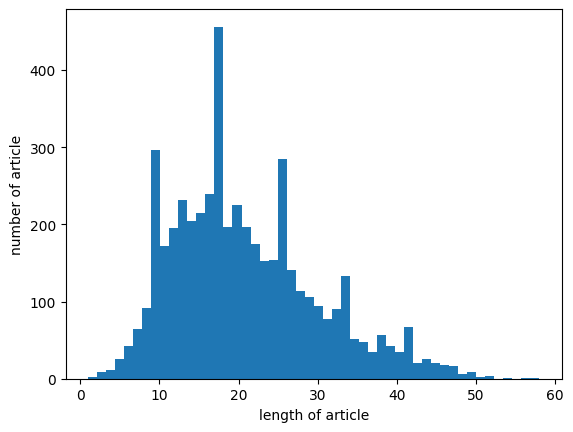

In [6]:
print('기사의 최대 단어 수 :', max(len(article) for article in article_list))
print('기사의 평균 단어 수 :', sum(map(len, article_list))/len(article_list))
plt.hist([len(article) for article in article_list], bins=50)
plt.xlabel('length of article')
plt.ylabel('number of article')
plt.show()

In [7]:
## ChatGPT API를 활용한 감정분석

# 기사를 분석하기 위한 함수 작성
def analyze_article(article):

  try:
    messages = [
            {"role": "system", "content": "You are an AI language model that analyzes and detects emotions in articles."},
            {"role": "user", "content": f"Analyze the following article and determine if the emotion conveyed is positive, negative, or neutral. Respond with only one word: 'positive', 'negative', or 'neutral' without any additional explanation: {article}"}
            # 퓨샷 러닝을 적용하려면 여기에 긍정/부정의 예시를 함께 넣어줘야 할 듯
            ]


    completion = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=messages,
            max_tokens=3,
            n=1,
            stop=None,
            temperature=0
        )

    response= completion.choices[0].message.content
    print(response)
    return response

  except client.error.RateLimitError as e:
    retry_time = e.retry_after if hasattr(e, 'retry_after') else 30
    print(f"Rate limit exceeded. Retrying in {retry_time} seconds...")
    time.sleep(retry_time)
    return analyze_article(article)

  except client.error.ServiceUnavailableError as e:
    retry_time = 10  # Adjust the retry time as needed
    print(f"Service is unavailable. Retrying in {retry_time} seconds...")
    time.sleep(retry_time)
    return analyze_article(article)

  except client.error.APIError as e:
    retry_time = e.retry_after if hasattr(e, 'retry_after') else 30
    print(f"API error occurred. Retrying in {retry_time} seconds...")
    time.sleep(retry_time)
    return analyze_article(article)

# 기사 분석해 저장하기
sentiments = []

for article in tqdm(df["sentence"]):
    sentiment = analyze_article(article)
    sentiments.append(sentiment)

df["Sentiment"] = sentiments

# csv파일로 출력하기
df.to_csv(path_or_buf='/content/drive/MyDrive/캡스톤/new_finance_data_output1.csv')

  0%|          | 1/4846 [00:00<42:51,  1.88it/s]

neutral


  0%|          | 2/4846 [00:00<35:27,  2.28it/s]

positive


  0%|          | 3/4846 [00:01<34:23,  2.35it/s]

negative


  0%|          | 4/4846 [00:01<33:33,  2.40it/s]

positive


  0%|          | 5/4846 [00:02<36:11,  2.23it/s]

positive


  0%|          | 6/4846 [00:02<40:08,  2.01it/s]

positive


  0%|          | 7/4846 [00:03<46:22,  1.74it/s]

positive


  0%|          | 8/4846 [00:04<46:19,  1.74it/s]

positive


  0%|          | 9/4846 [00:04<41:29,  1.94it/s]

positive


  0%|          | 10/4846 [00:05<41:33,  1.94it/s]

positive


  0%|          | 11/4846 [00:05<37:59,  2.12it/s]

Positive


  0%|          | 12/4846 [00:06<44:26,  1.81it/s]

positive


  0%|          | 13/4846 [00:06<43:56,  1.83it/s]

neutral


  0%|          | 14/4846 [00:07<39:15,  2.05it/s]

positive


  0%|          | 15/4846 [00:07<36:52,  2.18it/s]

positive


  0%|          | 16/4846 [00:07<37:44,  2.13it/s]

positive


  0%|          | 17/4846 [00:08<40:05,  2.01it/s]

positive


  0%|          | 18/4846 [00:08<36:26,  2.21it/s]

Positive


  0%|          | 19/4846 [00:09<35:06,  2.29it/s]

positive


  0%|          | 20/4846 [00:09<38:51,  2.07it/s]

positive


  0%|          | 21/4846 [00:10<37:22,  2.15it/s]

positive


  0%|          | 22/4846 [00:10<39:18,  2.05it/s]

neutral


  0%|          | 23/4846 [00:11<37:42,  2.13it/s]

positive


  0%|          | 24/4846 [00:11<35:53,  2.24it/s]

positive


  1%|          | 25/4846 [00:11<34:10,  2.35it/s]

positive


  1%|          | 26/4846 [00:14<1:21:03,  1.01s/it]

positive


  1%|          | 27/4846 [00:14<1:08:38,  1.17it/s]

positive


  1%|          | 28/4846 [00:15<54:13,  1.48it/s]  

positive


  1%|          | 29/4846 [00:15<51:02,  1.57it/s]

positive


  1%|          | 30/4846 [00:16<48:02,  1.67it/s]

positive


  1%|          | 31/4846 [00:16<44:47,  1.79it/s]

positive


  1%|          | 32/4846 [00:17<44:51,  1.79it/s]

positive


  1%|          | 33/4846 [00:17<44:03,  1.82it/s]

positive


  1%|          | 34/4846 [00:18<44:39,  1.80it/s]

positive


  1%|          | 35/4846 [00:18<40:25,  1.98it/s]

positive


  1%|          | 36/4846 [00:18<36:30,  2.20it/s]

positive


  1%|          | 37/4846 [00:19<37:50,  2.12it/s]

positive


  1%|          | 38/4846 [00:19<37:26,  2.14it/s]

positive


  1%|          | 39/4846 [00:20<31:34,  2.54it/s]

positive


  1%|          | 40/4846 [00:20<34:29,  2.32it/s]

neutral


  1%|          | 41/4846 [00:21<36:13,  2.21it/s]

positive


  1%|          | 42/4846 [00:21<36:41,  2.18it/s]

positive


  1%|          | 43/4846 [00:22<39:58,  2.00it/s]

neutral


  1%|          | 44/4846 [00:22<41:34,  1.93it/s]

Neutral


  1%|          | 45/4846 [00:23<42:25,  1.89it/s]

positive


  1%|          | 46/4846 [00:23<43:13,  1.85it/s]

positive


  1%|          | 47/4846 [00:24<41:37,  1.92it/s]

positive


  1%|          | 48/4846 [00:24<39:04,  2.05it/s]

neutral


  1%|          | 49/4846 [00:25<34:44,  2.30it/s]

positive


  1%|          | 50/4846 [00:25<33:36,  2.38it/s]

positive


  1%|          | 51/4846 [00:26<36:35,  2.18it/s]

Positive


  1%|          | 52/4846 [00:26<38:13,  2.09it/s]

positive


  1%|          | 53/4846 [00:26<32:39,  2.45it/s]

positive


  1%|          | 54/4846 [00:27<32:09,  2.48it/s]

positive


  1%|          | 55/4846 [00:27<32:58,  2.42it/s]

positive


  1%|          | 56/4846 [00:28<35:27,  2.25it/s]

Positive


  1%|          | 57/4846 [00:28<35:11,  2.27it/s]

positive


  1%|          | 58/4846 [00:28<33:20,  2.39it/s]

positive


  1%|          | 59/4846 [00:29<40:32,  1.97it/s]

neutral


  1%|          | 60/4846 [00:30<39:51,  2.00it/s]

neutral


  1%|▏         | 61/4846 [00:30<40:22,  1.98it/s]

positive


  1%|▏         | 62/4846 [00:31<39:22,  2.03it/s]

neutral


  1%|▏         | 63/4846 [00:31<33:04,  2.41it/s]

positive


  1%|▏         | 64/4846 [00:31<34:27,  2.31it/s]

positive


  1%|▏         | 65/4846 [00:32<33:12,  2.40it/s]

Positive


  1%|▏         | 66/4846 [00:32<31:42,  2.51it/s]

neutral


  1%|▏         | 67/4846 [00:32<29:21,  2.71it/s]

positive


  1%|▏         | 68/4846 [00:33<31:44,  2.51it/s]

neutral


  1%|▏         | 69/4846 [00:33<28:18,  2.81it/s]

Neutral


  1%|▏         | 70/4846 [00:33<25:53,  3.07it/s]

positive


  1%|▏         | 71/4846 [00:34<27:06,  2.94it/s]

positive


  1%|▏         | 72/4846 [00:34<29:36,  2.69it/s]

neutral


  2%|▏         | 73/4846 [00:35<30:32,  2.60it/s]

neutral


  2%|▏         | 74/4846 [00:35<33:13,  2.39it/s]

positive


  2%|▏         | 75/4846 [00:36<34:00,  2.34it/s]

positive


  2%|▏         | 76/4846 [00:36<30:05,  2.64it/s]

neutral


  2%|▏         | 77/4846 [00:36<29:50,  2.66it/s]

Neutral


  2%|▏         | 78/4846 [00:37<29:35,  2.69it/s]

positive


  2%|▏         | 79/4846 [00:37<28:16,  2.81it/s]

Neutral


  2%|▏         | 80/4846 [00:37<33:42,  2.36it/s]

Neutral


  2%|▏         | 81/4846 [00:38<32:06,  2.47it/s]

neutral


  2%|▏         | 82/4846 [00:38<31:59,  2.48it/s]

neutral


  2%|▏         | 83/4846 [00:39<30:15,  2.62it/s]

neutral


  2%|▏         | 84/4846 [00:39<27:33,  2.88it/s]

positive


  2%|▏         | 85/4846 [00:39<25:32,  3.11it/s]

positive


  2%|▏         | 86/4846 [00:40<30:47,  2.58it/s]

positive


  2%|▏         | 87/4846 [00:40<33:11,  2.39it/s]

neutral


  2%|▏         | 88/4846 [00:41<36:08,  2.19it/s]

positive


  2%|▏         | 89/4846 [00:41<31:36,  2.51it/s]

positive


  2%|▏         | 90/4846 [00:41<31:16,  2.53it/s]

positive


  2%|▏         | 91/4846 [00:42<28:42,  2.76it/s]

positive


  2%|▏         | 92/4846 [00:42<28:32,  2.78it/s]

positive


  2%|▏         | 93/4846 [00:42<27:38,  2.87it/s]

Positive


  2%|▏         | 94/4846 [00:43<30:49,  2.57it/s]

positive


  2%|▏         | 95/4846 [00:43<33:37,  2.36it/s]

positive


  2%|▏         | 96/4846 [00:44<41:41,  1.90it/s]

positive


  2%|▏         | 97/4846 [00:44<38:03,  2.08it/s]

positive


  2%|▏         | 98/4846 [00:45<34:44,  2.28it/s]

positive


  2%|▏         | 99/4846 [00:45<35:50,  2.21it/s]

positive


  2%|▏         | 100/4846 [00:45<30:17,  2.61it/s]

positive


  2%|▏         | 101/4846 [00:46<32:45,  2.41it/s]

positive


  2%|▏         | 102/4846 [00:46<30:30,  2.59it/s]

positive


  2%|▏         | 103/4846 [00:47<29:47,  2.65it/s]

positive


  2%|▏         | 104/4846 [00:47<28:47,  2.75it/s]

positive


  2%|▏         | 105/4846 [00:47<27:23,  2.89it/s]

positive


  2%|▏         | 106/4846 [00:48<33:18,  2.37it/s]

positive


  2%|▏         | 107/4846 [00:48<36:07,  2.19it/s]

positive


  2%|▏         | 108/4846 [00:49<33:17,  2.37it/s]

positive


  2%|▏         | 109/4846 [00:49<35:23,  2.23it/s]

positive


  2%|▏         | 110/4846 [00:50<36:44,  2.15it/s]

positive


  2%|▏         | 111/4846 [00:50<31:45,  2.48it/s]

neutral


  2%|▏         | 112/4846 [00:50<29:17,  2.69it/s]

positive


  2%|▏         | 113/4846 [00:51<32:05,  2.46it/s]

positive


  2%|▏         | 114/4846 [00:51<34:39,  2.28it/s]

positive


  2%|▏         | 115/4846 [00:52<35:20,  2.23it/s]

neutral


  2%|▏         | 116/4846 [00:52<37:40,  2.09it/s]

positive


  2%|▏         | 117/4846 [00:53<33:53,  2.33it/s]

positive


  2%|▏         | 118/4846 [00:53<31:08,  2.53it/s]

positive


  2%|▏         | 119/4846 [00:53<32:59,  2.39it/s]

positive


  2%|▏         | 120/4846 [00:54<35:34,  2.21it/s]

positive


  2%|▏         | 121/4846 [00:54<32:53,  2.39it/s]

positive


  3%|▎         | 122/4846 [00:55<29:05,  2.71it/s]

positive


  3%|▎         | 123/4846 [00:55<33:15,  2.37it/s]

positive


  3%|▎         | 124/4846 [00:56<34:58,  2.25it/s]

positive


  3%|▎         | 125/4846 [00:56<36:22,  2.16it/s]

positive


  3%|▎         | 126/4846 [00:57<35:09,  2.24it/s]

Positive


  3%|▎         | 127/4846 [00:57<32:13,  2.44it/s]

positive


  3%|▎         | 128/4846 [00:57<30:07,  2.61it/s]

positive


  3%|▎         | 129/4846 [00:57<28:04,  2.80it/s]

positive


  3%|▎         | 130/4846 [00:58<28:30,  2.76it/s]

positive


  3%|▎         | 131/4846 [00:58<28:05,  2.80it/s]

positive


  3%|▎         | 132/4846 [00:59<30:48,  2.55it/s]

positive


  3%|▎         | 133/4846 [00:59<28:58,  2.71it/s]

positive


  3%|▎         | 134/4846 [00:59<27:24,  2.87it/s]

positive


  3%|▎         | 135/4846 [01:00<26:30,  2.96it/s]

positive


  3%|▎         | 136/4846 [01:00<30:04,  2.61it/s]

positive


  3%|▎         | 137/4846 [01:00<29:03,  2.70it/s]

positive


  3%|▎         | 138/4846 [01:01<27:33,  2.85it/s]

positive


  3%|▎         | 139/4846 [01:01<28:09,  2.79it/s]

Positive


  3%|▎         | 140/4846 [01:01<25:14,  3.11it/s]

positive


  3%|▎         | 141/4846 [01:02<23:30,  3.34it/s]

positive


  3%|▎         | 142/4846 [01:02<24:02,  3.26it/s]

positive


  3%|▎         | 143/4846 [01:02<24:50,  3.16it/s]

positive


  3%|▎         | 144/4846 [01:03<31:21,  2.50it/s]

positive


  3%|▎         | 145/4846 [01:03<34:36,  2.26it/s]

positive


  3%|▎         | 146/4846 [01:04<31:41,  2.47it/s]

positive


  3%|▎         | 147/4846 [01:04<31:45,  2.47it/s]

positive


  3%|▎         | 148/4846 [01:05<35:02,  2.23it/s]

positive


  3%|▎         | 149/4846 [01:05<31:03,  2.52it/s]

Positive


  3%|▎         | 150/4846 [01:05<28:29,  2.75it/s]

Positive


  3%|▎         | 151/4846 [01:06<27:57,  2.80it/s]

positive


  3%|▎         | 152/4846 [01:06<25:19,  3.09it/s]

positive


  3%|▎         | 153/4846 [01:06<24:11,  3.23it/s]

positive


  3%|▎         | 154/4846 [01:07<29:35,  2.64it/s]

positive


  3%|▎         | 155/4846 [01:07<32:11,  2.43it/s]

positive


  3%|▎         | 156/4846 [01:07<30:14,  2.58it/s]

Positive


  3%|▎         | 157/4846 [01:08<28:35,  2.73it/s]

positive


  3%|▎         | 158/4846 [01:08<30:41,  2.55it/s]

positive


  3%|▎         | 159/4846 [01:09<29:30,  2.65it/s]

positive


  3%|▎         | 160/4846 [01:09<28:20,  2.76it/s]

neutral


  3%|▎         | 161/4846 [01:09<25:36,  3.05it/s]

positive


  3%|▎         | 162/4846 [01:09<25:39,  3.04it/s]

positive


  3%|▎         | 163/4846 [01:10<23:38,  3.30it/s]

positive


  3%|▎         | 164/4846 [01:10<23:21,  3.34it/s]

positive


  3%|▎         | 165/4846 [01:11<29:53,  2.61it/s]

positive


  3%|▎         | 166/4846 [01:11<35:24,  2.20it/s]

positive


  3%|▎         | 167/4846 [01:12<32:18,  2.41it/s]

positive


  3%|▎         | 168/4846 [01:12<30:20,  2.57it/s]

positive


  3%|▎         | 169/4846 [01:12<33:41,  2.31it/s]

positive


  4%|▎         | 170/4846 [01:13<31:16,  2.49it/s]

positive


  4%|▎         | 171/4846 [01:13<28:18,  2.75it/s]

positive


  4%|▎         | 172/4846 [01:13<27:35,  2.82it/s]

positive


  4%|▎         | 173/4846 [01:14<26:41,  2.92it/s]

positive


  4%|▎         | 174/4846 [01:14<26:19,  2.96it/s]

positive


  4%|▎         | 175/4846 [01:14<30:26,  2.56it/s]

positive


  4%|▎         | 176/4846 [01:15<31:37,  2.46it/s]

positive


  4%|▎         | 177/4846 [01:15<27:51,  2.79it/s]

positive


  4%|▎         | 178/4846 [01:15<26:57,  2.89it/s]

positive


  4%|▎         | 179/4846 [01:16<25:19,  3.07it/s]

positive


  4%|▎         | 180/4846 [01:16<25:40,  3.03it/s]

positive


  4%|▎         | 181/4846 [01:16<24:18,  3.20it/s]

positive


  4%|▍         | 182/4846 [01:17<24:22,  3.19it/s]

positive


  4%|▍         | 183/4846 [01:17<28:42,  2.71it/s]

positive


  4%|▍         | 184/4846 [01:17<26:02,  2.98it/s]

positive


  4%|▍         | 185/4846 [01:18<25:53,  3.00it/s]

positive


  4%|▍         | 186/4846 [01:18<32:11,  2.41it/s]

positive


  4%|▍         | 187/4846 [01:19<29:50,  2.60it/s]

neutral


  4%|▍         | 188/4846 [01:19<26:55,  2.88it/s]

positive


  4%|▍         | 189/4846 [01:20<35:06,  2.21it/s]

positive


  4%|▍         | 190/4846 [01:21<47:34,  1.63it/s]

positive


  4%|▍         | 191/4846 [01:21<40:47,  1.90it/s]

Positive


  4%|▍         | 192/4846 [01:21<36:39,  2.12it/s]

positive


  4%|▍         | 193/4846 [01:22<32:18,  2.40it/s]

Positive


  4%|▍         | 194/4846 [01:22<29:38,  2.62it/s]

Positive


  4%|▍         | 195/4846 [01:22<27:52,  2.78it/s]

positive


  4%|▍         | 196/4846 [01:23<27:35,  2.81it/s]

positive


  4%|▍         | 197/4846 [01:23<26:52,  2.88it/s]

Positive


  4%|▍         | 198/4846 [01:23<26:14,  2.95it/s]

positive


  4%|▍         | 199/4846 [01:23<25:32,  3.03it/s]

positive


  4%|▍         | 200/4846 [01:24<32:21,  2.39it/s]

Positive


  4%|▍         | 201/4846 [01:24<29:50,  2.59it/s]

Positive


  4%|▍         | 202/4846 [01:25<31:31,  2.46it/s]

positive


  4%|▍         | 203/4846 [01:25<31:54,  2.43it/s]

positive


  4%|▍         | 204/4846 [01:26<27:34,  2.81it/s]

Positive


  4%|▍         | 205/4846 [01:26<27:28,  2.82it/s]

positive


  4%|▍         | 206/4846 [01:26<27:16,  2.84it/s]

positive


  4%|▍         | 207/4846 [01:27<25:48,  3.00it/s]

positive


  4%|▍         | 208/4846 [01:27<28:46,  2.69it/s]

positive


  4%|▍         | 209/4846 [01:27<28:21,  2.73it/s]

positive


  4%|▍         | 210/4846 [01:28<26:07,  2.96it/s]

positive


  4%|▍         | 211/4846 [01:28<25:44,  3.00it/s]

neutral


  4%|▍         | 212/4846 [01:28<26:29,  2.92it/s]

positive


  4%|▍         | 213/4846 [01:29<24:12,  3.19it/s]

positive


  4%|▍         | 214/4846 [01:29<28:51,  2.68it/s]

positive


  4%|▍         | 215/4846 [01:29<26:34,  2.90it/s]

positive


  4%|▍         | 216/4846 [01:30<30:28,  2.53it/s]

positive


  4%|▍         | 217/4846 [01:30<27:46,  2.78it/s]

positive


  4%|▍         | 218/4846 [01:30<26:36,  2.90it/s]

positive


  5%|▍         | 219/4846 [01:31<24:12,  3.19it/s]

positive


  5%|▍         | 220/4846 [01:31<26:02,  2.96it/s]

positive


  5%|▍         | 221/4846 [01:31<27:57,  2.76it/s]

positive


  5%|▍         | 222/4846 [01:32<27:41,  2.78it/s]

positive


  5%|▍         | 223/4846 [01:32<32:00,  2.41it/s]

positive


  5%|▍         | 224/4846 [01:33<29:47,  2.59it/s]

neutral


  5%|▍         | 225/4846 [01:33<28:38,  2.69it/s]

positive


  5%|▍         | 226/4846 [01:33<26:48,  2.87it/s]

positive


  5%|▍         | 227/4846 [01:34<31:55,  2.41it/s]

positive


  5%|▍         | 228/4846 [01:34<35:09,  2.19it/s]

positive


  5%|▍         | 229/4846 [01:35<33:03,  2.33it/s]

positive


  5%|▍         | 230/4846 [01:35<30:05,  2.56it/s]

positive


  5%|▍         | 231/4846 [01:35<28:34,  2.69it/s]

positive


  5%|▍         | 232/4846 [01:36<28:26,  2.70it/s]

positive


  5%|▍         | 233/4846 [01:36<26:47,  2.87it/s]

positive


  5%|▍         | 234/4846 [01:36<25:42,  2.99it/s]

neutral


  5%|▍         | 235/4846 [01:37<25:29,  3.02it/s]

neutral


  5%|▍         | 236/4846 [01:37<29:20,  2.62it/s]

positive


  5%|▍         | 237/4846 [01:38<28:28,  2.70it/s]

positive


  5%|▍         | 238/4846 [01:38<30:58,  2.48it/s]

positive


  5%|▍         | 239/4846 [01:38<30:07,  2.55it/s]

positive


  5%|▍         | 240/4846 [01:39<28:08,  2.73it/s]

positive


  5%|▍         | 241/4846 [01:39<29:23,  2.61it/s]

positive


  5%|▍         | 242/4846 [01:40<29:19,  2.62it/s]

positive


  5%|▌         | 243/4846 [01:40<28:06,  2.73it/s]

positive


  5%|▌         | 244/4846 [01:40<24:49,  3.09it/s]

positive


  5%|▌         | 245/4846 [01:40<25:15,  3.04it/s]

positive


  5%|▌         | 246/4846 [01:41<23:43,  3.23it/s]

positive


  5%|▌         | 247/4846 [01:41<22:24,  3.42it/s]

positive


  5%|▌         | 248/4846 [01:41<21:29,  3.56it/s]

positive


  5%|▌         | 249/4846 [01:42<23:03,  3.32it/s]

positive


  5%|▌         | 250/4846 [01:42<29:35,  2.59it/s]

positive


  5%|▌         | 251/4846 [01:42<27:29,  2.79it/s]

positive


  5%|▌         | 252/4846 [01:43<27:16,  2.81it/s]

positive


  5%|▌         | 253/4846 [01:43<26:29,  2.89it/s]

positive


  5%|▌         | 254/4846 [01:43<25:36,  2.99it/s]

positive


  5%|▌         | 255/4846 [01:44<25:35,  2.99it/s]

positive


  5%|▌         | 256/4846 [01:44<29:18,  2.61it/s]

positive


  5%|▌         | 257/4846 [01:45<32:42,  2.34it/s]

positive


  5%|▌         | 258/4846 [01:45<30:59,  2.47it/s]

positive


  5%|▌         | 259/4846 [01:45<28:56,  2.64it/s]

positive


  5%|▌         | 260/4846 [01:46<28:25,  2.69it/s]

positive


  5%|▌         | 261/4846 [01:46<30:37,  2.50it/s]

positive


  5%|▌         | 262/4846 [01:47<34:27,  2.22it/s]

positive


  5%|▌         | 263/4846 [01:47<31:35,  2.42it/s]

positive


  5%|▌         | 264/4846 [01:48<29:47,  2.56it/s]

positive


  5%|▌         | 265/4846 [01:48<30:20,  2.52it/s]

positive


  5%|▌         | 266/4846 [01:48<28:46,  2.65it/s]

positive


  6%|▌         | 267/4846 [01:49<28:03,  2.72it/s]

positive


  6%|▌         | 268/4846 [01:49<27:24,  2.78it/s]

positive


  6%|▌         | 269/4846 [01:49<26:20,  2.90it/s]

positive


  6%|▌         | 270/4846 [01:50<25:09,  3.03it/s]

positive


  6%|▌         | 271/4846 [01:50<25:32,  2.99it/s]

neutral


  6%|▌         | 272/4846 [01:50<25:26,  3.00it/s]

positive


  6%|▌         | 273/4846 [01:50<23:55,  3.19it/s]

positive


  6%|▌         | 274/4846 [01:51<23:39,  3.22it/s]

positive


  6%|▌         | 275/4846 [01:51<29:28,  2.59it/s]

positive


  6%|▌         | 276/4846 [01:52<27:55,  2.73it/s]

positive


  6%|▌         | 277/4846 [01:52<28:15,  2.70it/s]

positive


  6%|▌         | 278/4846 [01:52<25:16,  3.01it/s]

positive


  6%|▌         | 279/4846 [01:53<28:20,  2.69it/s]

positive


  6%|▌         | 280/4846 [01:53<29:08,  2.61it/s]

positive


  6%|▌         | 281/4846 [01:53<27:54,  2.73it/s]

positive


  6%|▌         | 282/4846 [01:54<30:01,  2.53it/s]

positive


  6%|▌         | 283/4846 [01:54<26:48,  2.84it/s]

positive


  6%|▌         | 284/4846 [01:55<31:25,  2.42it/s]

positive


  6%|▌         | 285/4846 [01:55<29:27,  2.58it/s]

neutral


  6%|▌         | 286/4846 [01:55<27:37,  2.75it/s]

positive


  6%|▌         | 287/4846 [01:56<29:24,  2.58it/s]

positive


  6%|▌         | 288/4846 [01:56<27:25,  2.77it/s]

positive


  6%|▌         | 289/4846 [01:56<26:29,  2.87it/s]

positive


  6%|▌         | 290/4846 [01:57<27:24,  2.77it/s]

positive


  6%|▌         | 291/4846 [01:57<24:20,  3.12it/s]

positive


  6%|▌         | 292/4846 [01:57<25:26,  2.98it/s]

negative


  6%|▌         | 293/4846 [01:58<25:29,  2.98it/s]

positive


  6%|▌         | 294/4846 [01:58<26:03,  2.91it/s]

neutral


  6%|▌         | 295/4846 [01:58<25:21,  2.99it/s]

Positive


  6%|▌         | 296/4846 [01:59<26:25,  2.87it/s]

neutral


  6%|▌         | 297/4846 [01:59<26:13,  2.89it/s]

neutral


  6%|▌         | 298/4846 [02:00<27:29,  2.76it/s]

positive


  6%|▌         | 299/4846 [02:00<26:37,  2.85it/s]

neutral


  6%|▌         | 300/4846 [02:00<29:32,  2.56it/s]

positive


  6%|▌         | 301/4846 [02:01<26:21,  2.87it/s]

positive


  6%|▌         | 302/4846 [02:01<26:20,  2.87it/s]

positive


  6%|▋         | 303/4846 [02:02<30:52,  2.45it/s]

positive


  6%|▋         | 304/4846 [02:02<26:44,  2.83it/s]

positive


  6%|▋         | 305/4846 [02:02<26:41,  2.84it/s]

positive


  6%|▋         | 306/4846 [02:02<26:08,  2.89it/s]

positive


  6%|▋         | 307/4846 [02:03<24:33,  3.08it/s]

Positive


  6%|▋         | 308/4846 [02:03<24:15,  3.12it/s]

positive


  6%|▋         | 309/4846 [02:03<25:11,  3.00it/s]

positive


  6%|▋         | 310/4846 [02:04<25:38,  2.95it/s]

Neutral


  6%|▋         | 311/4846 [02:04<28:14,  2.68it/s]

positive


  6%|▋         | 312/4846 [02:04<24:45,  3.05it/s]

positive


  6%|▋         | 313/4846 [02:05<34:27,  2.19it/s]

positive


  6%|▋         | 314/4846 [02:05<29:28,  2.56it/s]

positive


  7%|▋         | 315/4846 [02:06<27:35,  2.74it/s]

positive


  7%|▋         | 316/4846 [02:06<26:37,  2.84it/s]

positive


  7%|▋         | 317/4846 [02:07<29:43,  2.54it/s]

positive


  7%|▋         | 318/4846 [02:07<28:58,  2.60it/s]

positive


  7%|▋         | 319/4846 [02:07<29:16,  2.58it/s]

Positive


  7%|▋         | 320/4846 [02:08<27:27,  2.75it/s]

positive


  7%|▋         | 321/4846 [02:08<27:22,  2.75it/s]

positive


  7%|▋         | 322/4846 [02:08<25:06,  3.00it/s]

positive


  7%|▋         | 323/4846 [02:09<25:07,  3.00it/s]

positive


  7%|▋         | 324/4846 [02:09<23:19,  3.23it/s]

positive


  7%|▋         | 325/4846 [02:09<21:50,  3.45it/s]

positive


  7%|▋         | 326/4846 [02:09<20:38,  3.65it/s]

positive


  7%|▋         | 327/4846 [02:10<26:22,  2.86it/s]

positive


  7%|▋         | 328/4846 [02:10<27:36,  2.73it/s]

positive


  7%|▋         | 329/4846 [02:11<28:48,  2.61it/s]

positive


  7%|▋         | 330/4846 [02:11<27:50,  2.70it/s]

positive


  7%|▋         | 331/4846 [02:11<25:42,  2.93it/s]

positive


  7%|▋         | 332/4846 [02:12<25:42,  2.93it/s]

positive


  7%|▋         | 333/4846 [02:12<30:19,  2.48it/s]

Positive


  7%|▋         | 334/4846 [02:12<27:56,  2.69it/s]

positive


  7%|▋         | 335/4846 [02:13<27:17,  2.75it/s]

positive


  7%|▋         | 336/4846 [02:13<25:44,  2.92it/s]

positive


  7%|▋         | 337/4846 [02:13<25:42,  2.92it/s]

positive


  7%|▋         | 338/4846 [02:14<27:53,  2.69it/s]

neutral


  7%|▋         | 339/4846 [02:14<26:26,  2.84it/s]

positive


  7%|▋         | 340/4846 [02:15<26:25,  2.84it/s]

positive


  7%|▋         | 341/4846 [02:15<25:14,  2.97it/s]

positive


  7%|▋         | 342/4846 [02:15<25:25,  2.95it/s]

positive


  7%|▋         | 343/4846 [02:16<33:24,  2.25it/s]

positive


  7%|▋         | 344/4846 [02:16<31:12,  2.40it/s]

positive


  7%|▋         | 345/4846 [02:16<27:57,  2.68it/s]

positive


  7%|▋         | 346/4846 [02:17<24:54,  3.01it/s]

positive


  7%|▋         | 347/4846 [02:17<22:47,  3.29it/s]

positive


  7%|▋         | 348/4846 [02:17<23:06,  3.24it/s]

positive


  7%|▋         | 349/4846 [02:18<22:28,  3.34it/s]

positive


  7%|▋         | 350/4846 [02:18<23:42,  3.16it/s]

positive


  7%|▋         | 351/4846 [02:18<24:06,  3.11it/s]

Positive


  7%|▋         | 352/4846 [02:19<22:51,  3.28it/s]

positive


  7%|▋         | 353/4846 [02:19<21:02,  3.56it/s]

positive


  7%|▋         | 354/4846 [02:19<22:25,  3.34it/s]

positive


  7%|▋         | 355/4846 [02:19<22:56,  3.26it/s]

positive


  7%|▋         | 356/4846 [02:20<22:06,  3.38it/s]

positive


  7%|▋         | 357/4846 [02:20<23:22,  3.20it/s]

positive


  7%|▋         | 358/4846 [02:20<22:30,  3.32it/s]

positive


  7%|▋         | 359/4846 [02:21<23:39,  3.16it/s]

positive


  7%|▋         | 360/4846 [02:21<24:13,  3.09it/s]

positive


  7%|▋         | 361/4846 [02:22<28:30,  2.62it/s]

positive


  7%|▋         | 362/4846 [02:22<27:38,  2.70it/s]

positive


  7%|▋         | 363/4846 [02:22<25:07,  2.97it/s]

positive


  8%|▊         | 364/4846 [02:23<30:41,  2.43it/s]

positive


  8%|▊         | 365/4846 [02:23<28:42,  2.60it/s]

positive


  8%|▊         | 366/4846 [02:23<28:25,  2.63it/s]

positive


  8%|▊         | 367/4846 [02:24<27:27,  2.72it/s]

positive


  8%|▊         | 368/4846 [02:24<26:00,  2.87it/s]

positive


  8%|▊         | 369/4846 [02:24<25:08,  2.97it/s]

positive


  8%|▊         | 370/4846 [02:25<29:03,  2.57it/s]

positive


  8%|▊         | 371/4846 [02:25<26:02,  2.86it/s]

positive


  8%|▊         | 372/4846 [02:25<23:44,  3.14it/s]

positive


  8%|▊         | 373/4846 [02:26<29:38,  2.52it/s]

positive


  8%|▊         | 374/4846 [02:26<28:24,  2.62it/s]

positive


  8%|▊         | 375/4846 [02:27<27:12,  2.74it/s]

positive


  8%|▊         | 376/4846 [02:27<25:09,  2.96it/s]

positive


  8%|▊         | 377/4846 [02:27<25:48,  2.89it/s]

positive


  8%|▊         | 378/4846 [02:28<25:22,  2.94it/s]

positive


  8%|▊         | 379/4846 [02:28<24:08,  3.08it/s]

positive


  8%|▊         | 380/4846 [02:28<23:58,  3.10it/s]

positive


  8%|▊         | 381/4846 [02:29<29:24,  2.53it/s]

positive


  8%|▊         | 382/4846 [02:29<27:31,  2.70it/s]

positive


  8%|▊         | 383/4846 [02:29<27:02,  2.75it/s]

positive


  8%|▊         | 384/4846 [02:30<26:24,  2.82it/s]

positive


  8%|▊         | 385/4846 [02:30<24:40,  3.01it/s]

positive


  8%|▊         | 386/4846 [02:30<22:35,  3.29it/s]

positive


  8%|▊         | 387/4846 [02:31<23:09,  3.21it/s]

positive


  8%|▊         | 388/4846 [02:31<31:06,  2.39it/s]

Positive


  8%|▊         | 389/4846 [02:32<28:04,  2.65it/s]

positive


  8%|▊         | 390/4846 [02:32<26:00,  2.86it/s]

positive


  8%|▊         | 391/4846 [02:32<29:34,  2.51it/s]

positive


  8%|▊         | 392/4846 [02:33<28:14,  2.63it/s]

positive


  8%|▊         | 393/4846 [02:33<26:59,  2.75it/s]

neutral


  8%|▊         | 394/4846 [02:33<28:21,  2.62it/s]

Neutral


  8%|▊         | 395/4846 [02:34<27:02,  2.74it/s]

positive


  8%|▊         | 396/4846 [02:34<27:31,  2.70it/s]

positive


  8%|▊         | 397/4846 [02:34<26:25,  2.81it/s]

neutral


  8%|▊         | 398/4846 [02:35<25:33,  2.90it/s]

neutral


  8%|▊         | 399/4846 [02:35<26:52,  2.76it/s]

positive


  8%|▊         | 400/4846 [02:36<27:27,  2.70it/s]

neutral


  8%|▊         | 401/4846 [02:36<26:52,  2.76it/s]

neutral


  8%|▊         | 402/4846 [02:36<25:59,  2.85it/s]

positive


  8%|▊         | 403/4846 [02:37<26:47,  2.76it/s]

positive


  8%|▊         | 404/4846 [02:37<24:52,  2.98it/s]

neutral


  8%|▊         | 405/4846 [02:37<28:56,  2.56it/s]

positive


  8%|▊         | 406/4846 [02:38<27:37,  2.68it/s]

neutral


  8%|▊         | 407/4846 [02:38<26:27,  2.80it/s]

neutral


  8%|▊         | 408/4846 [02:38<26:58,  2.74it/s]

positive


  8%|▊         | 409/4846 [02:39<26:30,  2.79it/s]

positive


  8%|▊         | 410/4846 [02:39<27:04,  2.73it/s]

positive


  8%|▊         | 411/4846 [02:40<26:22,  2.80it/s]

Neutral


  9%|▊         | 412/4846 [02:40<25:31,  2.89it/s]

neutral


  9%|▊         | 413/4846 [02:40<26:14,  2.81it/s]

neutral


  9%|▊         | 414/4846 [02:41<25:42,  2.87it/s]

neutral


  9%|▊         | 415/4846 [02:41<36:31,  2.02it/s]

neutral


  9%|▊         | 416/4846 [02:42<33:40,  2.19it/s]

negative


  9%|▊         | 417/4846 [02:42<30:53,  2.39it/s]

positive


  9%|▊         | 418/4846 [02:42<26:25,  2.79it/s]

positive


  9%|▊         | 419/4846 [02:43<23:59,  3.07it/s]

positive


  9%|▊         | 420/4846 [02:43<22:20,  3.30it/s]

positive


  9%|▊         | 421/4846 [02:43<20:54,  3.53it/s]

Neutral


  9%|▊         | 422/4846 [02:44<26:10,  2.82it/s]

negative


  9%|▊         | 423/4846 [02:44<24:22,  3.02it/s]

negative


  9%|▊         | 424/4846 [02:44<24:10,  3.05it/s]

negative


  9%|▉         | 425/4846 [02:44<23:46,  3.10it/s]

positive


  9%|▉         | 426/4846 [02:45<22:48,  3.23it/s]

positive


  9%|▉         | 427/4846 [02:45<28:56,  2.55it/s]

Positive


  9%|▉         | 428/4846 [02:46<25:55,  2.84it/s]

Neutral


  9%|▉         | 429/4846 [02:46<24:14,  3.04it/s]

neutral


  9%|▉         | 430/4846 [02:46<25:40,  2.87it/s]

neutral


  9%|▉         | 431/4846 [02:46<23:05,  3.19it/s]

neutral


  9%|▉         | 432/4846 [02:47<23:05,  3.19it/s]

Neutral


  9%|▉         | 433/4846 [02:47<24:02,  3.06it/s]

neutral


  9%|▉         | 434/4846 [02:47<24:01,  3.06it/s]

neutral


  9%|▉         | 435/4846 [02:48<29:21,  2.50it/s]

neutral


  9%|▉         | 436/4846 [02:48<26:28,  2.78it/s]

positive


  9%|▉         | 437/4846 [02:49<25:36,  2.87it/s]

positive


  9%|▉         | 438/4846 [02:49<25:55,  2.83it/s]

neutral


  9%|▉         | 439/4846 [02:49<26:51,  2.73it/s]

Positive


  9%|▉         | 440/4846 [02:50<25:50,  2.84it/s]

Neutral


  9%|▉         | 441/4846 [02:50<25:48,  2.84it/s]

positive


  9%|▉         | 442/4846 [02:50<23:42,  3.10it/s]

positive


  9%|▉         | 443/4846 [02:51<33:02,  2.22it/s]

Positive


  9%|▉         | 444/4846 [02:51<30:33,  2.40it/s]

Neutral


  9%|▉         | 445/4846 [02:52<28:53,  2.54it/s]

neutral


  9%|▉         | 446/4846 [02:52<27:10,  2.70it/s]

Neutral


  9%|▉         | 447/4846 [02:52<26:19,  2.78it/s]

positive


  9%|▉         | 448/4846 [02:53<23:41,  3.09it/s]

positive


  9%|▉         | 449/4846 [02:53<23:07,  3.17it/s]

neutral


  9%|▉         | 450/4846 [02:53<21:30,  3.41it/s]

neutral


  9%|▉         | 451/4846 [02:54<23:24,  3.13it/s]

positive


  9%|▉         | 452/4846 [02:54<23:58,  3.05it/s]

positive


  9%|▉         | 453/4846 [02:54<23:32,  3.11it/s]

neutral


  9%|▉         | 454/4846 [02:55<26:21,  2.78it/s]

neutral


  9%|▉         | 455/4846 [02:55<23:48,  3.07it/s]

neutral


  9%|▉         | 456/4846 [02:55<28:36,  2.56it/s]

neutral


  9%|▉         | 457/4846 [02:56<27:05,  2.70it/s]

Neutral


  9%|▉         | 458/4846 [02:56<27:46,  2.63it/s]

positive


  9%|▉         | 459/4846 [02:57<29:09,  2.51it/s]

positive


  9%|▉         | 460/4846 [02:57<29:08,  2.51it/s]

positive


 10%|▉         | 461/4846 [02:57<28:05,  2.60it/s]

positive


 10%|▉         | 462/4846 [02:58<25:17,  2.89it/s]

positive


 10%|▉         | 463/4846 [02:58<24:37,  2.97it/s]

Neutral


 10%|▉         | 464/4846 [02:59<33:38,  2.17it/s]

positive


 10%|▉         | 465/4846 [02:59<29:20,  2.49it/s]

Neutral


 10%|▉         | 466/4846 [03:00<36:45,  1.99it/s]

neutral


 10%|▉         | 467/4846 [03:00<32:12,  2.27it/s]

positive


 10%|▉         | 468/4846 [03:00<28:50,  2.53it/s]

positive


 10%|▉         | 469/4846 [03:01<28:23,  2.57it/s]

positive


 10%|▉         | 470/4846 [03:01<25:05,  2.91it/s]

positive


 10%|▉         | 471/4846 [03:01<23:44,  3.07it/s]

positive


 10%|▉         | 472/4846 [03:02<24:37,  2.96it/s]

neutral


 10%|▉         | 473/4846 [03:02<26:44,  2.72it/s]

positive


 10%|▉         | 474/4846 [03:02<26:00,  2.80it/s]

neutral


 10%|▉         | 475/4846 [03:03<25:48,  2.82it/s]

neutral


 10%|▉         | 476/4846 [03:03<23:25,  3.11it/s]

neutral


 10%|▉         | 477/4846 [03:03<24:24,  2.98it/s]

neutral


 10%|▉         | 478/4846 [03:04<24:23,  2.98it/s]

positive


 10%|▉         | 479/4846 [03:04<35:02,  2.08it/s]

positive


 10%|▉         | 480/4846 [03:05<29:31,  2.46it/s]

Positive


 10%|▉         | 481/4846 [03:05<26:42,  2.72it/s]

neutral


 10%|▉         | 482/4846 [03:05<25:16,  2.88it/s]

positive


 10%|▉         | 483/4846 [03:06<24:40,  2.95it/s]

neutral


 10%|▉         | 484/4846 [03:06<22:53,  3.18it/s]

neutral


 10%|█         | 485/4846 [03:06<22:42,  3.20it/s]

neutral


 10%|█         | 486/4846 [03:06<21:38,  3.36it/s]

positive


 10%|█         | 487/4846 [03:07<22:49,  3.18it/s]

positive


 10%|█         | 488/4846 [03:07<27:29,  2.64it/s]

positive


 10%|█         | 489/4846 [03:08<27:02,  2.69it/s]

Neutral


 10%|█         | 490/4846 [03:08<24:40,  2.94it/s]

Neutral


 10%|█         | 491/4846 [03:08<24:05,  3.01it/s]

positive


 10%|█         | 492/4846 [03:09<23:48,  3.05it/s]

neutral


 10%|█         | 493/4846 [03:09<25:10,  2.88it/s]

neutral


 10%|█         | 494/4846 [03:09<24:26,  2.97it/s]

neutral


 10%|█         | 495/4846 [03:10<24:27,  2.96it/s]

positive


 10%|█         | 496/4846 [03:10<23:12,  3.12it/s]

positive


 10%|█         | 497/4846 [03:10<23:31,  3.08it/s]

Neutral


 10%|█         | 498/4846 [03:10<21:39,  3.34it/s]

neutral


 10%|█         | 499/4846 [03:11<20:51,  3.47it/s]

positive


 10%|█         | 500/4846 [03:11<20:43,  3.50it/s]

positive


 10%|█         | 501/4846 [03:11<21:40,  3.34it/s]

negative


 10%|█         | 502/4846 [03:12<20:54,  3.46it/s]

positive


 10%|█         | 503/4846 [03:12<25:32,  2.83it/s]

neutral


 10%|█         | 504/4846 [03:12<24:32,  2.95it/s]

positive


 10%|█         | 505/4846 [03:13<23:53,  3.03it/s]

neutral


 10%|█         | 506/4846 [03:13<22:38,  3.19it/s]

positive


 10%|█         | 507/4846 [03:13<26:41,  2.71it/s]

neutral


 10%|█         | 508/4846 [03:14<25:35,  2.82it/s]

neutral


 11%|█         | 509/4846 [03:14<24:47,  2.92it/s]

neutral


 11%|█         | 510/4846 [03:14<22:30,  3.21it/s]

neutral


 11%|█         | 511/4846 [03:15<23:17,  3.10it/s]

positive


 11%|█         | 512/4846 [03:15<24:59,  2.89it/s]

positive


 11%|█         | 513/4846 [03:15<23:36,  3.06it/s]

neutral


 11%|█         | 514/4846 [03:16<23:03,  3.13it/s]

neutral


 11%|█         | 515/4846 [03:16<27:54,  2.59it/s]

neutral


 11%|█         | 516/4846 [03:17<26:24,  2.73it/s]

neutral


 11%|█         | 517/4846 [03:17<30:36,  2.36it/s]

neutral


 11%|█         | 518/4846 [03:18<41:51,  1.72it/s]

neutral


 11%|█         | 519/4846 [03:18<36:00,  2.00it/s]

positive


 11%|█         | 520/4846 [03:19<32:31,  2.22it/s]

positive


 11%|█         | 521/4846 [03:19<38:58,  1.85it/s]

positive


 11%|█         | 522/4846 [03:20<34:13,  2.11it/s]

neutral


 11%|█         | 523/4846 [03:20<31:16,  2.30it/s]

Neutral


 11%|█         | 524/4846 [03:20<28:49,  2.50it/s]

positive


 11%|█         | 525/4846 [03:21<25:49,  2.79it/s]

neutral


 11%|█         | 526/4846 [03:21<23:32,  3.06it/s]

positive


 11%|█         | 527/4846 [03:21<26:52,  2.68it/s]

positive


 11%|█         | 528/4846 [03:22<28:14,  2.55it/s]

positive


 11%|█         | 529/4846 [03:22<27:14,  2.64it/s]

positive


 11%|█         | 530/4846 [03:22<26:00,  2.77it/s]

positive


 11%|█         | 531/4846 [03:23<23:21,  3.08it/s]

neutral


 11%|█         | 532/4846 [03:23<27:36,  2.60it/s]

neutral


 11%|█         | 533/4846 [03:24<25:04,  2.87it/s]

Neutral


 11%|█         | 534/4846 [03:24<24:31,  2.93it/s]

neutral


 11%|█         | 535/4846 [03:24<22:46,  3.15it/s]

positive


 11%|█         | 536/4846 [03:25<26:59,  2.66it/s]

Positive


 11%|█         | 537/4846 [03:25<25:56,  2.77it/s]

Positive


 11%|█         | 538/4846 [03:25<24:37,  2.92it/s]

neutral


 11%|█         | 539/4846 [03:26<24:13,  2.96it/s]

positive


 11%|█         | 540/4846 [03:26<24:18,  2.95it/s]

negative


 11%|█         | 541/4846 [03:26<24:09,  2.97it/s]

Neutral


 11%|█         | 542/4846 [03:27<22:52,  3.14it/s]

positive


 11%|█         | 543/4846 [03:27<22:43,  3.16it/s]

negative


 11%|█         | 544/4846 [03:27<23:04,  3.11it/s]

negative


 11%|█         | 545/4846 [03:27<23:18,  3.08it/s]

negative


 11%|█▏        | 546/4846 [03:28<23:51,  3.00it/s]

positive


 11%|█▏        | 547/4846 [03:28<24:25,  2.93it/s]

positive


 11%|█▏        | 548/4846 [03:29<24:31,  2.92it/s]

Positive


 11%|█▏        | 549/4846 [03:29<23:50,  3.00it/s]

positive


 11%|█▏        | 550/4846 [03:29<24:10,  2.96it/s]

positive


 11%|█▏        | 551/4846 [03:30<24:02,  2.98it/s]

positive


 11%|█▏        | 552/4846 [03:30<26:56,  2.66it/s]

positive


 11%|█▏        | 553/4846 [03:31<29:44,  2.41it/s]

positive


 11%|█▏        | 554/4846 [03:31<27:17,  2.62it/s]

positive


 11%|█▏        | 555/4846 [03:31<26:49,  2.67it/s]

neutral


 11%|█▏        | 556/4846 [03:32<26:32,  2.69it/s]

positive


 11%|█▏        | 557/4846 [03:32<24:14,  2.95it/s]

positive


 12%|█▏        | 558/4846 [03:32<25:04,  2.85it/s]

positive


 12%|█▏        | 559/4846 [03:33<27:55,  2.56it/s]

Positive


 12%|█▏        | 560/4846 [03:33<26:14,  2.72it/s]

positive


 12%|█▏        | 561/4846 [03:33<27:03,  2.64it/s]

positive


 12%|█▏        | 562/4846 [03:34<24:21,  2.93it/s]

positive


 12%|█▏        | 563/4846 [03:34<22:19,  3.20it/s]

positive


 12%|█▏        | 564/4846 [03:34<22:03,  3.24it/s]

positive


 12%|█▏        | 565/4846 [03:35<22:44,  3.14it/s]

positive


 12%|█▏        | 566/4846 [03:35<21:45,  3.28it/s]

positive


 12%|█▏        | 567/4846 [03:35<21:56,  3.25it/s]

positive


 12%|█▏        | 568/4846 [03:35<22:22,  3.19it/s]

positive


 12%|█▏        | 569/4846 [03:36<22:31,  3.17it/s]

positive


 12%|█▏        | 570/4846 [03:36<23:29,  3.03it/s]

positive


 12%|█▏        | 571/4846 [03:37<29:31,  2.41it/s]

neutral


 12%|█▏        | 572/4846 [03:37<27:49,  2.56it/s]

neutral


 12%|█▏        | 573/4846 [03:37<27:15,  2.61it/s]

positive


 12%|█▏        | 574/4846 [03:38<26:04,  2.73it/s]

Neutral


 12%|█▏        | 575/4846 [03:38<25:12,  2.82it/s]

Neutral


 12%|█▏        | 576/4846 [03:38<24:29,  2.91it/s]

positive


 12%|█▏        | 577/4846 [03:39<22:53,  3.11it/s]

positive


 12%|█▏        | 578/4846 [03:39<22:32,  3.16it/s]

positive


 12%|█▏        | 579/4846 [03:40<27:15,  2.61it/s]

neutral


 12%|█▏        | 580/4846 [03:40<25:50,  2.75it/s]

positive


 12%|█▏        | 581/4846 [03:40<23:18,  3.05it/s]

positive


 12%|█▏        | 582/4846 [03:40<21:39,  3.28it/s]

neutral


 12%|█▏        | 583/4846 [03:41<21:58,  3.23it/s]

neutral


 12%|█▏        | 584/4846 [03:41<23:01,  3.09it/s]

positive


 12%|█▏        | 585/4846 [03:42<28:43,  2.47it/s]

positive


 12%|█▏        | 586/4846 [03:42<30:14,  2.35it/s]

positive


 12%|█▏        | 587/4846 [03:42<28:09,  2.52it/s]

positive


 12%|█▏        | 588/4846 [03:43<27:08,  2.61it/s]

positive


 12%|█▏        | 589/4846 [03:43<25:33,  2.78it/s]

positive


 12%|█▏        | 590/4846 [03:43<23:54,  2.97it/s]

positive


 12%|█▏        | 591/4846 [03:44<23:25,  3.03it/s]

positive


 12%|█▏        | 592/4846 [03:44<21:40,  3.27it/s]

neutral


 12%|█▏        | 593/4846 [03:44<22:14,  3.19it/s]

positive


 12%|█▏        | 594/4846 [03:45<22:39,  3.13it/s]

positive


 12%|█▏        | 595/4846 [03:45<22:48,  3.11it/s]

positive


 12%|█▏        | 596/4846 [03:45<22:50,  3.10it/s]

positive


 12%|█▏        | 597/4846 [03:46<23:20,  3.03it/s]

positive


 12%|█▏        | 598/4846 [03:46<21:43,  3.26it/s]

positive


 12%|█▏        | 599/4846 [03:46<20:52,  3.39it/s]

positive


 12%|█▏        | 600/4846 [03:47<23:51,  2.97it/s]

Positive


 12%|█▏        | 601/4846 [03:47<33:38,  2.10it/s]

positive


 12%|█▏        | 602/4846 [03:48<35:04,  2.02it/s]

positive


 12%|█▏        | 603/4846 [03:48<31:18,  2.26it/s]

positive


 12%|█▏        | 604/4846 [03:49<29:08,  2.43it/s]

positive


 12%|█▏        | 605/4846 [03:49<26:07,  2.71it/s]

positive


 13%|█▎        | 606/4846 [03:49<25:30,  2.77it/s]

Positive


 13%|█▎        | 607/4846 [03:49<25:04,  2.82it/s]

positive


 13%|█▎        | 608/4846 [03:50<24:26,  2.89it/s]

positive


 13%|█▎        | 609/4846 [03:50<22:13,  3.18it/s]

positive


 13%|█▎        | 610/4846 [03:50<23:55,  2.95it/s]

positive


 13%|█▎        | 611/4846 [03:51<29:41,  2.38it/s]

positive


 13%|█▎        | 612/4846 [03:51<26:25,  2.67it/s]

positive


 13%|█▎        | 613/4846 [03:52<26:39,  2.65it/s]

positive


 13%|█▎        | 614/4846 [03:52<27:22,  2.58it/s]

neutral


 13%|█▎        | 615/4846 [03:52<25:55,  2.72it/s]

positive


 13%|█▎        | 616/4846 [03:53<23:01,  3.06it/s]

positive


 13%|█▎        | 617/4846 [03:53<25:19,  2.78it/s]

positive


 13%|█▎        | 618/4846 [03:53<22:52,  3.08it/s]

positive


 13%|█▎        | 619/4846 [03:54<26:35,  2.65it/s]

positive


 13%|█▎        | 620/4846 [03:54<26:00,  2.71it/s]

positive


 13%|█▎        | 621/4846 [03:55<24:57,  2.82it/s]

positive


 13%|█▎        | 622/4846 [03:55<24:40,  2.85it/s]

positive


 13%|█▎        | 623/4846 [03:55<23:57,  2.94it/s]

positive


 13%|█▎        | 624/4846 [03:55<23:16,  3.02it/s]

neutral


 13%|█▎        | 625/4846 [03:56<21:26,  3.28it/s]

positive


 13%|█▎        | 626/4846 [03:56<22:16,  3.16it/s]

positive


 13%|█▎        | 627/4846 [03:56<22:39,  3.10it/s]

positive


 13%|█▎        | 628/4846 [03:57<22:04,  3.18it/s]

neutral


 13%|█▎        | 629/4846 [03:57<22:09,  3.17it/s]

neutral


 13%|█▎        | 630/4846 [03:57<23:33,  2.98it/s]

positive


 13%|█▎        | 631/4846 [03:58<23:30,  2.99it/s]

positive


 13%|█▎        | 632/4846 [03:58<27:22,  2.57it/s]

positive


 13%|█▎        | 633/4846 [03:59<25:33,  2.75it/s]

positive


 13%|█▎        | 634/4846 [03:59<25:00,  2.81it/s]

neutral


 13%|█▎        | 635/4846 [03:59<24:51,  2.82it/s]

positive


 13%|█▎        | 636/4846 [04:00<24:14,  2.89it/s]

positive


 13%|█▎        | 637/4846 [04:00<24:33,  2.86it/s]

positive


 13%|█▎        | 638/4846 [04:01<30:24,  2.31it/s]

positive


 13%|█▎        | 639/4846 [04:01<26:28,  2.65it/s]

positive


 13%|█▎        | 640/4846 [04:01<32:03,  2.19it/s]

positive


 13%|█▎        | 641/4846 [04:02<29:32,  2.37it/s]

positive


 13%|█▎        | 642/4846 [04:02<29:05,  2.41it/s]

Positive


 13%|█▎        | 643/4846 [04:03<27:08,  2.58it/s]

positive


 13%|█▎        | 644/4846 [04:03<27:43,  2.53it/s]

Positive


 13%|█▎        | 645/4846 [04:03<27:33,  2.54it/s]

Positive


 13%|█▎        | 646/4846 [04:04<27:00,  2.59it/s]

positive


 13%|█▎        | 647/4846 [04:04<25:34,  2.74it/s]

Positive


 13%|█▎        | 648/4846 [04:04<24:37,  2.84it/s]

positive


 13%|█▎        | 649/4846 [04:05<28:46,  2.43it/s]

positive


 13%|█▎        | 650/4846 [04:05<25:24,  2.75it/s]

positive


 13%|█▎        | 651/4846 [04:05<24:58,  2.80it/s]

positive


 13%|█▎        | 652/4846 [04:07<40:10,  1.74it/s]

positive


 13%|█▎        | 653/4846 [04:07<33:08,  2.11it/s]

Positive


 13%|█▎        | 654/4846 [04:07<33:34,  2.08it/s]

Negative


 14%|█▎        | 655/4846 [04:08<32:17,  2.16it/s]

positive


 14%|█▎        | 656/4846 [04:08<31:13,  2.24it/s]

positive


 14%|█▎        | 657/4846 [04:08<29:05,  2.40it/s]

negative


 14%|█▎        | 658/4846 [04:09<26:14,  2.66it/s]

Positive


 14%|█▎        | 659/4846 [04:09<24:38,  2.83it/s]

Positive


 14%|█▎        | 660/4846 [04:09<22:59,  3.03it/s]

positive


 14%|█▎        | 661/4846 [04:10<24:03,  2.90it/s]

positive


 14%|█▎        | 662/4846 [04:10<23:15,  3.00it/s]

neutral


 14%|█▎        | 663/4846 [04:10<23:00,  3.03it/s]

positive


 14%|█▎        | 664/4846 [04:11<22:31,  3.09it/s]

positive


 14%|█▎        | 665/4846 [04:11<21:56,  3.18it/s]

positive


 14%|█▎        | 666/4846 [04:11<22:30,  3.09it/s]

negative


 14%|█▍        | 667/4846 [04:12<20:56,  3.33it/s]

neutral


 14%|█▍        | 668/4846 [04:12<20:36,  3.38it/s]

negative


 14%|█▍        | 669/4846 [04:12<21:22,  3.26it/s]

positive


 14%|█▍        | 670/4846 [04:12<21:41,  3.21it/s]

negative


 14%|█▍        | 671/4846 [04:13<20:13,  3.44it/s]

negative


 14%|█▍        | 672/4846 [04:13<24:09,  2.88it/s]

negative


 14%|█▍        | 673/4846 [04:14<24:49,  2.80it/s]

negative


 14%|█▍        | 674/4846 [04:14<23:33,  2.95it/s]

negative


 14%|█▍        | 675/4846 [04:14<23:07,  3.01it/s]

negative


 14%|█▍        | 676/4846 [04:15<23:58,  2.90it/s]

negative


 14%|█▍        | 677/4846 [04:15<23:35,  2.95it/s]

negative


 14%|█▍        | 678/4846 [04:15<25:16,  2.75it/s]

negative


 14%|█▍        | 679/4846 [04:16<31:19,  2.22it/s]

negative


 14%|█▍        | 680/4846 [04:16<32:36,  2.13it/s]

negative


 14%|█▍        | 681/4846 [04:17<29:08,  2.38it/s]

negative


 14%|█▍        | 682/4846 [04:17<27:17,  2.54it/s]

negative


 14%|█▍        | 683/4846 [04:17<25:38,  2.71it/s]

negative


 14%|█▍        | 684/4846 [04:18<32:27,  2.14it/s]

negative


 14%|█▍        | 685/4846 [04:18<28:45,  2.41it/s]

negative


 14%|█▍        | 686/4846 [04:19<26:21,  2.63it/s]

positive


 14%|█▍        | 687/4846 [04:19<24:58,  2.78it/s]

positive


 14%|█▍        | 688/4846 [04:19<24:31,  2.83it/s]

Positive


 14%|█▍        | 689/4846 [04:20<23:54,  2.90it/s]

positive


 14%|█▍        | 690/4846 [04:20<23:07,  2.99it/s]

positive


 14%|█▍        | 691/4846 [04:20<23:03,  3.00it/s]

Positive


 14%|█▍        | 692/4846 [04:21<21:56,  3.16it/s]

positive


 14%|█▍        | 693/4846 [04:21<20:32,  3.37it/s]

positive


 14%|█▍        | 694/4846 [04:21<24:56,  2.78it/s]

negative


 14%|█▍        | 695/4846 [04:22<22:55,  3.02it/s]

Positive


 14%|█▍        | 696/4846 [04:22<21:00,  3.29it/s]

neutral


 14%|█▍        | 697/4846 [04:22<23:29,  2.94it/s]

negative


 14%|█▍        | 698/4846 [04:23<24:16,  2.85it/s]

negative


 14%|█▍        | 699/4846 [04:23<29:24,  2.35it/s]

negative


 14%|█▍        | 700/4846 [04:24<33:29,  2.06it/s]

neutral


 14%|█▍        | 701/4846 [04:24<30:12,  2.29it/s]

negative


 14%|█▍        | 702/4846 [04:24<26:30,  2.61it/s]

Positive


 15%|█▍        | 703/4846 [04:25<25:16,  2.73it/s]

positive


 15%|█▍        | 704/4846 [04:25<24:33,  2.81it/s]

positive


 15%|█▍        | 705/4846 [04:25<22:30,  3.07it/s]

positive


 15%|█▍        | 706/4846 [04:26<22:32,  3.06it/s]

positive


 15%|█▍        | 707/4846 [04:26<22:37,  3.05it/s]

positive


 15%|█▍        | 708/4846 [04:26<21:50,  3.16it/s]

positive


 15%|█▍        | 709/4846 [04:27<21:31,  3.20it/s]

neutral


 15%|█▍        | 710/4846 [04:27<21:31,  3.20it/s]

positive


 15%|█▍        | 711/4846 [04:27<20:36,  3.35it/s]

Neutral


 15%|█▍        | 712/4846 [04:28<21:03,  3.27it/s]

positive


 15%|█▍        | 713/4846 [04:28<20:21,  3.38it/s]

negative


 15%|█▍        | 714/4846 [04:28<21:49,  3.16it/s]

neutral


 15%|█▍        | 715/4846 [04:28<21:16,  3.24it/s]

positive


 15%|█▍        | 716/4846 [04:29<28:37,  2.40it/s]

positive


 15%|█▍        | 717/4846 [04:29<25:33,  2.69it/s]

positive


 15%|█▍        | 718/4846 [04:30<24:32,  2.80it/s]

Positive


 15%|█▍        | 719/4846 [04:30<23:49,  2.89it/s]

positive


 15%|█▍        | 720/4846 [04:31<30:07,  2.28it/s]

positive


 15%|█▍        | 721/4846 [04:31<26:31,  2.59it/s]

Positive


 15%|█▍        | 722/4846 [04:31<24:47,  2.77it/s]

positive


 15%|█▍        | 723/4846 [04:32<23:59,  2.86it/s]

positive


 15%|█▍        | 724/4846 [04:32<21:59,  3.12it/s]

positive


 15%|█▍        | 725/4846 [04:32<21:49,  3.15it/s]

positive


 15%|█▍        | 726/4846 [04:33<24:15,  2.83it/s]

positive


 15%|█▌        | 727/4846 [04:33<24:36,  2.79it/s]

neutral


 15%|█▌        | 728/4846 [04:33<24:04,  2.85it/s]

neutral


 15%|█▌        | 729/4846 [04:34<22:27,  3.06it/s]

positive


 15%|█▌        | 730/4846 [04:34<22:09,  3.10it/s]

positive


 15%|█▌        | 731/4846 [04:34<20:55,  3.28it/s]

neutral


 15%|█▌        | 732/4846 [04:35<22:02,  3.11it/s]

Negative


 15%|█▌        | 733/4846 [04:35<22:32,  3.04it/s]

negative


 15%|█▌        | 734/4846 [04:35<22:38,  3.03it/s]

negative


 15%|█▌        | 735/4846 [04:36<22:57,  2.98it/s]

negative


 15%|█▌        | 736/4846 [04:36<21:30,  3.18it/s]

negative


 15%|█▌        | 737/4846 [04:36<21:50,  3.14it/s]

negative


 15%|█▌        | 738/4846 [04:37<23:23,  2.93it/s]

positive


 15%|█▌        | 739/4846 [04:37<28:08,  2.43it/s]

positive


 15%|█▌        | 740/4846 [04:38<35:13,  1.94it/s]

positive


 15%|█▌        | 741/4846 [04:38<31:40,  2.16it/s]

neutral


 15%|█▌        | 742/4846 [04:39<28:39,  2.39it/s]

positive


 15%|█▌        | 743/4846 [04:39<28:00,  2.44it/s]

positive


 15%|█▌        | 744/4846 [04:39<27:58,  2.44it/s]

positive


 15%|█▌        | 745/4846 [04:40<25:58,  2.63it/s]

positive


 15%|█▌        | 746/4846 [04:40<25:10,  2.71it/s]

positive


 15%|█▌        | 747/4846 [04:40<24:27,  2.79it/s]

positive


 15%|█▌        | 748/4846 [04:41<22:40,  3.01it/s]

positive


 15%|█▌        | 749/4846 [04:41<24:29,  2.79it/s]

positive


 15%|█▌        | 750/4846 [04:41<24:04,  2.84it/s]

neutral


 15%|█▌        | 751/4846 [04:42<23:21,  2.92it/s]

negative


 16%|█▌        | 752/4846 [04:42<28:26,  2.40it/s]

positive


 16%|█▌        | 753/4846 [04:43<26:25,  2.58it/s]

positive


 16%|█▌        | 754/4846 [04:43<25:44,  2.65it/s]

positive


 16%|█▌        | 755/4846 [04:43<24:16,  2.81it/s]

positive


 16%|█▌        | 756/4846 [04:44<29:19,  2.32it/s]

positive


 16%|█▌        | 757/4846 [04:44<26:15,  2.60it/s]

positive


 16%|█▌        | 758/4846 [04:44<25:16,  2.70it/s]

Positive


 16%|█▌        | 759/4846 [04:45<22:49,  2.98it/s]

positive


 16%|█▌        | 760/4846 [04:45<22:39,  3.00it/s]

positive


 16%|█▌        | 761/4846 [04:45<23:21,  2.91it/s]

positive


 16%|█▌        | 762/4846 [04:46<25:08,  2.71it/s]

neutral


 16%|█▌        | 763/4846 [04:46<25:45,  2.64it/s]

positive


 16%|█▌        | 764/4846 [04:47<24:53,  2.73it/s]

Positive


 16%|█▌        | 765/4846 [04:47<22:16,  3.05it/s]

positive


 16%|█▌        | 766/4846 [04:47<23:26,  2.90it/s]

positive


 16%|█▌        | 767/4846 [04:47<21:10,  3.21it/s]

positive


 16%|█▌        | 768/4846 [04:48<19:35,  3.47it/s]

positive


 16%|█▌        | 769/4846 [04:48<20:44,  3.28it/s]

positive


 16%|█▌        | 770/4846 [04:48<21:44,  3.13it/s]

positive


 16%|█▌        | 771/4846 [04:49<20:18,  3.34it/s]

positive


 16%|█▌        | 772/4846 [04:49<20:28,  3.31it/s]

positive


 16%|█▌        | 773/4846 [04:49<21:01,  3.23it/s]

neutral


 16%|█▌        | 774/4846 [04:49<20:16,  3.35it/s]

positive


 16%|█▌        | 775/4846 [04:50<20:01,  3.39it/s]

positive


 16%|█▌        | 776/4846 [04:50<20:35,  3.29it/s]

positive


 16%|█▌        | 777/4846 [04:50<20:42,  3.28it/s]

Positive


 16%|█▌        | 778/4846 [04:51<20:17,  3.34it/s]

Positive


 16%|█▌        | 779/4846 [04:51<19:30,  3.47it/s]

positive


 16%|█▌        | 780/4846 [04:51<22:49,  2.97it/s]

Positive


 16%|█▌        | 781/4846 [04:52<27:55,  2.43it/s]

positive


 16%|█▌        | 782/4846 [04:52<24:44,  2.74it/s]

positive


 16%|█▌        | 783/4846 [04:53<27:43,  2.44it/s]

positive


 16%|█▌        | 784/4846 [04:53<25:41,  2.63it/s]

positive


 16%|█▌        | 785/4846 [04:53<24:35,  2.75it/s]

positive


 16%|█▌        | 786/4846 [04:54<23:32,  2.87it/s]

neutral


 16%|█▌        | 787/4846 [04:54<23:02,  2.94it/s]

positive


 16%|█▋        | 788/4846 [04:54<22:57,  2.95it/s]

Neutral


 16%|█▋        | 789/4846 [04:55<22:25,  3.01it/s]

positive


 16%|█▋        | 790/4846 [04:55<22:28,  3.01it/s]

positive


 16%|█▋        | 791/4846 [04:55<22:30,  3.00it/s]

positive


 16%|█▋        | 792/4846 [04:56<23:40,  2.85it/s]

positive


 16%|█▋        | 793/4846 [04:56<21:47,  3.10it/s]

positive


 16%|█▋        | 794/4846 [04:56<21:28,  3.14it/s]

positive


 16%|█▋        | 795/4846 [04:57<19:52,  3.40it/s]

positive


 16%|█▋        | 796/4846 [04:57<20:13,  3.34it/s]

positive


 16%|█▋        | 797/4846 [04:57<21:01,  3.21it/s]

positive


 16%|█▋        | 798/4846 [04:58<21:13,  3.18it/s]

positive


 16%|█▋        | 799/4846 [04:58<29:56,  2.25it/s]

positive


 17%|█▋        | 800/4846 [04:59<27:18,  2.47it/s]

positive


 17%|█▋        | 801/4846 [04:59<30:58,  2.18it/s]

Neutral


 17%|█▋        | 802/4846 [04:59<28:10,  2.39it/s]

positive


 17%|█▋        | 803/4846 [05:00<28:40,  2.35it/s]

neutral


 17%|█▋        | 804/4846 [05:00<26:31,  2.54it/s]

positive


 17%|█▋        | 805/4846 [05:01<33:28,  2.01it/s]

positive


 17%|█▋        | 806/4846 [05:01<30:30,  2.21it/s]

neutral


 17%|█▋        | 807/4846 [05:02<27:02,  2.49it/s]

positive


 17%|█▋        | 808/4846 [05:02<25:33,  2.63it/s]

positive


 17%|█▋        | 809/4846 [05:02<24:11,  2.78it/s]

positive


 17%|█▋        | 810/4846 [05:03<23:24,  2.87it/s]

positive


 17%|█▋        | 811/4846 [05:03<21:28,  3.13it/s]

positive


 17%|█▋        | 812/4846 [05:03<21:59,  3.06it/s]

positive


 17%|█▋        | 813/4846 [05:03<21:17,  3.16it/s]

Positive


 17%|█▋        | 814/4846 [05:04<23:24,  2.87it/s]

positive


 17%|█▋        | 815/4846 [05:04<23:12,  2.90it/s]

positive


 17%|█▋        | 816/4846 [05:05<24:07,  2.78it/s]

positive


 17%|█▋        | 817/4846 [05:05<21:36,  3.11it/s]

positive


 17%|█▋        | 818/4846 [05:05<21:34,  3.11it/s]

Positive


 17%|█▋        | 819/4846 [05:06<22:03,  3.04it/s]

neutral


 17%|█▋        | 820/4846 [05:06<21:11,  3.17it/s]

neutral


 17%|█▋        | 821/4846 [05:06<20:33,  3.26it/s]

neutral


 17%|█▋        | 822/4846 [05:07<24:34,  2.73it/s]

positive


 17%|█▋        | 823/4846 [05:07<22:17,  3.01it/s]

neutral


 17%|█▋        | 824/4846 [05:07<21:41,  3.09it/s]

positive


 17%|█▋        | 825/4846 [05:08<23:03,  2.91it/s]

positive


 17%|█▋        | 826/4846 [05:08<22:34,  2.97it/s]

positive


 17%|█▋        | 827/4846 [05:08<21:35,  3.10it/s]

positive


 17%|█▋        | 828/4846 [05:08<21:40,  3.09it/s]

positive


 17%|█▋        | 829/4846 [05:09<21:29,  3.12it/s]

positive


 17%|█▋        | 830/4846 [05:09<21:25,  3.12it/s]

positive


 17%|█▋        | 831/4846 [05:09<22:08,  3.02it/s]

positive


 17%|█▋        | 832/4846 [05:10<22:18,  3.00it/s]

positive


 17%|█▋        | 833/4846 [05:10<21:43,  3.08it/s]

neutral


 17%|█▋        | 834/4846 [05:10<21:50,  3.06it/s]

positive


 17%|█▋        | 835/4846 [05:11<21:36,  3.09it/s]

positive


 17%|█▋        | 836/4846 [05:11<21:05,  3.17it/s]

positive


 17%|█▋        | 837/4846 [05:12<24:23,  2.74it/s]

positive


 17%|█▋        | 838/4846 [05:12<24:18,  2.75it/s]

positive


 17%|█▋        | 839/4846 [05:12<23:35,  2.83it/s]

positive


 17%|█▋        | 840/4846 [05:13<23:17,  2.87it/s]

positive


 17%|█▋        | 841/4846 [05:13<21:23,  3.12it/s]

positive


 17%|█▋        | 842/4846 [05:13<22:03,  3.02it/s]

Positive


 17%|█▋        | 843/4846 [05:13<20:07,  3.31it/s]

positive


 17%|█▋        | 844/4846 [05:14<21:14,  3.14it/s]

positive


 17%|█▋        | 845/4846 [05:14<21:27,  3.11it/s]

neutral


 17%|█▋        | 846/4846 [05:15<29:17,  2.28it/s]

Negative


 17%|█▋        | 847/4846 [05:15<27:08,  2.46it/s]

positive


 17%|█▋        | 848/4846 [05:15<25:18,  2.63it/s]

neutral


 18%|█▊        | 849/4846 [05:16<30:22,  2.19it/s]

neutral


 18%|█▊        | 850/4846 [05:16<27:14,  2.44it/s]

positive


 18%|█▊        | 851/4846 [05:17<25:29,  2.61it/s]

positive


 18%|█▊        | 852/4846 [05:17<24:15,  2.74it/s]

positive


 18%|█▊        | 853/4846 [05:17<23:25,  2.84it/s]

positive


 18%|█▊        | 854/4846 [05:18<23:11,  2.87it/s]

positive


 18%|█▊        | 855/4846 [05:18<23:07,  2.88it/s]

positive


 18%|█▊        | 856/4846 [05:18<21:10,  3.14it/s]

positive


 18%|█▊        | 857/4846 [05:19<19:58,  3.33it/s]

positive


 18%|█▊        | 858/4846 [05:19<19:14,  3.45it/s]

positive


 18%|█▊        | 859/4846 [05:19<20:02,  3.32it/s]

positive


 18%|█▊        | 860/4846 [05:20<22:10,  3.00it/s]

positive


 18%|█▊        | 861/4846 [05:20<21:58,  3.02it/s]

positive


 18%|█▊        | 862/4846 [05:20<20:59,  3.16it/s]

positive


 18%|█▊        | 863/4846 [05:21<21:15,  3.12it/s]

positive


 18%|█▊        | 864/4846 [05:21<22:01,  3.01it/s]

neutral


 18%|█▊        | 865/4846 [05:21<23:29,  2.82it/s]

positive


 18%|█▊        | 866/4846 [05:22<24:05,  2.75it/s]

neutral


 18%|█▊        | 867/4846 [05:22<23:18,  2.85it/s]

positive


 18%|█▊        | 868/4846 [05:22<22:05,  3.00it/s]

positive


 18%|█▊        | 869/4846 [05:23<23:31,  2.82it/s]

positive


 18%|█▊        | 870/4846 [05:23<23:57,  2.77it/s]

neutral


 18%|█▊        | 871/4846 [05:23<23:22,  2.83it/s]

positive


 18%|█▊        | 872/4846 [05:24<23:07,  2.86it/s]

positive


 18%|█▊        | 873/4846 [05:24<22:12,  2.98it/s]

positive


 18%|█▊        | 874/4846 [05:24<21:51,  3.03it/s]

neutral


 18%|█▊        | 875/4846 [05:25<21:50,  3.03it/s]

positive


 18%|█▊        | 876/4846 [05:25<21:41,  3.05it/s]

positive


 18%|█▊        | 877/4846 [05:25<22:09,  2.99it/s]

positive


 18%|█▊        | 878/4846 [05:26<20:36,  3.21it/s]

positive


 18%|█▊        | 879/4846 [05:26<27:21,  2.42it/s]

Positive


 18%|█▊        | 880/4846 [05:27<26:23,  2.50it/s]

positive


 18%|█▊        | 881/4846 [05:27<25:01,  2.64it/s]

positive


 18%|█▊        | 882/4846 [05:27<24:55,  2.65it/s]

positive


 18%|█▊        | 883/4846 [05:28<24:21,  2.71it/s]

positive


 18%|█▊        | 884/4846 [05:28<23:19,  2.83it/s]

positive


 18%|█▊        | 885/4846 [05:28<23:20,  2.83it/s]

positive


 18%|█▊        | 886/4846 [05:29<22:28,  2.94it/s]

positive


 18%|█▊        | 887/4846 [05:29<22:29,  2.93it/s]

positive


 18%|█▊        | 888/4846 [05:29<23:03,  2.86it/s]

positive


 18%|█▊        | 889/4846 [05:30<25:19,  2.60it/s]

positive


 18%|█▊        | 890/4846 [05:30<24:43,  2.67it/s]

positive


 18%|█▊        | 891/4846 [05:30<22:32,  2.92it/s]

positive


 18%|█▊        | 892/4846 [05:31<25:02,  2.63it/s]

positive


 18%|█▊        | 893/4846 [05:31<24:05,  2.74it/s]

positive


 18%|█▊        | 894/4846 [05:32<23:21,  2.82it/s]

neutral


 18%|█▊        | 895/4846 [05:32<25:07,  2.62it/s]

neutral


 18%|█▊        | 896/4846 [05:32<24:32,  2.68it/s]

positive


 19%|█▊        | 897/4846 [05:33<21:58,  3.00it/s]

positive


 19%|█▊        | 898/4846 [05:33<21:36,  3.04it/s]

positive


 19%|█▊        | 899/4846 [05:33<22:33,  2.92it/s]

positive


 19%|█▊        | 900/4846 [05:34<21:17,  3.09it/s]

positive


 19%|█▊        | 901/4846 [05:34<24:19,  2.70it/s]

neutral


 19%|█▊        | 902/4846 [05:34<21:19,  3.08it/s]

positive


 19%|█▊        | 903/4846 [05:35<19:58,  3.29it/s]

neutral


 19%|█▊        | 904/4846 [05:35<18:56,  3.47it/s]

positive


 19%|█▊        | 905/4846 [05:35<19:38,  3.34it/s]

positive


 19%|█▊        | 906/4846 [05:35<19:57,  3.29it/s]

positive


 19%|█▊        | 907/4846 [05:36<18:43,  3.51it/s]

positive


 19%|█▊        | 908/4846 [05:36<20:43,  3.17it/s]

Positive


 19%|█▉        | 909/4846 [05:36<20:48,  3.15it/s]

Positive


 19%|█▉        | 910/4846 [05:37<20:50,  3.15it/s]

positive


 19%|█▉        | 911/4846 [05:37<21:00,  3.12it/s]

positive


 19%|█▉        | 912/4846 [05:37<22:33,  2.91it/s]

positive


 19%|█▉        | 913/4846 [05:38<21:25,  3.06it/s]

positive


 19%|█▉        | 914/4846 [05:38<26:33,  2.47it/s]

positive


 19%|█▉        | 915/4846 [05:39<24:45,  2.65it/s]

positive


 19%|█▉        | 916/4846 [05:39<22:47,  2.87it/s]

positive


 19%|█▉        | 917/4846 [05:39<21:14,  3.08it/s]

positive


 19%|█▉        | 918/4846 [05:40<23:38,  2.77it/s]

positive


 19%|█▉        | 919/4846 [05:40<22:46,  2.87it/s]

positive


 19%|█▉        | 920/4846 [05:40<22:12,  2.95it/s]

neutral


 19%|█▉        | 921/4846 [05:41<21:24,  3.06it/s]

positive


 19%|█▉        | 922/4846 [05:41<21:31,  3.04it/s]

positive


 19%|█▉        | 923/4846 [05:41<21:57,  2.98it/s]

Positive


 19%|█▉        | 924/4846 [05:42<21:25,  3.05it/s]

positive


 19%|█▉        | 925/4846 [05:42<21:27,  3.05it/s]

positive


 19%|█▉        | 926/4846 [05:42<21:19,  3.06it/s]

positive


 19%|█▉        | 927/4846 [05:43<21:10,  3.08it/s]

positive


 19%|█▉        | 928/4846 [05:43<20:28,  3.19it/s]

positive


 19%|█▉        | 929/4846 [05:43<20:41,  3.15it/s]

positive


 19%|█▉        | 930/4846 [05:43<20:49,  3.13it/s]

positive


 19%|█▉        | 931/4846 [05:44<20:18,  3.21it/s]

positive


 19%|█▉        | 932/4846 [05:44<21:24,  3.05it/s]

positive


 19%|█▉        | 933/4846 [05:44<21:22,  3.05it/s]

positive


 19%|█▉        | 934/4846 [05:45<24:10,  2.70it/s]

positive


 19%|█▉        | 935/4846 [05:45<23:17,  2.80it/s]

positive


 19%|█▉        | 936/4846 [05:46<21:35,  3.02it/s]

Positive


 19%|█▉        | 937/4846 [05:46<27:18,  2.39it/s]

positive


 19%|█▉        | 938/4846 [05:46<24:40,  2.64it/s]

positive


 19%|█▉        | 939/4846 [05:47<24:00,  2.71it/s]

positive


 19%|█▉        | 940/4846 [05:47<28:54,  2.25it/s]

positive


 19%|█▉        | 941/4846 [05:48<24:42,  2.63it/s]

positive


 19%|█▉        | 942/4846 [05:48<23:57,  2.72it/s]

positive


 19%|█▉        | 943/4846 [05:48<22:01,  2.95it/s]

neutral


 19%|█▉        | 944/4846 [05:48<20:12,  3.22it/s]

positive


 20%|█▉        | 945/4846 [05:49<18:59,  3.42it/s]

positive


 20%|█▉        | 946/4846 [05:49<18:47,  3.46it/s]

positive


 20%|█▉        | 947/4846 [05:49<20:28,  3.17it/s]

positive


 20%|█▉        | 948/4846 [05:50<19:08,  3.39it/s]

positive


 20%|█▉        | 949/4846 [05:50<18:45,  3.46it/s]

positive


 20%|█▉        | 950/4846 [05:50<17:52,  3.63it/s]

positive


 20%|█▉        | 951/4846 [05:50<17:04,  3.80it/s]

positive


 20%|█▉        | 952/4846 [05:51<17:06,  3.80it/s]

neutral


 20%|█▉        | 953/4846 [05:51<17:20,  3.74it/s]

positive


 20%|█▉        | 954/4846 [05:51<17:14,  3.76it/s]

positive


 20%|█▉        | 955/4846 [05:52<20:06,  3.22it/s]

positive


 20%|█▉        | 956/4846 [05:52<20:33,  3.15it/s]

Neutral


 20%|█▉        | 957/4846 [05:52<19:43,  3.29it/s]

positive


 20%|█▉        | 958/4846 [05:52<18:30,  3.50it/s]

positive


 20%|█▉        | 959/4846 [05:53<18:23,  3.52it/s]

positive


 20%|█▉        | 960/4846 [05:53<17:23,  3.72it/s]

positive


 20%|█▉        | 961/4846 [05:53<19:18,  3.35it/s]

positive


 20%|█▉        | 962/4846 [05:54<19:34,  3.31it/s]

positive


 20%|█▉        | 963/4846 [05:54<20:12,  3.20it/s]

positive


 20%|█▉        | 964/4846 [05:54<18:44,  3.45it/s]

positive


 20%|█▉        | 965/4846 [05:54<18:00,  3.59it/s]

positive


 20%|█▉        | 966/4846 [05:55<19:38,  3.29it/s]

positive


 20%|█▉        | 967/4846 [05:55<20:04,  3.22it/s]

positive


 20%|█▉        | 968/4846 [05:55<19:37,  3.29it/s]

positive


 20%|█▉        | 969/4846 [05:56<19:59,  3.23it/s]

positive


 20%|██        | 970/4846 [05:56<22:23,  2.89it/s]

positive


 20%|██        | 971/4846 [05:56<20:32,  3.14it/s]

positive


 20%|██        | 972/4846 [05:57<20:20,  3.17it/s]

positive


 20%|██        | 973/4846 [05:57<21:13,  3.04it/s]

positive


 20%|██        | 974/4846 [05:58<23:10,  2.79it/s]

neutral


 20%|██        | 975/4846 [05:58<26:32,  2.43it/s]

neutral


 20%|██        | 976/4846 [05:58<22:56,  2.81it/s]

positive


 20%|██        | 977/4846 [05:59<22:45,  2.83it/s]

positive


 20%|██        | 978/4846 [05:59<21:11,  3.04it/s]

positive


 20%|██        | 979/4846 [05:59<21:37,  2.98it/s]

neutral


 20%|██        | 980/4846 [06:00<21:46,  2.96it/s]

positive


 20%|██        | 981/4846 [06:00<22:03,  2.92it/s]

positive


 20%|██        | 982/4846 [06:00<20:57,  3.07it/s]

positive


 20%|██        | 983/4846 [06:01<21:16,  3.03it/s]

positive


 20%|██        | 984/4846 [06:01<20:52,  3.08it/s]

positive


 20%|██        | 985/4846 [06:01<20:33,  3.13it/s]

positive


 20%|██        | 986/4846 [06:01<19:19,  3.33it/s]

positive


 20%|██        | 987/4846 [06:02<19:42,  3.26it/s]

neutral


 20%|██        | 988/4846 [06:02<18:42,  3.44it/s]

positive


 20%|██        | 989/4846 [06:02<20:00,  3.21it/s]

positive


 20%|██        | 990/4846 [06:03<20:29,  3.14it/s]

positive


 20%|██        | 991/4846 [06:03<20:38,  3.11it/s]

positive


 20%|██        | 992/4846 [06:03<22:05,  2.91it/s]

positive


 20%|██        | 993/4846 [06:04<21:59,  2.92it/s]

positive


 21%|██        | 994/4846 [06:04<19:59,  3.21it/s]

positive


 21%|██        | 995/4846 [06:04<19:19,  3.32it/s]

Neutral


 21%|██        | 996/4846 [06:05<20:24,  3.14it/s]

Neutral


 21%|██        | 997/4846 [06:05<19:41,  3.26it/s]

positive


 21%|██        | 998/4846 [06:05<19:01,  3.37it/s]

positive


 21%|██        | 999/4846 [06:06<24:22,  2.63it/s]

neutral


 21%|██        | 1000/4846 [06:06<23:18,  2.75it/s]

positive


 21%|██        | 1001/4846 [06:06<21:24,  2.99it/s]

positive


 21%|██        | 1002/4846 [06:07<21:26,  2.99it/s]

Neutral


 21%|██        | 1003/4846 [06:07<20:05,  3.19it/s]

positive


 21%|██        | 1004/4846 [06:07<21:07,  3.03it/s]

neutral


 21%|██        | 1005/4846 [06:08<21:32,  2.97it/s]

Positive


 21%|██        | 1006/4846 [06:08<21:40,  2.95it/s]

neutral


 21%|██        | 1007/4846 [06:08<19:47,  3.23it/s]

positive


 21%|██        | 1008/4846 [06:09<21:03,  3.04it/s]

neutral


 21%|██        | 1009/4846 [06:09<21:08,  3.03it/s]

positive


 21%|██        | 1010/4846 [06:09<20:56,  3.05it/s]

Positive


 21%|██        | 1011/4846 [06:10<20:35,  3.10it/s]

positive


 21%|██        | 1012/4846 [06:10<21:06,  3.03it/s]

positive


 21%|██        | 1013/4846 [06:10<21:23,  2.99it/s]

neutral


 21%|██        | 1014/4846 [06:11<21:06,  3.03it/s]

neutral


 21%|██        | 1015/4846 [06:11<19:50,  3.22it/s]

neutral


 21%|██        | 1016/4846 [06:11<19:57,  3.20it/s]

Neutral


 21%|██        | 1017/4846 [06:12<20:23,  3.13it/s]

Neutral


 21%|██        | 1018/4846 [06:12<21:04,  3.03it/s]

Neutral


 21%|██        | 1019/4846 [06:12<21:06,  3.02it/s]

Negative


 21%|██        | 1020/4846 [06:13<21:33,  2.96it/s]

positive


 21%|██        | 1021/4846 [06:13<25:55,  2.46it/s]

Positive


 21%|██        | 1022/4846 [06:14<24:24,  2.61it/s]

neutral


 21%|██        | 1023/4846 [06:14<23:22,  2.73it/s]

Neutral


 21%|██        | 1024/4846 [06:14<24:03,  2.65it/s]

positive


 21%|██        | 1025/4846 [06:15<23:01,  2.77it/s]

neutral


 21%|██        | 1026/4846 [06:15<22:37,  2.81it/s]

neutral


 21%|██        | 1027/4846 [06:15<21:29,  2.96it/s]

neutral


 21%|██        | 1028/4846 [06:16<20:45,  3.07it/s]

neutral


 21%|██        | 1029/4846 [06:16<25:31,  2.49it/s]

positive


 21%|██▏       | 1030/4846 [06:16<23:15,  2.73it/s]

neutral


 21%|██▏       | 1031/4846 [06:17<22:13,  2.86it/s]

neutral


 21%|██▏       | 1032/4846 [06:17<22:29,  2.83it/s]

neutral


 21%|██▏       | 1033/4846 [06:17<21:36,  2.94it/s]

neutral


 21%|██▏       | 1034/4846 [06:18<19:52,  3.20it/s]

neutral


 21%|██▏       | 1035/4846 [06:18<20:12,  3.14it/s]

neutral


 21%|██▏       | 1036/4846 [06:18<21:25,  2.96it/s]

Neutral


 21%|██▏       | 1037/4846 [06:19<21:51,  2.90it/s]

neutral


 21%|██▏       | 1038/4846 [06:19<20:48,  3.05it/s]

positive


 21%|██▏       | 1039/4846 [06:19<22:28,  2.82it/s]

neutral


 21%|██▏       | 1040/4846 [06:20<22:08,  2.87it/s]

Neutral


 21%|██▏       | 1041/4846 [06:20<23:20,  2.72it/s]

positive


 22%|██▏       | 1042/4846 [06:20<21:01,  3.02it/s]

neutral


 22%|██▏       | 1043/4846 [06:21<19:25,  3.26it/s]

positive


 22%|██▏       | 1044/4846 [06:21<20:07,  3.15it/s]

neutral


 22%|██▏       | 1045/4846 [06:21<20:49,  3.04it/s]

neutral


 22%|██▏       | 1046/4846 [06:22<20:29,  3.09it/s]

neutral


 22%|██▏       | 1047/4846 [06:22<20:25,  3.10it/s]

neutral


 22%|██▏       | 1048/4846 [06:22<20:55,  3.02it/s]

positive


 22%|██▏       | 1049/4846 [06:23<20:31,  3.08it/s]

negative


 22%|██▏       | 1050/4846 [06:23<21:24,  2.95it/s]

positive


 22%|██▏       | 1051/4846 [06:23<21:32,  2.94it/s]

positive


 22%|██▏       | 1052/4846 [06:24<21:09,  2.99it/s]

positive


 22%|██▏       | 1053/4846 [06:24<20:49,  3.03it/s]

neutral


 22%|██▏       | 1054/4846 [06:24<21:49,  2.90it/s]

neutral


 22%|██▏       | 1055/4846 [06:25<20:36,  3.07it/s]

neutral


 22%|██▏       | 1056/4846 [06:25<20:36,  3.07it/s]

neutral


 22%|██▏       | 1057/4846 [06:25<20:11,  3.13it/s]

Positive


 22%|██▏       | 1058/4846 [06:26<19:13,  3.29it/s]

positive


 22%|██▏       | 1059/4846 [06:26<19:34,  3.22it/s]

positive


 22%|██▏       | 1060/4846 [06:26<18:34,  3.40it/s]

positive


 22%|██▏       | 1061/4846 [06:26<20:03,  3.14it/s]

neutral


 22%|██▏       | 1062/4846 [06:27<25:39,  2.46it/s]

neutral


 22%|██▏       | 1063/4846 [06:27<23:36,  2.67it/s]

neutral


 22%|██▏       | 1064/4846 [06:28<23:40,  2.66it/s]

positive


 22%|██▏       | 1065/4846 [06:28<21:49,  2.89it/s]

positive


 22%|██▏       | 1066/4846 [06:28<20:33,  3.06it/s]

neutral


 22%|██▏       | 1067/4846 [06:30<48:10,  1.31it/s]

positive


 22%|██▏       | 1068/4846 [06:30<38:27,  1.64it/s]

positive


 22%|██▏       | 1069/4846 [06:31<31:18,  2.01it/s]

neutral


 22%|██▏       | 1070/4846 [06:31<27:37,  2.28it/s]

positive


 22%|██▏       | 1071/4846 [06:31<27:35,  2.28it/s]

Positive


 22%|██▏       | 1072/4846 [06:32<24:01,  2.62it/s]

Neutral


 22%|██▏       | 1073/4846 [06:32<23:57,  2.62it/s]

neutral


 22%|██▏       | 1074/4846 [06:32<21:19,  2.95it/s]

Neutral


 22%|██▏       | 1075/4846 [06:33<20:53,  3.01it/s]

Neutral


 22%|██▏       | 1076/4846 [06:34<34:57,  1.80it/s]

positive


 22%|██▏       | 1077/4846 [06:34<29:02,  2.16it/s]

positive


 22%|██▏       | 1078/4846 [06:34<31:47,  1.98it/s]

positive


 22%|██▏       | 1079/4846 [06:35<26:40,  2.35it/s]

positive


 22%|██▏       | 1080/4846 [06:35<23:07,  2.71it/s]

neutral


 22%|██▏       | 1081/4846 [06:35<23:57,  2.62it/s]

Neutral


 22%|██▏       | 1082/4846 [06:36<23:32,  2.66it/s]

positive


 22%|██▏       | 1083/4846 [06:36<22:25,  2.80it/s]

neutral


 22%|██▏       | 1084/4846 [06:36<22:19,  2.81it/s]

neutral


 22%|██▏       | 1085/4846 [06:37<21:44,  2.88it/s]

positive


 22%|██▏       | 1086/4846 [06:37<21:24,  2.93it/s]

neutral


 22%|██▏       | 1087/4846 [06:37<20:06,  3.12it/s]

Neutral


 22%|██▏       | 1088/4846 [06:38<20:00,  3.13it/s]

positive


 22%|██▏       | 1089/4846 [06:38<19:46,  3.17it/s]

positive


 22%|██▏       | 1090/4846 [06:38<18:28,  3.39it/s]

neutral


 23%|██▎       | 1091/4846 [06:38<17:30,  3.57it/s]

positive


 23%|██▎       | 1092/4846 [06:39<17:32,  3.57it/s]

positive


 23%|██▎       | 1093/4846 [06:39<20:00,  3.13it/s]

neutral


 23%|██▎       | 1094/4846 [06:39<20:24,  3.06it/s]

neutral


 23%|██▎       | 1095/4846 [06:40<19:42,  3.17it/s]

neutral


 23%|██▎       | 1096/4846 [06:40<19:08,  3.27it/s]

neutral


 23%|██▎       | 1097/4846 [06:40<19:09,  3.26it/s]

neutral


 23%|██▎       | 1098/4846 [06:41<19:54,  3.14it/s]

neutral


 23%|██▎       | 1099/4846 [06:41<19:08,  3.26it/s]

Neutral


 23%|██▎       | 1100/4846 [06:41<19:41,  3.17it/s]

Neutral


 23%|██▎       | 1101/4846 [06:42<20:27,  3.05it/s]

neutral


 23%|██▎       | 1102/4846 [06:42<20:52,  2.99it/s]

neutral


 23%|██▎       | 1103/4846 [06:42<20:42,  3.01it/s]

positive


 23%|██▎       | 1104/4846 [06:43<20:29,  3.04it/s]

neutral


 23%|██▎       | 1105/4846 [06:43<20:14,  3.08it/s]

neutral


 23%|██▎       | 1106/4846 [06:43<21:45,  2.86it/s]

neutral


 23%|██▎       | 1107/4846 [06:44<21:00,  2.97it/s]

neutral


 23%|██▎       | 1108/4846 [06:44<21:14,  2.93it/s]

neutral


 23%|██▎       | 1109/4846 [06:44<19:28,  3.20it/s]

positive


 23%|██▎       | 1110/4846 [06:45<20:29,  3.04it/s]

positive


 23%|██▎       | 1111/4846 [06:45<21:30,  2.89it/s]

Neutral


 23%|██▎       | 1112/4846 [06:45<23:15,  2.68it/s]

positive


 23%|██▎       | 1113/4846 [06:46<21:08,  2.94it/s]

positive


 23%|██▎       | 1114/4846 [06:46<19:46,  3.15it/s]

positive


 23%|██▎       | 1115/4846 [06:46<18:36,  3.34it/s]

positive


 23%|██▎       | 1116/4846 [06:47<18:46,  3.31it/s]

neutral


 23%|██▎       | 1117/4846 [06:47<18:45,  3.31it/s]

Neutral


 23%|██▎       | 1118/4846 [06:47<19:35,  3.17it/s]

positive


 23%|██▎       | 1119/4846 [06:48<19:47,  3.14it/s]

neutral


 23%|██▎       | 1120/4846 [06:48<20:03,  3.10it/s]

Positive


 23%|██▎       | 1121/4846 [06:48<21:42,  2.86it/s]

neutral


 23%|██▎       | 1122/4846 [06:49<19:59,  3.11it/s]

neutral


 23%|██▎       | 1123/4846 [06:49<20:28,  3.03it/s]

Neutral


 23%|██▎       | 1124/4846 [06:49<18:54,  3.28it/s]

positive


 23%|██▎       | 1125/4846 [06:49<20:02,  3.09it/s]

neutral


 23%|██▎       | 1126/4846 [06:50<19:15,  3.22it/s]

negative


 23%|██▎       | 1127/4846 [06:50<19:20,  3.20it/s]

positive


 23%|██▎       | 1128/4846 [06:50<19:25,  3.19it/s]

positive


 23%|██▎       | 1129/4846 [06:51<19:56,  3.11it/s]

positive


 23%|██▎       | 1130/4846 [06:51<19:13,  3.22it/s]

positive


 23%|██▎       | 1131/4846 [06:51<19:12,  3.22it/s]

positive


 23%|██▎       | 1132/4846 [06:52<21:20,  2.90it/s]

neutral


 23%|██▎       | 1133/4846 [06:52<19:58,  3.10it/s]

negative


 23%|██▎       | 1134/4846 [06:52<19:58,  3.10it/s]

neutral


 23%|██▎       | 1135/4846 [06:53<20:56,  2.95it/s]

neutral


 23%|██▎       | 1136/4846 [06:53<20:00,  3.09it/s]

positive


 23%|██▎       | 1137/4846 [06:53<20:04,  3.08it/s]

positive


 23%|██▎       | 1138/4846 [06:54<19:59,  3.09it/s]

positive


 24%|██▎       | 1139/4846 [06:54<23:58,  2.58it/s]

neutral


 24%|██▎       | 1140/4846 [06:55<22:32,  2.74it/s]

neutral


 24%|██▎       | 1141/4846 [06:55<21:26,  2.88it/s]

positive


 24%|██▎       | 1142/4846 [06:55<21:52,  2.82it/s]

positive


 24%|██▎       | 1143/4846 [06:56<23:04,  2.67it/s]

positive


 24%|██▎       | 1144/4846 [06:56<22:04,  2.79it/s]

neutral


 24%|██▎       | 1145/4846 [06:56<20:25,  3.02it/s]

positive


 24%|██▎       | 1146/4846 [06:57<20:04,  3.07it/s]

positive


 24%|██▎       | 1147/4846 [06:57<19:10,  3.22it/s]

positive


 24%|██▎       | 1148/4846 [06:57<19:41,  3.13it/s]

Neutral


 24%|██▎       | 1149/4846 [06:57<18:13,  3.38it/s]

Negative


 24%|██▎       | 1150/4846 [06:58<19:05,  3.23it/s]

neutral


 24%|██▍       | 1151/4846 [06:59<35:34,  1.73it/s]

negative


 24%|██▍       | 1152/4846 [06:59<31:02,  1.98it/s]

Positive


 24%|██▍       | 1153/4846 [07:00<35:03,  1.76it/s]

Neutral


 24%|██▍       | 1154/4846 [07:00<31:22,  1.96it/s]

neutral


 24%|██▍       | 1155/4846 [07:01<29:16,  2.10it/s]

positive


 24%|██▍       | 1156/4846 [07:01<24:57,  2.46it/s]

neutral


 24%|██▍       | 1157/4846 [07:01<23:48,  2.58it/s]

neutral


 24%|██▍       | 1158/4846 [07:02<23:17,  2.64it/s]

negative


 24%|██▍       | 1159/4846 [07:02<22:29,  2.73it/s]

positive


 24%|██▍       | 1160/4846 [07:02<22:39,  2.71it/s]

neutral


 24%|██▍       | 1161/4846 [07:03<22:15,  2.76it/s]

negative


 24%|██▍       | 1162/4846 [07:03<21:27,  2.86it/s]

positive


 24%|██▍       | 1163/4846 [07:03<20:51,  2.94it/s]

positive


 24%|██▍       | 1164/4846 [07:04<20:17,  3.02it/s]

neutral


 24%|██▍       | 1165/4846 [07:04<20:13,  3.03it/s]

Neutral


 24%|██▍       | 1166/4846 [07:04<18:41,  3.28it/s]

neutral


 24%|██▍       | 1167/4846 [07:05<18:37,  3.29it/s]

neutral


 24%|██▍       | 1168/4846 [07:05<18:54,  3.24it/s]

neutral


 24%|██▍       | 1169/4846 [07:05<17:53,  3.43it/s]

positive


 24%|██▍       | 1170/4846 [07:05<17:38,  3.47it/s]

neutral


 24%|██▍       | 1171/4846 [07:06<16:36,  3.69it/s]

neutral


 24%|██▍       | 1172/4846 [07:06<17:34,  3.48it/s]

positive


 24%|██▍       | 1173/4846 [07:06<18:30,  3.31it/s]

Neutral


 24%|██▍       | 1174/4846 [07:07<18:47,  3.26it/s]

neutral


 24%|██▍       | 1175/4846 [07:07<19:39,  3.11it/s]

neutral


 24%|██▍       | 1176/4846 [07:07<20:11,  3.03it/s]

neutral


 24%|██▍       | 1177/4846 [07:08<18:22,  3.33it/s]

positive


 24%|██▍       | 1178/4846 [07:08<17:33,  3.48it/s]

neutral


 24%|██▍       | 1179/4846 [07:08<17:42,  3.45it/s]

positive


 24%|██▍       | 1180/4846 [07:08<18:33,  3.29it/s]

Negative


 24%|██▍       | 1181/4846 [07:09<18:34,  3.29it/s]

positive


 24%|██▍       | 1182/4846 [07:09<25:01,  2.44it/s]

positive


 24%|██▍       | 1183/4846 [07:10<24:17,  2.51it/s]

positive


 24%|██▍       | 1184/4846 [07:12<48:28,  1.26it/s]

neutral


 24%|██▍       | 1185/4846 [07:12<38:44,  1.58it/s]

positive


 24%|██▍       | 1186/4846 [07:12<31:48,  1.92it/s]

neutral


 24%|██▍       | 1187/4846 [07:12<26:31,  2.30it/s]

positive


 25%|██▍       | 1188/4846 [07:13<24:14,  2.52it/s]

Neutral


 25%|██▍       | 1189/4846 [07:13<23:20,  2.61it/s]

neutral


 25%|██▍       | 1190/4846 [07:13<20:30,  2.97it/s]

neutral


 25%|██▍       | 1191/4846 [07:13<20:23,  2.99it/s]

neutral


 25%|██▍       | 1192/4846 [07:14<22:58,  2.65it/s]

neutral


 25%|██▍       | 1193/4846 [07:14<24:47,  2.46it/s]

neutral


 25%|██▍       | 1194/4846 [07:15<23:00,  2.65it/s]

neutral


 25%|██▍       | 1195/4846 [07:15<21:31,  2.83it/s]

Positive


 25%|██▍       | 1196/4846 [07:15<19:50,  3.07it/s]

neutral


 25%|██▍       | 1197/4846 [07:16<18:14,  3.34it/s]

neutral


 25%|██▍       | 1198/4846 [07:16<18:15,  3.33it/s]

neutral


 25%|██▍       | 1199/4846 [07:16<19:20,  3.14it/s]

Neutral


 25%|██▍       | 1200/4846 [07:17<19:16,  3.15it/s]

neutral


 25%|██▍       | 1201/4846 [07:17<19:19,  3.14it/s]

neutral


 25%|██▍       | 1202/4846 [07:17<21:00,  2.89it/s]

positive


 25%|██▍       | 1203/4846 [07:17<19:12,  3.16it/s]

positive


 25%|██▍       | 1204/4846 [07:18<18:03,  3.36it/s]

positive


 25%|██▍       | 1205/4846 [07:18<17:37,  3.44it/s]

positive


 25%|██▍       | 1206/4846 [07:18<17:28,  3.47it/s]

positive


 25%|██▍       | 1207/4846 [07:19<18:12,  3.33it/s]

neutral


 25%|██▍       | 1208/4846 [07:19<18:07,  3.34it/s]

neutral


 25%|██▍       | 1209/4846 [07:20<24:19,  2.49it/s]

positive


 25%|██▍       | 1210/4846 [07:20<21:56,  2.76it/s]

neutral


 25%|██▍       | 1211/4846 [07:20<23:18,  2.60it/s]

positive


 25%|██▌       | 1212/4846 [07:21<21:14,  2.85it/s]

positive


 25%|██▌       | 1213/4846 [07:21<21:03,  2.87it/s]

neutral


 25%|██▌       | 1214/4846 [07:21<20:41,  2.93it/s]

neutral


 25%|██▌       | 1215/4846 [07:22<19:51,  3.05it/s]

Positive


 25%|██▌       | 1216/4846 [07:22<19:54,  3.04it/s]

neutral


 25%|██▌       | 1217/4846 [07:22<19:51,  3.05it/s]

Neutral


 25%|██▌       | 1218/4846 [07:22<18:29,  3.27it/s]

positive


 25%|██▌       | 1219/4846 [07:23<20:35,  2.93it/s]

neutral


 25%|██▌       | 1220/4846 [07:23<20:39,  2.93it/s]

neutral


 25%|██▌       | 1221/4846 [07:23<19:59,  3.02it/s]

neutral


 25%|██▌       | 1222/4846 [07:24<19:40,  3.07it/s]

negative


 25%|██▌       | 1223/4846 [07:24<20:10,  2.99it/s]

Neutral


 25%|██▌       | 1224/4846 [07:24<19:55,  3.03it/s]

positive


 25%|██▌       | 1225/4846 [07:25<18:08,  3.33it/s]

positive


 25%|██▌       | 1226/4846 [07:25<18:45,  3.22it/s]

neutral


 25%|██▌       | 1227/4846 [07:25<17:49,  3.38it/s]

neutral


 25%|██▌       | 1228/4846 [07:26<19:06,  3.16it/s]

positive


 25%|██▌       | 1229/4846 [07:26<18:52,  3.19it/s]

positive


 25%|██▌       | 1230/4846 [07:26<18:55,  3.19it/s]

positive


 25%|██▌       | 1231/4846 [07:27<19:14,  3.13it/s]

positive


 25%|██▌       | 1232/4846 [07:27<21:19,  2.82it/s]

Neutral


 25%|██▌       | 1233/4846 [07:27<20:12,  2.98it/s]

neutral


 25%|██▌       | 1234/4846 [07:28<23:55,  2.52it/s]

neutral


 25%|██▌       | 1235/4846 [07:28<22:30,  2.67it/s]

positive


 26%|██▌       | 1236/4846 [07:29<22:19,  2.70it/s]

Neutral


 26%|██▌       | 1237/4846 [07:29<22:57,  2.62it/s]

positive


 26%|██▌       | 1238/4846 [07:29<21:28,  2.80it/s]

neutral


 26%|██▌       | 1239/4846 [07:30<21:03,  2.86it/s]

positive


 26%|██▌       | 1240/4846 [07:30<25:18,  2.38it/s]

Neutral


 26%|██▌       | 1241/4846 [07:31<23:42,  2.53it/s]

positive


 26%|██▌       | 1242/4846 [07:31<22:52,  2.63it/s]

positive


 26%|██▌       | 1243/4846 [07:31<26:02,  2.31it/s]

Neutral


 26%|██▌       | 1244/4846 [07:32<23:42,  2.53it/s]

positive


 26%|██▌       | 1245/4846 [07:32<22:28,  2.67it/s]

neutral


 26%|██▌       | 1246/4846 [07:32<22:15,  2.70it/s]

positive


 26%|██▌       | 1247/4846 [07:33<20:23,  2.94it/s]

positive


 26%|██▌       | 1248/4846 [07:33<21:38,  2.77it/s]

positive


 26%|██▌       | 1249/4846 [07:34<29:29,  2.03it/s]

positive


 26%|██▌       | 1250/4846 [07:34<26:23,  2.27it/s]

positive


 26%|██▌       | 1251/4846 [07:35<26:36,  2.25it/s]

positive


 26%|██▌       | 1252/4846 [07:35<24:38,  2.43it/s]

Neutral


 26%|██▌       | 1253/4846 [07:35<23:38,  2.53it/s]

neutral


 26%|██▌       | 1254/4846 [07:36<22:44,  2.63it/s]

positive


 26%|██▌       | 1255/4846 [07:36<22:03,  2.71it/s]

positive


 26%|██▌       | 1256/4846 [07:36<21:24,  2.79it/s]

neutral


 26%|██▌       | 1257/4846 [07:37<21:02,  2.84it/s]

positive


 26%|██▌       | 1258/4846 [07:37<19:04,  3.14it/s]

neutral


 26%|██▌       | 1259/4846 [07:37<18:52,  3.17it/s]

positive


 26%|██▌       | 1260/4846 [07:38<26:35,  2.25it/s]

Neutral


 26%|██▌       | 1261/4846 [07:38<22:55,  2.61it/s]

neutral


 26%|██▌       | 1262/4846 [07:39<21:09,  2.82it/s]

positive


 26%|██▌       | 1263/4846 [07:39<19:05,  3.13it/s]

neutral


 26%|██▌       | 1264/4846 [07:39<19:22,  3.08it/s]

positive


 26%|██▌       | 1265/4846 [07:39<18:46,  3.18it/s]

positive


 26%|██▌       | 1266/4846 [07:40<17:34,  3.40it/s]

positive


 26%|██▌       | 1267/4846 [07:40<20:00,  2.98it/s]

positive


 26%|██▌       | 1268/4846 [07:40<19:26,  3.07it/s]

positive


 26%|██▌       | 1269/4846 [07:41<18:00,  3.31it/s]

neutral


 26%|██▌       | 1270/4846 [07:41<19:19,  3.08it/s]

neutral


 26%|██▌       | 1271/4846 [07:41<19:26,  3.06it/s]

positive


 26%|██▌       | 1272/4846 [07:42<19:31,  3.05it/s]

neutral


 26%|██▋       | 1273/4846 [07:42<19:20,  3.08it/s]

Neutral


 26%|██▋       | 1274/4846 [07:42<19:26,  3.06it/s]

neutral


 26%|██▋       | 1275/4846 [07:43<19:03,  3.12it/s]

neutral


 26%|██▋       | 1276/4846 [07:43<17:16,  3.44it/s]

Positive


 26%|██▋       | 1277/4846 [07:43<17:58,  3.31it/s]

neutral


 26%|██▋       | 1278/4846 [07:43<16:42,  3.56it/s]

neutral


 26%|██▋       | 1279/4846 [07:44<15:55,  3.73it/s]

Positive


 26%|██▋       | 1280/4846 [07:44<16:19,  3.64it/s]

neutral


 26%|██▋       | 1281/4846 [07:44<16:59,  3.50it/s]

Neutral


 26%|██▋       | 1282/4846 [07:45<16:44,  3.55it/s]

positive


 26%|██▋       | 1283/4846 [07:45<15:52,  3.74it/s]

Positive


 26%|██▋       | 1284/4846 [07:45<16:43,  3.55it/s]

Positive


 27%|██▋       | 1285/4846 [07:45<18:41,  3.18it/s]

Positive


 27%|██▋       | 1286/4846 [07:46<18:58,  3.13it/s]

neutral


 27%|██▋       | 1287/4846 [07:46<19:17,  3.08it/s]

positive


 27%|██▋       | 1288/4846 [07:46<18:45,  3.16it/s]

Positive


 27%|██▋       | 1289/4846 [07:47<17:25,  3.40it/s]

neutral


 27%|██▋       | 1290/4846 [07:47<18:37,  3.18it/s]

positive


 27%|██▋       | 1291/4846 [07:47<17:59,  3.29it/s]

neutral


 27%|██▋       | 1292/4846 [07:48<17:17,  3.42it/s]

positive


 27%|██▋       | 1293/4846 [07:48<18:58,  3.12it/s]

neutral


 27%|██▋       | 1294/4846 [07:48<18:07,  3.27it/s]

neutral


 27%|██▋       | 1295/4846 [07:48<16:58,  3.49it/s]

Neutral


 27%|██▋       | 1296/4846 [07:49<19:47,  2.99it/s]

positive


 27%|██▋       | 1297/4846 [07:49<18:01,  3.28it/s]

neutral


 27%|██▋       | 1298/4846 [07:50<18:30,  3.20it/s]

neutral


 27%|██▋       | 1299/4846 [07:50<20:37,  2.87it/s]

Neutral


 27%|██▋       | 1300/4846 [07:50<18:37,  3.17it/s]

positive


 27%|██▋       | 1301/4846 [07:51<19:26,  3.04it/s]

positive


 27%|██▋       | 1302/4846 [07:51<19:25,  3.04it/s]

positive


 27%|██▋       | 1303/4846 [07:51<19:26,  3.04it/s]

positive


 27%|██▋       | 1304/4846 [07:52<19:20,  3.05it/s]

positive


 27%|██▋       | 1305/4846 [07:52<18:08,  3.25it/s]

neutral


 27%|██▋       | 1306/4846 [07:52<18:21,  3.21it/s]

Neutral


 27%|██▋       | 1307/4846 [07:52<18:55,  3.12it/s]

positive


 27%|██▋       | 1308/4846 [07:53<19:37,  3.01it/s]

positive


 27%|██▋       | 1309/4846 [07:53<19:22,  3.04it/s]

positive


 27%|██▋       | 1310/4846 [07:53<17:48,  3.31it/s]

positive


 27%|██▋       | 1311/4846 [07:54<17:42,  3.33it/s]

neutral


 27%|██▋       | 1312/4846 [07:54<16:38,  3.54it/s]

neutral


 27%|██▋       | 1313/4846 [07:54<16:08,  3.65it/s]

neutral


 27%|██▋       | 1314/4846 [07:55<20:35,  2.86it/s]

neutral


 27%|██▋       | 1315/4846 [07:55<20:32,  2.86it/s]

positive


 27%|██▋       | 1316/4846 [07:55<20:01,  2.94it/s]

positive


 27%|██▋       | 1317/4846 [07:56<19:46,  2.97it/s]

neutral


 27%|██▋       | 1318/4846 [07:56<17:57,  3.27it/s]

positive


 27%|██▋       | 1319/4846 [07:56<16:58,  3.46it/s]

neutral


 27%|██▋       | 1320/4846 [07:57<17:58,  3.27it/s]

positive


 27%|██▋       | 1321/4846 [07:57<20:02,  2.93it/s]

positive


 27%|██▋       | 1322/4846 [07:57<19:56,  2.94it/s]

positive


 27%|██▋       | 1323/4846 [07:58<18:16,  3.21it/s]

positive


 27%|██▋       | 1324/4846 [07:58<19:47,  2.97it/s]

neutral


 27%|██▋       | 1325/4846 [07:58<19:22,  3.03it/s]

Neutral


 27%|██▋       | 1326/4846 [07:59<19:04,  3.07it/s]

neutral


 27%|██▋       | 1327/4846 [07:59<19:26,  3.02it/s]

positive


 27%|██▋       | 1328/4846 [07:59<17:50,  3.29it/s]

Neutral


 27%|██▋       | 1329/4846 [07:59<16:43,  3.50it/s]

positive


 27%|██▋       | 1330/4846 [08:00<17:42,  3.31it/s]

positive


 27%|██▋       | 1331/4846 [08:00<20:32,  2.85it/s]

neutral


 27%|██▋       | 1332/4846 [08:00<18:24,  3.18it/s]

neutral


 28%|██▊       | 1333/4846 [08:01<19:54,  2.94it/s]

positive


 28%|██▊       | 1334/4846 [08:01<19:56,  2.93it/s]

Positive


 28%|██▊       | 1335/4846 [08:01<19:29,  3.00it/s]

neutral


 28%|██▊       | 1336/4846 [08:02<17:47,  3.29it/s]

neutral


 28%|██▊       | 1337/4846 [08:02<19:02,  3.07it/s]

neutral


 28%|██▊       | 1338/4846 [08:02<19:35,  2.98it/s]

positive


 28%|██▊       | 1339/4846 [08:03<18:54,  3.09it/s]

positive


 28%|██▊       | 1340/4846 [08:03<18:16,  3.20it/s]

Positive


 28%|██▊       | 1341/4846 [08:03<17:16,  3.38it/s]

neutral


 28%|██▊       | 1342/4846 [08:04<23:24,  2.50it/s]

positive


 28%|██▊       | 1343/4846 [08:04<20:56,  2.79it/s]

positive


 28%|██▊       | 1344/4846 [08:05<20:26,  2.86it/s]

neutral


 28%|██▊       | 1345/4846 [08:05<20:34,  2.84it/s]

neutral


 28%|██▊       | 1346/4846 [08:05<19:46,  2.95it/s]

neutral


 28%|██▊       | 1347/4846 [08:05<18:29,  3.15it/s]

positive


 28%|██▊       | 1348/4846 [08:06<18:30,  3.15it/s]

positive


 28%|██▊       | 1349/4846 [08:06<20:52,  2.79it/s]

neutral


 28%|██▊       | 1350/4846 [08:07<22:07,  2.63it/s]

Neutral


 28%|██▊       | 1351/4846 [08:07<21:24,  2.72it/s]

neutral


 28%|██▊       | 1352/4846 [08:07<19:31,  2.98it/s]

neutral


 28%|██▊       | 1353/4846 [08:08<20:14,  2.88it/s]

neutral


 28%|██▊       | 1354/4846 [08:08<19:13,  3.03it/s]

positive


 28%|██▊       | 1355/4846 [08:08<19:13,  3.03it/s]

neutral


 28%|██▊       | 1356/4846 [08:09<18:57,  3.07it/s]

positive


 28%|██▊       | 1357/4846 [08:09<18:56,  3.07it/s]

neutral


 28%|██▊       | 1358/4846 [08:09<18:20,  3.17it/s]

neutral


 28%|██▊       | 1359/4846 [08:09<18:19,  3.17it/s]

positive


 28%|██▊       | 1360/4846 [08:10<21:39,  2.68it/s]

neutral


 28%|██▊       | 1361/4846 [08:11<24:57,  2.33it/s]

positive


 28%|██▊       | 1362/4846 [08:11<22:50,  2.54it/s]

positive


 28%|██▊       | 1363/4846 [08:11<20:43,  2.80it/s]

positive


 28%|██▊       | 1364/4846 [08:11<20:23,  2.85it/s]

negative


 28%|██▊       | 1365/4846 [08:12<19:39,  2.95it/s]

neutral


 28%|██▊       | 1366/4846 [08:12<22:46,  2.55it/s]

neutral


 28%|██▊       | 1367/4846 [08:13<21:52,  2.65it/s]

positive


 28%|██▊       | 1368/4846 [08:13<21:02,  2.76it/s]

neutral


 28%|██▊       | 1369/4846 [08:13<21:00,  2.76it/s]

neutral


 28%|██▊       | 1370/4846 [08:14<20:21,  2.84it/s]

positive


 28%|██▊       | 1371/4846 [08:14<19:36,  2.95it/s]

neutral


 28%|██▊       | 1372/4846 [08:14<18:09,  3.19it/s]

neutral


 28%|██▊       | 1373/4846 [08:15<18:20,  3.16it/s]

neutral


 28%|██▊       | 1374/4846 [08:15<17:15,  3.35it/s]

neutral


 28%|██▊       | 1375/4846 [08:15<16:25,  3.52it/s]

neutral


 28%|██▊       | 1376/4846 [08:15<16:48,  3.44it/s]

positive


 28%|██▊       | 1377/4846 [08:16<16:59,  3.40it/s]

positive


 28%|██▊       | 1378/4846 [08:16<18:39,  3.10it/s]

neutral


 28%|██▊       | 1379/4846 [08:17<22:59,  2.51it/s]

negative


 28%|██▊       | 1380/4846 [08:17<28:23,  2.03it/s]

neutral


 28%|██▊       | 1381/4846 [08:18<24:20,  2.37it/s]

neutral


 29%|██▊       | 1382/4846 [08:18<23:22,  2.47it/s]

positive


 29%|██▊       | 1383/4846 [08:18<22:03,  2.62it/s]

neutral


 29%|██▊       | 1384/4846 [08:19<23:02,  2.50it/s]

positive


 29%|██▊       | 1385/4846 [08:19<22:12,  2.60it/s]

neutral


 29%|██▊       | 1386/4846 [08:19<21:20,  2.70it/s]

neutral


 29%|██▊       | 1387/4846 [08:20<20:35,  2.80it/s]

positive


 29%|██▊       | 1388/4846 [08:20<20:12,  2.85it/s]

neutral


 29%|██▊       | 1389/4846 [08:21<24:17,  2.37it/s]

neutral


 29%|██▊       | 1390/4846 [08:21<22:33,  2.55it/s]

positive


 29%|██▊       | 1391/4846 [08:21<19:46,  2.91it/s]

Neutral


 29%|██▊       | 1392/4846 [08:22<19:37,  2.93it/s]

positive


 29%|██▊       | 1393/4846 [08:22<17:54,  3.21it/s]

neutral


 29%|██▉       | 1394/4846 [08:22<17:25,  3.30it/s]

neutral


 29%|██▉       | 1395/4846 [08:22<17:22,  3.31it/s]

neutral


 29%|██▉       | 1396/4846 [08:23<16:11,  3.55it/s]

neutral


 29%|██▉       | 1397/4846 [08:23<16:37,  3.46it/s]

neutral


 29%|██▉       | 1398/4846 [08:23<16:08,  3.56it/s]

neutral


 29%|██▉       | 1399/4846 [08:24<20:42,  2.77it/s]

positive


 29%|██▉       | 1400/4846 [08:24<20:19,  2.82it/s]

positive


 29%|██▉       | 1401/4846 [08:25<25:24,  2.26it/s]

neutral


 29%|██▉       | 1402/4846 [08:25<22:02,  2.60it/s]

positive


 29%|██▉       | 1403/4846 [08:25<20:41,  2.77it/s]

Neutral


 29%|██▉       | 1404/4846 [08:26<23:44,  2.42it/s]

positive


 29%|██▉       | 1405/4846 [08:26<22:24,  2.56it/s]

neutral


 29%|██▉       | 1406/4846 [08:26<20:34,  2.79it/s]

neutral


 29%|██▉       | 1407/4846 [08:27<20:54,  2.74it/s]

neutral


 29%|██▉       | 1408/4846 [08:27<19:37,  2.92it/s]

Neutral


 29%|██▉       | 1409/4846 [08:27<19:23,  2.95it/s]

neutral


 29%|██▉       | 1410/4846 [08:28<17:57,  3.19it/s]

positive


 29%|██▉       | 1411/4846 [08:28<17:47,  3.22it/s]

positive


 29%|██▉       | 1412/4846 [08:28<17:07,  3.34it/s]

negative


 29%|██▉       | 1413/4846 [08:29<16:50,  3.40it/s]

neutral


 29%|██▉       | 1414/4846 [08:29<16:34,  3.45it/s]

neutral


 29%|██▉       | 1415/4846 [08:29<17:01,  3.36it/s]

neutral


 29%|██▉       | 1416/4846 [08:29<16:39,  3.43it/s]

neutral


 29%|██▉       | 1417/4846 [08:30<16:21,  3.49it/s]

neutral


 29%|██▉       | 1418/4846 [08:30<20:25,  2.80it/s]

neutral


 29%|██▉       | 1419/4846 [08:30<18:31,  3.08it/s]

positive


 29%|██▉       | 1420/4846 [08:31<18:43,  3.05it/s]

neutral


 29%|██▉       | 1421/4846 [08:31<18:49,  3.03it/s]

Neutral


 29%|██▉       | 1422/4846 [08:31<18:39,  3.06it/s]

positive


 29%|██▉       | 1423/4846 [08:32<18:40,  3.06it/s]

neutral


 29%|██▉       | 1424/4846 [08:32<19:09,  2.98it/s]

neutral


 29%|██▉       | 1425/4846 [08:33<26:40,  2.14it/s]

neutral


 29%|██▉       | 1426/4846 [08:33<23:25,  2.43it/s]

neutral


 29%|██▉       | 1427/4846 [08:33<20:34,  2.77it/s]

positive


 29%|██▉       | 1428/4846 [08:34<19:37,  2.90it/s]

Neutral


 29%|██▉       | 1429/4846 [08:34<18:17,  3.11it/s]

positive


 30%|██▉       | 1430/4846 [08:34<17:15,  3.30it/s]

positive


 30%|██▉       | 1431/4846 [08:35<17:27,  3.26it/s]

Neutral


 30%|██▉       | 1432/4846 [08:35<18:06,  3.14it/s]

neutral


 30%|██▉       | 1433/4846 [08:35<18:30,  3.07it/s]

neutral


 30%|██▉       | 1434/4846 [08:36<18:53,  3.01it/s]

neutral


 30%|██▉       | 1435/4846 [08:36<18:08,  3.13it/s]

positive


 30%|██▉       | 1436/4846 [08:36<18:04,  3.14it/s]

neutral


 30%|██▉       | 1437/4846 [08:37<18:23,  3.09it/s]

neutral


 30%|██▉       | 1438/4846 [08:37<18:21,  3.09it/s]

neutral


 30%|██▉       | 1439/4846 [08:37<19:17,  2.94it/s]

neutral


 30%|██▉       | 1440/4846 [08:38<18:06,  3.14it/s]

neutral


 30%|██▉       | 1441/4846 [08:38<18:13,  3.12it/s]

neutral


 30%|██▉       | 1442/4846 [08:38<18:00,  3.15it/s]

positive


 30%|██▉       | 1443/4846 [08:39<23:05,  2.46it/s]

positive


 30%|██▉       | 1444/4846 [08:39<20:50,  2.72it/s]

neutral


 30%|██▉       | 1445/4846 [08:39<21:23,  2.65it/s]

neutral


 30%|██▉       | 1446/4846 [08:40<22:20,  2.54it/s]

Positive


 30%|██▉       | 1447/4846 [08:40<19:59,  2.83it/s]

positive


 30%|██▉       | 1448/4846 [08:40<18:04,  3.13it/s]

positive


 30%|██▉       | 1449/4846 [08:41<19:07,  2.96it/s]

positive


 30%|██▉       | 1450/4846 [08:41<19:08,  2.96it/s]

negative


 30%|██▉       | 1451/4846 [08:41<19:03,  2.97it/s]

neutral


 30%|██▉       | 1452/4846 [08:42<19:01,  2.97it/s]

Neutral


 30%|██▉       | 1453/4846 [08:42<18:58,  2.98it/s]

neutral


 30%|███       | 1454/4846 [08:43<23:34,  2.40it/s]

positive


 30%|███       | 1455/4846 [08:43<20:36,  2.74it/s]

positive


 30%|███       | 1456/4846 [08:43<18:42,  3.02it/s]

neutral


 30%|███       | 1457/4846 [08:44<18:13,  3.10it/s]

neutral


 30%|███       | 1458/4846 [08:44<17:10,  3.29it/s]

positive


 30%|███       | 1459/4846 [08:44<17:34,  3.21it/s]

neutral


 30%|███       | 1460/4846 [08:44<16:43,  3.37it/s]

positive


 30%|███       | 1461/4846 [08:45<15:47,  3.57it/s]

positive


 30%|███       | 1462/4846 [08:45<16:21,  3.45it/s]

positive


 30%|███       | 1463/4846 [08:45<15:27,  3.65it/s]

Neutral


 30%|███       | 1464/4846 [08:46<16:51,  3.34it/s]

positive


 30%|███       | 1465/4846 [08:46<17:48,  3.16it/s]

neutral


 30%|███       | 1466/4846 [08:46<17:56,  3.14it/s]

positive


 30%|███       | 1467/4846 [08:46<16:25,  3.43it/s]

positive


 30%|███       | 1468/4846 [08:47<18:07,  3.11it/s]

positive


 30%|███       | 1469/4846 [08:47<18:52,  2.98it/s]

negative


 30%|███       | 1470/4846 [08:47<17:37,  3.19it/s]

positive


 30%|███       | 1471/4846 [08:48<17:57,  3.13it/s]

negative


 30%|███       | 1472/4846 [08:48<18:28,  3.04it/s]

neutral


 30%|███       | 1473/4846 [08:48<19:07,  2.94it/s]

positive


 30%|███       | 1474/4846 [08:49<17:47,  3.16it/s]

positive


 30%|███       | 1475/4846 [08:49<16:14,  3.46it/s]

positive


 30%|███       | 1476/4846 [08:49<16:28,  3.41it/s]

positive


 30%|███       | 1477/4846 [08:50<15:43,  3.57it/s]

positive


 30%|███       | 1478/4846 [08:50<16:27,  3.41it/s]

positive


 31%|███       | 1479/4846 [08:50<16:16,  3.45it/s]

positive


 31%|███       | 1480/4846 [08:50<15:33,  3.61it/s]

positive


 31%|███       | 1481/4846 [08:51<15:04,  3.72it/s]

positive


 31%|███       | 1482/4846 [08:51<14:44,  3.80it/s]

neutral


 31%|███       | 1483/4846 [08:51<15:45,  3.56it/s]

positive


 31%|███       | 1484/4846 [08:51<15:37,  3.59it/s]

positive


 31%|███       | 1485/4846 [08:52<16:26,  3.41it/s]

positive


 31%|███       | 1486/4846 [08:52<17:27,  3.21it/s]

positive


 31%|███       | 1487/4846 [08:52<17:18,  3.23it/s]

neutral


 31%|███       | 1488/4846 [08:53<17:16,  3.24it/s]

neutral


 31%|███       | 1489/4846 [08:53<20:44,  2.70it/s]

positive


 31%|███       | 1490/4846 [08:54<21:03,  2.66it/s]

positive


 31%|███       | 1491/4846 [08:54<19:19,  2.89it/s]

neutral


 31%|███       | 1492/4846 [08:54<18:03,  3.10it/s]

positive


 31%|███       | 1493/4846 [08:54<16:24,  3.40it/s]

Positive


 31%|███       | 1494/4846 [08:55<16:16,  3.43it/s]

Positive


 31%|███       | 1495/4846 [08:55<15:35,  3.58it/s]

positive


 31%|███       | 1496/4846 [08:55<16:27,  3.39it/s]

neutral


 31%|███       | 1497/4846 [08:56<16:55,  3.30it/s]

positive


 31%|███       | 1498/4846 [08:56<17:22,  3.21it/s]

neutral


 31%|███       | 1499/4846 [08:56<16:32,  3.37it/s]

negative


 31%|███       | 1500/4846 [08:57<17:19,  3.22it/s]

neutral


 31%|███       | 1501/4846 [08:57<17:46,  3.14it/s]

negative


 31%|███       | 1502/4846 [08:57<17:57,  3.10it/s]

neutral


 31%|███       | 1503/4846 [08:58<17:41,  3.15it/s]

neutral


 31%|███       | 1504/4846 [08:58<27:47,  2.00it/s]

neutral


 31%|███       | 1505/4846 [08:59<24:03,  2.31it/s]

Neutral


 31%|███       | 1506/4846 [08:59<22:23,  2.49it/s]

neutral


 31%|███       | 1507/4846 [09:00<24:47,  2.24it/s]

positive


 31%|███       | 1508/4846 [09:00<21:25,  2.60it/s]

neutral


 31%|███       | 1509/4846 [09:00<19:34,  2.84it/s]

Neutral


 31%|███       | 1510/4846 [09:00<18:05,  3.07it/s]

positive


 31%|███       | 1511/4846 [09:01<16:26,  3.38it/s]

neutral


 31%|███       | 1512/4846 [09:01<17:04,  3.25it/s]

positive


 31%|███       | 1513/4846 [09:01<18:31,  3.00it/s]

positive


 31%|███       | 1514/4846 [09:02<17:56,  3.10it/s]

neutral


 31%|███▏      | 1515/4846 [09:02<17:49,  3.11it/s]

neutral


 31%|███▏      | 1516/4846 [09:02<18:06,  3.07it/s]

neutral


 31%|███▏      | 1517/4846 [09:03<17:44,  3.13it/s]

positive


 31%|███▏      | 1518/4846 [09:03<18:07,  3.06it/s]

neutral


 31%|███▏      | 1519/4846 [09:03<18:27,  3.01it/s]

neutral


 31%|███▏      | 1520/4846 [09:04<18:23,  3.02it/s]

neutral


 31%|███▏      | 1521/4846 [09:04<18:10,  3.05it/s]

neutral


 31%|███▏      | 1522/4846 [09:04<21:41,  2.55it/s]

positive


 31%|███▏      | 1523/4846 [09:05<19:12,  2.88it/s]

neutral


 31%|███▏      | 1524/4846 [09:05<20:35,  2.69it/s]

Neutral


 31%|███▏      | 1525/4846 [09:05<19:34,  2.83it/s]

positive


 31%|███▏      | 1526/4846 [09:06<18:44,  2.95it/s]

negative


 32%|███▏      | 1527/4846 [09:06<18:54,  2.93it/s]

negative


 32%|███▏      | 1528/4846 [09:06<18:54,  2.92it/s]

neutral


 32%|███▏      | 1529/4846 [09:07<17:09,  3.22it/s]

neutral


 32%|███▏      | 1530/4846 [09:07<21:57,  2.52it/s]

positive


 32%|███▏      | 1531/4846 [09:08<20:19,  2.72it/s]

neutral


 32%|███▏      | 1532/4846 [09:08<19:51,  2.78it/s]

positive


 32%|███▏      | 1533/4846 [09:08<20:05,  2.75it/s]

positive


 32%|███▏      | 1534/4846 [09:09<19:19,  2.86it/s]

neutral


 32%|███▏      | 1535/4846 [09:09<19:10,  2.88it/s]

neutral


 32%|███▏      | 1536/4846 [09:09<19:10,  2.88it/s]

neutral


 32%|███▏      | 1537/4846 [09:10<19:45,  2.79it/s]

Positive


 32%|███▏      | 1538/4846 [09:10<18:17,  3.02it/s]

positive


 32%|███▏      | 1539/4846 [09:12<39:04,  1.41it/s]

positive


 32%|███▏      | 1540/4846 [09:12<31:51,  1.73it/s]

Neutral


 32%|███▏      | 1541/4846 [09:12<26:35,  2.07it/s]

positive


 32%|███▏      | 1542/4846 [09:12<23:11,  2.37it/s]

positive


 32%|███▏      | 1543/4846 [09:13<23:50,  2.31it/s]

neutral


 32%|███▏      | 1544/4846 [09:13<22:59,  2.39it/s]

negative


 32%|███▏      | 1545/4846 [09:14<21:33,  2.55it/s]

positive


 32%|███▏      | 1546/4846 [09:14<22:08,  2.48it/s]

neutral


 32%|███▏      | 1547/4846 [09:14<20:41,  2.66it/s]

positive


 32%|███▏      | 1548/4846 [09:15<27:35,  1.99it/s]

neutral


 32%|███▏      | 1549/4846 [09:15<24:57,  2.20it/s]

positive


 32%|███▏      | 1550/4846 [09:16<22:53,  2.40it/s]

Neutral


 32%|███▏      | 1551/4846 [09:16<20:48,  2.64it/s]

positive


 32%|███▏      | 1552/4846 [09:16<18:51,  2.91it/s]

positive


 32%|███▏      | 1553/4846 [09:17<18:23,  2.98it/s]

neutral


 32%|███▏      | 1554/4846 [09:17<17:02,  3.22it/s]

Neutral


 32%|███▏      | 1555/4846 [09:17<16:59,  3.23it/s]

positive


 32%|███▏      | 1556/4846 [09:18<17:33,  3.12it/s]

positive


 32%|███▏      | 1557/4846 [09:18<18:30,  2.96it/s]

neutral


 32%|███▏      | 1558/4846 [09:18<17:35,  3.12it/s]

Neutral


 32%|███▏      | 1559/4846 [09:19<17:31,  3.13it/s]

Neutral


 32%|███▏      | 1560/4846 [09:19<16:41,  3.28it/s]

neutral


 32%|███▏      | 1561/4846 [09:19<17:21,  3.15it/s]

neutral


 32%|███▏      | 1562/4846 [09:19<16:54,  3.24it/s]

positive


 32%|███▏      | 1563/4846 [09:20<17:36,  3.11it/s]

positive


 32%|███▏      | 1564/4846 [09:20<16:35,  3.30it/s]

neutral


 32%|███▏      | 1565/4846 [09:20<16:56,  3.23it/s]

positive


 32%|███▏      | 1566/4846 [09:21<15:51,  3.45it/s]

neutral


 32%|███▏      | 1567/4846 [09:21<15:38,  3.50it/s]

neutral


 32%|███▏      | 1568/4846 [09:21<15:08,  3.61it/s]

positive


 32%|███▏      | 1569/4846 [09:22<17:36,  3.10it/s]

positive


 32%|███▏      | 1570/4846 [09:22<18:45,  2.91it/s]

neutral


 32%|███▏      | 1571/4846 [09:22<19:16,  2.83it/s]

negative


 32%|███▏      | 1572/4846 [09:23<18:41,  2.92it/s]

positive


 32%|███▏      | 1573/4846 [09:23<18:24,  2.96it/s]

neutral


 32%|███▏      | 1574/4846 [09:23<17:46,  3.07it/s]

positive


 33%|███▎      | 1575/4846 [09:24<16:26,  3.32it/s]

neutral


 33%|███▎      | 1576/4846 [09:24<18:01,  3.02it/s]

neutral


 33%|███▎      | 1577/4846 [09:24<18:25,  2.96it/s]

neutral


 33%|███▎      | 1578/4846 [09:25<18:54,  2.88it/s]

Positive


 33%|███▎      | 1579/4846 [09:25<18:15,  2.98it/s]

Positive


 33%|███▎      | 1580/4846 [09:25<21:19,  2.55it/s]

Positive


 33%|███▎      | 1581/4846 [09:26<18:49,  2.89it/s]

positive


 33%|███▎      | 1582/4846 [09:26<18:10,  2.99it/s]

positive


 33%|███▎      | 1583/4846 [09:26<17:14,  3.15it/s]

positive


 33%|███▎      | 1584/4846 [09:27<17:15,  3.15it/s]

neutral


 33%|███▎      | 1585/4846 [09:27<16:05,  3.38it/s]

positive


 33%|███▎      | 1586/4846 [09:27<16:16,  3.34it/s]

positive


 33%|███▎      | 1587/4846 [09:27<15:43,  3.46it/s]

neutral


 33%|███▎      | 1588/4846 [09:28<15:48,  3.44it/s]

Positive


 33%|███▎      | 1589/4846 [09:28<16:50,  3.22it/s]

positive


 33%|███▎      | 1590/4846 [09:28<17:57,  3.02it/s]

neutral


 33%|███▎      | 1591/4846 [09:29<18:34,  2.92it/s]

Neutral


 33%|███▎      | 1592/4846 [09:29<18:24,  2.95it/s]

neutral


 33%|███▎      | 1593/4846 [09:29<16:29,  3.29it/s]

neutral


 33%|███▎      | 1594/4846 [09:30<17:03,  3.18it/s]

neutral


 33%|███▎      | 1595/4846 [09:30<17:14,  3.14it/s]

neutral


 33%|███▎      | 1596/4846 [09:30<18:02,  3.00it/s]

neutral


 33%|███▎      | 1597/4846 [09:31<17:26,  3.10it/s]

neutral


 33%|███▎      | 1598/4846 [09:33<41:09,  1.32it/s]

Positive


 33%|███▎      | 1599/4846 [09:33<34:30,  1.57it/s]

neutral


 33%|███▎      | 1600/4846 [09:33<33:34,  1.61it/s]

positive


 33%|███▎      | 1601/4846 [09:34<29:06,  1.86it/s]

neutral


 33%|███▎      | 1602/4846 [09:34<27:07,  1.99it/s]

positive


 33%|███▎      | 1603/4846 [09:35<24:19,  2.22it/s]

neutral


 33%|███▎      | 1604/4846 [09:35<22:23,  2.41it/s]

positive


 33%|███▎      | 1605/4846 [09:35<20:47,  2.60it/s]

positive


 33%|███▎      | 1606/4846 [09:35<18:54,  2.86it/s]

positive


 33%|███▎      | 1607/4846 [09:36<18:54,  2.85it/s]

positive


 33%|███▎      | 1608/4846 [09:36<17:23,  3.10it/s]

neutral


 33%|███▎      | 1609/4846 [09:36<17:13,  3.13it/s]

Positive


 33%|███▎      | 1610/4846 [09:37<20:23,  2.65it/s]

neutral


 33%|███▎      | 1611/4846 [09:37<19:16,  2.80it/s]

positive


 33%|███▎      | 1612/4846 [09:37<17:53,  3.01it/s]

neutral


 33%|███▎      | 1613/4846 [09:38<16:37,  3.24it/s]

neutral


 33%|███▎      | 1614/4846 [09:38<17:23,  3.10it/s]

positive


 33%|███▎      | 1615/4846 [09:39<19:11,  2.81it/s]

neutral


 33%|███▎      | 1616/4846 [09:39<18:30,  2.91it/s]

neutral


 33%|███▎      | 1617/4846 [09:39<18:02,  2.98it/s]

neutral


 33%|███▎      | 1618/4846 [09:39<17:09,  3.14it/s]

positive


 33%|███▎      | 1619/4846 [09:40<17:20,  3.10it/s]

positive


 33%|███▎      | 1620/4846 [09:40<18:25,  2.92it/s]

neutral


 33%|███▎      | 1621/4846 [09:41<20:14,  2.65it/s]

positive


 33%|███▎      | 1622/4846 [09:41<19:25,  2.77it/s]

Neutral


 33%|███▎      | 1623/4846 [09:41<20:20,  2.64it/s]

neutral


 34%|███▎      | 1624/4846 [09:42<20:41,  2.59it/s]

neutral


 34%|███▎      | 1625/4846 [09:42<18:42,  2.87it/s]

positive


 34%|███▎      | 1626/4846 [09:42<18:42,  2.87it/s]

neutral


 34%|███▎      | 1627/4846 [09:43<18:28,  2.90it/s]

neutral


 34%|███▎      | 1628/4846 [09:43<18:20,  2.92it/s]

Neutral


 34%|███▎      | 1629/4846 [09:43<17:57,  2.99it/s]

positive


 34%|███▎      | 1630/4846 [09:44<17:05,  3.14it/s]

neutral


 34%|███▎      | 1631/4846 [09:44<17:00,  3.15it/s]

positive


 34%|███▎      | 1632/4846 [09:44<20:02,  2.67it/s]

neutral


 34%|███▎      | 1633/4846 [09:45<18:16,  2.93it/s]

neutral


 34%|███▎      | 1634/4846 [09:45<18:22,  2.91it/s]

positive


 34%|███▎      | 1635/4846 [09:45<17:22,  3.08it/s]

positive


 34%|███▍      | 1636/4846 [09:46<17:12,  3.11it/s]

positive


 34%|███▍      | 1637/4846 [09:47<29:25,  1.82it/s]

neutral


 34%|███▍      | 1638/4846 [09:47<25:38,  2.08it/s]

neutral


 34%|███▍      | 1639/4846 [09:48<26:12,  2.04it/s]

positive


 34%|███▍      | 1640/4846 [09:48<23:32,  2.27it/s]

positive


 34%|███▍      | 1641/4846 [09:48<21:25,  2.49it/s]

positive


 34%|███▍      | 1642/4846 [09:49<20:03,  2.66it/s]

neutral


 34%|███▍      | 1643/4846 [09:49<19:36,  2.72it/s]

positive


 34%|███▍      | 1644/4846 [09:49<17:19,  3.08it/s]

positive


 34%|███▍      | 1645/4846 [09:49<16:24,  3.25it/s]

positive


 34%|███▍      | 1646/4846 [09:50<17:32,  3.04it/s]

Neutral


 34%|███▍      | 1647/4846 [09:50<17:40,  3.02it/s]

neutral


 34%|███▍      | 1648/4846 [09:50<16:59,  3.14it/s]

neutral


 34%|███▍      | 1649/4846 [09:51<17:15,  3.09it/s]

positive


 34%|███▍      | 1650/4846 [09:51<15:46,  3.38it/s]

neutral


 34%|███▍      | 1651/4846 [09:51<16:39,  3.20it/s]

neutral


 34%|███▍      | 1652/4846 [09:52<19:29,  2.73it/s]

neutral


 34%|███▍      | 1653/4846 [09:52<20:39,  2.58it/s]

neutral


 34%|███▍      | 1654/4846 [09:53<19:47,  2.69it/s]

neutral


 34%|███▍      | 1655/4846 [09:53<18:57,  2.81it/s]

Positive


 34%|███▍      | 1656/4846 [09:54<23:33,  2.26it/s]

neutral


 34%|███▍      | 1657/4846 [09:54<21:13,  2.50it/s]

neutral


 34%|███▍      | 1658/4846 [09:54<19:59,  2.66it/s]

neutral


 34%|███▍      | 1659/4846 [09:54<19:30,  2.72it/s]

neutral


 34%|███▍      | 1660/4846 [09:55<18:39,  2.85it/s]

positive


 34%|███▍      | 1661/4846 [09:55<16:56,  3.13it/s]

neutral


 34%|███▍      | 1662/4846 [09:55<15:55,  3.33it/s]

neutral


 34%|███▍      | 1663/4846 [09:56<16:55,  3.13it/s]

positive


 34%|███▍      | 1664/4846 [09:56<15:54,  3.34it/s]

neutral


 34%|███▍      | 1665/4846 [09:56<14:53,  3.56it/s]

positive


 34%|███▍      | 1666/4846 [09:57<16:08,  3.28it/s]

neutral


 34%|███▍      | 1667/4846 [09:57<16:30,  3.21it/s]

positive


 34%|███▍      | 1668/4846 [09:57<16:54,  3.13it/s]

neutral


 34%|███▍      | 1669/4846 [09:57<17:02,  3.11it/s]

positive


 34%|███▍      | 1670/4846 [09:58<15:51,  3.34it/s]

positive


 34%|███▍      | 1671/4846 [09:58<15:11,  3.48it/s]

positive


 35%|███▍      | 1672/4846 [09:59<19:13,  2.75it/s]

neutral


 35%|███▍      | 1673/4846 [09:59<18:07,  2.92it/s]

Positive


 35%|███▍      | 1674/4846 [09:59<16:46,  3.15it/s]

positive


 35%|███▍      | 1675/4846 [09:59<17:24,  3.04it/s]

neutral


 35%|███▍      | 1676/4846 [10:00<16:31,  3.20it/s]

neutral


 35%|███▍      | 1677/4846 [10:00<16:33,  3.19it/s]

positive


 35%|███▍      | 1678/4846 [10:00<17:04,  3.09it/s]

neutral


 35%|███▍      | 1679/4846 [10:01<15:59,  3.30it/s]

positive


 35%|███▍      | 1680/4846 [10:01<17:24,  3.03it/s]

neutral


 35%|███▍      | 1681/4846 [10:01<16:10,  3.26it/s]

positive


 35%|███▍      | 1682/4846 [10:02<16:20,  3.23it/s]

positive


 35%|███▍      | 1683/4846 [10:02<16:03,  3.28it/s]

positive


 35%|███▍      | 1684/4846 [10:02<16:23,  3.22it/s]

neutral


 35%|███▍      | 1685/4846 [10:03<16:45,  3.14it/s]

positive


 35%|███▍      | 1686/4846 [10:03<15:42,  3.35it/s]

positive


 35%|███▍      | 1687/4846 [10:03<16:30,  3.19it/s]

positive


 35%|███▍      | 1688/4846 [10:03<16:34,  3.18it/s]

positive


 35%|███▍      | 1689/4846 [10:04<15:56,  3.30it/s]

neutral


 35%|███▍      | 1690/4846 [10:04<16:09,  3.25it/s]

positive


 35%|███▍      | 1691/4846 [10:04<16:23,  3.21it/s]

positive


 35%|███▍      | 1692/4846 [10:05<15:30,  3.39it/s]

positive


 35%|███▍      | 1693/4846 [10:05<15:17,  3.44it/s]

positive


 35%|███▍      | 1694/4846 [10:05<16:26,  3.19it/s]

positive


 35%|███▍      | 1695/4846 [10:06<17:50,  2.94it/s]

neutral


 35%|███▍      | 1696/4846 [10:06<16:55,  3.10it/s]

neutral


 35%|███▌      | 1697/4846 [10:06<17:06,  3.07it/s]

positive


 35%|███▌      | 1698/4846 [10:07<17:02,  3.08it/s]

neutral


 35%|███▌      | 1699/4846 [10:07<16:02,  3.27it/s]

positive


 35%|███▌      | 1700/4846 [10:07<16:10,  3.24it/s]

positive


 35%|███▌      | 1701/4846 [10:07<15:46,  3.32it/s]

positive


 35%|███▌      | 1702/4846 [10:08<20:09,  2.60it/s]

positive


 35%|███▌      | 1703/4846 [10:08<19:16,  2.72it/s]

neutral


 35%|███▌      | 1704/4846 [10:09<19:11,  2.73it/s]

negative


 35%|███▌      | 1705/4846 [10:09<18:31,  2.83it/s]

neutral


 35%|███▌      | 1706/4846 [10:09<18:59,  2.76it/s]

negative


 35%|███▌      | 1707/4846 [10:10<26:10,  2.00it/s]

negative


 35%|███▌      | 1708/4846 [10:11<22:07,  2.36it/s]

Negative


 35%|███▌      | 1709/4846 [10:11<20:17,  2.58it/s]

negative


 35%|███▌      | 1710/4846 [10:11<18:05,  2.89it/s]

neutral


 35%|███▌      | 1711/4846 [10:11<17:32,  2.98it/s]

neutral


 35%|███▌      | 1712/4846 [10:12<18:20,  2.85it/s]

negative


 35%|███▌      | 1713/4846 [10:12<18:02,  2.89it/s]

positive


 35%|███▌      | 1714/4846 [10:13<20:11,  2.58it/s]

negative


 35%|███▌      | 1715/4846 [10:13<19:53,  2.62it/s]

negative


 35%|███▌      | 1716/4846 [10:13<19:29,  2.68it/s]

positive


 35%|███▌      | 1717/4846 [10:14<17:40,  2.95it/s]

positive


 35%|███▌      | 1718/4846 [10:14<16:02,  3.25it/s]

positive


 35%|███▌      | 1719/4846 [10:14<16:02,  3.25it/s]

positive


 35%|███▌      | 1720/4846 [10:14<16:20,  3.19it/s]

positive


 36%|███▌      | 1721/4846 [10:15<17:34,  2.96it/s]

positive


 36%|███▌      | 1722/4846 [10:15<16:03,  3.24it/s]

Positive


 36%|███▌      | 1723/4846 [10:15<15:48,  3.29it/s]

positive


 36%|███▌      | 1724/4846 [10:16<16:00,  3.25it/s]

Positive


 36%|███▌      | 1725/4846 [10:16<15:18,  3.40it/s]

positive


 36%|███▌      | 1726/4846 [10:16<15:58,  3.26it/s]

positive


 36%|███▌      | 1727/4846 [10:17<15:00,  3.46it/s]

positive


 36%|███▌      | 1728/4846 [10:17<15:00,  3.46it/s]

Positive


 36%|███▌      | 1729/4846 [10:17<18:11,  2.86it/s]

positive


 36%|███▌      | 1730/4846 [10:18<23:51,  2.18it/s]

positive


 36%|███▌      | 1731/4846 [10:18<23:23,  2.22it/s]

positive


 36%|███▌      | 1732/4846 [10:19<21:36,  2.40it/s]

positive


 36%|███▌      | 1733/4846 [10:19<19:55,  2.60it/s]

positive


 36%|███▌      | 1734/4846 [10:20<21:34,  2.40it/s]

positive


 36%|███▌      | 1735/4846 [10:20<19:21,  2.68it/s]

positive


 36%|███▌      | 1736/4846 [10:20<18:37,  2.78it/s]

positive


 36%|███▌      | 1737/4846 [10:21<18:50,  2.75it/s]

positive


 36%|███▌      | 1738/4846 [10:21<18:31,  2.80it/s]

positive


 36%|███▌      | 1739/4846 [10:21<18:21,  2.82it/s]

positive


 36%|███▌      | 1740/4846 [10:22<16:47,  3.08it/s]

positive


 36%|███▌      | 1741/4846 [10:22<17:03,  3.03it/s]

positive


 36%|███▌      | 1742/4846 [10:22<17:02,  3.04it/s]

positive


 36%|███▌      | 1743/4846 [10:23<16:50,  3.07it/s]

positive


 36%|███▌      | 1744/4846 [10:23<15:49,  3.27it/s]

positive


 36%|███▌      | 1745/4846 [10:23<14:38,  3.53it/s]

positive


 36%|███▌      | 1746/4846 [10:23<16:54,  3.05it/s]

positive


 36%|███▌      | 1747/4846 [10:24<15:10,  3.40it/s]

positive


 36%|███▌      | 1748/4846 [10:24<14:20,  3.60it/s]

positive


 36%|███▌      | 1749/4846 [10:24<13:40,  3.77it/s]

positive


 36%|███▌      | 1750/4846 [10:24<14:41,  3.51it/s]

positive


 36%|███▌      | 1751/4846 [10:25<15:28,  3.33it/s]

positive


 36%|███▌      | 1752/4846 [10:25<18:58,  2.72it/s]

positive


 36%|███▌      | 1753/4846 [10:26<18:34,  2.78it/s]

positive


 36%|███▌      | 1754/4846 [10:26<17:56,  2.87it/s]

positive


 36%|███▌      | 1755/4846 [10:26<18:17,  2.82it/s]

positive


 36%|███▌      | 1756/4846 [10:27<18:19,  2.81it/s]

Positive


 36%|███▋      | 1757/4846 [10:27<17:59,  2.86it/s]

positive


 36%|███▋      | 1758/4846 [10:27<17:38,  2.92it/s]

positive


 36%|███▋      | 1759/4846 [10:28<17:43,  2.90it/s]

positive


 36%|███▋      | 1760/4846 [10:28<16:11,  3.18it/s]

positive


 36%|███▋      | 1761/4846 [10:28<16:54,  3.04it/s]

positive


 36%|███▋      | 1762/4846 [10:29<17:46,  2.89it/s]

positive


 36%|███▋      | 1763/4846 [10:29<16:29,  3.12it/s]

positive


 36%|███▋      | 1764/4846 [10:29<15:09,  3.39it/s]

positive


 36%|███▋      | 1765/4846 [10:29<14:39,  3.50it/s]

positive


 36%|███▋      | 1766/4846 [10:30<15:11,  3.38it/s]

positive


 36%|███▋      | 1767/4846 [10:30<15:40,  3.27it/s]

neutral


 36%|███▋      | 1768/4846 [10:30<16:13,  3.16it/s]

positive


 37%|███▋      | 1769/4846 [10:31<15:38,  3.28it/s]

positive


 37%|███▋      | 1770/4846 [10:31<17:18,  2.96it/s]

positive


 37%|███▋      | 1771/4846 [10:32<18:37,  2.75it/s]

positive


 37%|███▋      | 1772/4846 [10:32<18:47,  2.73it/s]

positive


 37%|███▋      | 1773/4846 [10:32<17:30,  2.92it/s]

positive


 37%|███▋      | 1774/4846 [10:33<20:40,  2.48it/s]

positive


 37%|███▋      | 1775/4846 [10:33<19:29,  2.63it/s]

positive


 37%|███▋      | 1776/4846 [10:34<20:27,  2.50it/s]

positive


 37%|███▋      | 1777/4846 [10:34<20:03,  2.55it/s]

positive


 37%|███▋      | 1778/4846 [10:34<19:22,  2.64it/s]

positive


 37%|███▋      | 1779/4846 [10:35<18:47,  2.72it/s]

positive


 37%|███▋      | 1780/4846 [10:35<17:46,  2.87it/s]

positive


 37%|███▋      | 1781/4846 [10:35<16:21,  3.12it/s]

positive


 37%|███▋      | 1782/4846 [10:36<20:00,  2.55it/s]

positive


 37%|███▋      | 1783/4846 [10:36<18:54,  2.70it/s]

positive


 37%|███▋      | 1784/4846 [10:36<16:56,  3.01it/s]

positive


 37%|███▋      | 1785/4846 [10:37<16:35,  3.07it/s]

positive


 37%|███▋      | 1786/4846 [10:37<15:46,  3.23it/s]

positive


 37%|███▋      | 1787/4846 [10:37<15:53,  3.21it/s]

positive


 37%|███▋      | 1788/4846 [10:38<16:36,  3.07it/s]

positive


 37%|███▋      | 1789/4846 [10:38<16:06,  3.16it/s]

positive


 37%|███▋      | 1790/4846 [10:38<15:02,  3.39it/s]

Positive


 37%|███▋      | 1791/4846 [10:38<15:30,  3.28it/s]

positive


 37%|███▋      | 1792/4846 [10:39<14:37,  3.48it/s]

positive


 37%|███▋      | 1793/4846 [10:39<14:06,  3.61it/s]

positive


 37%|███▋      | 1794/4846 [10:39<14:10,  3.59it/s]

positive


 37%|███▋      | 1795/4846 [10:40<15:11,  3.35it/s]

Positive


 37%|███▋      | 1796/4846 [10:40<15:50,  3.21it/s]

positive


 37%|███▋      | 1797/4846 [10:40<16:13,  3.13it/s]

neutral


 37%|███▋      | 1798/4846 [10:41<16:33,  3.07it/s]

positive


 37%|███▋      | 1799/4846 [10:41<15:15,  3.33it/s]

positive


 37%|███▋      | 1800/4846 [10:41<18:28,  2.75it/s]

positive


 37%|███▋      | 1801/4846 [10:42<18:33,  2.74it/s]

negative


 37%|███▋      | 1802/4846 [10:42<17:15,  2.94it/s]

neutral


 37%|███▋      | 1803/4846 [10:42<17:11,  2.95it/s]

Positive


 37%|███▋      | 1804/4846 [10:43<18:31,  2.74it/s]

neutral


 37%|███▋      | 1805/4846 [10:43<17:57,  2.82it/s]

positive


 37%|███▋      | 1806/4846 [10:43<17:47,  2.85it/s]

neutral


 37%|███▋      | 1807/4846 [10:44<16:42,  3.03it/s]

neutral


 37%|███▋      | 1808/4846 [10:44<15:52,  3.19it/s]

positive


 37%|███▋      | 1809/4846 [10:44<15:07,  3.35it/s]

positive


 37%|███▋      | 1810/4846 [10:45<15:42,  3.22it/s]

positive


 37%|███▋      | 1811/4846 [10:45<16:16,  3.11it/s]

positive


 37%|███▋      | 1812/4846 [10:45<17:38,  2.87it/s]

positive


 37%|███▋      | 1813/4846 [10:46<17:09,  2.95it/s]

neutral


 37%|███▋      | 1814/4846 [10:46<16:46,  3.01it/s]

positive


 37%|███▋      | 1815/4846 [10:46<16:59,  2.97it/s]

positive


 37%|███▋      | 1816/4846 [10:47<16:43,  3.02it/s]

neutral


 37%|███▋      | 1817/4846 [10:47<18:23,  2.75it/s]

positive


 38%|███▊      | 1818/4846 [10:48<21:13,  2.38it/s]

positive


 38%|███▊      | 1819/4846 [10:48<19:27,  2.59it/s]

positive


 38%|███▊      | 1820/4846 [10:48<17:23,  2.90it/s]

neutral


 38%|███▊      | 1821/4846 [10:48<16:42,  3.02it/s]

neutral


 38%|███▊      | 1822/4846 [10:49<18:24,  2.74it/s]

positive


 38%|███▊      | 1823/4846 [10:49<17:49,  2.83it/s]

positive


 38%|███▊      | 1824/4846 [10:49<16:11,  3.11it/s]

positive


 38%|███▊      | 1825/4846 [10:50<16:06,  3.13it/s]

positive


 38%|███▊      | 1826/4846 [10:50<15:24,  3.27it/s]

positive


 38%|███▊      | 1827/4846 [10:50<15:20,  3.28it/s]

positive


 38%|███▊      | 1828/4846 [10:51<14:24,  3.49it/s]

positive


 38%|███▊      | 1829/4846 [10:51<16:52,  2.98it/s]

positive


 38%|███▊      | 1830/4846 [10:51<15:51,  3.17it/s]

Neutral


 38%|███▊      | 1831/4846 [10:52<22:58,  2.19it/s]

Neutral


 38%|███▊      | 1832/4846 [10:53<21:45,  2.31it/s]

Neutral


 38%|███▊      | 1833/4846 [10:53<19:33,  2.57it/s]

positive


 38%|███▊      | 1834/4846 [10:53<17:32,  2.86it/s]

positive


 38%|███▊      | 1835/4846 [10:53<17:04,  2.94it/s]

positive


 38%|███▊      | 1836/4846 [10:54<16:36,  3.02it/s]

Positive


 38%|███▊      | 1837/4846 [10:54<21:37,  2.32it/s]

neutral


 38%|███▊      | 1838/4846 [10:55<20:10,  2.49it/s]

neutral


 38%|███▊      | 1839/4846 [10:55<17:55,  2.80it/s]

Positive


 38%|███▊      | 1840/4846 [10:55<16:31,  3.03it/s]

positive


 38%|███▊      | 1841/4846 [10:56<17:03,  2.93it/s]

Positive


 38%|███▊      | 1842/4846 [10:56<16:46,  2.99it/s]

Positive


 38%|███▊      | 1843/4846 [10:56<15:21,  3.26it/s]

Positive


 38%|███▊      | 1844/4846 [10:56<15:53,  3.15it/s]

Positive


 38%|███▊      | 1845/4846 [10:57<14:48,  3.38it/s]

neutral


 38%|███▊      | 1846/4846 [10:57<16:03,  3.11it/s]

positive


 38%|███▊      | 1847/4846 [10:57<16:30,  3.03it/s]

neutral


 38%|███▊      | 1848/4846 [10:58<16:28,  3.03it/s]

positive


 38%|███▊      | 1849/4846 [10:58<16:57,  2.95it/s]

positive


 38%|███▊      | 1850/4846 [10:58<15:45,  3.17it/s]

positive


 38%|███▊      | 1851/4846 [10:59<14:58,  3.33it/s]

Positive


 38%|███▊      | 1852/4846 [10:59<14:15,  3.50it/s]

positive


 38%|███▊      | 1853/4846 [10:59<14:16,  3.49it/s]

positive


 38%|███▊      | 1854/4846 [11:00<14:58,  3.33it/s]

positive


 38%|███▊      | 1855/4846 [11:00<15:20,  3.25it/s]

positive


 38%|███▊      | 1856/4846 [11:00<15:31,  3.21it/s]

positive


 38%|███▊      | 1857/4846 [11:00<15:26,  3.23it/s]

positive


 38%|███▊      | 1858/4846 [11:01<14:37,  3.40it/s]

positive


 38%|███▊      | 1859/4846 [11:01<13:45,  3.62it/s]

Positive


 38%|███▊      | 1860/4846 [11:01<15:08,  3.29it/s]

Positive


 38%|███▊      | 1861/4846 [11:02<16:03,  3.10it/s]

positive


 38%|███▊      | 1862/4846 [11:02<15:23,  3.23it/s]

neutral


 38%|███▊      | 1863/4846 [11:02<15:58,  3.11it/s]

positive


 38%|███▊      | 1864/4846 [11:03<15:53,  3.13it/s]

neutral


 38%|███▊      | 1865/4846 [11:03<18:02,  2.75it/s]

positive


 39%|███▊      | 1866/4846 [11:04<20:00,  2.48it/s]

positive


 39%|███▊      | 1867/4846 [11:04<18:37,  2.67it/s]

neutral


 39%|███▊      | 1868/4846 [11:04<18:59,  2.61it/s]

positive


 39%|███▊      | 1869/4846 [11:05<19:59,  2.48it/s]

positive


 39%|███▊      | 1870/4846 [11:05<18:07,  2.74it/s]

positive


 39%|███▊      | 1871/4846 [11:05<17:28,  2.84it/s]

positive


 39%|███▊      | 1872/4846 [11:06<20:09,  2.46it/s]

positive


 39%|███▊      | 1873/4846 [11:06<18:57,  2.61it/s]

positive


 39%|███▊      | 1874/4846 [11:07<17:16,  2.87it/s]

positive


 39%|███▊      | 1875/4846 [11:07<16:55,  2.92it/s]

positive


 39%|███▊      | 1876/4846 [11:07<16:48,  2.94it/s]

positive


 39%|███▊      | 1877/4846 [11:08<18:37,  2.66it/s]

neutral


 39%|███▉      | 1878/4846 [11:08<17:36,  2.81it/s]

positive


 39%|███▉      | 1879/4846 [11:08<16:17,  3.03it/s]

positive


 39%|███▉      | 1880/4846 [11:09<16:25,  3.01it/s]

Positive


 39%|███▉      | 1881/4846 [11:09<15:22,  3.22it/s]

positive


 39%|███▉      | 1882/4846 [11:09<19:37,  2.52it/s]

positive


 39%|███▉      | 1883/4846 [11:10<17:05,  2.89it/s]

positive


 39%|███▉      | 1884/4846 [11:10<18:07,  2.72it/s]

positive


 39%|███▉      | 1885/4846 [11:11<22:38,  2.18it/s]

positive


 39%|███▉      | 1886/4846 [11:11<20:31,  2.40it/s]

positive


 39%|███▉      | 1887/4846 [11:11<19:13,  2.56it/s]

positive


 39%|███▉      | 1888/4846 [11:12<25:12,  1.96it/s]

positive


 39%|███▉      | 1889/4846 [11:12<22:29,  2.19it/s]

positive


 39%|███▉      | 1890/4846 [11:13<20:19,  2.42it/s]

neutral


 39%|███▉      | 1891/4846 [11:13<19:43,  2.50it/s]

neutral


 39%|███▉      | 1892/4846 [11:14<18:59,  2.59it/s]

neutral


 39%|███▉      | 1893/4846 [11:14<18:27,  2.67it/s]

positive


 39%|███▉      | 1894/4846 [11:15<23:42,  2.08it/s]

neutral


 39%|███▉      | 1895/4846 [11:15<21:15,  2.31it/s]

positive


 39%|███▉      | 1896/4846 [11:15<18:44,  2.62it/s]

Positive


 39%|███▉      | 1897/4846 [11:15<17:00,  2.89it/s]

positive


 39%|███▉      | 1898/4846 [11:16<15:47,  3.11it/s]

neutral


 39%|███▉      | 1899/4846 [11:16<15:58,  3.08it/s]

positive


 39%|███▉      | 1900/4846 [11:16<16:24,  2.99it/s]

positive


 39%|███▉      | 1901/4846 [11:17<16:27,  2.98it/s]

Positive


 39%|███▉      | 1902/4846 [11:17<16:36,  2.95it/s]

positive


 39%|███▉      | 1903/4846 [11:17<16:42,  2.93it/s]

neutral


 39%|███▉      | 1904/4846 [11:18<15:30,  3.16it/s]

positive


 39%|███▉      | 1905/4846 [11:18<15:08,  3.24it/s]

positive


 39%|███▉      | 1906/4846 [11:18<18:06,  2.71it/s]

neutral


 39%|███▉      | 1907/4846 [11:19<17:37,  2.78it/s]

positive


 39%|███▉      | 1908/4846 [11:19<16:14,  3.02it/s]

positive


 39%|███▉      | 1909/4846 [11:19<15:27,  3.17it/s]

Positive


 39%|███▉      | 1910/4846 [11:20<15:36,  3.14it/s]

neutral


 39%|███▉      | 1911/4846 [11:20<14:24,  3.40it/s]

positive


 39%|███▉      | 1912/4846 [11:20<15:19,  3.19it/s]

positive


 39%|███▉      | 1913/4846 [11:21<15:48,  3.09it/s]

neutral


 39%|███▉      | 1914/4846 [11:21<16:50,  2.90it/s]

neutral


 40%|███▉      | 1915/4846 [11:21<16:11,  3.02it/s]

positive


 40%|███▉      | 1916/4846 [11:22<15:20,  3.18it/s]

positive


 40%|███▉      | 1917/4846 [11:22<15:43,  3.10it/s]

positive


 40%|███▉      | 1918/4846 [11:22<15:48,  3.09it/s]

positive


 40%|███▉      | 1919/4846 [11:23<16:54,  2.89it/s]

Neutral


 40%|███▉      | 1920/4846 [11:23<15:36,  3.12it/s]

positive


 40%|███▉      | 1921/4846 [11:23<17:19,  2.81it/s]

positive


 40%|███▉      | 1922/4846 [11:24<17:08,  2.84it/s]

negative


 40%|███▉      | 1923/4846 [11:24<17:31,  2.78it/s]

positive


 40%|███▉      | 1924/4846 [11:24<17:01,  2.86it/s]

positive


 40%|███▉      | 1925/4846 [11:25<16:36,  2.93it/s]

positive


 40%|███▉      | 1926/4846 [11:25<18:09,  2.68it/s]

positive


 40%|███▉      | 1927/4846 [11:26<18:33,  2.62it/s]

positive


 40%|███▉      | 1928/4846 [11:26<17:06,  2.84it/s]

neutral


 40%|███▉      | 1929/4846 [11:26<16:31,  2.94it/s]

positive


 40%|███▉      | 1930/4846 [11:26<15:06,  3.22it/s]

negative


 40%|███▉      | 1931/4846 [11:27<15:34,  3.12it/s]

positive


 40%|███▉      | 1932/4846 [11:29<38:35,  1.26it/s]

neutral


 40%|███▉      | 1933/4846 [11:29<32:09,  1.51it/s]

positive


 40%|███▉      | 1934/4846 [11:29<27:49,  1.74it/s]

positive


 40%|███▉      | 1935/4846 [11:30<24:05,  2.01it/s]

positive


 40%|███▉      | 1936/4846 [11:30<20:53,  2.32it/s]

positive


 40%|███▉      | 1937/4846 [11:30<19:19,  2.51it/s]

positive


 40%|███▉      | 1938/4846 [11:31<17:21,  2.79it/s]

Negative


 40%|████      | 1939/4846 [11:31<16:01,  3.02it/s]

negative


 40%|████      | 1940/4846 [11:31<14:54,  3.25it/s]

positive


 40%|████      | 1941/4846 [11:32<25:09,  1.92it/s]

Positive


 40%|████      | 1942/4846 [11:32<22:18,  2.17it/s]

positive


 40%|████      | 1943/4846 [11:33<20:25,  2.37it/s]

positive


 40%|████      | 1944/4846 [11:33<19:28,  2.48it/s]

Positive


 40%|████      | 1945/4846 [11:33<18:11,  2.66it/s]

neutral


 40%|████      | 1946/4846 [11:34<17:36,  2.74it/s]

Positive


 40%|████      | 1947/4846 [11:34<16:56,  2.85it/s]

Positive


 40%|████      | 1948/4846 [11:34<17:22,  2.78it/s]

positive


 40%|████      | 1949/4846 [11:35<17:22,  2.78it/s]

positive


 40%|████      | 1950/4846 [11:35<15:48,  3.05it/s]

Positive


 40%|████      | 1951/4846 [11:36<18:14,  2.64it/s]

positive


 40%|████      | 1952/4846 [11:36<17:40,  2.73it/s]

positive


 40%|████      | 1953/4846 [11:36<16:37,  2.90it/s]

positive


 40%|████      | 1954/4846 [11:36<15:35,  3.09it/s]

positive


 40%|████      | 1955/4846 [11:37<14:44,  3.27it/s]

positive


 40%|████      | 1956/4846 [11:37<15:17,  3.15it/s]

positive


 40%|████      | 1957/4846 [11:37<14:13,  3.39it/s]

neutral


 40%|████      | 1958/4846 [11:38<15:27,  3.12it/s]

positive


 40%|████      | 1959/4846 [11:38<15:44,  3.06it/s]

positive


 40%|████      | 1960/4846 [11:38<16:27,  2.92it/s]

Negative


 40%|████      | 1961/4846 [11:39<15:19,  3.14it/s]

positive


 40%|████      | 1962/4846 [11:39<14:41,  3.27it/s]

positive


 41%|████      | 1963/4846 [11:39<14:20,  3.35it/s]

positive


 41%|████      | 1964/4846 [11:40<14:19,  3.35it/s]

neutral


 41%|████      | 1965/4846 [11:40<15:23,  3.12it/s]

neutral


 41%|████      | 1966/4846 [11:40<16:08,  2.97it/s]

negative


 41%|████      | 1967/4846 [11:41<16:49,  2.85it/s]

negative


 41%|████      | 1968/4846 [11:41<15:19,  3.13it/s]

neutral


 41%|████      | 1969/4846 [11:41<16:35,  2.89it/s]

negative


 41%|████      | 1970/4846 [11:42<17:08,  2.80it/s]

negative


 41%|████      | 1971/4846 [11:42<17:54,  2.68it/s]

neutral


 41%|████      | 1972/4846 [11:42<17:02,  2.81it/s]

neutral


 41%|████      | 1973/4846 [11:43<17:06,  2.80it/s]

positive


 41%|████      | 1974/4846 [11:43<15:31,  3.08it/s]

Neutral


 41%|████      | 1975/4846 [11:43<16:00,  2.99it/s]

neutral


 41%|████      | 1976/4846 [11:44<15:44,  3.04it/s]

Negative


 41%|████      | 1977/4846 [11:44<18:08,  2.64it/s]

positive


 41%|████      | 1978/4846 [11:44<15:59,  2.99it/s]

Negative


 41%|████      | 1979/4846 [11:45<15:57,  3.00it/s]

neutral


 41%|████      | 1980/4846 [11:45<15:36,  3.06it/s]

neutral


 41%|████      | 1981/4846 [11:45<14:45,  3.23it/s]

neutral


 41%|████      | 1982/4846 [11:46<16:33,  2.88it/s]

positive


 41%|████      | 1983/4846 [11:46<16:13,  2.94it/s]

positive


 41%|████      | 1984/4846 [11:46<16:14,  2.94it/s]

negative


 41%|████      | 1985/4846 [11:47<14:58,  3.18it/s]

neutral


 41%|████      | 1986/4846 [11:47<16:17,  2.93it/s]

neutral


 41%|████      | 1987/4846 [11:47<15:42,  3.03it/s]

Negative


 41%|████      | 1988/4846 [11:48<17:58,  2.65it/s]

neutral


 41%|████      | 1989/4846 [11:48<17:09,  2.78it/s]

positive


 41%|████      | 1990/4846 [11:49<16:46,  2.84it/s]

negative


 41%|████      | 1991/4846 [11:49<15:10,  3.14it/s]

negative


 41%|████      | 1992/4846 [11:49<13:57,  3.41it/s]

Negative


 41%|████      | 1993/4846 [11:49<13:52,  3.43it/s]

Positive


 41%|████      | 1994/4846 [11:50<14:40,  3.24it/s]

Negative


 41%|████      | 1995/4846 [11:50<15:39,  3.04it/s]

positive


 41%|████      | 1996/4846 [11:50<15:54,  2.98it/s]

positive


 41%|████      | 1997/4846 [11:51<14:29,  3.27it/s]

negative


 41%|████      | 1998/4846 [11:51<13:44,  3.45it/s]

negative


 41%|████▏     | 1999/4846 [11:51<13:29,  3.52it/s]

negative


 41%|████▏     | 2000/4846 [11:52<14:20,  3.31it/s]

Positive


 41%|████▏     | 2001/4846 [11:52<16:20,  2.90it/s]

positive


 41%|████▏     | 2002/4846 [11:52<16:55,  2.80it/s]

positive


 41%|████▏     | 2003/4846 [11:53<16:21,  2.90it/s]

positive


 41%|████▏     | 2004/4846 [11:53<15:54,  2.98it/s]

positive


 41%|████▏     | 2005/4846 [11:53<17:27,  2.71it/s]

positive


 41%|████▏     | 2006/4846 [11:54<17:24,  2.72it/s]

neutral


 41%|████▏     | 2007/4846 [11:54<17:02,  2.78it/s]

positive


 41%|████▏     | 2008/4846 [11:55<17:16,  2.74it/s]

neutral


 41%|████▏     | 2009/4846 [11:55<15:39,  3.02it/s]

positive


 41%|████▏     | 2010/4846 [11:55<17:05,  2.76it/s]

neutral


 41%|████▏     | 2011/4846 [11:55<15:24,  3.07it/s]

neutral


 42%|████▏     | 2012/4846 [11:56<15:08,  3.12it/s]

positive


 42%|████▏     | 2013/4846 [11:56<14:39,  3.22it/s]

positive


 42%|████▏     | 2014/4846 [11:56<14:42,  3.21it/s]

positive


 42%|████▏     | 2015/4846 [11:57<15:18,  3.08it/s]

neutral


 42%|████▏     | 2016/4846 [11:57<14:18,  3.30it/s]

positive


 42%|████▏     | 2017/4846 [11:57<14:47,  3.19it/s]

neutral


 42%|████▏     | 2018/4846 [11:58<16:27,  2.86it/s]

neutral


 42%|████▏     | 2019/4846 [11:58<17:16,  2.73it/s]

positive


 42%|████▏     | 2020/4846 [11:58<16:30,  2.85it/s]

Positive


 42%|████▏     | 2021/4846 [11:59<15:44,  2.99it/s]

positive


 42%|████▏     | 2022/4846 [11:59<16:39,  2.82it/s]

neutral


 42%|████▏     | 2023/4846 [12:00<18:29,  2.54it/s]

positive


 42%|████▏     | 2024/4846 [12:00<17:34,  2.68it/s]

neutral


 42%|████▏     | 2025/4846 [12:00<16:32,  2.84it/s]

positive


 42%|████▏     | 2026/4846 [12:01<15:03,  3.12it/s]

positive


 42%|████▏     | 2027/4846 [12:01<15:12,  3.09it/s]

positive


 42%|████▏     | 2028/4846 [12:01<15:12,  3.09it/s]

negative


 42%|████▏     | 2029/4846 [12:01<14:14,  3.30it/s]

neutral


 42%|████▏     | 2030/4846 [12:02<18:07,  2.59it/s]

positive


 42%|████▏     | 2031/4846 [12:02<16:27,  2.85it/s]

positive


 42%|████▏     | 2032/4846 [12:03<17:31,  2.68it/s]

negative


 42%|████▏     | 2033/4846 [12:03<16:53,  2.78it/s]

positive


 42%|████▏     | 2034/4846 [12:03<16:48,  2.79it/s]

neutral


 42%|████▏     | 2035/4846 [12:04<22:05,  2.12it/s]

positive


 42%|████▏     | 2036/4846 [12:04<19:17,  2.43it/s]

neutral


 42%|████▏     | 2037/4846 [12:05<18:01,  2.60it/s]

Positive


 42%|████▏     | 2038/4846 [12:05<16:39,  2.81it/s]

positive


 42%|████▏     | 2039/4846 [12:05<16:24,  2.85it/s]

neutral


 42%|████▏     | 2040/4846 [12:06<15:18,  3.05it/s]

Positive


 42%|████▏     | 2041/4846 [12:06<14:03,  3.32it/s]

neutral


 42%|████▏     | 2042/4846 [12:06<14:34,  3.21it/s]

positive


 42%|████▏     | 2043/4846 [12:06<14:17,  3.27it/s]

positive


 42%|████▏     | 2044/4846 [12:07<13:38,  3.42it/s]

positive


 42%|████▏     | 2045/4846 [12:07<14:20,  3.26it/s]

neutral


 42%|████▏     | 2046/4846 [12:07<14:49,  3.15it/s]

positive


 42%|████▏     | 2047/4846 [12:08<15:42,  2.97it/s]

Neutral


 42%|████▏     | 2048/4846 [12:08<15:42,  2.97it/s]

neutral


 42%|████▏     | 2049/4846 [12:08<15:32,  3.00it/s]

neutral


 42%|████▏     | 2050/4846 [12:09<15:29,  3.01it/s]

positive


 42%|████▏     | 2051/4846 [12:09<14:12,  3.28it/s]

neutral


 42%|████▏     | 2052/4846 [12:09<14:34,  3.19it/s]

positive


 42%|████▏     | 2053/4846 [12:10<14:54,  3.12it/s]

positive


 42%|████▏     | 2054/4846 [12:10<15:51,  2.93it/s]

neutral


 42%|████▏     | 2055/4846 [12:10<15:28,  3.01it/s]

positive


 42%|████▏     | 2056/4846 [12:11<15:23,  3.02it/s]

positive


 42%|████▏     | 2057/4846 [12:11<15:13,  3.05it/s]

neutral


 42%|████▏     | 2058/4846 [12:11<15:08,  3.07it/s]

positive


 42%|████▏     | 2059/4846 [12:12<14:02,  3.31it/s]

neutral


 43%|████▎     | 2060/4846 [12:12<14:39,  3.17it/s]

positive


 43%|████▎     | 2061/4846 [12:12<15:15,  3.04it/s]

Positive


 43%|████▎     | 2062/4846 [12:13<15:33,  2.98it/s]

positive


 43%|████▎     | 2063/4846 [12:13<15:49,  2.93it/s]

positive


 43%|████▎     | 2064/4846 [12:13<14:51,  3.12it/s]

neutral


 43%|████▎     | 2065/4846 [12:14<14:42,  3.15it/s]

positive


 43%|████▎     | 2066/4846 [12:14<15:01,  3.08it/s]

positive


 43%|████▎     | 2067/4846 [12:14<14:58,  3.09it/s]

neutral


 43%|████▎     | 2068/4846 [12:15<15:01,  3.08it/s]

Neutral


 43%|████▎     | 2069/4846 [12:15<14:50,  3.12it/s]

positive


 43%|████▎     | 2070/4846 [12:15<15:01,  3.08it/s]

Neutral


 43%|████▎     | 2071/4846 [12:16<15:42,  2.94it/s]

neutral


 43%|████▎     | 2072/4846 [12:16<15:18,  3.02it/s]

Positive


 43%|████▎     | 2073/4846 [12:16<16:19,  2.83it/s]

positive


 43%|████▎     | 2074/4846 [12:17<16:19,  2.83it/s]

positive


 43%|████▎     | 2075/4846 [12:17<16:46,  2.75it/s]

neutral


 43%|████▎     | 2076/4846 [12:17<17:08,  2.69it/s]

positive


 43%|████▎     | 2077/4846 [12:18<15:35,  2.96it/s]

neutral


 43%|████▎     | 2078/4846 [12:18<15:46,  2.93it/s]

positive


 43%|████▎     | 2079/4846 [12:18<14:36,  3.16it/s]

positive


 43%|████▎     | 2080/4846 [12:19<13:35,  3.39it/s]

positive


 43%|████▎     | 2081/4846 [12:19<14:08,  3.26it/s]

positive


 43%|████▎     | 2082/4846 [12:20<18:14,  2.53it/s]

neutral


 43%|████▎     | 2083/4846 [12:20<17:21,  2.65it/s]

positive


 43%|████▎     | 2084/4846 [12:20<16:56,  2.72it/s]

positive


 43%|████▎     | 2085/4846 [12:21<16:09,  2.85it/s]

neutral


 43%|████▎     | 2086/4846 [12:21<14:48,  3.11it/s]

positive


 43%|████▎     | 2087/4846 [12:21<14:46,  3.11it/s]

positive


 43%|████▎     | 2088/4846 [12:21<14:58,  3.07it/s]

positive


 43%|████▎     | 2089/4846 [12:22<16:11,  2.84it/s]

positive


 43%|████▎     | 2090/4846 [12:22<15:59,  2.87it/s]

neutral


 43%|████▎     | 2091/4846 [12:22<14:31,  3.16it/s]

neutral


 43%|████▎     | 2092/4846 [12:23<14:40,  3.13it/s]

negative


 43%|████▎     | 2093/4846 [12:23<15:57,  2.88it/s]

positive


 43%|████▎     | 2094/4846 [12:24<16:14,  2.82it/s]

neutral


 43%|████▎     | 2095/4846 [12:24<14:48,  3.10it/s]

positive


 43%|████▎     | 2096/4846 [12:24<13:50,  3.31it/s]

positive


 43%|████▎     | 2097/4846 [12:24<13:11,  3.47it/s]

positive


 43%|████▎     | 2098/4846 [12:25<14:32,  3.15it/s]

positive


 43%|████▎     | 2099/4846 [12:25<15:14,  3.00it/s]

positive


 43%|████▎     | 2100/4846 [12:25<15:45,  2.91it/s]

positive


 43%|████▎     | 2101/4846 [12:26<15:32,  2.94it/s]

positive


 43%|████▎     | 2102/4846 [12:26<15:53,  2.88it/s]

Positive


 43%|████▎     | 2103/4846 [12:26<14:21,  3.19it/s]

positive


 43%|████▎     | 2104/4846 [12:27<13:18,  3.43it/s]

positive


 43%|████▎     | 2105/4846 [12:27<13:18,  3.43it/s]

Positive


 43%|████▎     | 2106/4846 [12:27<14:01,  3.26it/s]

positive


 43%|████▎     | 2107/4846 [12:28<14:27,  3.16it/s]

Positive


 43%|████▎     | 2108/4846 [12:28<15:13,  3.00it/s]

positive


 44%|████▎     | 2109/4846 [12:28<15:51,  2.88it/s]

neutral


 44%|████▎     | 2110/4846 [12:29<14:35,  3.13it/s]

positive


 44%|████▎     | 2111/4846 [12:29<14:44,  3.09it/s]

positive


 44%|████▎     | 2112/4846 [12:29<14:56,  3.05it/s]

neutral


 44%|████▎     | 2113/4846 [12:30<15:20,  2.97it/s]

neutral


 44%|████▎     | 2114/4846 [12:30<15:05,  3.02it/s]

neutral


 44%|████▎     | 2115/4846 [12:30<15:26,  2.95it/s]

positive


 44%|████▎     | 2116/4846 [12:31<14:23,  3.16it/s]

neutral


 44%|████▎     | 2117/4846 [12:31<13:34,  3.35it/s]

positive


 44%|████▎     | 2118/4846 [12:31<14:27,  3.14it/s]

neutral


 44%|████▎     | 2119/4846 [12:32<14:57,  3.04it/s]

positive


 44%|████▎     | 2120/4846 [12:32<21:00,  2.16it/s]

positive


 44%|████▍     | 2121/4846 [12:33<20:32,  2.21it/s]

neutral


 44%|████▍     | 2122/4846 [12:33<17:34,  2.58it/s]

positive


 44%|████▍     | 2123/4846 [12:33<16:16,  2.79it/s]

neutral


 44%|████▍     | 2124/4846 [12:33<14:38,  3.10it/s]

positive


 44%|████▍     | 2125/4846 [12:34<18:50,  2.41it/s]

positive


 44%|████▍     | 2126/4846 [12:34<17:36,  2.58it/s]

positive


 44%|████▍     | 2127/4846 [12:35<16:44,  2.71it/s]

Positive


 44%|████▍     | 2128/4846 [12:35<18:05,  2.50it/s]

Positive


 44%|████▍     | 2129/4846 [12:36<16:31,  2.74it/s]

neutral


 44%|████▍     | 2130/4846 [12:36<16:21,  2.77it/s]

Positive


 44%|████▍     | 2131/4846 [12:36<14:49,  3.05it/s]

positive


 44%|████▍     | 2132/4846 [12:36<15:06,  3.00it/s]

positive


 44%|████▍     | 2133/4846 [12:37<14:54,  3.03it/s]

positive


 44%|████▍     | 2134/4846 [12:37<14:53,  3.03it/s]

Positive


 44%|████▍     | 2135/4846 [12:37<14:01,  3.22it/s]

positive


 44%|████▍     | 2136/4846 [12:38<13:19,  3.39it/s]

neutral


 44%|████▍     | 2137/4846 [12:38<12:59,  3.48it/s]

Positive


 44%|████▍     | 2138/4846 [12:38<14:51,  3.04it/s]

positive


 44%|████▍     | 2139/4846 [12:39<16:06,  2.80it/s]

positive


 44%|████▍     | 2140/4846 [12:39<16:11,  2.78it/s]

positive


 44%|████▍     | 2141/4846 [12:39<16:08,  2.79it/s]

positive


 44%|████▍     | 2142/4846 [12:40<14:39,  3.08it/s]

Positive


 44%|████▍     | 2143/4846 [12:40<15:22,  2.93it/s]

positive


 44%|████▍     | 2144/4846 [12:40<14:05,  3.20it/s]

positive


 44%|████▍     | 2145/4846 [12:41<14:27,  3.11it/s]

positive


 44%|████▍     | 2146/4846 [12:41<15:35,  2.89it/s]

positive


 44%|████▍     | 2147/4846 [12:41<15:43,  2.86it/s]

positive


 44%|████▍     | 2148/4846 [12:42<15:08,  2.97it/s]

neutral


 44%|████▍     | 2149/4846 [12:42<14:06,  3.19it/s]

neutral


 44%|████▍     | 2150/4846 [12:42<14:39,  3.07it/s]

neutral


 44%|████▍     | 2151/4846 [12:43<15:25,  2.91it/s]

positive


 44%|████▍     | 2152/4846 [12:43<14:01,  3.20it/s]

Positive


 44%|████▍     | 2153/4846 [12:43<14:31,  3.09it/s]

positive


 44%|████▍     | 2154/4846 [12:44<16:01,  2.80it/s]

neutral


 44%|████▍     | 2155/4846 [12:44<15:48,  2.84it/s]

positive


 44%|████▍     | 2156/4846 [12:44<14:32,  3.08it/s]

neutral


 45%|████▍     | 2157/4846 [12:45<14:00,  3.20it/s]

positive


 45%|████▍     | 2158/4846 [12:45<14:19,  3.13it/s]

positive


 45%|████▍     | 2159/4846 [12:45<14:01,  3.19it/s]

neutral


 45%|████▍     | 2160/4846 [12:46<14:32,  3.08it/s]

neutral


 45%|████▍     | 2161/4846 [12:46<14:34,  3.07it/s]

neutral


 45%|████▍     | 2162/4846 [12:46<14:08,  3.16it/s]

positive


 45%|████▍     | 2163/4846 [12:47<13:07,  3.41it/s]

positive


 45%|████▍     | 2164/4846 [12:47<15:09,  2.95it/s]

neutral


 45%|████▍     | 2165/4846 [12:47<16:05,  2.78it/s]

neutral


 45%|████▍     | 2166/4846 [12:48<14:36,  3.06it/s]

Neutral


 45%|████▍     | 2167/4846 [12:48<14:51,  3.01it/s]

positive


 45%|████▍     | 2168/4846 [12:48<14:33,  3.06it/s]

Neutral


 45%|████▍     | 2169/4846 [12:49<15:01,  2.97it/s]

neutral


 45%|████▍     | 2170/4846 [12:49<15:56,  2.80it/s]

positive


 45%|████▍     | 2171/4846 [12:49<15:27,  2.88it/s]

negative


 45%|████▍     | 2172/4846 [12:50<14:46,  3.02it/s]

positive


 45%|████▍     | 2173/4846 [12:50<15:34,  2.86it/s]

positive


 45%|████▍     | 2174/4846 [12:50<14:21,  3.10it/s]

positive


 45%|████▍     | 2175/4846 [12:51<14:34,  3.05it/s]

positive


 45%|████▍     | 2176/4846 [12:51<14:47,  3.01it/s]

positive


 45%|████▍     | 2177/4846 [12:51<13:59,  3.18it/s]

positive


 45%|████▍     | 2178/4846 [12:52<14:14,  3.12it/s]

positive


 45%|████▍     | 2179/4846 [12:52<14:25,  3.08it/s]

neutral


 45%|████▍     | 2180/4846 [12:52<14:39,  3.03it/s]

Positive


 45%|████▌     | 2181/4846 [12:53<14:02,  3.16it/s]

positive


 45%|████▌     | 2182/4846 [12:53<14:24,  3.08it/s]

positive


 45%|████▌     | 2183/4846 [12:53<13:57,  3.18it/s]

positive


 45%|████▌     | 2184/4846 [12:54<14:01,  3.17it/s]

neutral


 45%|████▌     | 2185/4846 [12:54<15:15,  2.91it/s]

positive


 45%|████▌     | 2186/4846 [12:54<14:12,  3.12it/s]

positive


 45%|████▌     | 2187/4846 [12:54<13:22,  3.32it/s]

neutral


 45%|████▌     | 2188/4846 [12:55<14:18,  3.10it/s]

positive


 45%|████▌     | 2189/4846 [12:55<14:31,  3.05it/s]

neutral


 45%|████▌     | 2190/4846 [12:55<13:18,  3.33it/s]

Positive


 45%|████▌     | 2191/4846 [12:56<14:39,  3.02it/s]

Positive


 45%|████▌     | 2192/4846 [12:56<14:58,  2.95it/s]

neutral


 45%|████▌     | 2193/4846 [12:56<14:49,  2.98it/s]

positive


 45%|████▌     | 2194/4846 [12:57<14:41,  3.01it/s]

positive


 45%|████▌     | 2195/4846 [12:57<14:34,  3.03it/s]

positive


 45%|████▌     | 2196/4846 [12:57<13:39,  3.24it/s]

neutral


 45%|████▌     | 2197/4846 [12:58<13:35,  3.25it/s]

neutral


 45%|████▌     | 2198/4846 [12:58<13:21,  3.30it/s]

positive


 45%|████▌     | 2199/4846 [12:58<12:52,  3.43it/s]

positive


 45%|████▌     | 2200/4846 [12:59<12:22,  3.56it/s]

positive


 45%|████▌     | 2201/4846 [12:59<11:50,  3.73it/s]

neutral


 45%|████▌     | 2202/4846 [12:59<12:42,  3.47it/s]

neutral


 45%|████▌     | 2203/4846 [12:59<13:37,  3.23it/s]

positive


 45%|████▌     | 2204/4846 [13:00<13:33,  3.25it/s]

positive


 46%|████▌     | 2205/4846 [13:00<13:47,  3.19it/s]

neutral


 46%|████▌     | 2206/4846 [13:00<13:53,  3.17it/s]

positive


 46%|████▌     | 2207/4846 [13:01<14:04,  3.12it/s]

positive


 46%|████▌     | 2208/4846 [13:01<14:42,  2.99it/s]

positive


 46%|████▌     | 2209/4846 [13:01<14:41,  2.99it/s]

positive


 46%|████▌     | 2210/4846 [13:02<14:56,  2.94it/s]

positive


 46%|████▌     | 2211/4846 [13:02<14:56,  2.94it/s]

positive


 46%|████▌     | 2212/4846 [13:02<14:42,  2.98it/s]

positive


 46%|████▌     | 2213/4846 [13:03<14:45,  2.97it/s]

negative


 46%|████▌     | 2214/4846 [13:03<15:16,  2.87it/s]

positive


 46%|████▌     | 2215/4846 [13:03<14:09,  3.10it/s]

positive


 46%|████▌     | 2216/4846 [13:04<13:45,  3.19it/s]

positive


 46%|████▌     | 2217/4846 [13:04<14:10,  3.09it/s]

neutral


 46%|████▌     | 2218/4846 [13:04<14:10,  3.09it/s]

positive


 46%|████▌     | 2219/4846 [13:05<14:18,  3.06it/s]

positive


 46%|████▌     | 2220/4846 [13:05<14:17,  3.06it/s]

neutral


 46%|████▌     | 2221/4846 [13:05<13:57,  3.13it/s]

positive


 46%|████▌     | 2222/4846 [13:06<13:37,  3.21it/s]

Positive


 46%|████▌     | 2223/4846 [13:06<13:41,  3.19it/s]

positive


 46%|████▌     | 2224/4846 [13:06<13:34,  3.22it/s]

positive


 46%|████▌     | 2225/4846 [13:07<13:29,  3.24it/s]

neutral


 46%|████▌     | 2226/4846 [13:07<13:56,  3.13it/s]

Positive


 46%|████▌     | 2227/4846 [13:07<14:19,  3.05it/s]

positive


 46%|████▌     | 2228/4846 [13:07<13:04,  3.34it/s]

neutral


 46%|████▌     | 2229/4846 [13:08<13:21,  3.27it/s]

neutral


 46%|████▌     | 2230/4846 [13:08<13:16,  3.28it/s]

positive


 46%|████▌     | 2231/4846 [13:08<12:34,  3.47it/s]

neutral


 46%|████▌     | 2232/4846 [13:09<13:12,  3.30it/s]

neutral


 46%|████▌     | 2233/4846 [13:09<13:21,  3.26it/s]

positive


 46%|████▌     | 2234/4846 [13:09<12:28,  3.49it/s]

positive


 46%|████▌     | 2235/4846 [13:10<13:15,  3.28it/s]

positive


 46%|████▌     | 2236/4846 [13:10<13:32,  3.21it/s]

neutral


 46%|████▌     | 2237/4846 [13:10<13:02,  3.33it/s]

neutral


 46%|████▌     | 2238/4846 [13:11<13:14,  3.28it/s]

positive


 46%|████▌     | 2239/4846 [13:11<12:20,  3.52it/s]

positive


 46%|████▌     | 2240/4846 [13:11<12:52,  3.37it/s]

positive


 46%|████▌     | 2241/4846 [13:11<13:05,  3.32it/s]

positive


 46%|████▋     | 2242/4846 [13:12<14:45,  2.94it/s]

positive


 46%|████▋     | 2243/4846 [13:12<14:32,  2.98it/s]

neutral


 46%|████▋     | 2244/4846 [13:12<13:13,  3.28it/s]

positive


 46%|████▋     | 2245/4846 [13:13<13:20,  3.25it/s]

neutral


 46%|████▋     | 2246/4846 [13:13<13:56,  3.11it/s]

positive


 46%|████▋     | 2247/4846 [13:14<15:59,  2.71it/s]

positive


 46%|████▋     | 2248/4846 [13:14<14:43,  2.94it/s]

positive


 46%|████▋     | 2249/4846 [13:14<15:50,  2.73it/s]

positive


 46%|████▋     | 2250/4846 [13:14<14:15,  3.03it/s]

positive


 46%|████▋     | 2251/4846 [13:15<14:30,  2.98it/s]

positive


 46%|████▋     | 2252/4846 [13:15<14:40,  2.95it/s]

positive


 46%|████▋     | 2253/4846 [13:16<14:39,  2.95it/s]

neutral


 47%|████▋     | 2254/4846 [13:16<15:09,  2.85it/s]

positive


 47%|████▋     | 2255/4846 [13:16<13:53,  3.11it/s]

Neutral


 47%|████▋     | 2256/4846 [13:16<14:13,  3.03it/s]

positive


 47%|████▋     | 2257/4846 [13:17<14:54,  2.89it/s]

positive


 47%|████▋     | 2258/4846 [13:17<13:44,  3.14it/s]

positive


 47%|████▋     | 2259/4846 [13:17<12:47,  3.37it/s]

positive


 47%|████▋     | 2260/4846 [13:18<12:55,  3.34it/s]

Neutral


 47%|████▋     | 2261/4846 [13:18<13:37,  3.16it/s]

neutral


 47%|████▋     | 2262/4846 [13:18<13:42,  3.14it/s]

positive


 47%|████▋     | 2263/4846 [13:19<21:26,  2.01it/s]

positive


 47%|████▋     | 2264/4846 [13:20<19:33,  2.20it/s]

positive


 47%|████▋     | 2265/4846 [13:20<16:45,  2.57it/s]

positive


 47%|████▋     | 2266/4846 [13:20<15:13,  2.82it/s]

positive


 47%|████▋     | 2267/4846 [13:20<14:33,  2.95it/s]

Positive


 47%|████▋     | 2268/4846 [13:21<13:58,  3.07it/s]

positive


 47%|████▋     | 2269/4846 [13:21<13:01,  3.30it/s]

Positive


 47%|████▋     | 2270/4846 [13:21<13:36,  3.16it/s]

neutral


 47%|████▋     | 2271/4846 [13:22<13:52,  3.09it/s]

positive


 47%|████▋     | 2272/4846 [13:22<13:04,  3.28it/s]

positive


 47%|████▋     | 2273/4846 [13:22<14:14,  3.01it/s]

positive


 47%|████▋     | 2274/4846 [13:23<13:31,  3.17it/s]

positive


 47%|████▋     | 2275/4846 [13:23<12:47,  3.35it/s]

Positive


 47%|████▋     | 2276/4846 [13:23<13:48,  3.10it/s]

neutral


 47%|████▋     | 2277/4846 [13:24<14:13,  3.01it/s]

Positive


 47%|████▋     | 2278/4846 [13:24<14:13,  3.01it/s]

Positive


 47%|████▋     | 2279/4846 [13:24<14:33,  2.94it/s]

positive


 47%|████▋     | 2280/4846 [13:25<14:29,  2.95it/s]

positive


 47%|████▋     | 2281/4846 [13:25<14:25,  2.96it/s]

Positive


 47%|████▋     | 2282/4846 [13:25<14:00,  3.05it/s]

neutral


 47%|████▋     | 2283/4846 [13:26<14:21,  2.97it/s]

positive


 47%|████▋     | 2284/4846 [13:26<14:22,  2.97it/s]

positive


 47%|████▋     | 2285/4846 [13:26<14:20,  2.97it/s]

positive


 47%|████▋     | 2286/4846 [13:27<14:04,  3.03it/s]

positive


 47%|████▋     | 2287/4846 [13:27<13:12,  3.23it/s]

positive


 47%|████▋     | 2288/4846 [13:27<13:18,  3.20it/s]

positive


 47%|████▋     | 2289/4846 [13:28<13:14,  3.22it/s]

Positive


 47%|████▋     | 2290/4846 [13:28<13:23,  3.18it/s]

positive


 47%|████▋     | 2291/4846 [13:28<14:01,  3.04it/s]

positive


 47%|████▋     | 2292/4846 [13:30<36:12,  1.18it/s]

positive


 47%|████▋     | 2293/4846 [13:31<28:28,  1.49it/s]

neutral


 47%|████▋     | 2294/4846 [13:31<24:57,  1.70it/s]

positive


 47%|████▋     | 2295/4846 [13:31<21:41,  1.96it/s]

positive


 47%|████▋     | 2296/4846 [13:32<19:18,  2.20it/s]

positive


 47%|████▋     | 2297/4846 [13:32<20:36,  2.06it/s]

positive


 47%|████▋     | 2298/4846 [13:32<18:58,  2.24it/s]

positive


 47%|████▋     | 2299/4846 [13:33<16:25,  2.58it/s]

positive


 47%|████▋     | 2300/4846 [13:33<15:38,  2.71it/s]

Positive


 47%|████▋     | 2301/4846 [13:33<15:23,  2.76it/s]

positive


 48%|████▊     | 2302/4846 [13:34<14:47,  2.87it/s]

Positive


 48%|████▊     | 2303/4846 [13:34<15:27,  2.74it/s]

positive


 48%|████▊     | 2304/4846 [13:34<15:14,  2.78it/s]

positive


 48%|████▊     | 2305/4846 [13:35<14:53,  2.85it/s]

positive


 48%|████▊     | 2306/4846 [13:35<13:31,  3.13it/s]

positive


 48%|████▊     | 2307/4846 [13:35<13:23,  3.16it/s]

positive


 48%|████▊     | 2308/4846 [13:36<13:58,  3.03it/s]

positive


 48%|████▊     | 2309/4846 [13:36<13:51,  3.05it/s]

neutral


 48%|████▊     | 2310/4846 [13:36<14:07,  2.99it/s]

neutral


 48%|████▊     | 2311/4846 [13:37<13:10,  3.21it/s]

neutral


 48%|████▊     | 2312/4846 [13:37<12:29,  3.38it/s]

neutral


 48%|████▊     | 2313/4846 [13:37<12:05,  3.49it/s]

neutral


 48%|████▊     | 2314/4846 [13:37<12:39,  3.34it/s]

positive


 48%|████▊     | 2315/4846 [13:38<12:06,  3.48it/s]

neutral


 48%|████▊     | 2316/4846 [13:38<12:02,  3.50it/s]

positive


 48%|████▊     | 2317/4846 [13:38<12:21,  3.41it/s]

positive


 48%|████▊     | 2318/4846 [13:39<13:10,  3.20it/s]

positive


 48%|████▊     | 2319/4846 [13:39<12:28,  3.37it/s]

positive


 48%|████▊     | 2320/4846 [13:39<13:08,  3.20it/s]

positive


 48%|████▊     | 2321/4846 [13:40<16:12,  2.60it/s]

positive


 48%|████▊     | 2322/4846 [13:40<16:29,  2.55it/s]

positive


 48%|████▊     | 2323/4846 [13:41<14:56,  2.82it/s]

neutral


 48%|████▊     | 2324/4846 [13:41<13:30,  3.11it/s]

neutral


 48%|████▊     | 2325/4846 [13:41<12:35,  3.34it/s]

neutral


 48%|████▊     | 2326/4846 [13:41<11:56,  3.52it/s]

neutral


 48%|████▊     | 2327/4846 [13:42<12:47,  3.28it/s]

neutral


 48%|████▊     | 2328/4846 [13:42<12:19,  3.40it/s]

neutral


 48%|████▊     | 2329/4846 [13:42<11:37,  3.61it/s]

positive


 48%|████▊     | 2330/4846 [13:42<12:13,  3.43it/s]

neutral


 48%|████▊     | 2331/4846 [13:43<11:36,  3.61it/s]

neutral


 48%|████▊     | 2332/4846 [13:43<14:31,  2.89it/s]

neutral


 48%|████▊     | 2333/4846 [13:44<14:42,  2.85it/s]

Neutral


 48%|████▊     | 2334/4846 [13:44<13:24,  3.12it/s]

neutral


 48%|████▊     | 2335/4846 [13:44<13:30,  3.10it/s]

positive


 48%|████▊     | 2336/4846 [13:44<13:19,  3.14it/s]

Neutral


 48%|████▊     | 2337/4846 [13:45<13:16,  3.15it/s]

neutral


 48%|████▊     | 2338/4846 [13:45<13:01,  3.21it/s]

neutral


 48%|████▊     | 2339/4846 [13:46<14:25,  2.90it/s]

neutral


 48%|████▊     | 2340/4846 [13:46<15:06,  2.76it/s]

positive


 48%|████▊     | 2341/4846 [13:46<14:24,  2.90it/s]

positive


 48%|████▊     | 2342/4846 [13:47<14:31,  2.87it/s]

negative


 48%|████▊     | 2343/4846 [13:47<19:30,  2.14it/s]

neutral


 48%|████▊     | 2344/4846 [13:48<17:26,  2.39it/s]

Neutral


 48%|████▊     | 2345/4846 [13:48<16:17,  2.56it/s]

positive


 48%|████▊     | 2346/4846 [13:48<15:26,  2.70it/s]

neutral


 48%|████▊     | 2347/4846 [13:49<13:55,  2.99it/s]

Neutral


 48%|████▊     | 2348/4846 [13:49<14:01,  2.97it/s]

positive


 48%|████▊     | 2349/4846 [13:49<12:49,  3.25it/s]

neutral


 48%|████▊     | 2350/4846 [13:49<12:20,  3.37it/s]

neutral


 49%|████▊     | 2351/4846 [13:50<13:17,  3.13it/s]

positive


 49%|████▊     | 2352/4846 [13:50<13:22,  3.11it/s]

neutral


 49%|████▊     | 2353/4846 [13:50<13:29,  3.08it/s]

neutral


 49%|████▊     | 2354/4846 [13:51<12:26,  3.34it/s]

neutral


 49%|████▊     | 2355/4846 [13:51<11:35,  3.58it/s]

positive


 49%|████▊     | 2356/4846 [13:51<12:37,  3.29it/s]

neutral


 49%|████▊     | 2357/4846 [13:52<16:18,  2.54it/s]

neutral


 49%|████▊     | 2358/4846 [13:52<14:31,  2.86it/s]

neutral


 49%|████▊     | 2359/4846 [13:52<14:24,  2.88it/s]

neutral


 49%|████▊     | 2360/4846 [13:53<15:32,  2.67it/s]

neutral


 49%|████▊     | 2361/4846 [13:53<14:52,  2.78it/s]

neutral


 49%|████▊     | 2362/4846 [13:53<13:18,  3.11it/s]

neutral


 49%|████▉     | 2363/4846 [13:54<13:35,  3.04it/s]

neutral


 49%|████▉     | 2364/4846 [13:54<13:17,  3.11it/s]

neutral


 49%|████▉     | 2365/4846 [13:54<12:45,  3.24it/s]

neutral


 49%|████▉     | 2366/4846 [13:55<12:26,  3.32it/s]

neutral


 49%|████▉     | 2367/4846 [13:55<13:23,  3.09it/s]

neutral


 49%|████▉     | 2368/4846 [13:55<13:19,  3.10it/s]

neutral


 49%|████▉     | 2369/4846 [13:56<13:12,  3.13it/s]

neutral


 49%|████▉     | 2370/4846 [13:56<13:49,  2.99it/s]

neutral


 49%|████▉     | 2371/4846 [13:57<16:37,  2.48it/s]

neutral


 49%|████▉     | 2372/4846 [13:57<15:03,  2.74it/s]

negative


 49%|████▉     | 2373/4846 [13:57<14:33,  2.83it/s]

Neutral


 49%|████▉     | 2374/4846 [13:57<12:55,  3.19it/s]

neutral


 49%|████▉     | 2375/4846 [13:58<12:38,  3.26it/s]

Negative


 49%|████▉     | 2376/4846 [13:58<12:42,  3.24it/s]

Neutral


 49%|████▉     | 2377/4846 [13:58<13:32,  3.04it/s]

neutral


 49%|████▉     | 2378/4846 [13:59<12:48,  3.21it/s]

Negative


 49%|████▉     | 2379/4846 [13:59<12:03,  3.41it/s]

Neutral


 49%|████▉     | 2380/4846 [14:00<21:55,  1.87it/s]

positive


 49%|████▉     | 2381/4846 [14:00<18:19,  2.24it/s]

negative


 49%|████▉     | 2382/4846 [14:00<15:58,  2.57it/s]

Neutral


 49%|████▉     | 2383/4846 [14:01<15:23,  2.67it/s]

neutral


 49%|████▉     | 2384/4846 [14:01<14:40,  2.80it/s]

neutral


 49%|████▉     | 2385/4846 [14:01<13:16,  3.09it/s]

positive


 49%|████▉     | 2386/4846 [14:02<15:29,  2.65it/s]

positive


 49%|████▉     | 2387/4846 [14:02<15:09,  2.70it/s]

neutral


 49%|████▉     | 2388/4846 [14:03<15:00,  2.73it/s]

neutral


 49%|████▉     | 2389/4846 [14:03<13:26,  3.05it/s]

neutral


 49%|████▉     | 2390/4846 [14:03<14:38,  2.79it/s]

neutral


 49%|████▉     | 2391/4846 [14:04<18:22,  2.23it/s]

neutral


 49%|████▉     | 2392/4846 [14:04<17:07,  2.39it/s]

neutral


 49%|████▉     | 2393/4846 [14:05<16:56,  2.41it/s]

neutral


 49%|████▉     | 2394/4846 [14:05<15:02,  2.72it/s]

neutral


 49%|████▉     | 2395/4846 [14:05<14:52,  2.75it/s]

positive


 49%|████▉     | 2396/4846 [14:06<14:40,  2.78it/s]

neutral


 49%|████▉     | 2397/4846 [14:06<14:20,  2.85it/s]

neutral


 49%|████▉     | 2398/4846 [14:06<14:05,  2.90it/s]

Neutral


 50%|████▉     | 2399/4846 [14:07<13:51,  2.94it/s]

neutral


 50%|████▉     | 2400/4846 [14:07<12:30,  3.26it/s]

neutral


 50%|████▉     | 2401/4846 [14:07<12:26,  3.28it/s]

neutral


 50%|████▉     | 2402/4846 [14:07<12:32,  3.25it/s]

Neutral


 50%|████▉     | 2403/4846 [14:08<16:58,  2.40it/s]

neutral


 50%|████▉     | 2404/4846 [14:09<16:07,  2.52it/s]

neutral


 50%|████▉     | 2405/4846 [14:09<15:28,  2.63it/s]

neutral


 50%|████▉     | 2406/4846 [14:09<14:12,  2.86it/s]

neutral


 50%|████▉     | 2407/4846 [14:09<13:17,  3.06it/s]

Neutral


 50%|████▉     | 2408/4846 [14:10<13:31,  3.01it/s]

Negative


 50%|████▉     | 2409/4846 [14:10<14:05,  2.88it/s]

Positive


 50%|████▉     | 2410/4846 [14:11<14:46,  2.75it/s]

Neutral


 50%|████▉     | 2411/4846 [14:11<14:10,  2.86it/s]

negative


 50%|████▉     | 2412/4846 [14:11<14:15,  2.85it/s]

negative


 50%|████▉     | 2413/4846 [14:11<13:02,  3.11it/s]

neutral


 50%|████▉     | 2414/4846 [14:12<13:05,  3.10it/s]

neutral


 50%|████▉     | 2415/4846 [14:12<13:07,  3.09it/s]

neutral


 50%|████▉     | 2416/4846 [14:12<12:56,  3.13it/s]

neutral


 50%|████▉     | 2417/4846 [14:13<13:34,  2.98it/s]

neutral


 50%|████▉     | 2418/4846 [14:13<13:57,  2.90it/s]

neutral


 50%|████▉     | 2419/4846 [14:14<13:55,  2.91it/s]

negative


 50%|████▉     | 2420/4846 [14:14<13:50,  2.92it/s]

neutral


 50%|████▉     | 2421/4846 [14:14<14:11,  2.85it/s]

Negative


 50%|████▉     | 2422/4846 [14:14<12:42,  3.18it/s]

Neutral


 50%|█████     | 2423/4846 [14:15<12:23,  3.26it/s]

neutral


 50%|█████     | 2424/4846 [14:15<11:44,  3.44it/s]

neutral


 50%|█████     | 2425/4846 [14:15<12:11,  3.31it/s]

neutral


 50%|█████     | 2426/4846 [14:16<12:51,  3.14it/s]

Neutral


 50%|█████     | 2427/4846 [14:16<13:39,  2.95it/s]

neutral


 50%|█████     | 2428/4846 [14:17<15:26,  2.61it/s]

positive


 50%|█████     | 2429/4846 [14:17<15:00,  2.68it/s]

neutral


 50%|█████     | 2430/4846 [14:17<14:09,  2.84it/s]

neutral


 50%|█████     | 2431/4846 [14:18<14:32,  2.77it/s]

neutral


 50%|█████     | 2432/4846 [14:18<14:42,  2.73it/s]

neutral


 50%|█████     | 2433/4846 [14:18<15:23,  2.61it/s]

neutral


 50%|█████     | 2434/4846 [14:19<18:32,  2.17it/s]

negative


 50%|█████     | 2435/4846 [14:19<17:07,  2.35it/s]

neutral


 50%|█████     | 2436/4846 [14:20<18:44,  2.14it/s]

neutral


 50%|█████     | 2437/4846 [14:20<17:25,  2.31it/s]

Neutral


 50%|█████     | 2438/4846 [14:21<17:08,  2.34it/s]

Neutral


 50%|█████     | 2439/4846 [14:21<15:51,  2.53it/s]

neutral


 50%|█████     | 2440/4846 [14:21<15:31,  2.58it/s]

neutral


 50%|█████     | 2441/4846 [14:22<14:44,  2.72it/s]

negative


 50%|█████     | 2442/4846 [14:22<13:39,  2.93it/s]

positive


 50%|█████     | 2443/4846 [14:22<12:45,  3.14it/s]

neutral


 50%|█████     | 2444/4846 [14:23<12:39,  3.16it/s]

neutral


 50%|█████     | 2445/4846 [14:23<11:35,  3.45it/s]

neutral


 50%|█████     | 2446/4846 [14:23<11:46,  3.40it/s]

positive


 50%|█████     | 2447/4846 [14:23<12:20,  3.24it/s]

neutral


 51%|█████     | 2448/4846 [14:24<11:42,  3.41it/s]

positive


 51%|█████     | 2449/4846 [14:24<12:22,  3.23it/s]

neutral


 51%|█████     | 2450/4846 [14:24<12:49,  3.11it/s]

neutral


 51%|█████     | 2451/4846 [14:25<12:48,  3.12it/s]

neutral


 51%|█████     | 2452/4846 [14:25<13:06,  3.04it/s]

positive


 51%|█████     | 2453/4846 [14:25<12:04,  3.30it/s]

neutral


 51%|█████     | 2454/4846 [14:26<11:33,  3.45it/s]

Neutral


 51%|█████     | 2455/4846 [14:26<12:17,  3.24it/s]

positive


 51%|█████     | 2456/4846 [14:26<12:42,  3.13it/s]

positive


 51%|█████     | 2457/4846 [14:27<12:13,  3.26it/s]

positive


 51%|█████     | 2458/4846 [14:27<12:34,  3.16it/s]

neutral


 51%|█████     | 2459/4846 [14:27<12:29,  3.19it/s]

neutral


 51%|█████     | 2460/4846 [14:28<13:27,  2.95it/s]

neutral


 51%|█████     | 2461/4846 [14:28<15:37,  2.54it/s]

neutral


 51%|█████     | 2462/4846 [14:28<15:00,  2.65it/s]

neutral


 51%|█████     | 2463/4846 [14:29<14:56,  2.66it/s]

neutral


 51%|█████     | 2464/4846 [14:29<13:44,  2.89it/s]

neutral


 51%|█████     | 2465/4846 [14:29<13:34,  2.92it/s]

neutral


 51%|█████     | 2466/4846 [14:30<13:46,  2.88it/s]

neutral


 51%|█████     | 2467/4846 [14:30<13:45,  2.88it/s]

positive


 51%|█████     | 2468/4846 [14:30<12:45,  3.11it/s]

neutral


 51%|█████     | 2469/4846 [14:31<12:50,  3.09it/s]

neutral


 51%|█████     | 2470/4846 [14:31<11:56,  3.31it/s]

positive


 51%|█████     | 2471/4846 [14:32<16:02,  2.47it/s]

positive


 51%|█████     | 2472/4846 [14:32<14:49,  2.67it/s]

neutral


 51%|█████     | 2473/4846 [14:32<13:34,  2.91it/s]

neutral


 51%|█████     | 2474/4846 [14:33<13:13,  2.99it/s]

positive


 51%|█████     | 2475/4846 [14:33<13:12,  2.99it/s]

Neutral


 51%|█████     | 2476/4846 [14:33<13:34,  2.91it/s]

positive


 51%|█████     | 2477/4846 [14:34<16:39,  2.37it/s]

Negative


 51%|█████     | 2478/4846 [14:34<15:04,  2.62it/s]

neutral


 51%|█████     | 2479/4846 [14:34<15:00,  2.63it/s]

neutral


 51%|█████     | 2480/4846 [14:35<13:19,  2.96it/s]

neutral


 51%|█████     | 2481/4846 [14:35<13:41,  2.88it/s]

negative


 51%|█████     | 2482/4846 [14:36<15:29,  2.54it/s]

positive


 51%|█████     | 2483/4846 [14:36<14:34,  2.70it/s]

negative


 51%|█████▏    | 2484/4846 [14:36<13:24,  2.94it/s]

neutral


 51%|█████▏    | 2485/4846 [14:37<13:20,  2.95it/s]

positive


 51%|█████▏    | 2486/4846 [14:37<16:02,  2.45it/s]

Neutral


 51%|█████▏    | 2487/4846 [14:37<14:44,  2.67it/s]

Neutral


 51%|█████▏    | 2488/4846 [14:38<14:04,  2.79it/s]

neutral


 51%|█████▏    | 2489/4846 [14:38<13:17,  2.96it/s]

positive


 51%|█████▏    | 2490/4846 [14:38<13:23,  2.93it/s]

neutral


 51%|█████▏    | 2491/4846 [14:39<13:23,  2.93it/s]

neutral


 51%|█████▏    | 2492/4846 [14:39<13:44,  2.86it/s]

neutral


 51%|█████▏    | 2493/4846 [14:39<13:49,  2.84it/s]

neutral


 51%|█████▏    | 2494/4846 [14:40<13:54,  2.82it/s]

neutral


 51%|█████▏    | 2495/4846 [14:40<14:08,  2.77it/s]

positive


 52%|█████▏    | 2496/4846 [14:40<14:05,  2.78it/s]

neutral


 52%|█████▏    | 2497/4846 [14:41<16:05,  2.43it/s]

negative


 52%|█████▏    | 2498/4846 [14:41<15:08,  2.59it/s]

neutral


 52%|█████▏    | 2499/4846 [14:42<13:28,  2.90it/s]

neutral


 52%|█████▏    | 2500/4846 [14:42<13:55,  2.81it/s]

neutral


 52%|█████▏    | 2501/4846 [14:42<13:27,  2.90it/s]

neutral


 52%|█████▏    | 2502/4846 [14:43<13:19,  2.93it/s]

neutral


 52%|█████▏    | 2503/4846 [14:43<14:47,  2.64it/s]

Positive


 52%|█████▏    | 2504/4846 [14:44<15:16,  2.56it/s]

neutral


 52%|█████▏    | 2505/4846 [14:44<14:29,  2.69it/s]

positive


 52%|█████▏    | 2506/4846 [14:44<14:02,  2.78it/s]

Neutral


 52%|█████▏    | 2507/4846 [14:45<13:42,  2.84it/s]

neutral


 52%|█████▏    | 2508/4846 [14:45<14:07,  2.76it/s]

neutral


 52%|█████▏    | 2509/4846 [14:45<13:59,  2.78it/s]

neutral


 52%|█████▏    | 2510/4846 [14:46<13:22,  2.91it/s]

Neutral


 52%|█████▏    | 2511/4846 [14:46<12:33,  3.10it/s]

neutral


 52%|█████▏    | 2512/4846 [14:46<12:32,  3.10it/s]

positive


 52%|█████▏    | 2513/4846 [14:47<16:53,  2.30it/s]

negative


 52%|█████▏    | 2514/4846 [14:47<19:22,  2.01it/s]

Neutral


 52%|█████▏    | 2515/4846 [14:48<17:21,  2.24it/s]

positive


 52%|█████▏    | 2516/4846 [14:48<15:52,  2.45it/s]

Negative


 52%|█████▏    | 2517/4846 [14:49<16:16,  2.38it/s]

Negative


 52%|█████▏    | 2518/4846 [14:49<17:08,  2.26it/s]

neutral


 52%|█████▏    | 2519/4846 [14:49<16:25,  2.36it/s]

neutral


 52%|█████▏    | 2520/4846 [14:50<14:35,  2.66it/s]

Neutral


 52%|█████▏    | 2521/4846 [14:50<15:10,  2.55it/s]

neutral


 52%|█████▏    | 2522/4846 [14:50<14:16,  2.71it/s]

neutral


 52%|█████▏    | 2523/4846 [14:51<13:04,  2.96it/s]

neutral


 52%|█████▏    | 2524/4846 [14:51<13:42,  2.82it/s]

neutral


 52%|█████▏    | 2525/4846 [14:51<13:15,  2.92it/s]

Negative


 52%|█████▏    | 2526/4846 [14:52<12:58,  2.98it/s]

neutral


 52%|█████▏    | 2527/4846 [14:52<13:16,  2.91it/s]

neutral


 52%|█████▏    | 2528/4846 [14:52<13:13,  2.92it/s]

neutral


 52%|█████▏    | 2529/4846 [14:53<12:51,  3.00it/s]

neutral


 52%|█████▏    | 2530/4846 [14:53<16:39,  2.32it/s]

neutral


 52%|█████▏    | 2531/4846 [14:54<15:56,  2.42it/s]

neutral


 52%|█████▏    | 2532/4846 [14:54<17:32,  2.20it/s]

neutral


 52%|█████▏    | 2533/4846 [14:55<16:18,  2.36it/s]

neutral


 52%|█████▏    | 2534/4846 [14:55<15:41,  2.46it/s]

negative


 52%|█████▏    | 2535/4846 [14:55<15:30,  2.48it/s]

positive


 52%|█████▏    | 2536/4846 [14:56<14:48,  2.60it/s]

Neutral


 52%|█████▏    | 2537/4846 [14:56<14:05,  2.73it/s]

neutral


 52%|█████▏    | 2538/4846 [14:56<12:30,  3.08it/s]

neutral


 52%|█████▏    | 2539/4846 [14:57<12:49,  3.00it/s]

positive


 52%|█████▏    | 2540/4846 [14:57<12:50,  2.99it/s]

positive


 52%|█████▏    | 2541/4846 [14:58<15:58,  2.40it/s]

neutral


 52%|█████▏    | 2542/4846 [14:58<16:49,  2.28it/s]

Neutral


 52%|█████▏    | 2543/4846 [14:58<15:29,  2.48it/s]

neutral


 52%|█████▏    | 2544/4846 [14:59<14:12,  2.70it/s]

neutral


 53%|█████▎    | 2545/4846 [14:59<14:03,  2.73it/s]

neutral


 53%|█████▎    | 2546/4846 [14:59<13:36,  2.82it/s]

neutral


 53%|█████▎    | 2547/4846 [15:00<17:58,  2.13it/s]

neutral


 53%|█████▎    | 2548/4846 [15:00<16:09,  2.37it/s]

neutral


 53%|█████▎    | 2549/4846 [15:01<15:04,  2.54it/s]

neutral


 53%|█████▎    | 2550/4846 [15:01<17:11,  2.23it/s]

neutral


 53%|█████▎    | 2551/4846 [15:02<16:18,  2.35it/s]

neutral


 53%|█████▎    | 2552/4846 [15:02<14:34,  2.62it/s]

neutral


 53%|█████▎    | 2553/4846 [15:02<12:55,  2.96it/s]

neutral


 53%|█████▎    | 2554/4846 [15:03<12:56,  2.95it/s]

neutral


 53%|█████▎    | 2555/4846 [15:03<11:57,  3.19it/s]

Neutral


 53%|█████▎    | 2556/4846 [15:03<12:40,  3.01it/s]

Neutral


 53%|█████▎    | 2557/4846 [15:03<11:32,  3.31it/s]

neutral


 53%|█████▎    | 2558/4846 [15:04<11:43,  3.25it/s]

neutral


 53%|█████▎    | 2559/4846 [15:04<11:59,  3.18it/s]

neutral


 53%|█████▎    | 2560/4846 [15:04<12:14,  3.11it/s]

neutral


 53%|█████▎    | 2561/4846 [15:05<12:02,  3.16it/s]

neutral


 53%|█████▎    | 2562/4846 [15:05<11:26,  3.33it/s]

neutral


 53%|█████▎    | 2563/4846 [15:05<11:52,  3.20it/s]

neutral


 53%|█████▎    | 2564/4846 [15:06<12:32,  3.03it/s]

positive


 53%|█████▎    | 2565/4846 [15:06<12:09,  3.13it/s]

neutral


 53%|█████▎    | 2566/4846 [15:06<11:57,  3.18it/s]

positive


 53%|█████▎    | 2567/4846 [15:07<10:59,  3.45it/s]

Neutral


 53%|█████▎    | 2568/4846 [15:07<11:27,  3.31it/s]

neutral


 53%|█████▎    | 2569/4846 [15:07<11:52,  3.20it/s]

neutral


 53%|█████▎    | 2570/4846 [15:08<13:21,  2.84it/s]

neutral


 53%|█████▎    | 2571/4846 [15:08<12:07,  3.13it/s]

neutral


 53%|█████▎    | 2572/4846 [15:08<11:58,  3.17it/s]

neutral


 53%|█████▎    | 2573/4846 [15:08<11:09,  3.39it/s]

positive


 53%|█████▎    | 2574/4846 [15:09<15:17,  2.48it/s]

neutral


 53%|█████▎    | 2575/4846 [15:09<14:12,  2.66it/s]

positive


 53%|█████▎    | 2576/4846 [15:10<13:40,  2.77it/s]

neutral


 53%|█████▎    | 2577/4846 [15:10<13:50,  2.73it/s]

neutral


 53%|█████▎    | 2578/4846 [15:10<13:16,  2.85it/s]

Neutral


 53%|█████▎    | 2579/4846 [15:11<13:06,  2.88it/s]

Neutral


 53%|█████▎    | 2580/4846 [15:11<12:03,  3.13it/s]

positive


 53%|█████▎    | 2581/4846 [15:12<13:24,  2.81it/s]

neutral


 53%|█████▎    | 2582/4846 [15:12<12:59,  2.91it/s]

neutral


 53%|█████▎    | 2583/4846 [15:12<13:04,  2.89it/s]

neutral


 53%|█████▎    | 2584/4846 [15:13<12:42,  2.97it/s]

neutral


 53%|█████▎    | 2585/4846 [15:13<16:56,  2.22it/s]

neutral


 53%|█████▎    | 2586/4846 [15:14<15:20,  2.46it/s]

neutral


 53%|█████▎    | 2587/4846 [15:14<14:30,  2.60it/s]

neutral


 53%|█████▎    | 2588/4846 [15:14<14:27,  2.60it/s]

neutral


 53%|█████▎    | 2589/4846 [15:15<14:52,  2.53it/s]

neutral


 53%|█████▎    | 2590/4846 [15:15<13:25,  2.80it/s]

neutral


 53%|█████▎    | 2591/4846 [15:15<12:41,  2.96it/s]

neutral


 53%|█████▎    | 2592/4846 [15:16<12:35,  2.98it/s]

neutral


 54%|█████▎    | 2593/4846 [15:16<12:33,  2.99it/s]

neutral


 54%|█████▎    | 2594/4846 [15:16<12:58,  2.89it/s]

Neutral


 54%|█████▎    | 2595/4846 [15:17<12:34,  2.98it/s]

neutral


 54%|█████▎    | 2596/4846 [15:17<11:29,  3.26it/s]

neutral


 54%|█████▎    | 2597/4846 [15:17<11:45,  3.19it/s]

neutral


 54%|█████▎    | 2598/4846 [15:17<11:57,  3.14it/s]

positive


 54%|█████▎    | 2599/4846 [15:18<12:35,  2.98it/s]

neutral


 54%|█████▎    | 2600/4846 [15:18<12:32,  2.98it/s]

positive


 54%|█████▎    | 2601/4846 [15:19<15:34,  2.40it/s]

positive


 54%|█████▎    | 2602/4846 [15:19<13:49,  2.71it/s]

neutral


 54%|█████▎    | 2603/4846 [15:19<13:06,  2.85it/s]

neutral


 54%|█████▎    | 2604/4846 [15:20<11:48,  3.16it/s]

neutral


 54%|█████▍    | 2605/4846 [15:20<11:52,  3.14it/s]

positive


 54%|█████▍    | 2606/4846 [15:20<11:57,  3.12it/s]

neutral


 54%|█████▍    | 2607/4846 [15:20<11:15,  3.32it/s]

neutral


 54%|█████▍    | 2608/4846 [15:21<12:40,  2.94it/s]

neutral


 54%|█████▍    | 2609/4846 [15:21<14:07,  2.64it/s]

neutral


 54%|█████▍    | 2610/4846 [15:22<13:27,  2.77it/s]

neutral


 54%|█████▍    | 2611/4846 [15:22<13:27,  2.77it/s]

neutral


 54%|█████▍    | 2612/4846 [15:22<12:13,  3.04it/s]

neutral


 54%|█████▍    | 2613/4846 [15:23<11:22,  3.27it/s]

positive


 54%|█████▍    | 2614/4846 [15:23<10:53,  3.42it/s]

neutral


 54%|█████▍    | 2615/4846 [15:23<10:11,  3.65it/s]

neutral


 54%|█████▍    | 2616/4846 [15:23<11:51,  3.13it/s]

neutral


 54%|█████▍    | 2617/4846 [15:24<12:06,  3.07it/s]

neutral


 54%|█████▍    | 2618/4846 [15:24<12:08,  3.06it/s]

neutral


 54%|█████▍    | 2619/4846 [15:25<16:40,  2.23it/s]

neutral


 54%|█████▍    | 2620/4846 [15:25<15:13,  2.44it/s]

neutral


 54%|█████▍    | 2621/4846 [15:26<15:19,  2.42it/s]

positive


 54%|█████▍    | 2622/4846 [15:26<13:25,  2.76it/s]

neutral


 54%|█████▍    | 2623/4846 [15:26<13:04,  2.83it/s]

neutral


 54%|█████▍    | 2624/4846 [15:27<12:24,  2.98it/s]

negative


 54%|█████▍    | 2625/4846 [15:27<12:48,  2.89it/s]

neutral


 54%|█████▍    | 2626/4846 [15:27<12:50,  2.88it/s]

positive


 54%|█████▍    | 2627/4846 [15:27<11:46,  3.14it/s]

neutral


 54%|█████▍    | 2628/4846 [15:28<11:27,  3.22it/s]

neutral


 54%|█████▍    | 2629/4846 [15:28<12:02,  3.07it/s]

positive


 54%|█████▍    | 2630/4846 [15:28<11:55,  3.10it/s]

neutral


 54%|█████▍    | 2631/4846 [15:29<12:20,  2.99it/s]

positive


 54%|█████▍    | 2632/4846 [15:29<14:51,  2.48it/s]

neutral


 54%|█████▍    | 2633/4846 [15:30<13:54,  2.65it/s]

neutral


 54%|█████▍    | 2634/4846 [15:30<12:59,  2.84it/s]

neutral


 54%|█████▍    | 2635/4846 [15:30<11:50,  3.11it/s]

neutral


 54%|█████▍    | 2636/4846 [15:31<11:46,  3.13it/s]

neutral


 54%|█████▍    | 2637/4846 [15:31<12:09,  3.03it/s]

neutral


 54%|█████▍    | 2638/4846 [15:31<12:04,  3.05it/s]

positive


 54%|█████▍    | 2639/4846 [15:32<12:15,  3.00it/s]

neutral


 54%|█████▍    | 2640/4846 [15:32<12:44,  2.89it/s]

neutral


 54%|█████▍    | 2641/4846 [15:32<12:36,  2.91it/s]

neutral


 55%|█████▍    | 2642/4846 [15:33<12:29,  2.94it/s]

neutral


 55%|█████▍    | 2643/4846 [15:33<11:31,  3.19it/s]

neutral


 55%|█████▍    | 2644/4846 [15:33<12:11,  3.01it/s]

neutral


 55%|█████▍    | 2645/4846 [15:33<11:17,  3.25it/s]

Negative


 55%|█████▍    | 2646/4846 [15:34<11:05,  3.31it/s]

neutral


 55%|█████▍    | 2647/4846 [15:34<11:28,  3.19it/s]

Negative


 55%|█████▍    | 2648/4846 [15:35<12:38,  2.90it/s]

neutral


 55%|█████▍    | 2649/4846 [15:35<11:39,  3.14it/s]

neutral


 55%|█████▍    | 2650/4846 [15:35<10:57,  3.34it/s]

neutral


 55%|█████▍    | 2651/4846 [15:35<10:35,  3.45it/s]

negative


 55%|█████▍    | 2652/4846 [15:36<10:10,  3.59it/s]

neutral


 55%|█████▍    | 2653/4846 [15:36<10:02,  3.64it/s]

neutral


 55%|█████▍    | 2654/4846 [15:36<13:45,  2.65it/s]

neutral


 55%|█████▍    | 2655/4846 [15:37<14:03,  2.60it/s]

neutral


 55%|█████▍    | 2656/4846 [15:37<13:57,  2.62it/s]

neutral


 55%|█████▍    | 2657/4846 [15:38<13:19,  2.74it/s]

neutral


 55%|█████▍    | 2658/4846 [15:38<13:58,  2.61it/s]

neutral


 55%|█████▍    | 2659/4846 [15:39<15:27,  2.36it/s]

neutral


 55%|█████▍    | 2660/4846 [15:39<14:36,  2.49it/s]

neutral


 55%|█████▍    | 2661/4846 [15:39<13:11,  2.76it/s]

neutral


 55%|█████▍    | 2662/4846 [15:39<12:44,  2.86it/s]

Neutral


 55%|█████▍    | 2663/4846 [15:40<12:57,  2.81it/s]

neutral


 55%|█████▍    | 2664/4846 [15:40<11:49,  3.08it/s]

neutral


 55%|█████▍    | 2665/4846 [15:40<11:30,  3.16it/s]

neutral


 55%|█████▌    | 2666/4846 [15:41<14:34,  2.49it/s]

neutral


 55%|█████▌    | 2667/4846 [15:41<12:52,  2.82it/s]

neutral


 55%|█████▌    | 2668/4846 [15:42<12:27,  2.92it/s]

neutral


 55%|█████▌    | 2669/4846 [15:42<12:20,  2.94it/s]

neutral


 55%|█████▌    | 2670/4846 [15:42<12:14,  2.96it/s]

neutral


 55%|█████▌    | 2671/4846 [15:42<11:47,  3.07it/s]

neutral


 55%|█████▌    | 2672/4846 [15:43<11:51,  3.06it/s]

neutral


 55%|█████▌    | 2673/4846 [15:43<11:55,  3.04it/s]

neutral


 55%|█████▌    | 2674/4846 [15:43<11:42,  3.09it/s]

neutral


 55%|█████▌    | 2675/4846 [15:44<11:40,  3.10it/s]

neutral


 55%|█████▌    | 2676/4846 [15:44<11:47,  3.07it/s]

neutral


 55%|█████▌    | 2677/4846 [15:44<10:53,  3.32it/s]

neutral


 55%|█████▌    | 2678/4846 [15:45<10:15,  3.52it/s]

neutral


 55%|█████▌    | 2679/4846 [15:45<10:56,  3.30it/s]

neutral


 55%|█████▌    | 2680/4846 [15:45<10:32,  3.42it/s]

neutral


 55%|█████▌    | 2681/4846 [15:46<10:43,  3.36it/s]

neutral


 55%|█████▌    | 2682/4846 [15:46<11:19,  3.18it/s]

neutral


 55%|█████▌    | 2683/4846 [15:46<11:24,  3.16it/s]

neutral


 55%|█████▌    | 2684/4846 [15:47<11:45,  3.06it/s]

neutral


 55%|█████▌    | 2685/4846 [15:47<13:52,  2.60it/s]

neutral


 55%|█████▌    | 2686/4846 [15:47<13:27,  2.68it/s]

neutral


 55%|█████▌    | 2687/4846 [15:48<13:01,  2.76it/s]

neutral


 55%|█████▌    | 2688/4846 [15:48<13:11,  2.73it/s]

neutral


 55%|█████▌    | 2689/4846 [15:48<12:41,  2.83it/s]

Positive


 56%|█████▌    | 2690/4846 [15:49<12:23,  2.90it/s]

positive


 56%|█████▌    | 2691/4846 [15:49<12:21,  2.91it/s]

neutral


 56%|█████▌    | 2692/4846 [15:49<12:14,  2.93it/s]

positive


 56%|█████▌    | 2693/4846 [15:50<11:58,  2.99it/s]

neutral


 56%|█████▌    | 2694/4846 [15:50<11:52,  3.02it/s]

neutral


 56%|█████▌    | 2695/4846 [15:50<12:33,  2.85it/s]

positive


 56%|█████▌    | 2696/4846 [15:51<12:32,  2.86it/s]

neutral


 56%|█████▌    | 2697/4846 [15:51<12:25,  2.88it/s]

positive


 56%|█████▌    | 2698/4846 [15:52<12:17,  2.91it/s]

Neutral


 56%|█████▌    | 2699/4846 [15:52<12:29,  2.86it/s]

neutral


 56%|█████▌    | 2700/4846 [15:52<12:15,  2.92it/s]

negative


 56%|█████▌    | 2701/4846 [15:53<11:59,  2.98it/s]

positive


 56%|█████▌    | 2702/4846 [15:53<11:56,  2.99it/s]

positive


 56%|█████▌    | 2703/4846 [15:53<11:57,  2.99it/s]

neutral


 56%|█████▌    | 2704/4846 [15:54<11:45,  3.03it/s]

Neutral


 56%|█████▌    | 2705/4846 [15:54<10:59,  3.25it/s]

positive


 56%|█████▌    | 2706/4846 [15:54<10:43,  3.33it/s]

neutral


 56%|█████▌    | 2707/4846 [15:54<10:57,  3.25it/s]

neutral


 56%|█████▌    | 2708/4846 [15:55<12:16,  2.90it/s]

neutral


 56%|█████▌    | 2709/4846 [15:55<11:10,  3.19it/s]

neutral


 56%|█████▌    | 2710/4846 [15:55<10:29,  3.40it/s]

neutral


 56%|█████▌    | 2711/4846 [15:56<10:03,  3.54it/s]

neutral


 56%|█████▌    | 2712/4846 [15:56<10:37,  3.35it/s]

Negative


 56%|█████▌    | 2713/4846 [15:56<10:56,  3.25it/s]

neutral


 56%|█████▌    | 2714/4846 [15:57<11:09,  3.19it/s]

neutral


 56%|█████▌    | 2715/4846 [15:57<10:28,  3.39it/s]

Neutral


 56%|█████▌    | 2716/4846 [15:57<13:02,  2.72it/s]

positive


 56%|█████▌    | 2717/4846 [15:58<13:13,  2.68it/s]

positive


 56%|█████▌    | 2718/4846 [15:58<11:57,  2.96it/s]

Neutral


 56%|█████▌    | 2719/4846 [15:58<11:55,  2.97it/s]

neutral


 56%|█████▌    | 2720/4846 [15:59<12:21,  2.87it/s]

neutral


 56%|█████▌    | 2721/4846 [15:59<12:44,  2.78it/s]

neutral


 56%|█████▌    | 2722/4846 [15:59<11:55,  2.97it/s]

positive


 56%|█████▌    | 2723/4846 [16:00<10:59,  3.22it/s]

positive


 56%|█████▌    | 2724/4846 [16:00<11:05,  3.19it/s]

neutral


 56%|█████▌    | 2725/4846 [16:00<11:55,  2.97it/s]

neutral


 56%|█████▋    | 2726/4846 [16:01<11:11,  3.15it/s]

positive


 56%|█████▋    | 2727/4846 [16:01<10:59,  3.22it/s]

neutral


 56%|█████▋    | 2728/4846 [16:01<11:35,  3.05it/s]

neutral


 56%|█████▋    | 2729/4846 [16:02<10:51,  3.25it/s]

positive


 56%|█████▋    | 2730/4846 [16:02<11:25,  3.09it/s]

neutral


 56%|█████▋    | 2731/4846 [16:02<11:30,  3.06it/s]

neutral


 56%|█████▋    | 2732/4846 [16:03<11:49,  2.98it/s]

negative


 56%|█████▋    | 2733/4846 [16:03<11:45,  3.00it/s]

neutral


 56%|█████▋    | 2734/4846 [16:03<12:08,  2.90it/s]

neutral


 56%|█████▋    | 2735/4846 [16:04<11:24,  3.08it/s]

negative


 56%|█████▋    | 2736/4846 [16:04<11:49,  2.97it/s]

neutral


 56%|█████▋    | 2737/4846 [16:04<11:39,  3.02it/s]

neutral


 57%|█████▋    | 2738/4846 [16:04<10:51,  3.24it/s]

neutral


 57%|█████▋    | 2739/4846 [16:05<11:10,  3.14it/s]

neutral


 57%|█████▋    | 2740/4846 [16:05<10:18,  3.41it/s]

neutral


 57%|█████▋    | 2741/4846 [16:06<13:23,  2.62it/s]

neutral


 57%|█████▋    | 2742/4846 [16:06<13:10,  2.66it/s]

Neutral


 57%|█████▋    | 2743/4846 [16:06<12:02,  2.91it/s]

positive


 57%|█████▋    | 2744/4846 [16:07<15:18,  2.29it/s]

Negative


 57%|█████▋    | 2745/4846 [16:07<13:45,  2.54it/s]

Neutral


 57%|█████▋    | 2746/4846 [16:08<13:59,  2.50it/s]

neutral


 57%|█████▋    | 2747/4846 [16:08<13:43,  2.55it/s]

Neutral


 57%|█████▋    | 2748/4846 [16:08<13:03,  2.68it/s]

neutral


 57%|█████▋    | 2749/4846 [16:09<12:01,  2.91it/s]

positive


 57%|█████▋    | 2750/4846 [16:09<11:43,  2.98it/s]

neutral


 57%|█████▋    | 2751/4846 [16:09<11:44,  2.97it/s]

Positive


 57%|█████▋    | 2752/4846 [16:10<11:43,  2.97it/s]

Positive


 57%|█████▋    | 2753/4846 [16:10<10:54,  3.20it/s]

Negative


 57%|█████▋    | 2754/4846 [16:10<10:25,  3.34it/s]

neutral


 57%|█████▋    | 2755/4846 [16:10<10:38,  3.27it/s]

neutral


 57%|█████▋    | 2756/4846 [16:11<11:16,  3.09it/s]

Negative


 57%|█████▋    | 2757/4846 [16:11<11:13,  3.10it/s]

Negative


 57%|█████▋    | 2758/4846 [16:11<10:48,  3.22it/s]

positive


 57%|█████▋    | 2759/4846 [16:12<14:51,  2.34it/s]

neutral


 57%|█████▋    | 2760/4846 [16:12<13:16,  2.62it/s]

neutral


 57%|█████▋    | 2761/4846 [16:13<12:06,  2.87it/s]

Neutral


 57%|█████▋    | 2762/4846 [16:13<12:23,  2.80it/s]

positive


 57%|█████▋    | 2763/4846 [16:13<12:08,  2.86it/s]

positive


 57%|█████▋    | 2764/4846 [16:14<11:56,  2.91it/s]

positive


 57%|█████▋    | 2765/4846 [16:14<12:10,  2.85it/s]

neutral


 57%|█████▋    | 2766/4846 [16:14<11:54,  2.91it/s]

neutral


 57%|█████▋    | 2767/4846 [16:15<14:33,  2.38it/s]

neutral


 57%|█████▋    | 2768/4846 [16:15<13:17,  2.61it/s]

neutral


 57%|█████▋    | 2769/4846 [16:16<13:51,  2.50it/s]

negative


 57%|█████▋    | 2770/4846 [16:16<12:34,  2.75it/s]

positive


 57%|█████▋    | 2771/4846 [16:16<12:32,  2.76it/s]

Positive


 57%|█████▋    | 2772/4846 [16:17<11:25,  3.03it/s]

positive


 57%|█████▋    | 2773/4846 [16:17<10:39,  3.24it/s]

positive


 57%|█████▋    | 2774/4846 [16:17<10:01,  3.45it/s]

negative


 57%|█████▋    | 2775/4846 [16:17<10:09,  3.40it/s]

positive


 57%|█████▋    | 2776/4846 [16:18<10:42,  3.22it/s]

positive


 57%|█████▋    | 2777/4846 [16:18<10:58,  3.14it/s]

neutral


 57%|█████▋    | 2778/4846 [16:19<11:38,  2.96it/s]

neutral


 57%|█████▋    | 2779/4846 [16:19<11:59,  2.87it/s]

neutral


 57%|█████▋    | 2780/4846 [16:19<12:02,  2.86it/s]

neutral


 57%|█████▋    | 2781/4846 [16:19<11:08,  3.09it/s]

positive


 57%|█████▋    | 2782/4846 [16:20<11:14,  3.06it/s]

neutral


 57%|█████▋    | 2783/4846 [16:20<10:40,  3.22it/s]

positive


 57%|█████▋    | 2784/4846 [16:20<11:12,  3.06it/s]

neutral


 57%|█████▋    | 2785/4846 [16:21<10:32,  3.26it/s]

neutral


 57%|█████▋    | 2786/4846 [16:21<10:57,  3.13it/s]

neutral


 58%|█████▊    | 2787/4846 [16:21<10:29,  3.27it/s]

neutral


 58%|█████▊    | 2788/4846 [16:22<10:38,  3.23it/s]

neutral


 58%|█████▊    | 2789/4846 [16:22<10:15,  3.34it/s]

neutral


 58%|█████▊    | 2790/4846 [16:22<11:40,  2.94it/s]

neutral


 58%|█████▊    | 2791/4846 [16:23<11:49,  2.90it/s]

neutral


 58%|█████▊    | 2792/4846 [16:23<10:59,  3.11it/s]

neutral


 58%|█████▊    | 2793/4846 [16:24<13:37,  2.51it/s]

neutral


 58%|█████▊    | 2794/4846 [16:24<13:01,  2.63it/s]

neutral


 58%|█████▊    | 2795/4846 [16:24<12:39,  2.70it/s]

neutral


 58%|█████▊    | 2796/4846 [16:25<11:43,  2.91it/s]

neutral


 58%|█████▊    | 2797/4846 [16:25<10:50,  3.15it/s]

neutral


 58%|█████▊    | 2798/4846 [16:25<10:16,  3.32it/s]

negative


 58%|█████▊    | 2799/4846 [16:25<10:02,  3.40it/s]

neutral


 58%|█████▊    | 2800/4846 [16:26<10:22,  3.28it/s]

Neutral


 58%|█████▊    | 2801/4846 [16:26<09:51,  3.46it/s]

neutral


 58%|█████▊    | 2802/4846 [16:26<10:14,  3.33it/s]

neutral


 58%|█████▊    | 2803/4846 [16:27<10:35,  3.22it/s]

neutral


 58%|█████▊    | 2804/4846 [16:27<13:17,  2.56it/s]

positive


 58%|█████▊    | 2805/4846 [16:27<12:35,  2.70it/s]

neutral


 58%|█████▊    | 2806/4846 [16:28<11:42,  2.90it/s]

neutral


 58%|█████▊    | 2807/4846 [16:28<11:47,  2.88it/s]

negative


 58%|█████▊    | 2808/4846 [16:28<11:21,  2.99it/s]

neutral


 58%|█████▊    | 2809/4846 [16:29<11:23,  2.98it/s]

neutral


 58%|█████▊    | 2810/4846 [16:29<11:03,  3.07it/s]

negative


 58%|█████▊    | 2811/4846 [16:29<11:09,  3.04it/s]

negative


 58%|█████▊    | 2812/4846 [16:30<11:07,  3.05it/s]

negative


 58%|█████▊    | 2813/4846 [16:30<10:26,  3.25it/s]

Negative


 58%|█████▊    | 2814/4846 [16:30<10:33,  3.21it/s]

neutral


 58%|█████▊    | 2815/4846 [16:31<10:45,  3.15it/s]

Positive


 58%|█████▊    | 2816/4846 [16:31<10:40,  3.17it/s]

neutral


 58%|█████▊    | 2817/4846 [16:31<10:57,  3.09it/s]

Neutral


 58%|█████▊    | 2818/4846 [16:32<10:54,  3.10it/s]

neutral


 58%|█████▊    | 2819/4846 [16:32<14:53,  2.27it/s]

neutral


 58%|█████▊    | 2820/4846 [16:33<13:09,  2.57it/s]

Neutral


 58%|█████▊    | 2821/4846 [16:33<11:48,  2.86it/s]

neutral


 58%|█████▊    | 2822/4846 [16:33<11:20,  2.98it/s]

neutral


 58%|█████▊    | 2823/4846 [16:34<11:26,  2.95it/s]

neutral


 58%|█████▊    | 2824/4846 [16:34<11:06,  3.03it/s]

neutral


 58%|█████▊    | 2825/4846 [16:34<11:00,  3.06it/s]

positive


 58%|█████▊    | 2826/4846 [16:35<11:26,  2.94it/s]

neutral


 58%|█████▊    | 2827/4846 [16:35<11:28,  2.93it/s]

positive


 58%|█████▊    | 2828/4846 [16:35<11:15,  2.99it/s]

positive


 58%|█████▊    | 2829/4846 [16:35<10:08,  3.31it/s]

neutral


 58%|█████▊    | 2830/4846 [16:36<10:38,  3.16it/s]

neutral


 58%|█████▊    | 2831/4846 [16:36<10:55,  3.07it/s]

positive


 58%|█████▊    | 2832/4846 [16:36<10:57,  3.06it/s]

positive


 58%|█████▊    | 2833/4846 [16:37<10:24,  3.22it/s]

negative


 58%|█████▊    | 2834/4846 [16:37<09:56,  3.37it/s]

neutral


 59%|█████▊    | 2835/4846 [16:37<09:54,  3.39it/s]

neutral


 59%|█████▊    | 2836/4846 [16:38<10:08,  3.30it/s]

neutral


 59%|█████▊    | 2837/4846 [16:38<13:27,  2.49it/s]

neutral


 59%|█████▊    | 2838/4846 [16:39<13:12,  2.53it/s]

neutral


 59%|█████▊    | 2839/4846 [16:39<11:48,  2.83it/s]

neutral


 59%|█████▊    | 2840/4846 [16:39<11:25,  2.92it/s]

positive


 59%|█████▊    | 2841/4846 [16:39<10:42,  3.12it/s]

neutral


 59%|█████▊    | 2842/4846 [16:42<31:27,  1.06it/s]

neutral


 59%|█████▊    | 2843/4846 [16:42<24:37,  1.36it/s]

neutral


 59%|█████▊    | 2844/4846 [16:42<20:49,  1.60it/s]

Positive


 59%|█████▊    | 2845/4846 [16:43<17:25,  1.91it/s]

Positive


 59%|█████▊    | 2846/4846 [16:43<14:48,  2.25it/s]

neutral


 59%|█████▊    | 2847/4846 [16:43<13:24,  2.48it/s]

neutral


 59%|█████▉    | 2848/4846 [16:44<12:36,  2.64it/s]

neutral


 59%|█████▉    | 2849/4846 [16:44<11:45,  2.83it/s]

neutral


 59%|█████▉    | 2850/4846 [16:44<11:15,  2.95it/s]

Neutral


 59%|█████▉    | 2851/4846 [16:45<11:11,  2.97it/s]

neutral


 59%|█████▉    | 2852/4846 [16:45<11:06,  2.99it/s]

neutral


 59%|█████▉    | 2853/4846 [16:45<11:24,  2.91it/s]

neutral


 59%|█████▉    | 2854/4846 [16:46<10:41,  3.10it/s]

positive


 59%|█████▉    | 2855/4846 [16:46<11:58,  2.77it/s]

neutral


 59%|█████▉    | 2856/4846 [16:46<11:54,  2.79it/s]

positive


 59%|█████▉    | 2857/4846 [16:47<11:54,  2.78it/s]

neutral


 59%|█████▉    | 2858/4846 [16:47<11:22,  2.91it/s]

Neutral


 59%|█████▉    | 2859/4846 [16:47<11:20,  2.92it/s]

Neutral


 59%|█████▉    | 2860/4846 [16:48<11:21,  2.91it/s]

neutral


 59%|█████▉    | 2861/4846 [16:48<11:05,  2.98it/s]

neutral


 59%|█████▉    | 2862/4846 [16:48<12:15,  2.70it/s]

positive


 59%|█████▉    | 2863/4846 [16:49<11:34,  2.86it/s]

neutral


 59%|█████▉    | 2864/4846 [16:49<11:27,  2.88it/s]

positive


 59%|█████▉    | 2865/4846 [16:49<10:44,  3.07it/s]

neutral


 59%|█████▉    | 2866/4846 [16:50<13:15,  2.49it/s]

neutral


 59%|█████▉    | 2867/4846 [16:50<11:54,  2.77it/s]

neutral


 59%|█████▉    | 2868/4846 [16:51<11:23,  2.90it/s]

neutral


 59%|█████▉    | 2869/4846 [16:51<10:30,  3.13it/s]

neutral


 59%|█████▉    | 2870/4846 [16:51<10:27,  3.15it/s]

Neutral


 59%|█████▉    | 2871/4846 [16:51<10:23,  3.17it/s]

neutral


 59%|█████▉    | 2872/4846 [16:52<12:01,  2.74it/s]

positive


 59%|█████▉    | 2873/4846 [16:52<14:24,  2.28it/s]

negative


 59%|█████▉    | 2874/4846 [16:53<12:36,  2.61it/s]

Neutral


 59%|█████▉    | 2875/4846 [16:53<12:33,  2.62it/s]

positive


 59%|█████▉    | 2876/4846 [16:54<15:23,  2.13it/s]

positive


 59%|█████▉    | 2877/4846 [16:54<13:49,  2.37it/s]

neutral


 59%|█████▉    | 2878/4846 [16:54<12:48,  2.56it/s]

neutral


 59%|█████▉    | 2879/4846 [16:55<11:49,  2.77it/s]

neutral


 59%|█████▉    | 2880/4846 [16:55<11:42,  2.80it/s]

neutral


 59%|█████▉    | 2881/4846 [16:55<11:34,  2.83it/s]

neutral


 59%|█████▉    | 2882/4846 [16:56<11:28,  2.85it/s]

neutral


 59%|█████▉    | 2883/4846 [16:56<11:19,  2.89it/s]

neutral


 60%|█████▉    | 2884/4846 [16:56<11:06,  2.94it/s]

Neutral


 60%|█████▉    | 2885/4846 [16:57<10:56,  2.99it/s]

positive


 60%|█████▉    | 2886/4846 [16:57<11:00,  2.97it/s]

neutral


 60%|█████▉    | 2887/4846 [16:57<10:43,  3.05it/s]

neutral


 60%|█████▉    | 2888/4846 [16:58<10:49,  3.01it/s]

neutral


 60%|█████▉    | 2889/4846 [16:58<11:06,  2.94it/s]

neutral


 60%|█████▉    | 2890/4846 [16:58<10:02,  3.25it/s]

neutral


 60%|█████▉    | 2891/4846 [16:59<10:12,  3.19it/s]

neutral


 60%|█████▉    | 2892/4846 [16:59<10:03,  3.24it/s]

neutral


 60%|█████▉    | 2893/4846 [16:59<09:22,  3.47it/s]

neutral


 60%|█████▉    | 2894/4846 [16:59<09:40,  3.36it/s]

Positive


 60%|█████▉    | 2895/4846 [17:00<09:20,  3.48it/s]

Neutral


 60%|█████▉    | 2896/4846 [17:00<09:37,  3.38it/s]

positive


 60%|█████▉    | 2897/4846 [17:00<10:06,  3.22it/s]

neutral


 60%|█████▉    | 2898/4846 [17:01<10:59,  2.96it/s]

neutral


 60%|█████▉    | 2899/4846 [17:01<11:02,  2.94it/s]

Neutral


 60%|█████▉    | 2900/4846 [17:02<11:06,  2.92it/s]

Negative


 60%|█████▉    | 2901/4846 [17:02<10:31,  3.08it/s]

neutral


 60%|█████▉    | 2902/4846 [17:02<11:47,  2.75it/s]

positive


 60%|█████▉    | 2903/4846 [17:03<12:02,  2.69it/s]

positive


 60%|█████▉    | 2904/4846 [17:03<11:27,  2.82it/s]

Neutral


 60%|█████▉    | 2905/4846 [17:03<11:52,  2.73it/s]

positive


 60%|█████▉    | 2906/4846 [17:04<11:56,  2.71it/s]

neutral


 60%|█████▉    | 2907/4846 [17:04<11:28,  2.82it/s]

positive


 60%|██████    | 2908/4846 [17:04<11:38,  2.78it/s]

positive


 60%|██████    | 2909/4846 [17:05<11:47,  2.74it/s]

positive


 60%|██████    | 2910/4846 [17:05<11:10,  2.89it/s]

neutral


 60%|██████    | 2911/4846 [17:05<10:45,  3.00it/s]

neutral


 60%|██████    | 2912/4846 [17:06<13:37,  2.37it/s]

neutral


 60%|██████    | 2913/4846 [17:06<12:32,  2.57it/s]

Neutral


 60%|██████    | 2914/4846 [17:07<11:01,  2.92it/s]

neutral


 60%|██████    | 2915/4846 [17:07<11:04,  2.90it/s]

neutral


 60%|██████    | 2916/4846 [17:07<11:01,  2.92it/s]

Neutral


 60%|██████    | 2917/4846 [17:07<09:56,  3.24it/s]

neutral


 60%|██████    | 2918/4846 [17:08<11:33,  2.78it/s]

positive


 60%|██████    | 2919/4846 [17:08<11:12,  2.87it/s]

positive


 60%|██████    | 2920/4846 [17:09<10:08,  3.17it/s]

negative


 60%|██████    | 2921/4846 [17:09<10:21,  3.10it/s]

Neutral


 60%|██████    | 2922/4846 [17:09<10:19,  3.10it/s]

neutral


 60%|██████    | 2923/4846 [17:10<10:27,  3.06it/s]

neutral


 60%|██████    | 2924/4846 [17:10<10:24,  3.08it/s]

Positive


 60%|██████    | 2925/4846 [17:10<10:16,  3.12it/s]

positive


 60%|██████    | 2926/4846 [17:10<10:13,  3.13it/s]

positive


 60%|██████    | 2927/4846 [17:11<10:07,  3.16it/s]

positive


 60%|██████    | 2928/4846 [17:11<09:59,  3.20it/s]

Neutral


 60%|██████    | 2929/4846 [17:12<12:16,  2.60it/s]

Negative


 60%|██████    | 2930/4846 [17:12<11:38,  2.74it/s]

neutral


 60%|██████    | 2931/4846 [17:12<10:22,  3.08it/s]

neutral


 61%|██████    | 2932/4846 [17:13<10:59,  2.90it/s]

Neutral


 61%|██████    | 2933/4846 [17:13<10:45,  2.96it/s]

positive


 61%|██████    | 2934/4846 [17:13<10:51,  2.93it/s]

neutral


 61%|██████    | 2935/4846 [17:14<10:07,  3.15it/s]

Neutral


 61%|██████    | 2936/4846 [17:14<10:04,  3.16it/s]

neutral


 61%|██████    | 2937/4846 [17:14<10:01,  3.17it/s]

neutral


 61%|██████    | 2938/4846 [17:14<09:22,  3.39it/s]

positive


 61%|██████    | 2939/4846 [17:15<08:46,  3.63it/s]

Positive


 61%|██████    | 2940/4846 [17:15<08:25,  3.77it/s]

Positive


 61%|██████    | 2941/4846 [17:15<08:09,  3.89it/s]

positive


 61%|██████    | 2942/4846 [17:15<08:12,  3.87it/s]

neutral


 61%|██████    | 2943/4846 [17:16<08:56,  3.55it/s]

neutral


 61%|██████    | 2944/4846 [17:16<09:05,  3.48it/s]

Neutral


 61%|██████    | 2945/4846 [17:16<09:33,  3.31it/s]

Neutral


 61%|██████    | 2946/4846 [17:17<13:25,  2.36it/s]

neutral


 61%|██████    | 2947/4846 [17:17<12:53,  2.46it/s]

neutral


 61%|██████    | 2948/4846 [17:18<11:40,  2.71it/s]

neutral


 61%|██████    | 2949/4846 [17:21<42:23,  1.34s/it]

neutral


 61%|██████    | 2950/4846 [17:22<31:51,  1.01s/it]

neutral


 61%|██████    | 2951/4846 [17:22<26:00,  1.21it/s]

neutral


 61%|██████    | 2952/4846 [17:22<21:59,  1.44it/s]

negative


 61%|██████    | 2953/4846 [17:23<17:54,  1.76it/s]

neutral


 61%|██████    | 2954/4846 [17:23<15:46,  2.00it/s]

neutral


 61%|██████    | 2955/4846 [17:23<13:16,  2.37it/s]

Positive


 61%|██████    | 2956/4846 [17:23<12:17,  2.56it/s]

positive


 61%|██████    | 2957/4846 [17:24<11:45,  2.68it/s]

neutral


 61%|██████    | 2958/4846 [17:24<11:17,  2.79it/s]

neutral


 61%|██████    | 2959/4846 [17:24<10:54,  2.89it/s]

Neutral


 61%|██████    | 2960/4846 [17:25<10:51,  2.90it/s]

neutral


 61%|██████    | 2961/4846 [17:25<10:32,  2.98it/s]

neutral


 61%|██████    | 2962/4846 [17:26<11:18,  2.78it/s]

neutral


 61%|██████    | 2963/4846 [17:26<11:07,  2.82it/s]

positive


 61%|██████    | 2964/4846 [17:26<11:48,  2.66it/s]

neutral


 61%|██████    | 2965/4846 [17:27<11:30,  2.72it/s]

Neutral


 61%|██████    | 2966/4846 [17:27<10:27,  3.00it/s]

neutral


 61%|██████    | 2967/4846 [17:27<10:30,  2.98it/s]

neutral


 61%|██████    | 2968/4846 [17:28<10:34,  2.96it/s]

neutral


 61%|██████▏   | 2969/4846 [17:28<11:14,  2.78it/s]

neutral


 61%|██████▏   | 2970/4846 [17:28<10:03,  3.11it/s]

neutral


 61%|██████▏   | 2971/4846 [17:29<09:54,  3.15it/s]

positive


 61%|██████▏   | 2972/4846 [17:29<09:56,  3.14it/s]

Neutral


 61%|██████▏   | 2973/4846 [17:29<09:56,  3.14it/s]

Negative


 61%|██████▏   | 2974/4846 [17:30<09:55,  3.14it/s]

neutral


 61%|██████▏   | 2975/4846 [17:30<10:06,  3.09it/s]

neutral


 61%|██████▏   | 2976/4846 [17:30<10:20,  3.01it/s]

neutral


 61%|██████▏   | 2977/4846 [17:30<09:46,  3.19it/s]

positive


 61%|██████▏   | 2978/4846 [17:31<09:14,  3.37it/s]

positive


 61%|██████▏   | 2979/4846 [17:31<08:47,  3.54it/s]

Positive


 61%|██████▏   | 2980/4846 [17:31<09:03,  3.43it/s]

neutral


 62%|██████▏   | 2981/4846 [17:32<09:43,  3.20it/s]

neutral


 62%|██████▏   | 2982/4846 [17:32<10:13,  3.04it/s]

neutral


 62%|██████▏   | 2983/4846 [17:32<09:41,  3.21it/s]

positive


 62%|██████▏   | 2984/4846 [17:33<09:50,  3.15it/s]

neutral


 62%|██████▏   | 2985/4846 [17:33<09:29,  3.27it/s]

neutral


 62%|██████▏   | 2986/4846 [17:33<09:42,  3.19it/s]

neutral


 62%|██████▏   | 2987/4846 [17:34<09:46,  3.17it/s]

neutral


 62%|██████▏   | 2988/4846 [17:34<09:16,  3.34it/s]

positive


 62%|██████▏   | 2989/4846 [17:34<09:13,  3.36it/s]

neutral


 62%|██████▏   | 2990/4846 [17:34<09:17,  3.33it/s]

neutral


 62%|██████▏   | 2991/4846 [17:35<09:47,  3.16it/s]

neutral


 62%|██████▏   | 2992/4846 [17:35<09:58,  3.10it/s]

positive


 62%|██████▏   | 2993/4846 [17:36<12:39,  2.44it/s]

neutral


 62%|██████▏   | 2994/4846 [17:36<12:20,  2.50it/s]

neutral


 62%|██████▏   | 2995/4846 [17:36<12:24,  2.49it/s]

positive


 62%|██████▏   | 2996/4846 [17:37<14:14,  2.16it/s]

neutral


 62%|██████▏   | 2997/4846 [17:37<12:59,  2.37it/s]

Neutral


 62%|██████▏   | 2998/4846 [17:38<12:14,  2.52it/s]

positive


 62%|██████▏   | 2999/4846 [17:38<11:06,  2.77it/s]

Negative


 62%|██████▏   | 3000/4846 [17:38<10:51,  2.83it/s]

neutral


 62%|██████▏   | 3001/4846 [17:39<11:13,  2.74it/s]

positive


 62%|██████▏   | 3002/4846 [17:39<10:07,  3.03it/s]

neutral


 62%|██████▏   | 3003/4846 [17:39<09:43,  3.16it/s]

neutral


 62%|██████▏   | 3004/4846 [17:40<09:54,  3.10it/s]

neutral


 62%|██████▏   | 3005/4846 [17:40<09:54,  3.10it/s]

neutral


 62%|██████▏   | 3006/4846 [17:40<09:10,  3.34it/s]

neutral


 62%|██████▏   | 3007/4846 [17:40<08:53,  3.45it/s]

neutral


 62%|██████▏   | 3008/4846 [17:41<09:16,  3.30it/s]

positive


 62%|██████▏   | 3009/4846 [17:41<09:15,  3.31it/s]

neutral


 62%|██████▏   | 3010/4846 [17:42<11:29,  2.66it/s]

positive


 62%|██████▏   | 3011/4846 [17:42<10:43,  2.85it/s]

Positive


 62%|██████▏   | 3012/4846 [17:42<10:21,  2.95it/s]

neutral


 62%|██████▏   | 3013/4846 [17:43<09:31,  3.21it/s]

neutral


 62%|██████▏   | 3014/4846 [17:43<09:40,  3.16it/s]

positive


 62%|██████▏   | 3015/4846 [17:43<10:05,  3.02it/s]

positive


 62%|██████▏   | 3016/4846 [17:44<10:01,  3.04it/s]

Neutral


 62%|██████▏   | 3017/4846 [17:44<09:56,  3.07it/s]

Neutral


 62%|██████▏   | 3018/4846 [17:44<10:06,  3.02it/s]

positive


 62%|██████▏   | 3019/4846 [17:45<11:51,  2.57it/s]

neutral


 62%|██████▏   | 3020/4846 [17:45<11:39,  2.61it/s]

positive


 62%|██████▏   | 3021/4846 [17:46<12:36,  2.41it/s]

positive


 62%|██████▏   | 3022/4846 [17:46<11:29,  2.65it/s]

neutral


 62%|██████▏   | 3023/4846 [17:46<10:50,  2.80it/s]

neutral


 62%|██████▏   | 3024/4846 [17:46<09:43,  3.12it/s]

neutral


 62%|██████▏   | 3025/4846 [17:47<09:37,  3.15it/s]

Positive


 62%|██████▏   | 3026/4846 [17:47<09:41,  3.13it/s]

neutral


 62%|██████▏   | 3027/4846 [17:47<10:01,  3.03it/s]

neutral


 62%|██████▏   | 3028/4846 [17:48<10:06,  3.00it/s]

positive


 63%|██████▎   | 3029/4846 [17:48<10:02,  3.02it/s]

Neutral


 63%|██████▎   | 3030/4846 [17:48<10:05,  3.00it/s]

negative


 63%|██████▎   | 3031/4846 [17:49<15:40,  1.93it/s]

negative


 63%|██████▎   | 3032/4846 [17:50<14:02,  2.15it/s]

negative


 63%|██████▎   | 3033/4846 [17:50<13:01,  2.32it/s]

Neutral


 63%|██████▎   | 3034/4846 [17:50<11:17,  2.68it/s]

positive


 63%|██████▎   | 3035/4846 [17:51<11:00,  2.74it/s]

neutral


 63%|██████▎   | 3036/4846 [17:51<10:39,  2.83it/s]

neutral


 63%|██████▎   | 3037/4846 [17:51<10:27,  2.88it/s]

neutral


 63%|██████▎   | 3038/4846 [17:52<10:26,  2.89it/s]

Positive


 63%|██████▎   | 3039/4846 [17:52<10:13,  2.95it/s]

neutral


 63%|██████▎   | 3040/4846 [17:52<10:07,  2.97it/s]

negative


 63%|██████▎   | 3041/4846 [17:53<10:04,  2.99it/s]

Neutral


 63%|██████▎   | 3042/4846 [17:53<10:19,  2.91it/s]

Negative


 63%|██████▎   | 3043/4846 [17:53<10:28,  2.87it/s]

neutral


 63%|██████▎   | 3044/4846 [17:54<10:18,  2.91it/s]

neutral


 63%|██████▎   | 3045/4846 [17:54<10:10,  2.95it/s]

neutral


 63%|██████▎   | 3046/4846 [17:54<10:18,  2.91it/s]

neutral


 63%|██████▎   | 3047/4846 [17:55<10:39,  2.81it/s]

positive


 63%|██████▎   | 3048/4846 [17:55<11:08,  2.69it/s]

Neutral


 63%|██████▎   | 3049/4846 [17:55<10:31,  2.85it/s]

neutral


 63%|██████▎   | 3050/4846 [17:56<10:26,  2.87it/s]

neutral


 63%|██████▎   | 3051/4846 [17:56<10:10,  2.94it/s]

Neutral


 63%|██████▎   | 3052/4846 [17:56<10:02,  2.98it/s]

neutral


 63%|██████▎   | 3053/4846 [17:57<09:33,  3.13it/s]

neutral


 63%|██████▎   | 3054/4846 [17:57<09:08,  3.26it/s]

neutral


 63%|██████▎   | 3055/4846 [17:57<10:12,  2.92it/s]

neutral


 63%|██████▎   | 3056/4846 [17:58<10:03,  2.97it/s]

neutral


 63%|██████▎   | 3057/4846 [17:58<09:41,  3.08it/s]

neutral


 63%|██████▎   | 3058/4846 [17:58<09:54,  3.01it/s]

neutral


 63%|██████▎   | 3059/4846 [17:59<10:12,  2.92it/s]

positive


 63%|██████▎   | 3060/4846 [17:59<10:11,  2.92it/s]

neutral


 63%|██████▎   | 3061/4846 [17:59<09:57,  2.99it/s]

neutral


 63%|██████▎   | 3062/4846 [18:00<09:50,  3.02it/s]

neutral


 63%|██████▎   | 3063/4846 [18:00<12:58,  2.29it/s]

Neutral


 63%|██████▎   | 3064/4846 [18:01<11:59,  2.48it/s]

neutral


 63%|██████▎   | 3065/4846 [18:01<10:44,  2.76it/s]

Neutral


 63%|██████▎   | 3066/4846 [18:01<10:26,  2.84it/s]

neutral


 63%|██████▎   | 3067/4846 [18:02<10:03,  2.95it/s]

neutral


 63%|██████▎   | 3068/4846 [18:02<09:48,  3.02it/s]

Positive


 63%|██████▎   | 3069/4846 [18:02<10:23,  2.85it/s]

neutral


 63%|██████▎   | 3070/4846 [18:03<09:31,  3.11it/s]

positive


 63%|██████▎   | 3071/4846 [18:03<08:52,  3.33it/s]

neutral


 63%|██████▎   | 3072/4846 [18:03<08:24,  3.52it/s]

positive


 63%|██████▎   | 3073/4846 [18:03<08:39,  3.41it/s]

Neutral


 63%|██████▎   | 3074/4846 [18:04<08:19,  3.55it/s]

neutral


 63%|██████▎   | 3075/4846 [18:04<08:35,  3.43it/s]

neutral


 63%|██████▎   | 3076/4846 [18:04<09:18,  3.17it/s]

Neutral


 63%|██████▎   | 3077/4846 [18:05<08:38,  3.41it/s]

neutral


 64%|██████▎   | 3078/4846 [18:05<08:27,  3.48it/s]

positive


 64%|██████▎   | 3079/4846 [18:05<08:21,  3.52it/s]

neutral


 64%|██████▎   | 3080/4846 [18:05<08:10,  3.60it/s]

neutral


 64%|██████▎   | 3081/4846 [18:06<08:24,  3.50it/s]

Neutral


 64%|██████▎   | 3082/4846 [18:06<08:47,  3.34it/s]

Neutral


 64%|██████▎   | 3083/4846 [18:06<09:06,  3.23it/s]

neutral


 64%|██████▎   | 3084/4846 [18:07<09:17,  3.16it/s]

Neutral


 64%|██████▎   | 3085/4846 [18:07<08:45,  3.35it/s]

neutral


 64%|██████▎   | 3086/4846 [18:07<08:14,  3.56it/s]

neutral


 64%|██████▎   | 3087/4846 [18:07<08:11,  3.58it/s]

neutral


 64%|██████▎   | 3088/4846 [18:08<08:17,  3.53it/s]

neutral


 64%|██████▎   | 3089/4846 [18:08<08:34,  3.42it/s]

neutral


 64%|██████▍   | 3090/4846 [18:08<08:42,  3.36it/s]

neutral


 64%|██████▍   | 3091/4846 [18:09<09:24,  3.11it/s]

neutral


 64%|██████▍   | 3092/4846 [18:09<09:53,  2.96it/s]

neutral


 64%|██████▍   | 3093/4846 [18:10<09:55,  2.94it/s]

neutral


 64%|██████▍   | 3094/4846 [18:10<09:43,  3.00it/s]

Neutral


 64%|██████▍   | 3095/4846 [18:10<09:44,  3.00it/s]

Neutral


 64%|██████▍   | 3096/4846 [18:10<09:20,  3.12it/s]

neutral


 64%|██████▍   | 3097/4846 [18:11<09:30,  3.06it/s]

neutral


 64%|██████▍   | 3098/4846 [18:11<09:31,  3.06it/s]

neutral


 64%|██████▍   | 3099/4846 [18:11<09:13,  3.16it/s]

positive


 64%|██████▍   | 3100/4846 [18:12<09:15,  3.15it/s]

neutral


 64%|██████▍   | 3101/4846 [18:12<09:43,  2.99it/s]

neutral


 64%|██████▍   | 3102/4846 [18:12<09:53,  2.94it/s]

Neutral


 64%|██████▍   | 3103/4846 [18:13<09:56,  2.92it/s]

neutral


 64%|██████▍   | 3104/4846 [18:13<09:56,  2.92it/s]

Neutral


 64%|██████▍   | 3105/4846 [18:14<10:05,  2.87it/s]

positive


 64%|██████▍   | 3106/4846 [18:14<09:19,  3.11it/s]

neutral


 64%|██████▍   | 3107/4846 [18:14<08:40,  3.34it/s]

Positive


 64%|██████▍   | 3108/4846 [18:14<08:52,  3.27it/s]

neutral


 64%|██████▍   | 3109/4846 [18:15<09:17,  3.12it/s]

neutral


 64%|██████▍   | 3110/4846 [18:15<09:26,  3.07it/s]

neutral


 64%|██████▍   | 3111/4846 [18:15<08:51,  3.26it/s]

Neutral


 64%|██████▍   | 3112/4846 [18:16<09:14,  3.13it/s]

neutral


 64%|██████▍   | 3113/4846 [18:16<09:40,  2.99it/s]

neutral


 64%|██████▍   | 3114/4846 [18:16<09:51,  2.93it/s]

positive


 64%|██████▍   | 3115/4846 [18:17<09:45,  2.96it/s]

Neutral


 64%|██████▍   | 3116/4846 [18:17<09:35,  3.00it/s]

neutral


 64%|██████▍   | 3117/4846 [18:17<08:54,  3.23it/s]

neutral


 64%|██████▍   | 3118/4846 [18:18<09:11,  3.14it/s]

neutral


 64%|██████▍   | 3119/4846 [18:18<09:15,  3.11it/s]

neutral


 64%|██████▍   | 3120/4846 [18:18<09:13,  3.12it/s]

positive


 64%|██████▍   | 3121/4846 [18:19<10:29,  2.74it/s]

neutral


 64%|██████▍   | 3122/4846 [18:19<10:20,  2.78it/s]

neutral


 64%|██████▍   | 3123/4846 [18:19<09:57,  2.88it/s]

positive


 64%|██████▍   | 3124/4846 [18:20<10:16,  2.79it/s]

neutral


 64%|██████▍   | 3125/4846 [18:20<09:48,  2.92it/s]

neutral


 65%|██████▍   | 3126/4846 [18:20<09:40,  2.96it/s]

neutral


 65%|██████▍   | 3127/4846 [18:21<09:48,  2.92it/s]

negative


 65%|██████▍   | 3128/4846 [18:21<09:51,  2.90it/s]

Positive


 65%|██████▍   | 3129/4846 [18:21<09:56,  2.88it/s]

neutral


 65%|██████▍   | 3130/4846 [18:22<09:45,  2.93it/s]

positive


 65%|██████▍   | 3131/4846 [18:22<09:36,  2.97it/s]

neutral


 65%|██████▍   | 3132/4846 [18:23<10:01,  2.85it/s]

neutral


 65%|██████▍   | 3133/4846 [18:23<10:12,  2.80it/s]

Neutral


 65%|██████▍   | 3134/4846 [18:23<09:50,  2.90it/s]

neutral


 65%|██████▍   | 3135/4846 [18:24<09:50,  2.90it/s]

negative


 65%|██████▍   | 3136/4846 [18:24<09:39,  2.95it/s]

positive


 65%|██████▍   | 3137/4846 [18:24<08:53,  3.21it/s]

neutral


 65%|██████▍   | 3138/4846 [18:24<09:10,  3.10it/s]

neutral


 65%|██████▍   | 3139/4846 [18:25<08:57,  3.18it/s]

positive


 65%|██████▍   | 3140/4846 [18:26<20:18,  1.40it/s]

neutral


 65%|██████▍   | 3141/4846 [18:27<17:01,  1.67it/s]

neutral


 65%|██████▍   | 3142/4846 [18:27<15:16,  1.86it/s]

neutral


 65%|██████▍   | 3143/4846 [18:27<13:38,  2.08it/s]

neutral


 65%|██████▍   | 3144/4846 [18:28<13:22,  2.12it/s]

neutral


 65%|██████▍   | 3145/4846 [18:28<11:49,  2.40it/s]

Neutral


 65%|██████▍   | 3146/4846 [18:29<10:56,  2.59it/s]

positive


 65%|██████▍   | 3147/4846 [18:29<10:26,  2.71it/s]

positive


 65%|██████▍   | 3148/4846 [18:29<09:46,  2.89it/s]

positive


 65%|██████▍   | 3149/4846 [18:29<09:43,  2.91it/s]

negative


 65%|██████▌   | 3150/4846 [18:30<09:38,  2.93it/s]

neutral


 65%|██████▌   | 3151/4846 [18:30<10:22,  2.72it/s]

neutral


 65%|██████▌   | 3152/4846 [18:31<10:02,  2.81it/s]

neutral


 65%|██████▌   | 3153/4846 [18:31<10:13,  2.76it/s]

Positive


 65%|██████▌   | 3154/4846 [18:31<09:11,  3.07it/s]

neutral


 65%|██████▌   | 3155/4846 [18:32<09:40,  2.91it/s]

neutral


 65%|██████▌   | 3156/4846 [18:32<09:24,  2.99it/s]

neutral


 65%|██████▌   | 3157/4846 [18:32<09:09,  3.08it/s]

neutral


 65%|██████▌   | 3158/4846 [18:33<09:09,  3.07it/s]

positive


 65%|██████▌   | 3159/4846 [18:33<09:20,  3.01it/s]

neutral


 65%|██████▌   | 3160/4846 [18:33<09:31,  2.95it/s]

neutral


 65%|██████▌   | 3161/4846 [18:34<09:30,  2.95it/s]

neutral


 65%|██████▌   | 3162/4846 [18:34<09:20,  3.00it/s]

neutral


 65%|██████▌   | 3163/4846 [18:34<09:20,  3.00it/s]

Neutral


 65%|██████▌   | 3164/4846 [18:35<09:27,  2.97it/s]

neutral


 65%|██████▌   | 3165/4846 [18:35<08:47,  3.19it/s]

neutral


 65%|██████▌   | 3166/4846 [18:35<08:36,  3.25it/s]

Neutral


 65%|██████▌   | 3167/4846 [18:35<08:43,  3.21it/s]

neutral


 65%|██████▌   | 3168/4846 [18:36<08:24,  3.32it/s]

neutral


 65%|██████▌   | 3169/4846 [18:36<08:32,  3.27it/s]

positive


 65%|██████▌   | 3170/4846 [18:36<08:27,  3.30it/s]

neutral


 65%|██████▌   | 3171/4846 [18:37<07:48,  3.58it/s]

neutral


 65%|██████▌   | 3172/4846 [18:37<07:38,  3.65it/s]

neutral


 65%|██████▌   | 3173/4846 [18:37<08:15,  3.38it/s]

neutral


 65%|██████▌   | 3174/4846 [18:37<08:20,  3.34it/s]

neutral


 66%|██████▌   | 3175/4846 [18:38<08:30,  3.27it/s]

neutral


 66%|██████▌   | 3176/4846 [18:38<08:47,  3.16it/s]

Neutral


 66%|██████▌   | 3177/4846 [18:38<08:23,  3.31it/s]

neutral


 66%|██████▌   | 3178/4846 [18:39<08:04,  3.44it/s]

neutral


 66%|██████▌   | 3179/4846 [18:39<07:54,  3.51it/s]

positive


 66%|██████▌   | 3180/4846 [18:39<07:47,  3.56it/s]

neutral


 66%|██████▌   | 3181/4846 [18:39<07:35,  3.65it/s]

positive


 66%|██████▌   | 3182/4846 [18:40<07:24,  3.75it/s]

neutral


 66%|██████▌   | 3183/4846 [18:40<07:46,  3.56it/s]

neutral


 66%|██████▌   | 3184/4846 [18:40<08:28,  3.27it/s]

neutral


 66%|██████▌   | 3185/4846 [18:41<08:27,  3.28it/s]

neutral


 66%|██████▌   | 3186/4846 [18:41<08:54,  3.10it/s]

neutral


 66%|██████▌   | 3187/4846 [18:41<08:56,  3.09it/s]

neutral


 66%|██████▌   | 3188/4846 [18:42<12:32,  2.20it/s]

neutral


 66%|██████▌   | 3189/4846 [18:42<11:28,  2.41it/s]

neutral


 66%|██████▌   | 3190/4846 [18:43<10:09,  2.72it/s]

positive


 66%|██████▌   | 3191/4846 [18:43<10:19,  2.67it/s]

negative


 66%|██████▌   | 3192/4846 [18:43<09:09,  3.01it/s]

positive


 66%|██████▌   | 3193/4846 [18:44<09:27,  2.91it/s]

neutral


 66%|██████▌   | 3194/4846 [18:44<09:37,  2.86it/s]

Neutral


 66%|██████▌   | 3195/4846 [18:44<08:48,  3.13it/s]

neutral


 66%|██████▌   | 3196/4846 [18:45<08:58,  3.06it/s]

neutral


 66%|██████▌   | 3197/4846 [18:45<09:00,  3.05it/s]

neutral


 66%|██████▌   | 3198/4846 [18:45<08:15,  3.33it/s]

positive


 66%|██████▌   | 3199/4846 [18:46<08:23,  3.27it/s]

positive


 66%|██████▌   | 3200/4846 [18:46<08:40,  3.16it/s]

positive


 66%|██████▌   | 3201/4846 [18:46<09:22,  2.92it/s]

neutral


 66%|██████▌   | 3202/4846 [18:47<09:15,  2.96it/s]

neutral


 66%|██████▌   | 3203/4846 [18:47<08:49,  3.10it/s]

neutral


 66%|██████▌   | 3204/4846 [18:47<09:04,  3.02it/s]

neutral


 66%|██████▌   | 3205/4846 [18:48<12:43,  2.15it/s]

neutral


 66%|██████▌   | 3206/4846 [18:48<11:06,  2.46it/s]

neutral


 66%|██████▌   | 3207/4846 [18:49<10:33,  2.59it/s]

neutral


 66%|██████▌   | 3208/4846 [18:49<10:00,  2.73it/s]

neutral


 66%|██████▌   | 3209/4846 [18:49<09:21,  2.91it/s]

Negative


 66%|██████▌   | 3210/4846 [18:50<09:27,  2.88it/s]

neutral


 66%|██████▋   | 3211/4846 [18:50<09:21,  2.91it/s]

neutral


 66%|██████▋   | 3212/4846 [18:50<10:02,  2.71it/s]

positive


 66%|██████▋   | 3213/4846 [18:51<09:48,  2.77it/s]

positive


 66%|██████▋   | 3214/4846 [18:51<09:55,  2.74it/s]

neutral


 66%|██████▋   | 3215/4846 [18:51<08:58,  3.03it/s]

positive


 66%|██████▋   | 3216/4846 [18:52<09:15,  2.93it/s]

neutral


 66%|██████▋   | 3217/4846 [18:52<08:32,  3.18it/s]

neutral


 66%|██████▋   | 3218/4846 [18:52<08:10,  3.32it/s]

neutral


 66%|██████▋   | 3219/4846 [18:53<07:54,  3.43it/s]

neutral


 66%|██████▋   | 3220/4846 [18:53<08:06,  3.34it/s]

neutral


 66%|██████▋   | 3221/4846 [18:53<08:26,  3.21it/s]

neutral


 66%|██████▋   | 3222/4846 [18:54<08:40,  3.12it/s]

neutral


 67%|██████▋   | 3223/4846 [18:54<08:44,  3.09it/s]

neutral


 67%|██████▋   | 3224/4846 [18:54<08:48,  3.07it/s]

positive


 67%|██████▋   | 3225/4846 [18:54<08:11,  3.30it/s]

negative


 67%|██████▋   | 3226/4846 [18:55<08:45,  3.08it/s]

negative


 67%|██████▋   | 3227/4846 [18:55<08:54,  3.03it/s]

neutral


 67%|██████▋   | 3228/4846 [18:56<09:20,  2.89it/s]

neutral


 67%|██████▋   | 3229/4846 [18:56<08:33,  3.15it/s]

Neutral


 67%|██████▋   | 3230/4846 [18:56<08:20,  3.23it/s]

positive


 67%|██████▋   | 3231/4846 [18:56<09:19,  2.89it/s]

negative


 67%|██████▋   | 3232/4846 [18:57<08:42,  3.09it/s]

neutral


 67%|██████▋   | 3233/4846 [18:57<08:53,  3.02it/s]

neutral


 67%|██████▋   | 3234/4846 [18:57<08:53,  3.02it/s]

neutral


 67%|██████▋   | 3235/4846 [18:58<08:25,  3.19it/s]

neutral


 67%|██████▋   | 3236/4846 [18:58<08:37,  3.11it/s]

neutral


 67%|██████▋   | 3237/4846 [18:58<08:43,  3.07it/s]

neutral


 67%|██████▋   | 3238/4846 [18:59<08:59,  2.98it/s]

positive


 67%|██████▋   | 3239/4846 [18:59<08:26,  3.17it/s]

neutral


 67%|██████▋   | 3240/4846 [18:59<07:52,  3.40it/s]

neutral


 67%|██████▋   | 3241/4846 [19:00<08:26,  3.17it/s]

positive


 67%|██████▋   | 3242/4846 [19:00<08:59,  2.97it/s]

neutral


 67%|██████▋   | 3243/4846 [19:00<09:05,  2.94it/s]

negative


 67%|██████▋   | 3244/4846 [19:01<08:50,  3.02it/s]

neutral


 67%|██████▋   | 3245/4846 [19:01<08:37,  3.10it/s]

neutral


 67%|██████▋   | 3246/4846 [19:01<08:50,  3.02it/s]

neutral


 67%|██████▋   | 3247/4846 [19:02<08:46,  3.04it/s]

neutral


 67%|██████▋   | 3248/4846 [19:02<09:18,  2.86it/s]

neutral


 67%|██████▋   | 3249/4846 [19:02<08:40,  3.07it/s]

neutral


 67%|██████▋   | 3250/4846 [19:03<08:35,  3.09it/s]

neutral


 67%|██████▋   | 3251/4846 [19:03<08:38,  3.07it/s]

neutral


 67%|██████▋   | 3252/4846 [19:03<08:34,  3.10it/s]

neutral


 67%|██████▋   | 3253/4846 [19:04<08:26,  3.14it/s]

Neutral


 67%|██████▋   | 3254/4846 [19:04<08:00,  3.31it/s]

neutral


 67%|██████▋   | 3255/4846 [19:04<08:38,  3.07it/s]

neutral


 67%|██████▋   | 3256/4846 [19:05<08:43,  3.04it/s]

positive


 67%|██████▋   | 3257/4846 [19:05<07:59,  3.31it/s]

neutral


 67%|██████▋   | 3258/4846 [19:05<08:35,  3.08it/s]

negative


 67%|██████▋   | 3259/4846 [19:06<09:12,  2.87it/s]

neutral


 67%|██████▋   | 3260/4846 [19:06<09:25,  2.81it/s]

neutral


 67%|██████▋   | 3261/4846 [19:06<09:44,  2.71it/s]

neutral


 67%|██████▋   | 3262/4846 [19:07<12:57,  2.04it/s]

Neutral


 67%|██████▋   | 3263/4846 [19:08<12:06,  2.18it/s]

neutral


 67%|██████▋   | 3264/4846 [19:08<11:06,  2.37it/s]

neutral


 67%|██████▋   | 3265/4846 [19:08<10:30,  2.51it/s]

neutral


 67%|██████▋   | 3266/4846 [19:09<10:02,  2.62it/s]

neutral


 67%|██████▋   | 3267/4846 [19:09<09:01,  2.91it/s]

neutral


 67%|██████▋   | 3268/4846 [19:09<08:57,  2.94it/s]

neutral


 67%|██████▋   | 3269/4846 [19:09<08:55,  2.95it/s]

neutral


 67%|██████▋   | 3270/4846 [19:10<08:44,  3.00it/s]

neutral


 67%|██████▋   | 3271/4846 [19:10<08:10,  3.21it/s]

neutral


 68%|██████▊   | 3272/4846 [19:10<08:55,  2.94it/s]

neutral


 68%|██████▊   | 3273/4846 [19:11<09:05,  2.88it/s]

neutral


 68%|██████▊   | 3274/4846 [19:11<09:36,  2.73it/s]

neutral


 68%|██████▊   | 3275/4846 [19:12<09:01,  2.90it/s]

neutral


 68%|██████▊   | 3276/4846 [19:12<08:44,  2.99it/s]

negative


 68%|██████▊   | 3277/4846 [19:12<08:37,  3.03it/s]

neutral


 68%|██████▊   | 3278/4846 [19:12<08:10,  3.20it/s]

neutral


 68%|██████▊   | 3279/4846 [19:13<08:00,  3.26it/s]

neutral


 68%|██████▊   | 3280/4846 [19:13<08:01,  3.25it/s]

neutral


 68%|██████▊   | 3281/4846 [19:13<07:46,  3.35it/s]

neutral


 68%|██████▊   | 3282/4846 [19:14<08:00,  3.26it/s]

Negative


 68%|██████▊   | 3283/4846 [19:14<08:23,  3.10it/s]

neutral


 68%|██████▊   | 3284/4846 [19:14<08:24,  3.10it/s]

neutral


 68%|██████▊   | 3285/4846 [19:15<08:24,  3.09it/s]

neutral


 68%|██████▊   | 3286/4846 [19:15<08:01,  3.24it/s]

neutral


 68%|██████▊   | 3287/4846 [19:15<08:10,  3.18it/s]

neutral


 68%|██████▊   | 3288/4846 [19:16<08:10,  3.18it/s]

neutral


 68%|██████▊   | 3289/4846 [19:16<08:23,  3.09it/s]

Neutral


 68%|██████▊   | 3290/4846 [19:16<08:29,  3.05it/s]

Negative


 68%|██████▊   | 3291/4846 [19:17<09:23,  2.76it/s]

neutral


 68%|██████▊   | 3292/4846 [19:17<08:38,  3.00it/s]

neutral


 68%|██████▊   | 3293/4846 [19:17<08:18,  3.11it/s]

neutral


 68%|██████▊   | 3294/4846 [19:18<08:05,  3.19it/s]

neutral


 68%|██████▊   | 3295/4846 [19:18<10:00,  2.58it/s]

neutral


 68%|██████▊   | 3296/4846 [19:18<09:30,  2.71it/s]

neutral


 68%|██████▊   | 3297/4846 [19:19<08:49,  2.93it/s]

Positive


 68%|██████▊   | 3298/4846 [19:19<09:16,  2.78it/s]

positive


 68%|██████▊   | 3299/4846 [19:19<09:05,  2.83it/s]

neutral


 68%|██████▊   | 3300/4846 [19:20<08:49,  2.92it/s]

neutral


 68%|██████▊   | 3301/4846 [19:20<08:21,  3.08it/s]

neutral


 68%|██████▊   | 3302/4846 [19:20<08:34,  3.00it/s]

negative


 68%|██████▊   | 3303/4846 [19:21<08:45,  2.94it/s]

neutral


 68%|██████▊   | 3304/4846 [19:21<08:09,  3.15it/s]

positive


 68%|██████▊   | 3305/4846 [19:21<08:19,  3.09it/s]

neutral


 68%|██████▊   | 3306/4846 [19:22<07:48,  3.29it/s]

neutral


 68%|██████▊   | 3307/4846 [19:22<08:00,  3.20it/s]

positive


 68%|██████▊   | 3308/4846 [19:22<08:09,  3.14it/s]

neutral


 68%|██████▊   | 3309/4846 [19:23<08:07,  3.15it/s]

neutral


 68%|██████▊   | 3310/4846 [19:23<08:11,  3.13it/s]

positive


 68%|██████▊   | 3311/4846 [19:23<08:20,  3.06it/s]

neutral


 68%|██████▊   | 3312/4846 [19:24<07:42,  3.32it/s]

Neutral


 68%|██████▊   | 3313/4846 [19:24<07:57,  3.21it/s]

neutral


 68%|██████▊   | 3314/4846 [19:24<07:23,  3.46it/s]

Positive


 68%|██████▊   | 3315/4846 [19:24<07:39,  3.33it/s]

neutral


 68%|██████▊   | 3316/4846 [19:25<07:29,  3.40it/s]

neutral


 68%|██████▊   | 3317/4846 [19:25<06:56,  3.67it/s]

positive


 68%|██████▊   | 3318/4846 [19:25<07:32,  3.37it/s]

Negative


 68%|██████▊   | 3319/4846 [19:26<08:11,  3.11it/s]

positive


 69%|██████▊   | 3320/4846 [19:26<07:37,  3.33it/s]

neutral


 69%|██████▊   | 3321/4846 [19:26<07:54,  3.22it/s]

neutral


 69%|██████▊   | 3322/4846 [19:27<08:37,  2.95it/s]

neutral


 69%|██████▊   | 3323/4846 [19:27<07:54,  3.21it/s]

positive


 69%|██████▊   | 3324/4846 [19:27<08:03,  3.15it/s]

Neutral


 69%|██████▊   | 3325/4846 [19:28<08:18,  3.05it/s]

neutral


 69%|██████▊   | 3326/4846 [19:28<07:35,  3.34it/s]

positive


 69%|██████▊   | 3327/4846 [19:28<07:59,  3.17it/s]

neutral


 69%|██████▊   | 3328/4846 [19:29<08:19,  3.04it/s]

positive


 69%|██████▊   | 3329/4846 [19:29<08:25,  3.00it/s]

neutral


 69%|██████▊   | 3330/4846 [19:29<07:56,  3.18it/s]

neutral


 69%|██████▊   | 3331/4846 [19:29<08:02,  3.14it/s]

neutral


 69%|██████▉   | 3332/4846 [19:30<07:29,  3.37it/s]

neutral


 69%|██████▉   | 3333/4846 [19:30<07:39,  3.29it/s]

neutral


 69%|██████▉   | 3334/4846 [19:30<07:53,  3.19it/s]

neutral


 69%|██████▉   | 3335/4846 [19:31<08:43,  2.88it/s]

neutral


 69%|██████▉   | 3336/4846 [19:31<07:55,  3.18it/s]

neutral


 69%|██████▉   | 3337/4846 [19:31<08:02,  3.13it/s]

neutral


 69%|██████▉   | 3338/4846 [19:32<08:24,  2.99it/s]

neutral


 69%|██████▉   | 3339/4846 [19:32<09:33,  2.63it/s]

negative


 69%|██████▉   | 3340/4846 [19:32<08:31,  2.94it/s]

neutral


 69%|██████▉   | 3341/4846 [19:33<07:49,  3.20it/s]

negative


 69%|██████▉   | 3342/4846 [19:33<07:17,  3.44it/s]

neutral


 69%|██████▉   | 3343/4846 [19:33<07:00,  3.57it/s]

neutral


 69%|██████▉   | 3344/4846 [19:34<07:36,  3.29it/s]

neutral


 69%|██████▉   | 3345/4846 [19:34<08:14,  3.04it/s]

neutral


 69%|██████▉   | 3346/4846 [19:34<08:10,  3.06it/s]

neutral


 69%|██████▉   | 3347/4846 [19:35<07:38,  3.27it/s]

neutral


 69%|██████▉   | 3348/4846 [19:35<07:41,  3.24it/s]

Positive


 69%|██████▉   | 3349/4846 [19:35<07:48,  3.19it/s]

positive


 69%|██████▉   | 3350/4846 [19:35<07:58,  3.13it/s]

neutral


 69%|██████▉   | 3351/4846 [19:36<08:19,  2.99it/s]

neutral


 69%|██████▉   | 3352/4846 [19:36<08:19,  2.99it/s]

positive


 69%|██████▉   | 3353/4846 [19:37<08:35,  2.90it/s]

neutral


 69%|██████▉   | 3354/4846 [19:37<08:33,  2.90it/s]

positive


 69%|██████▉   | 3355/4846 [19:37<08:38,  2.87it/s]

neutral


 69%|██████▉   | 3356/4846 [19:38<08:42,  2.85it/s]

neutral


 69%|██████▉   | 3357/4846 [19:38<08:46,  2.83it/s]

neutral


 69%|██████▉   | 3358/4846 [19:38<08:16,  3.00it/s]

neutral


 69%|██████▉   | 3359/4846 [19:39<07:42,  3.21it/s]

neutral


 69%|██████▉   | 3360/4846 [19:39<07:07,  3.48it/s]

neutral


 69%|██████▉   | 3361/4846 [19:39<06:57,  3.55it/s]

positive


 69%|██████▉   | 3362/4846 [19:39<07:19,  3.37it/s]

neutral


 69%|██████▉   | 3363/4846 [19:40<07:29,  3.30it/s]

neutral


 69%|██████▉   | 3364/4846 [19:40<07:39,  3.23it/s]

Neutral


 69%|██████▉   | 3365/4846 [19:40<07:47,  3.17it/s]

neutral


 69%|██████▉   | 3366/4846 [19:41<07:12,  3.42it/s]

neutral


 69%|██████▉   | 3367/4846 [19:41<07:21,  3.35it/s]

neutral


 70%|██████▉   | 3368/4846 [19:41<07:18,  3.37it/s]

neutral


 70%|██████▉   | 3369/4846 [19:42<10:33,  2.33it/s]

positive


 70%|██████▉   | 3370/4846 [19:42<10:07,  2.43it/s]

neutral


 70%|██████▉   | 3371/4846 [19:43<10:45,  2.28it/s]

neutral


 70%|██████▉   | 3372/4846 [19:43<12:19,  1.99it/s]

neutral


 70%|██████▉   | 3373/4846 [19:44<10:39,  2.30it/s]

neutral


 70%|██████▉   | 3374/4846 [19:44<09:44,  2.52it/s]

neutral


 70%|██████▉   | 3375/4846 [19:44<09:26,  2.60it/s]

neutral


 70%|██████▉   | 3376/4846 [19:45<08:44,  2.80it/s]

neutral


 70%|██████▉   | 3377/4846 [19:45<08:53,  2.75it/s]

neutral


 70%|██████▉   | 3378/4846 [19:45<08:43,  2.81it/s]

neutral


 70%|██████▉   | 3379/4846 [19:46<08:15,  2.96it/s]

positive


 70%|██████▉   | 3380/4846 [19:46<08:10,  2.99it/s]

neutral


 70%|██████▉   | 3381/4846 [19:46<08:49,  2.77it/s]

neutral


 70%|██████▉   | 3382/4846 [19:47<08:05,  3.01it/s]

positive


 70%|██████▉   | 3383/4846 [19:47<08:02,  3.03it/s]

neutral


 70%|██████▉   | 3384/4846 [19:47<08:05,  3.01it/s]

neutral


 70%|██████▉   | 3385/4846 [19:48<07:48,  3.12it/s]

neutral


 70%|██████▉   | 3386/4846 [19:48<07:49,  3.11it/s]

neutral


 70%|██████▉   | 3387/4846 [19:48<07:57,  3.06it/s]

positive


 70%|██████▉   | 3388/4846 [19:49<08:07,  2.99it/s]

neutral


 70%|██████▉   | 3389/4846 [19:49<08:09,  2.97it/s]

neutral


 70%|██████▉   | 3390/4846 [19:49<08:13,  2.95it/s]

neutral


 70%|██████▉   | 3391/4846 [19:50<07:49,  3.10it/s]

neutral


 70%|██████▉   | 3392/4846 [19:50<08:30,  2.85it/s]

neutral


 70%|███████   | 3393/4846 [19:50<08:25,  2.88it/s]

neutral


 70%|███████   | 3394/4846 [19:51<08:28,  2.86it/s]

neutral


 70%|███████   | 3395/4846 [19:51<08:30,  2.84it/s]

positive


 70%|███████   | 3396/4846 [19:51<08:26,  2.86it/s]

neutral


 70%|███████   | 3397/4846 [19:52<07:56,  3.04it/s]

neutral


 70%|███████   | 3398/4846 [19:52<08:37,  2.80it/s]

neutral


 70%|███████   | 3399/4846 [19:53<08:34,  2.81it/s]

neutral


 70%|███████   | 3400/4846 [19:53<08:11,  2.94it/s]

positive


 70%|███████   | 3401/4846 [19:53<07:58,  3.02it/s]

positive


 70%|███████   | 3402/4846 [19:53<07:58,  3.02it/s]

neutral


 70%|███████   | 3403/4846 [19:54<07:51,  3.06it/s]

neutral


 70%|███████   | 3404/4846 [19:54<07:52,  3.05it/s]

positive


 70%|███████   | 3405/4846 [19:54<07:46,  3.09it/s]

positive


 70%|███████   | 3406/4846 [19:55<07:43,  3.11it/s]

neutral


 70%|███████   | 3407/4846 [19:55<07:06,  3.37it/s]

neutral


 70%|███████   | 3408/4846 [19:55<07:37,  3.14it/s]

positive


 70%|███████   | 3409/4846 [19:56<07:43,  3.10it/s]

positive


 70%|███████   | 3410/4846 [19:56<08:19,  2.87it/s]

neutral


 70%|███████   | 3411/4846 [19:56<08:29,  2.81it/s]

neutral


 70%|███████   | 3412/4846 [19:57<08:13,  2.90it/s]

negative


 70%|███████   | 3413/4846 [19:57<08:11,  2.92it/s]

neutral


 70%|███████   | 3414/4846 [19:58<09:05,  2.63it/s]

negative


 70%|███████   | 3415/4846 [19:58<08:41,  2.75it/s]

neutral


 70%|███████   | 3416/4846 [19:58<08:27,  2.82it/s]

neutral


 71%|███████   | 3417/4846 [19:59<08:32,  2.79it/s]

neutral


 71%|███████   | 3418/4846 [19:59<08:31,  2.79it/s]

neutral


 71%|███████   | 3419/4846 [19:59<08:37,  2.76it/s]

neutral


 71%|███████   | 3420/4846 [20:00<08:35,  2.77it/s]

neutral


 71%|███████   | 3421/4846 [20:00<08:44,  2.72it/s]

neutral


 71%|███████   | 3422/4846 [20:00<07:56,  2.99it/s]

neutral


 71%|███████   | 3423/4846 [20:01<07:57,  2.98it/s]

neutral


 71%|███████   | 3424/4846 [20:01<08:11,  2.89it/s]

neutral


 71%|███████   | 3425/4846 [20:01<08:06,  2.92it/s]

neutral


 71%|███████   | 3426/4846 [20:02<07:33,  3.13it/s]

neutral


 71%|███████   | 3427/4846 [20:02<07:32,  3.14it/s]

Positive


 71%|███████   | 3428/4846 [20:02<07:30,  3.15it/s]

neutral


 71%|███████   | 3429/4846 [20:03<07:36,  3.10it/s]

neutral


 71%|███████   | 3430/4846 [20:03<07:55,  2.98it/s]

neutral


 71%|███████   | 3431/4846 [20:03<07:47,  3.03it/s]

Neutral


 71%|███████   | 3432/4846 [20:04<07:57,  2.96it/s]

neutral


 71%|███████   | 3433/4846 [20:04<08:00,  2.94it/s]

neutral


 71%|███████   | 3434/4846 [20:04<08:34,  2.74it/s]

neutral


 71%|███████   | 3435/4846 [20:05<08:03,  2.92it/s]

neutral


 71%|███████   | 3436/4846 [20:05<08:51,  2.65it/s]

negative


 71%|███████   | 3437/4846 [20:05<08:18,  2.82it/s]

positive


 71%|███████   | 3438/4846 [20:06<09:53,  2.37it/s]

Neutral


 71%|███████   | 3439/4846 [20:06<09:04,  2.58it/s]

positive


 71%|███████   | 3440/4846 [20:07<08:41,  2.70it/s]

neutral


 71%|███████   | 3441/4846 [20:07<07:57,  2.94it/s]

neutral


 71%|███████   | 3442/4846 [20:07<07:08,  3.27it/s]

neutral


 71%|███████   | 3443/4846 [20:07<07:07,  3.28it/s]

neutral


 71%|███████   | 3444/4846 [20:08<07:42,  3.03it/s]

positive


 71%|███████   | 3445/4846 [20:08<08:13,  2.84it/s]

neutral


 71%|███████   | 3446/4846 [20:09<08:09,  2.86it/s]

positive


 71%|███████   | 3447/4846 [20:09<07:58,  2.92it/s]

neutral


 71%|███████   | 3448/4846 [20:09<07:54,  2.95it/s]

neutral


 71%|███████   | 3449/4846 [20:10<08:07,  2.87it/s]

neutral


 71%|███████   | 3450/4846 [20:10<08:49,  2.64it/s]

positive


 71%|███████   | 3451/4846 [20:10<08:00,  2.91it/s]

Neutral


 71%|███████   | 3452/4846 [20:11<07:59,  2.91it/s]

neutral


 71%|███████▏  | 3453/4846 [20:11<08:23,  2.76it/s]

neutral


 71%|███████▏  | 3454/4846 [20:11<07:39,  3.03it/s]

positive


 71%|███████▏  | 3455/4846 [20:12<07:13,  3.21it/s]

neutral


 71%|███████▏  | 3456/4846 [20:12<07:32,  3.07it/s]

positive


 71%|███████▏  | 3457/4846 [20:12<07:31,  3.07it/s]

positive


 71%|███████▏  | 3458/4846 [20:13<07:04,  3.27it/s]

positive


 71%|███████▏  | 3459/4846 [20:13<07:17,  3.17it/s]

neutral


 71%|███████▏  | 3460/4846 [20:13<07:35,  3.04it/s]

neutral


 71%|███████▏  | 3461/4846 [20:14<07:38,  3.02it/s]

neutral


 71%|███████▏  | 3462/4846 [20:14<08:03,  2.86it/s]

positive


 71%|███████▏  | 3463/4846 [20:14<07:56,  2.90it/s]

neutral


 71%|███████▏  | 3464/4846 [20:15<08:01,  2.87it/s]

positive


 72%|███████▏  | 3465/4846 [20:15<08:47,  2.62it/s]

neutral


 72%|███████▏  | 3466/4846 [20:15<08:22,  2.74it/s]

neutral


 72%|███████▏  | 3467/4846 [20:16<07:35,  3.03it/s]

negative


 72%|███████▏  | 3468/4846 [20:16<07:12,  3.19it/s]

positive


 72%|███████▏  | 3469/4846 [20:16<07:40,  2.99it/s]

Neutral


 72%|███████▏  | 3470/4846 [20:17<07:07,  3.22it/s]

positive


 72%|███████▏  | 3471/4846 [20:17<06:43,  3.41it/s]

neutral


 72%|███████▏  | 3472/4846 [20:17<06:51,  3.34it/s]

positive


 72%|███████▏  | 3473/4846 [20:18<07:17,  3.13it/s]

neutral


 72%|███████▏  | 3474/4846 [20:18<11:27,  1.99it/s]

neutral


 72%|███████▏  | 3475/4846 [20:19<10:32,  2.17it/s]

positive


 72%|███████▏  | 3476/4846 [20:19<09:42,  2.35it/s]

positive


 72%|███████▏  | 3477/4846 [20:20<09:01,  2.53it/s]

neutral


 72%|███████▏  | 3478/4846 [20:20<08:20,  2.73it/s]

neutral


 72%|███████▏  | 3479/4846 [20:20<08:11,  2.78it/s]

positive


 72%|███████▏  | 3480/4846 [20:21<09:49,  2.32it/s]

neutral


 72%|███████▏  | 3481/4846 [20:21<09:19,  2.44it/s]

neutral


 72%|███████▏  | 3482/4846 [20:21<08:55,  2.55it/s]

positive


 72%|███████▏  | 3483/4846 [20:22<07:56,  2.86it/s]

neutral


 72%|███████▏  | 3484/4846 [20:22<08:56,  2.54it/s]

positive


 72%|███████▏  | 3485/4846 [20:23<08:17,  2.73it/s]

positive


 72%|███████▏  | 3486/4846 [20:23<08:21,  2.71it/s]

positive


 72%|███████▏  | 3487/4846 [20:23<07:37,  2.97it/s]

neutral


 72%|███████▏  | 3488/4846 [20:23<07:31,  3.01it/s]

neutral


 72%|███████▏  | 3489/4846 [20:24<07:31,  3.00it/s]

positive


 72%|███████▏  | 3490/4846 [20:24<07:39,  2.95it/s]

neutral


 72%|███████▏  | 3491/4846 [20:24<07:29,  3.01it/s]

Neutral


 72%|███████▏  | 3492/4846 [20:25<07:31,  3.00it/s]

negative


 72%|███████▏  | 3493/4846 [20:25<06:51,  3.29it/s]

Positive


 72%|███████▏  | 3494/4846 [20:25<07:13,  3.12it/s]

neutral


 72%|███████▏  | 3495/4846 [20:26<06:56,  3.24it/s]

neutral


 72%|███████▏  | 3496/4846 [20:26<06:56,  3.24it/s]

positive


 72%|███████▏  | 3497/4846 [20:26<07:01,  3.20it/s]

neutral


 72%|███████▏  | 3498/4846 [20:27<07:09,  3.14it/s]

neutral


 72%|███████▏  | 3499/4846 [20:27<06:55,  3.24it/s]

negative


 72%|███████▏  | 3500/4846 [20:27<06:45,  3.32it/s]

neutral


 72%|███████▏  | 3501/4846 [20:28<06:47,  3.30it/s]

neutral


 72%|███████▏  | 3502/4846 [20:28<07:18,  3.07it/s]

neutral


 72%|███████▏  | 3503/4846 [20:28<07:15,  3.08it/s]

positive


 72%|███████▏  | 3504/4846 [20:29<07:23,  3.03it/s]

positive


 72%|███████▏  | 3505/4846 [20:29<09:02,  2.47it/s]

positive


 72%|███████▏  | 3506/4846 [20:29<08:31,  2.62it/s]

neutral


 72%|███████▏  | 3507/4846 [20:30<08:17,  2.69it/s]

positive


 72%|███████▏  | 3508/4846 [20:30<07:29,  2.98it/s]

negative


 72%|███████▏  | 3509/4846 [20:30<07:49,  2.85it/s]

positive


 72%|███████▏  | 3510/4846 [20:31<07:38,  2.91it/s]

Neutral


 72%|███████▏  | 3511/4846 [20:31<07:48,  2.85it/s]

Positive


 72%|███████▏  | 3512/4846 [20:32<08:00,  2.78it/s]

neutral


 72%|███████▏  | 3513/4846 [20:32<07:50,  2.83it/s]

positive


 73%|███████▎  | 3514/4846 [20:32<07:43,  2.88it/s]

positive


 73%|███████▎  | 3515/4846 [20:33<07:46,  2.85it/s]

positive


 73%|███████▎  | 3516/4846 [20:33<08:26,  2.63it/s]

neutral


 73%|███████▎  | 3517/4846 [20:33<08:04,  2.74it/s]

positive


 73%|███████▎  | 3518/4846 [20:34<07:21,  3.01it/s]

neutral


 73%|███████▎  | 3519/4846 [20:34<07:56,  2.79it/s]

neutral


 73%|███████▎  | 3520/4846 [20:35<09:45,  2.27it/s]

neutral


 73%|███████▎  | 3521/4846 [20:35<09:09,  2.41it/s]

positive


 73%|███████▎  | 3522/4846 [20:35<08:41,  2.54it/s]

neutral


 73%|███████▎  | 3523/4846 [20:36<08:29,  2.60it/s]

neutral


 73%|███████▎  | 3524/4846 [20:36<08:07,  2.71it/s]

neutral


 73%|███████▎  | 3525/4846 [20:36<07:30,  2.93it/s]

neutral


 73%|███████▎  | 3526/4846 [20:37<10:23,  2.12it/s]

neutral


 73%|███████▎  | 3527/4846 [20:37<09:32,  2.31it/s]

Positive


 73%|███████▎  | 3528/4846 [20:38<08:13,  2.67it/s]

neutral


 73%|███████▎  | 3529/4846 [20:38<08:08,  2.70it/s]

neutral


 73%|███████▎  | 3530/4846 [20:38<08:15,  2.66it/s]

neutral


 73%|███████▎  | 3531/4846 [20:39<07:28,  2.93it/s]

neutral


 73%|███████▎  | 3532/4846 [20:39<06:55,  3.16it/s]

negative


 73%|███████▎  | 3533/4846 [20:40<08:34,  2.55it/s]

Negative


 73%|███████▎  | 3534/4846 [20:40<08:59,  2.43it/s]

negative


 73%|███████▎  | 3535/4846 [20:40<08:29,  2.57it/s]

negative


 73%|███████▎  | 3536/4846 [20:41<08:06,  2.69it/s]

neutral


 73%|███████▎  | 3537/4846 [20:41<08:02,  2.71it/s]

neutral


 73%|███████▎  | 3538/4846 [20:41<08:23,  2.60it/s]

positive


 73%|███████▎  | 3539/4846 [20:42<08:05,  2.69it/s]

neutral


 73%|███████▎  | 3540/4846 [20:42<07:41,  2.83it/s]

neutral


 73%|███████▎  | 3541/4846 [20:42<07:46,  2.80it/s]

neutral


 73%|███████▎  | 3542/4846 [20:43<07:41,  2.82it/s]

neutral


 73%|███████▎  | 3543/4846 [20:43<07:30,  2.89it/s]

neutral


 73%|███████▎  | 3544/4846 [20:43<07:04,  3.07it/s]

Negative


 73%|███████▎  | 3545/4846 [20:44<06:37,  3.28it/s]

neutral


 73%|███████▎  | 3546/4846 [20:44<06:43,  3.22it/s]

positive


 73%|███████▎  | 3547/4846 [20:44<06:19,  3.42it/s]

positive


 73%|███████▎  | 3548/4846 [20:45<06:45,  3.20it/s]

neutral


 73%|███████▎  | 3549/4846 [20:45<06:46,  3.19it/s]

Positive


 73%|███████▎  | 3550/4846 [20:45<06:57,  3.10it/s]

neutral


 73%|███████▎  | 3551/4846 [20:46<06:26,  3.35it/s]

neutral


 73%|███████▎  | 3552/4846 [20:46<06:39,  3.24it/s]

Neutral


 73%|███████▎  | 3553/4846 [20:46<07:01,  3.07it/s]

neutral


 73%|███████▎  | 3554/4846 [20:46<06:35,  3.27it/s]

positive


 73%|███████▎  | 3555/4846 [20:47<07:26,  2.89it/s]

positive


 73%|███████▎  | 3556/4846 [20:47<07:22,  2.92it/s]

positive


 73%|███████▎  | 3557/4846 [20:48<07:17,  2.95it/s]

neutral


 73%|███████▎  | 3558/4846 [20:48<06:51,  3.13it/s]

positive


 73%|███████▎  | 3559/4846 [20:48<06:48,  3.15it/s]

positive


 73%|███████▎  | 3560/4846 [20:48<06:27,  3.32it/s]

neutral


 73%|███████▎  | 3561/4846 [20:49<08:57,  2.39it/s]

neutral


 74%|███████▎  | 3562/4846 [20:49<08:26,  2.53it/s]

neutral


 74%|███████▎  | 3563/4846 [20:50<07:24,  2.89it/s]

neutral


 74%|███████▎  | 3564/4846 [20:50<06:48,  3.14it/s]

neutral


 74%|███████▎  | 3565/4846 [20:50<06:40,  3.20it/s]

positive


 74%|███████▎  | 3566/4846 [20:50<06:14,  3.42it/s]

neutral


 74%|███████▎  | 3567/4846 [20:51<07:15,  2.93it/s]

neutral


 74%|███████▎  | 3568/4846 [20:51<07:15,  2.93it/s]

neutral


 74%|███████▎  | 3569/4846 [20:52<08:54,  2.39it/s]

Neutral


 74%|███████▎  | 3570/4846 [20:52<08:02,  2.64it/s]

neutral


 74%|███████▎  | 3571/4846 [20:53<08:16,  2.57it/s]

neutral


 74%|███████▎  | 3572/4846 [20:53<11:06,  1.91it/s]

neutral


 74%|███████▎  | 3573/4846 [20:54<09:13,  2.30it/s]

negative


 74%|███████▍  | 3574/4846 [20:54<09:01,  2.35it/s]

negative


 74%|███████▍  | 3575/4846 [20:54<08:26,  2.51it/s]

neutral


 74%|███████▍  | 3576/4846 [20:55<07:22,  2.87it/s]

neutral


 74%|███████▍  | 3577/4846 [20:55<07:31,  2.81it/s]

neutral


 74%|███████▍  | 3578/4846 [20:55<08:25,  2.51it/s]

positive


 74%|███████▍  | 3579/4846 [20:56<07:23,  2.85it/s]

neutral


 74%|███████▍  | 3580/4846 [20:56<07:10,  2.94it/s]

neutral


 74%|███████▍  | 3581/4846 [20:56<07:02,  2.99it/s]

neutral


 74%|███████▍  | 3582/4846 [20:57<06:24,  3.28it/s]

neutral


 74%|███████▍  | 3583/4846 [20:57<07:18,  2.88it/s]

positive


 74%|███████▍  | 3584/4846 [20:57<07:19,  2.87it/s]

Neutral


 74%|███████▍  | 3585/4846 [20:58<06:49,  3.08it/s]

negative


 74%|███████▍  | 3586/4846 [20:58<07:03,  2.97it/s]

Neutral


 74%|███████▍  | 3587/4846 [20:58<07:29,  2.80it/s]

negative


 74%|███████▍  | 3588/4846 [20:59<07:51,  2.67it/s]

negative


 74%|███████▍  | 3589/4846 [20:59<07:11,  2.91it/s]

positive


 74%|███████▍  | 3590/4846 [20:59<07:18,  2.87it/s]

positive


 74%|███████▍  | 3591/4846 [21:00<07:08,  2.93it/s]

negative


 74%|███████▍  | 3592/4846 [21:00<06:24,  3.26it/s]

neutral


 74%|███████▍  | 3593/4846 [21:00<06:42,  3.11it/s]

positive


 74%|███████▍  | 3594/4846 [21:01<06:10,  3.38it/s]

neutral


 74%|███████▍  | 3595/4846 [21:01<06:25,  3.24it/s]

Neutral


 74%|███████▍  | 3596/4846 [21:01<06:07,  3.40it/s]

positive


 74%|███████▍  | 3597/4846 [21:02<06:33,  3.17it/s]

Neutral


 74%|███████▍  | 3598/4846 [21:02<06:12,  3.35it/s]

positive


 74%|███████▍  | 3599/4846 [21:02<06:16,  3.31it/s]

neutral


 74%|███████▍  | 3600/4846 [21:02<05:58,  3.48it/s]

positive


 74%|███████▍  | 3601/4846 [21:03<06:19,  3.28it/s]

positive


 74%|███████▍  | 3602/4846 [21:03<07:20,  2.82it/s]

neutral


 74%|███████▍  | 3603/4846 [21:03<06:44,  3.07it/s]

positive


 74%|███████▍  | 3604/4846 [21:04<07:08,  2.90it/s]

negative


 74%|███████▍  | 3605/4846 [21:04<07:05,  2.92it/s]

neutral


 74%|███████▍  | 3606/4846 [21:05<07:05,  2.92it/s]

positive


 74%|███████▍  | 3607/4846 [21:05<07:02,  2.93it/s]

positive


 74%|███████▍  | 3608/4846 [21:05<07:17,  2.83it/s]

Neutral


 74%|███████▍  | 3609/4846 [21:06<07:14,  2.85it/s]

positive


 74%|███████▍  | 3610/4846 [21:06<07:37,  2.70it/s]

neutral


 75%|███████▍  | 3611/4846 [21:06<06:58,  2.95it/s]

negative


 75%|███████▍  | 3612/4846 [21:07<06:35,  3.12it/s]

Neutral


 75%|███████▍  | 3613/4846 [21:07<06:04,  3.38it/s]

neutral


 75%|███████▍  | 3614/4846 [21:07<06:02,  3.40it/s]

negative


 75%|███████▍  | 3615/4846 [21:07<06:19,  3.25it/s]

positive


 75%|███████▍  | 3616/4846 [21:08<06:20,  3.23it/s]

neutral


 75%|███████▍  | 3617/4846 [21:08<06:32,  3.13it/s]

neutral


 75%|███████▍  | 3618/4846 [21:08<06:31,  3.14it/s]

neutral


 75%|███████▍  | 3619/4846 [21:09<06:33,  3.12it/s]

neutral


 75%|███████▍  | 3620/4846 [21:09<06:32,  3.12it/s]

positive


 75%|███████▍  | 3621/4846 [21:09<06:29,  3.14it/s]

neutral


 75%|███████▍  | 3622/4846 [21:10<06:05,  3.35it/s]

neutral


 75%|███████▍  | 3623/4846 [21:10<06:12,  3.28it/s]

negative


 75%|███████▍  | 3624/4846 [21:10<06:38,  3.07it/s]

Neutral


 75%|███████▍  | 3625/4846 [21:11<06:45,  3.01it/s]

neutral


 75%|███████▍  | 3626/4846 [21:11<06:45,  3.01it/s]

neutral


 75%|███████▍  | 3627/4846 [21:11<06:41,  3.04it/s]

neutral


 75%|███████▍  | 3628/4846 [21:12<06:22,  3.19it/s]

positive


 75%|███████▍  | 3629/4846 [21:12<06:13,  3.26it/s]

positive


 75%|███████▍  | 3630/4846 [21:12<05:58,  3.39it/s]

neutral


 75%|███████▍  | 3631/4846 [21:12<06:12,  3.26it/s]

neutral


 75%|███████▍  | 3632/4846 [21:13<06:26,  3.14it/s]

Neutral


 75%|███████▍  | 3633/4846 [21:13<06:36,  3.06it/s]

neutral


 75%|███████▍  | 3634/4846 [21:14<06:35,  3.06it/s]

negative


 75%|███████▌  | 3635/4846 [21:14<06:38,  3.04it/s]

Neutral


 75%|███████▌  | 3636/4846 [21:14<06:49,  2.95it/s]

neutral


 75%|███████▌  | 3637/4846 [21:15<06:59,  2.88it/s]

Neutral


 75%|███████▌  | 3638/4846 [21:15<06:54,  2.92it/s]

positive


 75%|███████▌  | 3639/4846 [21:15<06:41,  3.00it/s]

positive


 75%|███████▌  | 3640/4846 [21:16<08:03,  2.50it/s]

neutral


 75%|███████▌  | 3641/4846 [21:16<07:17,  2.75it/s]

negative


 75%|███████▌  | 3642/4846 [21:16<07:26,  2.69it/s]

Negative


 75%|███████▌  | 3643/4846 [21:17<07:35,  2.64it/s]

neutral


 75%|███████▌  | 3644/4846 [21:17<07:18,  2.74it/s]

neutral


 75%|███████▌  | 3645/4846 [21:18<08:31,  2.35it/s]

positive


 75%|███████▌  | 3646/4846 [21:18<07:20,  2.73it/s]

positive


 75%|███████▌  | 3647/4846 [21:18<07:13,  2.77it/s]

positive


 75%|███████▌  | 3648/4846 [21:19<06:38,  3.00it/s]

neutral


 75%|███████▌  | 3649/4846 [21:19<08:17,  2.41it/s]

positive


 75%|███████▌  | 3650/4846 [21:19<07:22,  2.70it/s]

neutral


 75%|███████▌  | 3651/4846 [21:20<06:48,  2.93it/s]

neutral


 75%|███████▌  | 3652/4846 [21:20<06:51,  2.90it/s]

positive


 75%|███████▌  | 3653/4846 [21:20<06:18,  3.15it/s]

neutral


 75%|███████▌  | 3654/4846 [21:21<05:44,  3.46it/s]

positive


 75%|███████▌  | 3655/4846 [21:21<06:04,  3.27it/s]

neutral


 75%|███████▌  | 3656/4846 [21:21<06:25,  3.09it/s]

neutral


 75%|███████▌  | 3657/4846 [21:22<06:27,  3.07it/s]

positive


 75%|███████▌  | 3658/4846 [21:22<06:22,  3.11it/s]

neutral


 76%|███████▌  | 3659/4846 [21:22<05:59,  3.30it/s]

neutral


 76%|███████▌  | 3660/4846 [21:23<06:20,  3.12it/s]

negative


 76%|███████▌  | 3661/4846 [21:23<06:37,  2.98it/s]

neutral


 76%|███████▌  | 3662/4846 [21:23<06:00,  3.29it/s]

neutral


 76%|███████▌  | 3663/4846 [21:23<06:10,  3.20it/s]

neutral


 76%|███████▌  | 3664/4846 [21:24<06:18,  3.13it/s]

positive


 76%|███████▌  | 3665/4846 [21:24<06:17,  3.13it/s]

positive


 76%|███████▌  | 3666/4846 [21:24<05:52,  3.35it/s]

positive


 76%|███████▌  | 3667/4846 [21:25<06:26,  3.05it/s]

neutral


 76%|███████▌  | 3668/4846 [21:25<06:05,  3.22it/s]

neutral


 76%|███████▌  | 3669/4846 [21:25<05:52,  3.33it/s]

positive


 76%|███████▌  | 3670/4846 [21:26<05:39,  3.46it/s]

Neutral


 76%|███████▌  | 3671/4846 [21:26<05:29,  3.57it/s]

neutral


 76%|███████▌  | 3672/4846 [21:26<05:36,  3.49it/s]

Neutral


 76%|███████▌  | 3673/4846 [21:26<05:53,  3.32it/s]

positive


 76%|███████▌  | 3674/4846 [21:27<06:11,  3.15it/s]

neutral


 76%|███████▌  | 3675/4846 [21:27<05:43,  3.41it/s]

neutral


 76%|███████▌  | 3676/4846 [21:27<06:14,  3.12it/s]

neutral


 76%|███████▌  | 3677/4846 [21:28<05:46,  3.38it/s]

Neutral


 76%|███████▌  | 3678/4846 [21:28<05:59,  3.25it/s]

positive


 76%|███████▌  | 3679/4846 [21:28<06:04,  3.20it/s]

positive


 76%|███████▌  | 3680/4846 [21:29<05:45,  3.37it/s]

neutral


 76%|███████▌  | 3681/4846 [21:29<05:57,  3.26it/s]

positive


 76%|███████▌  | 3682/4846 [21:29<05:40,  3.42it/s]

neutral


 76%|███████▌  | 3683/4846 [21:29<05:28,  3.54it/s]

Neutral


 76%|███████▌  | 3684/4846 [21:30<06:17,  3.08it/s]

neutral


 76%|███████▌  | 3685/4846 [21:30<06:18,  3.07it/s]

positive


 76%|███████▌  | 3686/4846 [21:30<05:58,  3.23it/s]

neutral


 76%|███████▌  | 3687/4846 [21:31<05:57,  3.24it/s]

positive


 76%|███████▌  | 3688/4846 [21:31<05:37,  3.44it/s]

Neutral


 76%|███████▌  | 3689/4846 [21:31<05:26,  3.54it/s]

Neutral


 76%|███████▌  | 3690/4846 [21:32<05:40,  3.39it/s]

Negative


 76%|███████▌  | 3691/4846 [21:32<06:23,  3.01it/s]

negative


 76%|███████▌  | 3692/4846 [21:32<06:37,  2.90it/s]

positive


 76%|███████▌  | 3693/4846 [21:33<06:27,  2.97it/s]

positive


 76%|███████▌  | 3694/4846 [21:33<06:28,  2.96it/s]

neutral


 76%|███████▌  | 3695/4846 [21:33<06:29,  2.96it/s]

neutral


 76%|███████▋  | 3696/4846 [21:34<06:22,  3.01it/s]

neutral


 76%|███████▋  | 3697/4846 [21:34<06:16,  3.05it/s]

neutral


 76%|███████▋  | 3698/4846 [21:34<06:16,  3.05it/s]

neutral


 76%|███████▋  | 3699/4846 [21:35<07:08,  2.67it/s]

neutral


 76%|███████▋  | 3700/4846 [21:35<06:35,  2.90it/s]

neutral


 76%|███████▋  | 3701/4846 [21:35<06:06,  3.13it/s]

neutral


 76%|███████▋  | 3702/4846 [21:36<06:04,  3.14it/s]

Positive


 76%|███████▋  | 3703/4846 [21:36<06:41,  2.85it/s]

neutral


 76%|███████▋  | 3704/4846 [21:36<06:19,  3.01it/s]

Neutral


 76%|███████▋  | 3705/4846 [21:37<06:32,  2.90it/s]

positive


 76%|███████▋  | 3706/4846 [21:37<07:10,  2.65it/s]

neutral


 76%|███████▋  | 3707/4846 [21:38<07:13,  2.63it/s]

positive


 77%|███████▋  | 3708/4846 [21:38<07:58,  2.38it/s]

neutral


 77%|███████▋  | 3709/4846 [21:38<07:26,  2.55it/s]

neutral


 77%|███████▋  | 3710/4846 [21:39<07:28,  2.53it/s]

neutral


 77%|███████▋  | 3711/4846 [21:40<08:57,  2.11it/s]

neutral


 77%|███████▋  | 3712/4846 [21:40<08:19,  2.27it/s]

positive


 77%|███████▋  | 3713/4846 [21:40<07:16,  2.60it/s]

positive


 77%|███████▋  | 3714/4846 [21:41<07:43,  2.44it/s]

neutral


 77%|███████▋  | 3715/4846 [21:41<06:53,  2.74it/s]

neutral


 77%|███████▋  | 3716/4846 [21:41<06:55,  2.72it/s]

Neutral


 77%|███████▋  | 3717/4846 [21:42<06:21,  2.96it/s]

positive


 77%|███████▋  | 3718/4846 [21:42<08:04,  2.33it/s]

negative


 77%|███████▋  | 3719/4846 [21:42<07:16,  2.58it/s]

neutral


 77%|███████▋  | 3720/4846 [21:43<07:02,  2.66it/s]

neutral


 77%|███████▋  | 3721/4846 [21:43<07:00,  2.68it/s]

neutral


 77%|███████▋  | 3722/4846 [21:44<07:35,  2.47it/s]

Neutral


 77%|███████▋  | 3723/4846 [21:44<07:21,  2.54it/s]

Neutral


 77%|███████▋  | 3724/4846 [21:44<07:21,  2.54it/s]

Neutral


 77%|███████▋  | 3725/4846 [21:45<07:05,  2.63it/s]

neutral


 77%|███████▋  | 3726/4846 [21:45<06:23,  2.92it/s]

neutral


 77%|███████▋  | 3727/4846 [21:45<05:57,  3.13it/s]

positive


 77%|███████▋  | 3728/4846 [21:46<06:03,  3.07it/s]

neutral


 77%|███████▋  | 3729/4846 [21:46<06:44,  2.76it/s]

neutral


 77%|███████▋  | 3730/4846 [21:46<06:56,  2.68it/s]

neutral


 77%|███████▋  | 3731/4846 [21:47<06:41,  2.78it/s]

positive


 77%|███████▋  | 3732/4846 [21:47<06:35,  2.82it/s]

neutral


 77%|███████▋  | 3733/4846 [21:47<06:04,  3.05it/s]

positive


 77%|███████▋  | 3734/4846 [21:48<05:52,  3.16it/s]

neutral


 77%|███████▋  | 3735/4846 [21:48<06:07,  3.02it/s]

Positive


 77%|███████▋  | 3736/4846 [21:48<06:01,  3.07it/s]

positive


 77%|███████▋  | 3737/4846 [21:49<05:33,  3.32it/s]

neutral


 77%|███████▋  | 3738/4846 [21:49<05:45,  3.21it/s]

positive


 77%|███████▋  | 3739/4846 [21:49<05:53,  3.13it/s]

neutral


 77%|███████▋  | 3740/4846 [21:50<05:36,  3.29it/s]

neutral


 77%|███████▋  | 3741/4846 [21:50<06:13,  2.95it/s]

neutral


 77%|███████▋  | 3742/4846 [21:50<05:55,  3.10it/s]

positive


 77%|███████▋  | 3743/4846 [21:51<05:36,  3.28it/s]

Neutral


 77%|███████▋  | 3744/4846 [21:51<06:02,  3.04it/s]

Neutral


 77%|███████▋  | 3745/4846 [21:51<05:43,  3.20it/s]

neutral


 77%|███████▋  | 3746/4846 [21:51<05:35,  3.28it/s]

neutral


 77%|███████▋  | 3747/4846 [21:52<05:59,  3.05it/s]

Neutral


 77%|███████▋  | 3748/4846 [21:52<05:50,  3.13it/s]

positive


 77%|███████▋  | 3749/4846 [21:53<06:16,  2.91it/s]

neutral


 77%|███████▋  | 3750/4846 [21:53<06:42,  2.73it/s]

neutral


 77%|███████▋  | 3751/4846 [21:53<07:14,  2.52it/s]

positive


 77%|███████▋  | 3752/4846 [21:54<06:33,  2.78it/s]

neutral


 77%|███████▋  | 3753/4846 [21:54<06:02,  3.02it/s]

positive


 77%|███████▋  | 3754/4846 [21:54<05:40,  3.21it/s]

positive


 77%|███████▋  | 3755/4846 [21:55<05:44,  3.16it/s]

neutral


 78%|███████▊  | 3756/4846 [21:55<05:24,  3.36it/s]

neutral


 78%|███████▊  | 3757/4846 [21:56<07:29,  2.42it/s]

neutral


 78%|███████▊  | 3758/4846 [21:56<06:44,  2.69it/s]

positive


 78%|███████▊  | 3759/4846 [21:56<06:09,  2.94it/s]

Neutral


 78%|███████▊  | 3760/4846 [21:56<06:00,  3.01it/s]

Neutral


 78%|███████▊  | 3761/4846 [21:57<05:45,  3.14it/s]

neutral


 78%|███████▊  | 3762/4846 [21:57<06:28,  2.79it/s]

positive


 78%|███████▊  | 3763/4846 [21:57<06:33,  2.75it/s]

positive


 78%|███████▊  | 3764/4846 [21:58<05:57,  3.03it/s]

neutral


 78%|███████▊  | 3765/4846 [21:58<05:52,  3.07it/s]

Positive


 78%|███████▊  | 3766/4846 [21:58<05:45,  3.13it/s]

positive


 78%|███████▊  | 3767/4846 [21:59<05:42,  3.15it/s]

positive


 78%|███████▊  | 3768/4846 [21:59<06:17,  2.86it/s]

neutral


 78%|███████▊  | 3769/4846 [21:59<06:23,  2.81it/s]

negative


 78%|███████▊  | 3770/4846 [22:00<05:56,  3.01it/s]

positive


 78%|███████▊  | 3771/4846 [22:00<06:19,  2.83it/s]

neutral


 78%|███████▊  | 3772/4846 [22:01<06:26,  2.78it/s]

neutral


 78%|███████▊  | 3773/4846 [22:01<07:00,  2.55it/s]

neutral


 78%|███████▊  | 3774/4846 [22:01<06:56,  2.58it/s]

neutral


 78%|███████▊  | 3775/4846 [22:02<07:19,  2.43it/s]

neutral


 78%|███████▊  | 3776/4846 [22:02<07:08,  2.50it/s]

neutral


 78%|███████▊  | 3777/4846 [22:03<06:39,  2.67it/s]

neutral


 78%|███████▊  | 3778/4846 [22:03<06:37,  2.69it/s]

neutral


 78%|███████▊  | 3779/4846 [22:03<06:43,  2.64it/s]

neutral


 78%|███████▊  | 3780/4846 [22:04<06:18,  2.82it/s]

neutral


 78%|███████▊  | 3781/4846 [22:04<06:19,  2.81it/s]

neutral


 78%|███████▊  | 3782/4846 [22:04<05:50,  3.04it/s]

neutral


 78%|███████▊  | 3783/4846 [22:05<06:28,  2.74it/s]

neutral


 78%|███████▊  | 3784/4846 [22:05<06:21,  2.78it/s]

neutral


 78%|███████▊  | 3785/4846 [22:05<06:14,  2.83it/s]

negative


 78%|███████▊  | 3786/4846 [22:06<06:07,  2.88it/s]

neutral


 78%|███████▊  | 3787/4846 [22:06<05:29,  3.22it/s]

Neutral


 78%|███████▊  | 3788/4846 [22:06<05:18,  3.32it/s]

neutral


 78%|███████▊  | 3789/4846 [22:07<06:15,  2.81it/s]

positive


 78%|███████▊  | 3790/4846 [22:07<06:01,  2.92it/s]

positive


 78%|███████▊  | 3791/4846 [22:07<05:57,  2.95it/s]

negative


 78%|███████▊  | 3792/4846 [22:08<05:40,  3.09it/s]

negative


 78%|███████▊  | 3793/4846 [22:08<05:31,  3.18it/s]

neutral


 78%|███████▊  | 3794/4846 [22:08<05:20,  3.29it/s]

neutral


 78%|███████▊  | 3795/4846 [22:09<05:38,  3.11it/s]

neutral


 78%|███████▊  | 3796/4846 [22:09<06:11,  2.82it/s]

positive


 78%|███████▊  | 3797/4846 [22:09<06:00,  2.91it/s]

neutral


 78%|███████▊  | 3798/4846 [22:10<05:42,  3.06it/s]

neutral


 78%|███████▊  | 3799/4846 [22:10<05:58,  2.92it/s]

neutral


 78%|███████▊  | 3800/4846 [22:10<05:48,  3.00it/s]

neutral


 78%|███████▊  | 3801/4846 [22:11<05:41,  3.06it/s]

neutral


 78%|███████▊  | 3802/4846 [22:11<05:48,  2.99it/s]

positive


 78%|███████▊  | 3803/4846 [22:11<05:43,  3.04it/s]

neutral


 78%|███████▊  | 3804/4846 [22:11<05:22,  3.23it/s]

neutral


 79%|███████▊  | 3805/4846 [22:12<05:06,  3.39it/s]

neutral


 79%|███████▊  | 3806/4846 [22:12<04:53,  3.54it/s]

positive


 79%|███████▊  | 3807/4846 [22:12<04:45,  3.63it/s]

Positive


 79%|███████▊  | 3808/4846 [22:12<04:31,  3.82it/s]

neutral


 79%|███████▊  | 3809/4846 [22:13<04:34,  3.78it/s]

positive


 79%|███████▊  | 3810/4846 [22:13<04:52,  3.55it/s]

neutral


 79%|███████▊  | 3811/4846 [22:13<05:01,  3.43it/s]

positive


 79%|███████▊  | 3812/4846 [22:14<05:28,  3.15it/s]

positive


 79%|███████▊  | 3813/4846 [22:14<05:02,  3.41it/s]

positive


 79%|███████▊  | 3814/4846 [22:14<05:18,  3.24it/s]

neutral


 79%|███████▊  | 3815/4846 [22:15<05:22,  3.20it/s]

positive


 79%|███████▊  | 3816/4846 [22:15<05:31,  3.10it/s]

neutral


 79%|███████▉  | 3817/4846 [22:15<05:39,  3.03it/s]

neutral


 79%|███████▉  | 3818/4846 [22:16<05:34,  3.08it/s]

Negative


 79%|███████▉  | 3819/4846 [22:16<05:27,  3.13it/s]

neutral


 79%|███████▉  | 3820/4846 [22:16<05:24,  3.16it/s]

positive


 79%|███████▉  | 3821/4846 [22:17<05:09,  3.31it/s]

neutral


 79%|███████▉  | 3822/4846 [22:17<05:38,  3.03it/s]

neutral


 79%|███████▉  | 3823/4846 [22:17<05:32,  3.08it/s]

positive


 79%|███████▉  | 3824/4846 [22:18<06:17,  2.71it/s]

neutral


 79%|███████▉  | 3825/4846 [22:18<05:33,  3.06it/s]

neutral


 79%|███████▉  | 3826/4846 [22:18<05:27,  3.11it/s]

neutral


 79%|███████▉  | 3827/4846 [22:19<05:27,  3.11it/s]

neutral


 79%|███████▉  | 3828/4846 [22:19<05:35,  3.04it/s]

positive


 79%|███████▉  | 3829/4846 [22:19<05:37,  3.02it/s]

neutral


 79%|███████▉  | 3830/4846 [22:20<06:00,  2.82it/s]

positive


 79%|███████▉  | 3831/4846 [22:20<06:49,  2.48it/s]

Neutral


 79%|███████▉  | 3832/4846 [22:21<06:33,  2.58it/s]

neutral


 79%|███████▉  | 3833/4846 [22:21<06:27,  2.61it/s]

neutral


 79%|███████▉  | 3834/4846 [22:21<06:24,  2.63it/s]

positive


 79%|███████▉  | 3835/4846 [22:22<05:49,  2.89it/s]

neutral


 79%|███████▉  | 3836/4846 [22:22<05:41,  2.96it/s]

Negative


 79%|███████▉  | 3837/4846 [22:22<05:33,  3.02it/s]

neutral


 79%|███████▉  | 3838/4846 [22:22<05:07,  3.28it/s]

neutral


 79%|███████▉  | 3839/4846 [22:23<06:32,  2.56it/s]

neutral


 79%|███████▉  | 3840/4846 [22:23<06:20,  2.64it/s]

neutral


 79%|███████▉  | 3841/4846 [22:24<06:28,  2.59it/s]

neutral


 79%|███████▉  | 3842/4846 [22:24<06:10,  2.71it/s]

neutral


 79%|███████▉  | 3843/4846 [22:24<05:42,  2.93it/s]

neutral


 79%|███████▉  | 3844/4846 [22:25<05:38,  2.96it/s]

Neutral


 79%|███████▉  | 3845/4846 [22:25<05:39,  2.95it/s]

neutral


 79%|███████▉  | 3846/4846 [22:25<05:45,  2.90it/s]

positive


 79%|███████▉  | 3847/4846 [22:26<06:09,  2.70it/s]

neutral


 79%|███████▉  | 3848/4846 [22:26<05:56,  2.80it/s]

neutral


 79%|███████▉  | 3849/4846 [22:27<06:12,  2.68it/s]

neutral


 79%|███████▉  | 3850/4846 [22:27<06:02,  2.75it/s]

neutral


 79%|███████▉  | 3851/4846 [22:27<05:53,  2.82it/s]

neutral


 79%|███████▉  | 3852/4846 [22:28<05:52,  2.82it/s]

neutral


 80%|███████▉  | 3853/4846 [22:28<05:45,  2.87it/s]

neutral


 80%|███████▉  | 3854/4846 [22:28<06:03,  2.73it/s]

neutral


 80%|███████▉  | 3855/4846 [22:29<05:57,  2.77it/s]

neutral


 80%|███████▉  | 3856/4846 [22:29<06:08,  2.68it/s]

positive


 80%|███████▉  | 3857/4846 [22:29<06:04,  2.71it/s]

neutral


 80%|███████▉  | 3858/4846 [22:30<07:26,  2.21it/s]

positive


 80%|███████▉  | 3859/4846 [22:30<06:56,  2.37it/s]

neutral


 80%|███████▉  | 3860/4846 [22:31<06:34,  2.50it/s]

positive


 80%|███████▉  | 3861/4846 [22:31<06:13,  2.64it/s]

neutral


 80%|███████▉  | 3862/4846 [22:32<06:10,  2.65it/s]

neutral


 80%|███████▉  | 3863/4846 [22:32<06:03,  2.70it/s]

neutral


 80%|███████▉  | 3864/4846 [22:32<05:50,  2.81it/s]

Neutral


 80%|███████▉  | 3865/4846 [22:33<05:50,  2.80it/s]

Positive


 80%|███████▉  | 3866/4846 [22:33<05:41,  2.87it/s]

neutral


 80%|███████▉  | 3867/4846 [22:33<05:32,  2.94it/s]

Neutral


 80%|███████▉  | 3868/4846 [22:34<05:42,  2.86it/s]

neutral


 80%|███████▉  | 3869/4846 [22:34<05:19,  3.06it/s]

neutral


 80%|███████▉  | 3870/4846 [22:34<04:58,  3.27it/s]

positive


 80%|███████▉  | 3871/4846 [22:34<05:10,  3.14it/s]

positive


 80%|███████▉  | 3872/4846 [22:35<05:09,  3.14it/s]

positive


 80%|███████▉  | 3873/4846 [22:35<05:14,  3.09it/s]

negative


 80%|███████▉  | 3874/4846 [22:35<05:16,  3.07it/s]

neutral


 80%|███████▉  | 3875/4846 [22:36<05:31,  2.93it/s]

neutral


 80%|███████▉  | 3876/4846 [22:36<05:10,  3.12it/s]

Neutral


 80%|████████  | 3877/4846 [22:36<05:08,  3.14it/s]

positive


 80%|████████  | 3878/4846 [22:37<05:21,  3.01it/s]

neutral


 80%|████████  | 3879/4846 [22:37<04:52,  3.31it/s]

neutral


 80%|████████  | 3880/4846 [22:37<05:06,  3.15it/s]

neutral


 80%|████████  | 3881/4846 [22:38<05:28,  2.94it/s]

positive


 80%|████████  | 3882/4846 [22:38<05:46,  2.78it/s]

neutral


 80%|████████  | 3883/4846 [22:38<05:08,  3.12it/s]

neutral


 80%|████████  | 3884/4846 [22:39<05:10,  3.09it/s]

neutral


 80%|████████  | 3885/4846 [22:39<05:03,  3.16it/s]

neutral


 80%|████████  | 3886/4846 [22:39<04:53,  3.27it/s]

neutral


 80%|████████  | 3887/4846 [22:40<04:58,  3.21it/s]

neutral


 80%|████████  | 3888/4846 [22:40<04:50,  3.30it/s]

positive


 80%|████████  | 3889/4846 [22:40<04:54,  3.25it/s]

neutral


 80%|████████  | 3890/4846 [22:41<04:42,  3.38it/s]

neutral


 80%|████████  | 3891/4846 [22:41<04:50,  3.29it/s]

positive


 80%|████████  | 3892/4846 [22:41<04:56,  3.22it/s]

neutral


 80%|████████  | 3893/4846 [22:41<05:03,  3.14it/s]

positive


 80%|████████  | 3894/4846 [22:42<04:55,  3.22it/s]

neutral


 80%|████████  | 3895/4846 [22:42<05:09,  3.07it/s]

neutral


 80%|████████  | 3896/4846 [22:42<05:04,  3.12it/s]

neutral


 80%|████████  | 3897/4846 [22:43<05:26,  2.91it/s]

Neutral


 80%|████████  | 3898/4846 [22:43<05:22,  2.94it/s]

negative


 80%|████████  | 3899/4846 [22:44<05:17,  2.98it/s]

Neutral


 80%|████████  | 3900/4846 [22:44<04:52,  3.23it/s]

negative


 80%|████████  | 3901/4846 [22:44<04:41,  3.35it/s]

neutral


 81%|████████  | 3902/4846 [22:44<04:50,  3.25it/s]

neutral


 81%|████████  | 3903/4846 [22:45<04:43,  3.33it/s]

neutral


 81%|████████  | 3904/4846 [22:45<04:31,  3.47it/s]

neutral


 81%|████████  | 3905/4846 [22:45<04:40,  3.36it/s]

positive


 81%|████████  | 3906/4846 [22:46<04:59,  3.14it/s]

positive


 81%|████████  | 3907/4846 [22:46<05:10,  3.02it/s]

negative


 81%|████████  | 3908/4846 [22:46<05:54,  2.64it/s]

positive


 81%|████████  | 3909/4846 [22:47<05:12,  3.00it/s]

neutral


 81%|████████  | 3910/4846 [22:47<05:28,  2.85it/s]

Neutral


 81%|████████  | 3911/4846 [22:48<06:04,  2.56it/s]

negative


 81%|████████  | 3912/4846 [22:48<05:25,  2.87it/s]

neutral


 81%|████████  | 3913/4846 [22:48<05:12,  2.99it/s]

positive


 81%|████████  | 3914/4846 [22:48<05:08,  3.02it/s]

neutral


 81%|████████  | 3915/4846 [22:49<04:42,  3.30it/s]

Positive


 81%|████████  | 3916/4846 [22:49<05:02,  3.08it/s]

neutral


 81%|████████  | 3917/4846 [22:49<05:02,  3.07it/s]

positive


 81%|████████  | 3918/4846 [22:50<05:04,  3.05it/s]

neutral


 81%|████████  | 3919/4846 [22:50<05:04,  3.05it/s]

negative


 81%|████████  | 3920/4846 [22:50<05:10,  2.98it/s]

neutral


 81%|████████  | 3921/4846 [22:51<05:13,  2.95it/s]

neutral


 81%|████████  | 3922/4846 [22:51<04:57,  3.11it/s]

neutral


 81%|████████  | 3923/4846 [22:51<04:39,  3.31it/s]

neutral


 81%|████████  | 3924/4846 [22:52<04:42,  3.26it/s]

neutral


 81%|████████  | 3925/4846 [22:52<05:17,  2.90it/s]

neutral


 81%|████████  | 3926/4846 [22:52<05:03,  3.03it/s]

neutral


 81%|████████  | 3927/4846 [22:53<04:41,  3.27it/s]

positive


 81%|████████  | 3928/4846 [22:53<04:27,  3.43it/s]

positive


 81%|████████  | 3929/4846 [22:53<04:37,  3.31it/s]

neutral


 81%|████████  | 3930/4846 [22:53<04:40,  3.27it/s]

neutral


 81%|████████  | 3931/4846 [22:54<05:12,  2.93it/s]

neutral


 81%|████████  | 3932/4846 [22:54<04:56,  3.08it/s]

neutral


 81%|████████  | 3933/4846 [22:55<05:58,  2.55it/s]

neutral


 81%|████████  | 3934/4846 [22:55<05:35,  2.72it/s]

neutral


 81%|████████  | 3935/4846 [22:55<05:33,  2.73it/s]

neutral


 81%|████████  | 3936/4846 [22:56<05:04,  2.99it/s]

neutral


 81%|████████  | 3937/4846 [22:56<05:03,  3.00it/s]

neutral


 81%|████████▏ | 3938/4846 [22:56<04:37,  3.28it/s]

neutral


 81%|████████▏ | 3939/4846 [22:57<04:41,  3.22it/s]

neutral


 81%|████████▏ | 3940/4846 [22:57<04:41,  3.22it/s]

positive


 81%|████████▏ | 3941/4846 [22:57<04:36,  3.27it/s]

neutral


 81%|████████▏ | 3942/4846 [22:57<04:20,  3.47it/s]

neutral


 81%|████████▏ | 3943/4846 [22:58<04:23,  3.42it/s]

neutral


 81%|████████▏ | 3944/4846 [22:58<04:23,  3.42it/s]

positive


 81%|████████▏ | 3945/4846 [22:58<04:30,  3.33it/s]

negative


 81%|████████▏ | 3946/4846 [22:59<04:30,  3.33it/s]

neutral


 81%|████████▏ | 3947/4846 [22:59<04:33,  3.29it/s]

neutral


 81%|████████▏ | 3948/4846 [22:59<04:28,  3.35it/s]

positive


 81%|████████▏ | 3949/4846 [23:00<04:27,  3.35it/s]

neutral


 82%|████████▏ | 3950/4846 [23:00<04:44,  3.15it/s]

positive


 82%|████████▏ | 3951/4846 [23:00<04:48,  3.10it/s]

Neutral


 82%|████████▏ | 3952/4846 [23:00<04:33,  3.27it/s]

positive


 82%|████████▏ | 3953/4846 [23:01<04:49,  3.09it/s]

positive


 82%|████████▏ | 3954/4846 [23:01<05:13,  2.84it/s]

positive


 82%|████████▏ | 3955/4846 [23:02<06:21,  2.34it/s]

neutral


 82%|████████▏ | 3956/4846 [23:02<05:49,  2.54it/s]

neutral


 82%|████████▏ | 3957/4846 [23:02<05:17,  2.80it/s]

neutral


 82%|████████▏ | 3958/4846 [23:03<05:52,  2.52it/s]

Positive


 82%|████████▏ | 3959/4846 [23:03<05:13,  2.83it/s]

positive


 82%|████████▏ | 3960/4846 [23:03<04:47,  3.08it/s]

positive


 82%|████████▏ | 3961/4846 [23:04<04:52,  3.02it/s]

Neutral


 82%|████████▏ | 3962/4846 [23:04<04:52,  3.02it/s]

neutral


 82%|████████▏ | 3963/4846 [23:04<04:48,  3.06it/s]

Neutral


 82%|████████▏ | 3964/4846 [23:05<06:14,  2.35it/s]

positive


 82%|████████▏ | 3965/4846 [23:05<05:36,  2.62it/s]

positive


 82%|████████▏ | 3966/4846 [23:06<05:32,  2.64it/s]

Neutral


 82%|████████▏ | 3967/4846 [23:06<05:22,  2.73it/s]

neutral


 82%|████████▏ | 3968/4846 [23:06<05:16,  2.78it/s]

neutral


 82%|████████▏ | 3969/4846 [23:07<05:16,  2.77it/s]

positive


 82%|████████▏ | 3970/4846 [23:07<04:54,  2.97it/s]

Neutral


 82%|████████▏ | 3971/4846 [23:07<04:31,  3.22it/s]

neutral


 82%|████████▏ | 3972/4846 [23:08<04:52,  2.99it/s]

Positive


 82%|████████▏ | 3973/4846 [23:08<04:57,  2.94it/s]

positive


 82%|████████▏ | 3974/4846 [23:08<05:07,  2.83it/s]

Positive


 82%|████████▏ | 3975/4846 [23:09<04:35,  3.16it/s]

positive


 82%|████████▏ | 3976/4846 [23:09<04:36,  3.15it/s]

Positive


 82%|████████▏ | 3977/4846 [23:09<04:44,  3.06it/s]

positive


 82%|████████▏ | 3978/4846 [23:10<05:32,  2.61it/s]

positive


 82%|████████▏ | 3979/4846 [23:10<05:00,  2.88it/s]

neutral


 82%|████████▏ | 3980/4846 [23:10<04:59,  2.89it/s]

neutral


 82%|████████▏ | 3981/4846 [23:11<04:37,  3.12it/s]

neutral


 82%|████████▏ | 3982/4846 [23:11<04:12,  3.43it/s]

neutral


 82%|████████▏ | 3983/4846 [23:11<04:43,  3.04it/s]

positive


 82%|████████▏ | 3984/4846 [23:12<04:27,  3.22it/s]

positive


 82%|████████▏ | 3985/4846 [23:12<04:30,  3.18it/s]

neutral


 82%|████████▏ | 3986/4846 [23:12<04:08,  3.46it/s]

neutral


 82%|████████▏ | 3987/4846 [23:12<04:04,  3.52it/s]

neutral


 82%|████████▏ | 3988/4846 [23:13<04:14,  3.37it/s]

negative


 82%|████████▏ | 3989/4846 [23:13<04:26,  3.22it/s]

positive


 82%|████████▏ | 3990/4846 [23:13<04:20,  3.29it/s]

negative


 82%|████████▏ | 3991/4846 [23:14<04:40,  3.05it/s]

negative


 82%|████████▏ | 3992/4846 [23:14<04:18,  3.30it/s]

Negative


 82%|████████▏ | 3993/4846 [23:14<03:58,  3.58it/s]

negative


 82%|████████▏ | 3994/4846 [23:15<04:12,  3.38it/s]

negative


 82%|████████▏ | 3995/4846 [23:15<04:26,  3.19it/s]

negative


 82%|████████▏ | 3996/4846 [23:15<04:23,  3.22it/s]

negative


 82%|████████▏ | 3997/4846 [23:16<04:30,  3.14it/s]

negative


 83%|████████▎ | 3998/4846 [23:16<04:38,  3.05it/s]

negative


 83%|████████▎ | 3999/4846 [23:16<04:40,  3.01it/s]

negative


 83%|████████▎ | 4000/4846 [23:17<04:16,  3.30it/s]

negative


 83%|████████▎ | 4001/4846 [23:17<04:21,  3.24it/s]

negative


 83%|████████▎ | 4002/4846 [23:17<04:05,  3.44it/s]

neutral


 83%|████████▎ | 4003/4846 [23:17<04:06,  3.42it/s]

neutral


 83%|████████▎ | 4004/4846 [23:18<04:11,  3.34it/s]

negative


 83%|████████▎ | 4005/4846 [23:18<04:27,  3.15it/s]

negative


 83%|████████▎ | 4006/4846 [23:18<04:27,  3.14it/s]

Negative


 83%|████████▎ | 4007/4846 [23:19<04:57,  2.82it/s]

negative


 83%|████████▎ | 4008/4846 [23:19<04:51,  2.87it/s]

negative


 83%|████████▎ | 4009/4846 [23:19<04:45,  2.94it/s]

negative


 83%|████████▎ | 4010/4846 [23:20<05:12,  2.67it/s]

neutral


 83%|████████▎ | 4011/4846 [23:20<04:51,  2.87it/s]

negative


 83%|████████▎ | 4012/4846 [23:21<06:47,  2.05it/s]

negative


 83%|████████▎ | 4013/4846 [23:21<05:55,  2.34it/s]

negative


 83%|████████▎ | 4014/4846 [23:22<05:31,  2.51it/s]

negative


 83%|████████▎ | 4015/4846 [23:22<05:14,  2.65it/s]

negative


 83%|████████▎ | 4016/4846 [23:22<05:23,  2.57it/s]

negative


 83%|████████▎ | 4017/4846 [23:23<05:41,  2.43it/s]

negative


 83%|████████▎ | 4018/4846 [23:23<05:15,  2.63it/s]

negative


 83%|████████▎ | 4019/4846 [23:24<05:07,  2.69it/s]

negative


 83%|████████▎ | 4020/4846 [23:24<04:54,  2.80it/s]

negative


 83%|████████▎ | 4021/4846 [23:24<05:01,  2.73it/s]

negative


 83%|████████▎ | 4022/4846 [23:25<04:51,  2.83it/s]

negative


 83%|████████▎ | 4023/4846 [23:25<04:21,  3.15it/s]

negative


 83%|████████▎ | 4024/4846 [23:25<04:20,  3.15it/s]

neutral


 83%|████████▎ | 4025/4846 [23:25<04:11,  3.27it/s]

negative


 83%|████████▎ | 4026/4846 [23:26<04:01,  3.40it/s]

negative


 83%|████████▎ | 4027/4846 [23:26<03:55,  3.48it/s]

negative


 83%|████████▎ | 4028/4846 [23:26<03:58,  3.44it/s]

negative


 83%|████████▎ | 4029/4846 [23:27<04:08,  3.29it/s]

negative


 83%|████████▎ | 4030/4846 [23:27<03:49,  3.56it/s]

negative


 83%|████████▎ | 4031/4846 [23:27<04:02,  3.36it/s]

negative


 83%|████████▎ | 4032/4846 [23:27<04:10,  3.25it/s]

negative


 83%|████████▎ | 4033/4846 [23:28<04:22,  3.10it/s]

negative


 83%|████████▎ | 4034/4846 [23:28<04:08,  3.26it/s]

negative


 83%|████████▎ | 4035/4846 [23:28<04:32,  2.98it/s]

negative


 83%|████████▎ | 4036/4846 [23:29<04:34,  2.95it/s]

negative


 83%|████████▎ | 4037/4846 [23:29<04:30,  2.99it/s]

negative


 83%|████████▎ | 4038/4846 [23:29<04:14,  3.18it/s]

negative


 83%|████████▎ | 4039/4846 [23:30<04:09,  3.23it/s]

negative


 83%|████████▎ | 4040/4846 [23:30<03:53,  3.46it/s]

negative


 83%|████████▎ | 4041/4846 [23:30<04:07,  3.25it/s]

neutral


 83%|████████▎ | 4042/4846 [23:31<03:57,  3.39it/s]

negative


 83%|████████▎ | 4043/4846 [23:31<03:47,  3.53it/s]

negative


 83%|████████▎ | 4044/4846 [23:31<03:50,  3.47it/s]

negative


 83%|████████▎ | 4045/4846 [23:31<03:36,  3.70it/s]

negative


 83%|████████▎ | 4046/4846 [23:32<03:47,  3.52it/s]

negative


 84%|████████▎ | 4047/4846 [23:32<03:44,  3.56it/s]

neutral


 84%|████████▎ | 4048/4846 [23:32<03:52,  3.44it/s]

negative


 84%|████████▎ | 4049/4846 [23:33<03:37,  3.67it/s]

negative


 84%|████████▎ | 4050/4846 [23:33<04:09,  3.20it/s]

negative


 84%|████████▎ | 4051/4846 [23:33<04:10,  3.17it/s]

negative


 84%|████████▎ | 4052/4846 [23:34<04:03,  3.26it/s]

neutral


 84%|████████▎ | 4053/4846 [23:34<04:12,  3.14it/s]

neutral


 84%|████████▎ | 4054/4846 [23:34<04:11,  3.15it/s]

negative


 84%|████████▎ | 4055/4846 [23:35<04:19,  3.05it/s]

negative


 84%|████████▎ | 4056/4846 [23:35<04:24,  2.99it/s]

negative


 84%|████████▎ | 4057/4846 [23:35<04:27,  2.95it/s]

negative


 84%|████████▎ | 4058/4846 [23:37<09:59,  1.31it/s]

Negative


 84%|████████▍ | 4059/4846 [23:37<07:52,  1.67it/s]

negative


 84%|████████▍ | 4060/4846 [23:38<06:56,  1.89it/s]

negative


 84%|████████▍ | 4061/4846 [23:38<06:08,  2.13it/s]

neutral


 84%|████████▍ | 4062/4846 [23:38<05:36,  2.33it/s]

negative


 84%|████████▍ | 4063/4846 [23:39<05:13,  2.50it/s]

negative


 84%|████████▍ | 4064/4846 [23:39<04:37,  2.82it/s]

negative


 84%|████████▍ | 4065/4846 [23:39<04:31,  2.88it/s]

negative


 84%|████████▍ | 4066/4846 [23:39<04:28,  2.90it/s]

negative


 84%|████████▍ | 4067/4846 [23:40<04:09,  3.13it/s]

negative


 84%|████████▍ | 4068/4846 [23:40<04:09,  3.12it/s]

negative


 84%|████████▍ | 4069/4846 [23:40<03:48,  3.40it/s]

negative


 84%|████████▍ | 4070/4846 [23:41<03:58,  3.25it/s]

negative


 84%|████████▍ | 4071/4846 [23:41<03:45,  3.43it/s]

negative


 84%|████████▍ | 4072/4846 [23:41<03:35,  3.60it/s]

negative


 84%|████████▍ | 4073/4846 [23:41<03:25,  3.76it/s]

negative


 84%|████████▍ | 4074/4846 [23:42<03:30,  3.66it/s]

negative


 84%|████████▍ | 4075/4846 [23:42<03:50,  3.35it/s]

negative


 84%|████████▍ | 4076/4846 [23:42<04:04,  3.16it/s]

negative


 84%|████████▍ | 4077/4846 [23:43<04:04,  3.15it/s]

negative


 84%|████████▍ | 4078/4846 [23:43<04:06,  3.12it/s]

negative


 84%|████████▍ | 4079/4846 [23:43<04:20,  2.94it/s]

negative


 84%|████████▍ | 4080/4846 [23:44<04:12,  3.04it/s]

Positive


 84%|████████▍ | 4081/4846 [23:44<03:59,  3.19it/s]

positive


 84%|████████▍ | 4082/4846 [23:44<04:04,  3.13it/s]

positive


 84%|████████▍ | 4083/4846 [23:45<04:23,  2.90it/s]

positive


 84%|████████▍ | 4084/4846 [23:45<04:20,  2.93it/s]

negative


 84%|████████▍ | 4085/4846 [23:45<04:22,  2.90it/s]

positive


 84%|████████▍ | 4086/4846 [23:46<04:09,  3.04it/s]

positive


 84%|████████▍ | 4087/4846 [23:46<03:49,  3.31it/s]

positive


 84%|████████▍ | 4088/4846 [23:46<04:43,  2.67it/s]

neutral


 84%|████████▍ | 4089/4846 [23:47<04:29,  2.81it/s]

Positive


 84%|████████▍ | 4090/4846 [23:47<04:27,  2.82it/s]

positive


 84%|████████▍ | 4091/4846 [23:47<04:00,  3.14it/s]

neutral


 84%|████████▍ | 4092/4846 [23:48<03:59,  3.15it/s]

neutral


 84%|████████▍ | 4093/4846 [23:48<04:12,  2.98it/s]

positive


 84%|████████▍ | 4094/4846 [23:48<04:18,  2.91it/s]

positive


 85%|████████▍ | 4095/4846 [23:49<04:01,  3.11it/s]

positive


 85%|████████▍ | 4096/4846 [23:49<04:00,  3.11it/s]

positive


 85%|████████▍ | 4097/4846 [23:49<04:06,  3.04it/s]

positive


 85%|████████▍ | 4098/4846 [23:50<04:06,  3.03it/s]

Neutral


 85%|████████▍ | 4099/4846 [23:50<04:05,  3.04it/s]

negative


 85%|████████▍ | 4100/4846 [23:50<03:44,  3.32it/s]

positive


 85%|████████▍ | 4101/4846 [23:51<03:46,  3.29it/s]

neutral


 85%|████████▍ | 4102/4846 [23:51<03:49,  3.24it/s]

positive


 85%|████████▍ | 4103/4846 [23:51<03:42,  3.33it/s]

neutral


 85%|████████▍ | 4104/4846 [23:52<03:52,  3.19it/s]

neutral


 85%|████████▍ | 4105/4846 [23:52<03:50,  3.22it/s]

neutral


 85%|████████▍ | 4106/4846 [23:52<04:30,  2.74it/s]

negative


 85%|████████▍ | 4107/4846 [23:53<04:19,  2.85it/s]

Negative


 85%|████████▍ | 4108/4846 [23:53<03:52,  3.17it/s]

positive


 85%|████████▍ | 4109/4846 [23:53<04:01,  3.05it/s]

negative


 85%|████████▍ | 4110/4846 [23:53<03:39,  3.35it/s]

neutral


 85%|████████▍ | 4111/4846 [23:54<03:37,  3.38it/s]

Neutral


 85%|████████▍ | 4112/4846 [23:54<03:43,  3.28it/s]

neutral


 85%|████████▍ | 4113/4846 [23:54<03:48,  3.20it/s]

Neutral


 85%|████████▍ | 4114/4846 [23:55<03:51,  3.17it/s]

neutral


 85%|████████▍ | 4115/4846 [23:55<04:16,  2.85it/s]

negative


 85%|████████▍ | 4116/4846 [23:56<04:23,  2.77it/s]

negative


 85%|████████▍ | 4117/4846 [23:56<05:49,  2.09it/s]

neutral


 85%|████████▍ | 4118/4846 [23:57<05:02,  2.41it/s]

negative


 85%|████████▍ | 4119/4846 [23:57<04:49,  2.51it/s]

neutral


 85%|████████▌ | 4120/4846 [23:57<04:56,  2.45it/s]

neutral


 85%|████████▌ | 4121/4846 [23:58<04:18,  2.80it/s]

Neutral


 85%|████████▌ | 4122/4846 [23:58<04:09,  2.90it/s]

Positive


 85%|████████▌ | 4123/4846 [23:58<04:46,  2.53it/s]

negative


 85%|████████▌ | 4124/4846 [23:59<04:13,  2.85it/s]

neutral


 85%|████████▌ | 4125/4846 [23:59<03:50,  3.12it/s]

neutral


 85%|████████▌ | 4126/4846 [23:59<03:44,  3.20it/s]

Negative


 85%|████████▌ | 4127/4846 [24:00<04:08,  2.89it/s]

negative


 85%|████████▌ | 4128/4846 [24:00<04:05,  2.93it/s]

Neutral


 85%|████████▌ | 4129/4846 [24:00<04:02,  2.96it/s]

negative


 85%|████████▌ | 4130/4846 [24:01<03:58,  3.00it/s]

negative


 85%|████████▌ | 4131/4846 [24:01<03:52,  3.07it/s]

neutral


 85%|████████▌ | 4132/4846 [24:01<03:48,  3.12it/s]

negative


 85%|████████▌ | 4133/4846 [24:01<03:34,  3.32it/s]

neutral


 85%|████████▌ | 4134/4846 [24:02<03:18,  3.59it/s]

neutral


 85%|████████▌ | 4135/4846 [24:02<03:23,  3.49it/s]

positive


 85%|████████▌ | 4136/4846 [24:02<03:31,  3.36it/s]

neutral


 85%|████████▌ | 4137/4846 [24:03<03:52,  3.06it/s]

negative


 85%|████████▌ | 4138/4846 [24:03<03:48,  3.10it/s]

neutral


 85%|████████▌ | 4139/4846 [24:03<03:36,  3.26it/s]

neutral


 85%|████████▌ | 4140/4846 [24:04<03:38,  3.23it/s]

negative


 85%|████████▌ | 4141/4846 [24:04<03:43,  3.16it/s]

neutral


 85%|████████▌ | 4142/4846 [24:04<03:42,  3.17it/s]

negative


 85%|████████▌ | 4143/4846 [24:05<03:53,  3.01it/s]

neutral


 86%|████████▌ | 4144/4846 [24:05<03:51,  3.03it/s]

neutral


 86%|████████▌ | 4145/4846 [24:05<03:35,  3.25it/s]

positive


 86%|████████▌ | 4146/4846 [24:06<03:37,  3.23it/s]

Neutral


 86%|████████▌ | 4147/4846 [24:06<03:27,  3.37it/s]

negative


 86%|████████▌ | 4148/4846 [24:06<03:32,  3.28it/s]

negative


 86%|████████▌ | 4149/4846 [24:06<03:33,  3.26it/s]

positive


 86%|████████▌ | 4150/4846 [24:07<03:43,  3.12it/s]

neutral


 86%|████████▌ | 4151/4846 [24:07<04:18,  2.69it/s]

negative


 86%|████████▌ | 4152/4846 [24:08<04:11,  2.76it/s]

negative


 86%|████████▌ | 4153/4846 [24:08<03:51,  3.00it/s]

Negative


 86%|████████▌ | 4154/4846 [24:08<03:36,  3.20it/s]

positive


 86%|████████▌ | 4155/4846 [24:09<03:42,  3.11it/s]

Negative


 86%|████████▌ | 4156/4846 [24:09<03:37,  3.18it/s]

neutral


 86%|████████▌ | 4157/4846 [24:09<03:56,  2.92it/s]

neutral


 86%|████████▌ | 4158/4846 [24:09<03:38,  3.15it/s]

Negative


 86%|████████▌ | 4159/4846 [24:10<03:20,  3.42it/s]

neutral


 86%|████████▌ | 4160/4846 [24:10<03:14,  3.52it/s]

negative


 86%|████████▌ | 4161/4846 [24:10<03:39,  3.12it/s]

neutral


 86%|████████▌ | 4162/4846 [24:11<03:38,  3.14it/s]

Negative


 86%|████████▌ | 4163/4846 [24:11<03:29,  3.26it/s]

Negative


 86%|████████▌ | 4164/4846 [24:11<03:29,  3.26it/s]

Negative


 86%|████████▌ | 4165/4846 [24:12<03:39,  3.10it/s]

neutral


 86%|████████▌ | 4166/4846 [24:12<03:21,  3.38it/s]

negative


 86%|████████▌ | 4167/4846 [24:12<03:25,  3.31it/s]

Positive


 86%|████████▌ | 4168/4846 [24:13<03:30,  3.21it/s]

neutral


 86%|████████▌ | 4169/4846 [24:13<03:15,  3.46it/s]

positive


 86%|████████▌ | 4170/4846 [24:13<03:26,  3.28it/s]

Neutral


 86%|████████▌ | 4171/4846 [24:14<03:43,  3.02it/s]

neutral


 86%|████████▌ | 4172/4846 [24:14<03:42,  3.03it/s]

negative


 86%|████████▌ | 4173/4846 [24:14<03:45,  2.99it/s]

Negative


 86%|████████▌ | 4174/4846 [24:14<03:41,  3.03it/s]

negative


 86%|████████▌ | 4175/4846 [24:15<03:20,  3.34it/s]

negative


 86%|████████▌ | 4176/4846 [24:15<03:25,  3.27it/s]

negative


 86%|████████▌ | 4177/4846 [24:15<03:38,  3.07it/s]

Neutral


 86%|████████▌ | 4178/4846 [24:16<03:51,  2.88it/s]

negative


 86%|████████▌ | 4179/4846 [24:16<03:35,  3.10it/s]

neutral


 86%|████████▋ | 4180/4846 [24:16<03:34,  3.11it/s]

Negative


 86%|████████▋ | 4181/4846 [24:17<03:34,  3.09it/s]

negative


 86%|████████▋ | 4182/4846 [24:17<03:26,  3.22it/s]

neutral


 86%|████████▋ | 4183/4846 [24:17<03:43,  2.97it/s]

Neutral


 86%|████████▋ | 4184/4846 [24:18<03:50,  2.87it/s]

neutral


 86%|████████▋ | 4185/4846 [24:18<03:40,  3.00it/s]

neutral


 86%|████████▋ | 4186/4846 [24:18<03:32,  3.11it/s]

negative


 86%|████████▋ | 4187/4846 [24:19<03:45,  2.93it/s]

negative


 86%|████████▋ | 4188/4846 [24:19<03:30,  3.12it/s]

negative


 86%|████████▋ | 4189/4846 [24:19<03:27,  3.16it/s]

neutral


 86%|████████▋ | 4190/4846 [24:20<03:14,  3.38it/s]

positive


 86%|████████▋ | 4191/4846 [24:20<03:15,  3.36it/s]

negative


 87%|████████▋ | 4192/4846 [24:20<03:23,  3.21it/s]

neutral


 87%|████████▋ | 4193/4846 [24:21<03:20,  3.25it/s]

Negative


 87%|████████▋ | 4194/4846 [24:21<03:23,  3.20it/s]

positive


 87%|████████▋ | 4195/4846 [24:21<03:34,  3.03it/s]

negative


 87%|████████▋ | 4196/4846 [24:22<04:41,  2.31it/s]

neutral


 87%|████████▋ | 4197/4846 [24:22<04:05,  2.64it/s]

negative


 87%|████████▋ | 4198/4846 [24:22<03:37,  2.98it/s]

Negative


 87%|████████▋ | 4199/4846 [24:23<03:34,  3.02it/s]

neutral


 87%|████████▋ | 4200/4846 [24:23<03:36,  2.99it/s]

negative


 87%|████████▋ | 4201/4846 [24:23<03:26,  3.12it/s]

Negative


 87%|████████▋ | 4202/4846 [24:24<03:30,  3.06it/s]

negative


 87%|████████▋ | 4203/4846 [24:24<03:30,  3.06it/s]

neutral


 87%|████████▋ | 4204/4846 [24:24<03:29,  3.07it/s]

neutral


 87%|████████▋ | 4205/4846 [24:25<03:31,  3.03it/s]

negative


 87%|████████▋ | 4206/4846 [24:25<03:35,  2.97it/s]

negative


 87%|████████▋ | 4207/4846 [24:25<03:31,  3.02it/s]

negative


 87%|████████▋ | 4208/4846 [24:26<03:17,  3.22it/s]

negative


 87%|████████▋ | 4209/4846 [24:26<04:25,  2.40it/s]

negative


 87%|████████▋ | 4210/4846 [24:27<03:57,  2.68it/s]

negative


 87%|████████▋ | 4211/4846 [24:27<03:36,  2.93it/s]

negative


 87%|████████▋ | 4212/4846 [24:27<03:30,  3.02it/s]

neutral


 87%|████████▋ | 4213/4846 [24:27<03:17,  3.21it/s]

Negative


 87%|████████▋ | 4214/4846 [24:28<03:42,  2.84it/s]

negative


 87%|████████▋ | 4215/4846 [24:28<03:33,  2.95it/s]

neutral


 87%|████████▋ | 4216/4846 [24:28<03:33,  2.96it/s]

negative


 87%|████████▋ | 4217/4846 [24:29<03:24,  3.08it/s]

Negative


 87%|████████▋ | 4218/4846 [24:29<03:20,  3.13it/s]

neutral


 87%|████████▋ | 4219/4846 [24:30<04:01,  2.60it/s]

neutral


 87%|████████▋ | 4220/4846 [24:30<04:09,  2.51it/s]

negative


 87%|████████▋ | 4221/4846 [24:30<03:48,  2.73it/s]

neutral


 87%|████████▋ | 4222/4846 [24:31<03:29,  2.97it/s]

Neutral


 87%|████████▋ | 4223/4846 [24:31<03:23,  3.07it/s]

neutral


 87%|████████▋ | 4224/4846 [24:31<03:21,  3.08it/s]

neutral


 87%|████████▋ | 4225/4846 [24:31<03:09,  3.28it/s]

positive


 87%|████████▋ | 4226/4846 [24:32<02:58,  3.47it/s]

negative


 87%|████████▋ | 4227/4846 [24:32<03:06,  3.33it/s]

neutral


 87%|████████▋ | 4228/4846 [24:33<04:03,  2.54it/s]

neutral


 87%|████████▋ | 4229/4846 [24:33<03:46,  2.72it/s]

Positive


 87%|████████▋ | 4230/4846 [24:33<03:46,  2.72it/s]

neutral


 87%|████████▋ | 4231/4846 [24:34<03:26,  2.97it/s]

neutral


 87%|████████▋ | 4232/4846 [24:34<03:19,  3.08it/s]

Neutral


 87%|████████▋ | 4233/4846 [24:34<03:03,  3.35it/s]

neutral


 87%|████████▋ | 4234/4846 [24:34<03:10,  3.21it/s]

negative


 87%|████████▋ | 4235/4846 [24:35<03:14,  3.13it/s]

positive


 87%|████████▋ | 4236/4846 [24:36<04:34,  2.22it/s]

neutral


 87%|████████▋ | 4237/4846 [24:36<04:08,  2.45it/s]

positive


 87%|████████▋ | 4238/4846 [24:36<03:45,  2.69it/s]

neutral


 87%|████████▋ | 4239/4846 [24:36<03:33,  2.84it/s]

neutral


 87%|████████▋ | 4240/4846 [24:37<03:33,  2.84it/s]

neutral


 88%|████████▊ | 4241/4846 [24:37<03:32,  2.85it/s]

neutral


 88%|████████▊ | 4242/4846 [24:37<03:26,  2.93it/s]

neutral


 88%|████████▊ | 4243/4846 [24:38<03:23,  2.96it/s]

neutral


 88%|████████▊ | 4244/4846 [24:38<03:08,  3.19it/s]

neutral


 88%|████████▊ | 4245/4846 [24:38<02:59,  3.34it/s]

neutral


 88%|████████▊ | 4246/4846 [24:39<03:04,  3.25it/s]

neutral


 88%|████████▊ | 4247/4846 [24:39<03:10,  3.14it/s]

neutral


 88%|████████▊ | 4248/4846 [24:39<03:14,  3.08it/s]

negative


 88%|████████▊ | 4249/4846 [24:40<03:17,  3.03it/s]

negative


 88%|████████▊ | 4250/4846 [24:40<02:58,  3.34it/s]

neutral


 88%|████████▊ | 4251/4846 [24:40<02:56,  3.38it/s]

neutral


 88%|████████▊ | 4252/4846 [24:41<03:40,  2.70it/s]

neutral


 88%|████████▊ | 4253/4846 [24:41<03:47,  2.61it/s]

neutral


 88%|████████▊ | 4254/4846 [24:41<03:35,  2.75it/s]

neutral


 88%|████████▊ | 4255/4846 [24:42<04:01,  2.45it/s]

neutral


 88%|████████▊ | 4256/4846 [24:42<03:38,  2.70it/s]

neutral


 88%|████████▊ | 4257/4846 [24:43<03:36,  2.73it/s]

neutral


 88%|████████▊ | 4258/4846 [24:43<04:23,  2.23it/s]

neutral


 88%|████████▊ | 4259/4846 [24:44<03:49,  2.56it/s]

neutral


 88%|████████▊ | 4260/4846 [24:44<03:19,  2.93it/s]

neutral


 88%|████████▊ | 4261/4846 [24:44<03:04,  3.17it/s]

negative


 88%|████████▊ | 4262/4846 [24:44<02:54,  3.35it/s]

negative


 88%|████████▊ | 4263/4846 [24:45<03:49,  2.54it/s]

negative


 88%|████████▊ | 4264/4846 [24:45<03:20,  2.91it/s]

negative


 88%|████████▊ | 4265/4846 [24:45<03:20,  2.90it/s]

neutral


 88%|████████▊ | 4266/4846 [24:46<03:09,  3.06it/s]

neutral


 88%|████████▊ | 4267/4846 [24:46<02:59,  3.22it/s]

Neutral


 88%|████████▊ | 4268/4846 [24:46<03:05,  3.12it/s]

neutral


 88%|████████▊ | 4269/4846 [24:47<02:55,  3.28it/s]

neutral


 88%|████████▊ | 4270/4846 [24:47<03:00,  3.19it/s]

Negative


 88%|████████▊ | 4271/4846 [24:47<02:53,  3.32it/s]

neutral


 88%|████████▊ | 4272/4846 [24:48<03:11,  2.99it/s]

negative


 88%|████████▊ | 4273/4846 [24:48<03:21,  2.85it/s]

Negative


 88%|████████▊ | 4274/4846 [24:48<03:16,  2.91it/s]

positive


 88%|████████▊ | 4275/4846 [24:49<03:38,  2.62it/s]

Negative


 88%|████████▊ | 4276/4846 [24:49<03:30,  2.71it/s]

Neutral


 88%|████████▊ | 4277/4846 [24:49<03:10,  2.98it/s]

neutral


 88%|████████▊ | 4278/4846 [24:50<02:54,  3.25it/s]

neutral


 88%|████████▊ | 4279/4846 [24:50<02:55,  3.23it/s]

neutral


 88%|████████▊ | 4280/4846 [24:50<02:51,  3.31it/s]

neutral


 88%|████████▊ | 4281/4846 [24:51<02:43,  3.46it/s]

neutral


 88%|████████▊ | 4282/4846 [24:51<02:38,  3.57it/s]

neutral


 88%|████████▊ | 4283/4846 [24:51<02:30,  3.75it/s]

negative


 88%|████████▊ | 4284/4846 [24:51<02:25,  3.87it/s]

Negative


 88%|████████▊ | 4285/4846 [24:52<02:34,  3.64it/s]

negative


 88%|████████▊ | 4286/4846 [24:52<02:47,  3.35it/s]

negative


 88%|████████▊ | 4287/4846 [24:52<02:40,  3.48it/s]

Negative


 88%|████████▊ | 4288/4846 [24:53<02:54,  3.19it/s]

neutral


 89%|████████▊ | 4289/4846 [24:53<02:59,  3.11it/s]

neutral


 89%|████████▊ | 4290/4846 [24:53<03:02,  3.05it/s]

negative


 89%|████████▊ | 4291/4846 [24:54<02:54,  3.19it/s]

negative


 89%|████████▊ | 4292/4846 [24:54<03:02,  3.04it/s]

neutral


 89%|████████▊ | 4293/4846 [24:54<03:00,  3.06it/s]

neutral


 89%|████████▊ | 4294/4846 [24:55<02:59,  3.07it/s]

positive


 89%|████████▊ | 4295/4846 [24:55<03:17,  2.78it/s]

negative


 89%|████████▊ | 4296/4846 [24:55<03:19,  2.75it/s]

neutral


 89%|████████▊ | 4297/4846 [24:56<03:14,  2.83it/s]

negative


 89%|████████▊ | 4298/4846 [24:56<03:11,  2.86it/s]

negative


 89%|████████▊ | 4299/4846 [24:56<02:55,  3.12it/s]

neutral


 89%|████████▊ | 4300/4846 [24:57<02:50,  3.20it/s]

Negative


 89%|████████▉ | 4301/4846 [24:57<02:50,  3.19it/s]

neutral


 89%|████████▉ | 4302/4846 [24:57<02:52,  3.15it/s]

neutral


 89%|████████▉ | 4303/4846 [24:57<02:45,  3.29it/s]

Neutral


 89%|████████▉ | 4304/4846 [24:58<02:50,  3.17it/s]

Negative


 89%|████████▉ | 4305/4846 [24:58<02:47,  3.22it/s]

neutral


 89%|████████▉ | 4306/4846 [24:58<02:52,  3.14it/s]

negative


 89%|████████▉ | 4307/4846 [24:59<03:03,  2.94it/s]

positive


 89%|████████▉ | 4308/4846 [24:59<02:56,  3.05it/s]

neutral


 89%|████████▉ | 4309/4846 [24:59<02:57,  3.03it/s]

neutral


 89%|████████▉ | 4310/4846 [25:00<02:58,  3.01it/s]

neutral


 89%|████████▉ | 4311/4846 [25:00<02:55,  3.05it/s]

positive


 89%|████████▉ | 4312/4846 [25:00<02:41,  3.31it/s]

negative


 89%|████████▉ | 4313/4846 [25:01<02:40,  3.32it/s]

Neutral


 89%|████████▉ | 4314/4846 [25:01<02:38,  3.35it/s]

Neutral


 89%|████████▉ | 4315/4846 [25:01<02:47,  3.18it/s]

neutral


 89%|████████▉ | 4316/4846 [25:02<02:42,  3.25it/s]

negative


 89%|████████▉ | 4317/4846 [25:02<02:40,  3.29it/s]

neutral


 89%|████████▉ | 4318/4846 [25:02<02:44,  3.21it/s]

neutral


 89%|████████▉ | 4319/4846 [25:03<02:37,  3.34it/s]

neutral


 89%|████████▉ | 4320/4846 [25:03<02:36,  3.36it/s]

negative


 89%|████████▉ | 4321/4846 [25:05<07:54,  1.11it/s]

negative


 89%|████████▉ | 4322/4846 [25:05<06:20,  1.38it/s]

Negative


 89%|████████▉ | 4323/4846 [25:06<05:16,  1.65it/s]

neutral


 89%|████████▉ | 4324/4846 [25:06<04:36,  1.89it/s]

positive


 89%|████████▉ | 4325/4846 [25:06<04:00,  2.17it/s]

negative


 89%|████████▉ | 4326/4846 [25:07<03:37,  2.39it/s]

neutral


 89%|████████▉ | 4327/4846 [25:07<03:21,  2.57it/s]

negative


 89%|████████▉ | 4328/4846 [25:07<03:09,  2.74it/s]

negative


 89%|████████▉ | 4329/4846 [25:08<03:03,  2.82it/s]

negative


 89%|████████▉ | 4330/4846 [25:08<03:08,  2.74it/s]

negative


 89%|████████▉ | 4331/4846 [25:08<02:55,  2.94it/s]

positive


 89%|████████▉ | 4332/4846 [25:09<03:29,  2.45it/s]

Neutral


 89%|████████▉ | 4333/4846 [25:09<03:06,  2.75it/s]

neutral


 89%|████████▉ | 4334/4846 [25:09<02:47,  3.06it/s]

negative


 89%|████████▉ | 4335/4846 [25:10<02:49,  3.02it/s]

positive


 89%|████████▉ | 4336/4846 [25:10<02:47,  3.05it/s]

Negative


 89%|████████▉ | 4337/4846 [25:10<02:47,  3.04it/s]

neutral


 90%|████████▉ | 4338/4846 [25:11<02:42,  3.13it/s]

neutral


 90%|████████▉ | 4339/4846 [25:11<02:46,  3.05it/s]

neutral


 90%|████████▉ | 4340/4846 [25:12<03:23,  2.49it/s]

neutral


 90%|████████▉ | 4341/4846 [25:12<03:19,  2.53it/s]

negative


 90%|████████▉ | 4342/4846 [25:12<03:18,  2.54it/s]

Neutral


 90%|████████▉ | 4343/4846 [25:13<02:56,  2.86it/s]

neutral


 90%|████████▉ | 4344/4846 [25:15<08:13,  1.02it/s]

negative


 90%|████████▉ | 4345/4846 [25:15<06:37,  1.26it/s]

positive


 90%|████████▉ | 4346/4846 [25:16<05:27,  1.52it/s]

neutral


 90%|████████▉ | 4347/4846 [25:16<04:41,  1.77it/s]

positive


 90%|████████▉ | 4348/4846 [25:17<04:08,  2.00it/s]

neutral


 90%|████████▉ | 4349/4846 [25:17<03:42,  2.24it/s]

neutral


 90%|████████▉ | 4350/4846 [25:17<03:30,  2.35it/s]

Neutral


 90%|████████▉ | 4351/4846 [25:18<03:17,  2.51it/s]

neutral


 90%|████████▉ | 4352/4846 [25:18<02:59,  2.75it/s]

neutral


 90%|████████▉ | 4353/4846 [25:18<02:58,  2.76it/s]

neutral


 90%|████████▉ | 4354/4846 [25:19<03:00,  2.73it/s]

neutral


 90%|████████▉ | 4355/4846 [25:19<02:54,  2.82it/s]

negative


 90%|████████▉ | 4356/4846 [25:19<02:52,  2.85it/s]

neutral


 90%|████████▉ | 4357/4846 [25:20<02:38,  3.08it/s]

positive


 90%|████████▉ | 4358/4846 [25:20<02:41,  3.02it/s]

neutral


 90%|████████▉ | 4359/4846 [25:20<02:39,  3.05it/s]

neutral


 90%|████████▉ | 4360/4846 [25:21<02:53,  2.79it/s]

neutral


 90%|████████▉ | 4361/4846 [25:21<02:52,  2.81it/s]

negative


 90%|█████████ | 4362/4846 [25:21<02:50,  2.83it/s]

neutral


 90%|█████████ | 4363/4846 [25:22<02:50,  2.83it/s]

neutral


 90%|█████████ | 4364/4846 [25:22<03:04,  2.61it/s]

positive


 90%|█████████ | 4365/4846 [25:22<02:56,  2.73it/s]

negative


 90%|█████████ | 4366/4846 [25:23<02:49,  2.82it/s]

neutral


 90%|█████████ | 4367/4846 [25:23<02:48,  2.84it/s]

negative


 90%|█████████ | 4368/4846 [25:23<02:48,  2.84it/s]

positive


 90%|█████████ | 4369/4846 [25:24<02:39,  2.99it/s]

negative


 90%|█████████ | 4370/4846 [25:24<02:42,  2.93it/s]

neutral


 90%|█████████ | 4371/4846 [25:24<02:43,  2.90it/s]

Negative


 90%|█████████ | 4372/4846 [25:25<02:25,  3.25it/s]

negative


 90%|█████████ | 4373/4846 [25:25<02:28,  3.18it/s]

negative


 90%|█████████ | 4374/4846 [25:25<02:35,  3.05it/s]

negative


 90%|█████████ | 4375/4846 [25:26<02:32,  3.09it/s]

neutral


 90%|█████████ | 4376/4846 [25:26<02:28,  3.17it/s]

negative


 90%|█████████ | 4377/4846 [25:26<02:41,  2.90it/s]

negative


 90%|█████████ | 4378/4846 [25:27<02:24,  3.25it/s]

negative


 90%|█████████ | 4379/4846 [25:27<02:34,  3.03it/s]

negative


 90%|█████████ | 4380/4846 [25:27<02:21,  3.28it/s]

negative


 90%|█████████ | 4381/4846 [25:28<02:25,  3.20it/s]

neutral


 90%|█████████ | 4382/4846 [25:28<02:29,  3.10it/s]

negative


 90%|█████████ | 4383/4846 [25:28<02:43,  2.83it/s]

negative


 90%|█████████ | 4384/4846 [25:29<02:40,  2.88it/s]

negative


 90%|█████████ | 4385/4846 [25:29<02:30,  3.05it/s]

negative


 91%|█████████ | 4386/4846 [25:29<02:35,  2.97it/s]

negative


 91%|█████████ | 4387/4846 [25:30<02:33,  2.99it/s]

Negative


 91%|█████████ | 4388/4846 [25:30<02:21,  3.24it/s]

negative


 91%|█████████ | 4389/4846 [25:30<02:21,  3.23it/s]

Negative


 91%|█████████ | 4390/4846 [25:31<02:24,  3.17it/s]

negative


 91%|█████████ | 4391/4846 [25:31<02:15,  3.37it/s]

negative


 91%|█████████ | 4392/4846 [25:31<02:38,  2.87it/s]

neutral


 91%|█████████ | 4393/4846 [25:32<02:35,  2.91it/s]

Negative


 91%|█████████ | 4394/4846 [25:32<02:48,  2.68it/s]

negative


 91%|█████████ | 4395/4846 [25:32<02:41,  2.79it/s]

negative


 91%|█████████ | 4396/4846 [25:33<02:41,  2.78it/s]

negative


 91%|█████████ | 4397/4846 [25:33<02:37,  2.85it/s]

Neutral


 91%|█████████ | 4398/4846 [25:33<02:40,  2.79it/s]

negative


 91%|█████████ | 4399/4846 [25:34<02:37,  2.84it/s]

neutral


 91%|█████████ | 4400/4846 [25:34<02:33,  2.90it/s]

negative


 91%|█████████ | 4401/4846 [25:34<02:29,  2.97it/s]

negative


 91%|█████████ | 4402/4846 [25:35<02:17,  3.22it/s]

negative


 91%|█████████ | 4403/4846 [25:35<02:16,  3.25it/s]

Negative


 91%|█████████ | 4404/4846 [25:35<02:24,  3.05it/s]

negative


 91%|█████████ | 4405/4846 [25:36<02:25,  3.04it/s]

negative


 91%|█████████ | 4406/4846 [25:36<02:39,  2.77it/s]

negative


 91%|█████████ | 4407/4846 [25:36<02:43,  2.69it/s]

Negative


 91%|█████████ | 4408/4846 [25:37<02:37,  2.77it/s]

negative


 91%|█████████ | 4409/4846 [25:37<02:22,  3.06it/s]

negative


 91%|█████████ | 4410/4846 [25:38<03:14,  2.24it/s]

negative


 91%|█████████ | 4411/4846 [25:38<03:02,  2.39it/s]

negative


 91%|█████████ | 4412/4846 [25:39<02:57,  2.45it/s]

Negative


 91%|█████████ | 4413/4846 [25:39<02:49,  2.56it/s]

neutral


 91%|█████████ | 4414/4846 [25:39<02:47,  2.58it/s]

negative


 91%|█████████ | 4415/4846 [25:40<02:41,  2.66it/s]

negative


 91%|█████████ | 4416/4846 [25:40<02:37,  2.72it/s]

negative


 91%|█████████ | 4417/4846 [25:40<02:34,  2.77it/s]

negative


 91%|█████████ | 4418/4846 [25:41<02:25,  2.94it/s]

negative


 91%|█████████ | 4419/4846 [25:41<02:29,  2.86it/s]

negative


 91%|█████████ | 4420/4846 [25:41<02:16,  3.12it/s]

negative


 91%|█████████ | 4421/4846 [25:41<02:09,  3.29it/s]

negative


 91%|█████████▏| 4422/4846 [25:42<02:46,  2.55it/s]

negative


 91%|█████████▏| 4423/4846 [25:42<02:35,  2.71it/s]

negative


 91%|█████████▏| 4424/4846 [25:43<02:29,  2.83it/s]

negative


 91%|█████████▏| 4425/4846 [25:43<02:25,  2.89it/s]

negative


 91%|█████████▏| 4426/4846 [25:43<02:22,  2.96it/s]

negative


 91%|█████████▏| 4427/4846 [25:44<02:22,  2.95it/s]

negative


 91%|█████████▏| 4428/4846 [25:44<02:09,  3.22it/s]

negative


 91%|█████████▏| 4429/4846 [25:44<02:12,  3.16it/s]

Negative


 91%|█████████▏| 4430/4846 [25:45<02:22,  2.93it/s]

neutral


 91%|█████████▏| 4431/4846 [25:45<02:20,  2.96it/s]

negative


 91%|█████████▏| 4432/4846 [25:45<02:13,  3.10it/s]

neutral


 91%|█████████▏| 4433/4846 [25:46<02:14,  3.06it/s]

Negative


 91%|█████████▏| 4434/4846 [25:46<02:17,  2.99it/s]

negative


 92%|█████████▏| 4435/4846 [25:46<02:23,  2.85it/s]

negative


 92%|█████████▏| 4436/4846 [25:47<02:22,  2.88it/s]

neutral


 92%|█████████▏| 4437/4846 [25:47<02:09,  3.15it/s]

negative


 92%|█████████▏| 4438/4846 [25:47<02:15,  3.01it/s]

negative


 92%|█████████▏| 4439/4846 [25:48<02:04,  3.27it/s]

neutral


 92%|█████████▏| 4440/4846 [25:48<02:09,  3.14it/s]

neutral


 92%|█████████▏| 4441/4846 [25:48<02:00,  3.35it/s]

negative


 92%|█████████▏| 4442/4846 [25:48<01:51,  3.61it/s]

negative


 92%|█████████▏| 4443/4846 [25:49<02:00,  3.35it/s]

negative


 92%|█████████▏| 4444/4846 [25:49<01:55,  3.49it/s]

negative


 92%|█████████▏| 4445/4846 [25:49<02:08,  3.13it/s]

negative


 92%|█████████▏| 4446/4846 [25:50<02:41,  2.48it/s]

negative


 92%|█████████▏| 4447/4846 [25:50<02:29,  2.68it/s]

negative


 92%|█████████▏| 4448/4846 [25:51<02:24,  2.75it/s]

negative


 92%|█████████▏| 4449/4846 [25:51<02:19,  2.84it/s]

negative


 92%|█████████▏| 4450/4846 [25:51<02:25,  2.72it/s]

negative


 92%|█████████▏| 4451/4846 [25:52<02:28,  2.66it/s]

negative


 92%|█████████▏| 4452/4846 [25:52<02:15,  2.91it/s]

Negative


 92%|█████████▏| 4453/4846 [25:53<02:30,  2.62it/s]

negative


 92%|█████████▏| 4454/4846 [25:53<02:12,  2.97it/s]

negative


 92%|█████████▏| 4455/4846 [25:53<02:11,  2.97it/s]

negative


 92%|█████████▏| 4456/4846 [25:53<02:06,  3.08it/s]

positive


 92%|█████████▏| 4457/4846 [25:54<01:59,  3.27it/s]

neutral


 92%|█████████▏| 4458/4846 [25:54<01:51,  3.49it/s]

positive


 92%|█████████▏| 4459/4846 [25:54<01:47,  3.59it/s]

positive


 92%|█████████▏| 4460/4846 [25:55<01:57,  3.29it/s]

positive


 92%|█████████▏| 4461/4846 [25:55<01:56,  3.29it/s]

Positive


 92%|█████████▏| 4462/4846 [25:55<01:52,  3.42it/s]

positive


 92%|█████████▏| 4463/4846 [25:55<01:58,  3.24it/s]

positive


 92%|█████████▏| 4464/4846 [25:56<01:59,  3.21it/s]

Positive


 92%|█████████▏| 4465/4846 [25:56<02:01,  3.14it/s]

positive


 92%|█████████▏| 4466/4846 [25:56<02:06,  3.00it/s]

positive


 92%|█████████▏| 4467/4846 [25:57<01:55,  3.29it/s]

neutral


 92%|█████████▏| 4468/4846 [25:57<02:03,  3.06it/s]

positive


 92%|█████████▏| 4469/4846 [25:57<02:06,  2.99it/s]

positive


 92%|█████████▏| 4470/4846 [25:58<02:03,  3.04it/s]

positive


 92%|█████████▏| 4471/4846 [25:58<01:54,  3.28it/s]

positive


 92%|█████████▏| 4472/4846 [25:58<01:46,  3.51it/s]

positive


 92%|█████████▏| 4473/4846 [25:59<01:48,  3.45it/s]

positive


 92%|█████████▏| 4474/4846 [25:59<01:56,  3.19it/s]

positive


 92%|█████████▏| 4475/4846 [25:59<01:50,  3.34it/s]

positive


 92%|█████████▏| 4476/4846 [25:59<01:51,  3.31it/s]

positive


 92%|█████████▏| 4477/4846 [26:00<01:49,  3.35it/s]

positive


 92%|█████████▏| 4478/4846 [26:00<02:05,  2.94it/s]

positive


 92%|█████████▏| 4479/4846 [26:01<02:01,  3.01it/s]

positive


 92%|█████████▏| 4480/4846 [26:01<02:06,  2.89it/s]

positive


 92%|█████████▏| 4481/4846 [26:01<02:03,  2.96it/s]

positive


 92%|█████████▏| 4482/4846 [26:02<02:07,  2.86it/s]

positive


 93%|█████████▎| 4483/4846 [26:02<01:54,  3.17it/s]

positive


 93%|█████████▎| 4484/4846 [26:02<01:56,  3.10it/s]

positive


 93%|█████████▎| 4485/4846 [26:03<02:06,  2.86it/s]

Positive


 93%|█████████▎| 4486/4846 [26:03<02:03,  2.90it/s]

positive


 93%|█████████▎| 4487/4846 [26:03<01:53,  3.17it/s]

positive


 93%|█████████▎| 4488/4846 [26:04<02:46,  2.15it/s]

positive


 93%|█████████▎| 4489/4846 [26:04<02:25,  2.46it/s]

positive


 93%|█████████▎| 4490/4846 [26:05<02:14,  2.64it/s]

positive


 93%|█████████▎| 4491/4846 [26:05<02:03,  2.88it/s]

positive


 93%|█████████▎| 4492/4846 [26:05<01:57,  3.02it/s]

positive


 93%|█████████▎| 4493/4846 [26:06<02:03,  2.86it/s]

positive


 93%|█████████▎| 4494/4846 [26:06<02:03,  2.84it/s]

positive


 93%|█████████▎| 4495/4846 [26:06<01:58,  2.97it/s]

negative


 93%|█████████▎| 4496/4846 [26:07<01:58,  2.95it/s]

positive


 93%|█████████▎| 4497/4846 [26:07<01:58,  2.94it/s]

positive


 93%|█████████▎| 4498/4846 [26:07<02:00,  2.90it/s]

negative


 93%|█████████▎| 4499/4846 [26:08<01:57,  2.95it/s]

positive


 93%|█████████▎| 4500/4846 [26:08<02:02,  2.82it/s]

positive


 93%|█████████▎| 4501/4846 [26:08<01:54,  3.01it/s]

positive


 93%|█████████▎| 4502/4846 [26:08<01:46,  3.23it/s]

positive


 93%|█████████▎| 4503/4846 [26:09<01:42,  3.36it/s]

Neutral


 93%|█████████▎| 4504/4846 [26:09<01:36,  3.53it/s]

Neutral


 93%|█████████▎| 4505/4846 [26:09<01:32,  3.68it/s]

positive


 93%|█████████▎| 4506/4846 [26:10<01:35,  3.57it/s]

positive


 93%|█████████▎| 4507/4846 [26:10<01:31,  3.69it/s]

positive


 93%|█████████▎| 4508/4846 [26:10<02:06,  2.67it/s]

neutral


 93%|█████████▎| 4509/4846 [26:11<02:00,  2.80it/s]

neutral


 93%|█████████▎| 4510/4846 [26:11<01:58,  2.83it/s]

positive


 93%|█████████▎| 4511/4846 [26:11<01:51,  2.99it/s]

negative


 93%|█████████▎| 4512/4846 [26:12<01:46,  3.15it/s]

neutral


 93%|█████████▎| 4513/4846 [26:12<01:44,  3.19it/s]

positive


 93%|█████████▎| 4514/4846 [26:12<01:37,  3.39it/s]

positive


 93%|█████████▎| 4515/4846 [26:12<01:38,  3.37it/s]

Negative


 93%|█████████▎| 4516/4846 [26:13<01:42,  3.22it/s]

positive


 93%|█████████▎| 4517/4846 [26:13<01:47,  3.07it/s]

Neutral


 93%|█████████▎| 4518/4846 [26:14<01:49,  3.01it/s]

neutral


 93%|█████████▎| 4519/4846 [26:14<01:52,  2.91it/s]

neutral


 93%|█████████▎| 4520/4846 [26:14<01:52,  2.89it/s]

positive


 93%|█████████▎| 4521/4846 [26:15<01:47,  3.01it/s]

positive


 93%|█████████▎| 4522/4846 [26:15<01:48,  2.99it/s]

negative


 93%|█████████▎| 4523/4846 [26:15<01:41,  3.17it/s]

positive


 93%|█████████▎| 4524/4846 [26:16<01:44,  3.09it/s]

neutral


 93%|█████████▎| 4525/4846 [26:16<01:46,  3.01it/s]

negative


 93%|█████████▎| 4526/4846 [26:16<01:44,  3.05it/s]

neutral


 93%|█████████▎| 4527/4846 [26:16<01:40,  3.16it/s]

Negative


 93%|█████████▎| 4528/4846 [26:17<01:35,  3.32it/s]

negative


 93%|█████████▎| 4529/4846 [26:17<01:41,  3.14it/s]

positive


 93%|█████████▎| 4530/4846 [26:17<01:42,  3.10it/s]

negative


 93%|█████████▎| 4531/4846 [26:18<01:43,  3.03it/s]

Negative


 94%|█████████▎| 4532/4846 [26:18<01:35,  3.27it/s]

negative


 94%|█████████▎| 4533/4846 [26:18<01:40,  3.12it/s]

negative


 94%|█████████▎| 4534/4846 [26:19<01:36,  3.24it/s]

negative


 94%|█████████▎| 4535/4846 [26:19<01:39,  3.14it/s]

positive


 94%|█████████▎| 4536/4846 [26:19<01:40,  3.09it/s]

negative


 94%|█████████▎| 4537/4846 [26:20<01:35,  3.25it/s]

neutral


 94%|█████████▎| 4538/4846 [26:20<01:29,  3.43it/s]

neutral


 94%|█████████▎| 4539/4846 [26:20<01:31,  3.36it/s]

Negative


 94%|█████████▎| 4540/4846 [26:20<01:26,  3.53it/s]

negative


 94%|█████████▎| 4541/4846 [26:21<01:23,  3.64it/s]

Negative


 94%|█████████▎| 4542/4846 [26:21<01:21,  3.72it/s]

positive


 94%|█████████▎| 4543/4846 [26:21<01:20,  3.75it/s]

positive


 94%|█████████▍| 4544/4846 [26:22<01:29,  3.36it/s]

Negative


 94%|█████████▍| 4545/4846 [26:22<01:37,  3.10it/s]

Neutral


 94%|█████████▍| 4546/4846 [26:22<01:39,  3.01it/s]

negative


 94%|█████████▍| 4547/4846 [26:23<01:32,  3.22it/s]

neutral


 94%|█████████▍| 4548/4846 [26:23<01:27,  3.41it/s]

neutral


 94%|█████████▍| 4549/4846 [26:23<01:29,  3.31it/s]

Neutral


 94%|█████████▍| 4550/4846 [26:24<01:38,  3.02it/s]

negative


 94%|█████████▍| 4551/4846 [26:24<02:03,  2.38it/s]

positive


 94%|█████████▍| 4552/4846 [26:24<01:54,  2.56it/s]

negative


 94%|█████████▍| 4553/4846 [26:25<01:55,  2.53it/s]

negative


 94%|█████████▍| 4554/4846 [26:25<01:52,  2.59it/s]

negative


 94%|█████████▍| 4555/4846 [26:26<01:46,  2.73it/s]

negative


 94%|█████████▍| 4556/4846 [26:26<01:45,  2.76it/s]

negative


 94%|█████████▍| 4557/4846 [26:26<01:41,  2.83it/s]

negative


 94%|█████████▍| 4558/4846 [26:27<01:33,  3.07it/s]

negative


 94%|█████████▍| 4559/4846 [26:27<01:34,  3.04it/s]

Negative


 94%|█████████▍| 4560/4846 [26:27<01:29,  3.21it/s]

negative


 94%|█████████▍| 4561/4846 [26:27<01:29,  3.19it/s]

negative


 94%|█████████▍| 4562/4846 [26:28<01:23,  3.39it/s]

Negative


 94%|█████████▍| 4563/4846 [26:28<01:35,  2.97it/s]

negative


 94%|█████████▍| 4564/4846 [26:28<01:26,  3.25it/s]

negative


 94%|█████████▍| 4565/4846 [26:29<01:29,  3.14it/s]

Negative


 94%|█████████▍| 4566/4846 [26:29<01:35,  2.92it/s]

neutral


 94%|█████████▍| 4567/4846 [26:30<01:40,  2.77it/s]

negative


 94%|█████████▍| 4568/4846 [26:30<01:35,  2.90it/s]

negative


 94%|█████████▍| 4569/4846 [26:30<01:27,  3.16it/s]

positive


 94%|█████████▍| 4570/4846 [26:30<01:31,  3.01it/s]

Positive


 94%|█████████▍| 4571/4846 [26:31<01:23,  3.30it/s]

positive


 94%|█████████▍| 4572/4846 [26:31<01:28,  3.09it/s]

neutral


 94%|█████████▍| 4573/4846 [26:31<01:28,  3.09it/s]

neutral


 94%|█████████▍| 4574/4846 [26:32<01:28,  3.07it/s]

negative


 94%|█████████▍| 4575/4846 [26:32<01:32,  2.93it/s]

negative


 94%|█████████▍| 4576/4846 [26:32<01:31,  2.96it/s]

positive


 94%|█████████▍| 4577/4846 [26:33<01:29,  3.02it/s]

positive


 94%|█████████▍| 4578/4846 [26:33<01:22,  3.25it/s]

neutral


 94%|█████████▍| 4579/4846 [26:33<01:23,  3.20it/s]

neutral


 95%|█████████▍| 4580/4846 [26:34<01:24,  3.13it/s]

neutral


 95%|█████████▍| 4581/4846 [26:34<01:30,  2.92it/s]

neutral


 95%|█████████▍| 4582/4846 [26:34<01:38,  2.68it/s]

neutral


 95%|█████████▍| 4583/4846 [26:35<01:38,  2.67it/s]

neutral


 95%|█████████▍| 4584/4846 [26:35<01:34,  2.76it/s]

negative


 95%|█████████▍| 4585/4846 [26:36<01:42,  2.55it/s]

neutral


 95%|█████████▍| 4586/4846 [26:36<01:36,  2.70it/s]

neutral


 95%|█████████▍| 4587/4846 [26:36<01:34,  2.75it/s]

neutral


 95%|█████████▍| 4588/4846 [26:37<01:24,  3.05it/s]

neutral


 95%|█████████▍| 4589/4846 [26:37<01:23,  3.08it/s]

neutral


 95%|█████████▍| 4590/4846 [26:37<01:30,  2.84it/s]

neutral


 95%|█████████▍| 4591/4846 [26:38<01:21,  3.13it/s]

neutral


 95%|█████████▍| 4592/4846 [26:38<01:22,  3.08it/s]

negative


 95%|█████████▍| 4593/4846 [26:38<01:21,  3.09it/s]

negative


 95%|█████████▍| 4594/4846 [26:39<01:20,  3.13it/s]

negative


 95%|█████████▍| 4595/4846 [26:39<01:15,  3.33it/s]

negative


 95%|█████████▍| 4596/4846 [26:39<01:21,  3.07it/s]

negative


 95%|█████████▍| 4597/4846 [26:39<01:21,  3.05it/s]

negative


 95%|█████████▍| 4598/4846 [26:40<01:22,  2.99it/s]

negative


 95%|█████████▍| 4599/4846 [26:40<01:23,  2.94it/s]

negative


 95%|█████████▍| 4600/4846 [26:41<01:23,  2.96it/s]

negative


 95%|█████████▍| 4601/4846 [26:41<01:23,  2.95it/s]

negative


 95%|█████████▍| 4602/4846 [26:41<01:27,  2.77it/s]

positive


 95%|█████████▍| 4603/4846 [26:42<01:20,  3.02it/s]

positive


 95%|█████████▌| 4604/4846 [26:42<01:21,  2.97it/s]

neutral


 95%|█████████▌| 4605/4846 [26:42<01:20,  3.00it/s]

neutral


 95%|█████████▌| 4606/4846 [26:43<01:25,  2.79it/s]

neutral


 95%|█████████▌| 4607/4846 [26:43<01:18,  3.05it/s]

neutral


 95%|█████████▌| 4608/4846 [26:43<01:14,  3.20it/s]

negative


 95%|█████████▌| 4609/4846 [26:43<01:16,  3.11it/s]

neutral


 95%|█████████▌| 4610/4846 [26:44<01:18,  3.00it/s]

negative


 95%|█████████▌| 4611/4846 [26:44<01:18,  3.00it/s]

negative


 95%|█████████▌| 4612/4846 [26:45<01:17,  3.04it/s]

neutral


 95%|█████████▌| 4613/4846 [26:45<01:17,  3.01it/s]

neutral


 95%|█████████▌| 4614/4846 [26:45<01:18,  2.95it/s]

Neutral


 95%|█████████▌| 4615/4846 [26:46<01:19,  2.89it/s]

negative


 95%|█████████▌| 4616/4846 [26:46<01:17,  2.97it/s]

Positive


 95%|█████████▌| 4617/4846 [26:46<01:17,  2.94it/s]

negative


 95%|█████████▌| 4618/4846 [26:47<01:17,  2.95it/s]

negative


 95%|█████████▌| 4619/4846 [26:47<01:11,  3.19it/s]

Neutral


 95%|█████████▌| 4620/4846 [26:47<01:08,  3.31it/s]

negative


 95%|█████████▌| 4621/4846 [26:47<01:14,  3.03it/s]

neutral


 95%|█████████▌| 4622/4846 [26:48<01:14,  2.99it/s]

neutral


 95%|█████████▌| 4623/4846 [26:48<01:07,  3.29it/s]

negative


 95%|█████████▌| 4624/4846 [26:48<01:10,  3.15it/s]

negative


 95%|█████████▌| 4625/4846 [26:49<01:10,  3.12it/s]

neutral


 95%|█████████▌| 4626/4846 [26:49<01:37,  2.25it/s]

neutral


 95%|█████████▌| 4627/4846 [26:50<01:24,  2.60it/s]

Negative


 96%|█████████▌| 4628/4846 [26:50<01:18,  2.76it/s]

neutral


 96%|█████████▌| 4629/4846 [26:50<01:17,  2.80it/s]

positive


 96%|█████████▌| 4630/4846 [26:51<01:14,  2.88it/s]

negative


 96%|█████████▌| 4631/4846 [26:51<01:13,  2.91it/s]

negative


 96%|█████████▌| 4632/4846 [26:51<01:07,  3.17it/s]

negative


 96%|█████████▌| 4633/4846 [26:52<01:03,  3.37it/s]

negative


 96%|█████████▌| 4634/4846 [26:52<01:00,  3.53it/s]

negative


 96%|█████████▌| 4635/4846 [26:52<01:03,  3.33it/s]

negative


 96%|█████████▌| 4636/4846 [26:52<00:58,  3.56it/s]

negative


 96%|█████████▌| 4637/4846 [26:53<01:04,  3.22it/s]

negative


 96%|█████████▌| 4638/4846 [26:53<01:06,  3.14it/s]

negative


 96%|█████████▌| 4639/4846 [26:53<01:07,  3.06it/s]

negative


 96%|█████████▌| 4640/4846 [26:54<01:07,  3.06it/s]

neutral


 96%|█████████▌| 4641/4846 [26:54<01:03,  3.21it/s]

negative


 96%|█████████▌| 4642/4846 [26:54<01:04,  3.16it/s]

negative


 96%|█████████▌| 4643/4846 [26:55<01:04,  3.16it/s]

negative


 96%|█████████▌| 4644/4846 [26:55<01:03,  3.17it/s]

negative


 96%|█████████▌| 4645/4846 [26:55<01:06,  3.01it/s]

negative


 96%|█████████▌| 4646/4846 [26:56<01:09,  2.87it/s]

negative


 96%|█████████▌| 4647/4846 [26:56<01:09,  2.86it/s]

negative


 96%|█████████▌| 4648/4846 [26:56<01:11,  2.77it/s]

negative


 96%|█████████▌| 4649/4846 [26:57<01:05,  3.00it/s]

negative


 96%|█████████▌| 4650/4846 [26:57<01:06,  2.94it/s]

negative


 96%|█████████▌| 4651/4846 [26:57<01:05,  2.99it/s]

negative


 96%|█████████▌| 4652/4846 [26:58<01:04,  3.01it/s]

negative


 96%|█████████▌| 4653/4846 [26:58<01:07,  2.87it/s]

negative


 96%|█████████▌| 4654/4846 [26:59<01:11,  2.68it/s]

negative


 96%|█████████▌| 4655/4846 [26:59<01:03,  3.00it/s]

negative


 96%|█████████▌| 4656/4846 [26:59<01:03,  2.98it/s]

negative


 96%|█████████▌| 4657/4846 [26:59<00:59,  3.20it/s]

negative


 96%|█████████▌| 4658/4846 [27:00<01:02,  3.02it/s]

negative


 96%|█████████▌| 4659/4846 [27:00<00:57,  3.23it/s]

negative


 96%|█████████▌| 4660/4846 [27:00<00:57,  3.23it/s]

positive


 96%|█████████▌| 4661/4846 [27:01<01:00,  3.07it/s]

negative


 96%|█████████▌| 4662/4846 [27:03<02:35,  1.18it/s]

negative


 96%|█████████▌| 4663/4846 [27:03<02:07,  1.44it/s]

negative


 96%|█████████▌| 4664/4846 [27:03<01:45,  1.73it/s]

neutral


 96%|█████████▋| 4665/4846 [27:04<01:47,  1.69it/s]

negative


 96%|█████████▋| 4666/4846 [27:04<01:32,  1.94it/s]

negative


 96%|█████████▋| 4667/4846 [27:05<01:19,  2.26it/s]

negative


 96%|█████████▋| 4668/4846 [27:05<01:13,  2.43it/s]

negative


 96%|█████████▋| 4669/4846 [27:05<01:04,  2.75it/s]

negative


 96%|█████████▋| 4670/4846 [27:06<01:04,  2.75it/s]

negative


 96%|█████████▋| 4671/4846 [27:06<01:03,  2.77it/s]

negative


 96%|█████████▋| 4672/4846 [27:06<01:02,  2.79it/s]

negative


 96%|█████████▋| 4673/4846 [27:07<00:56,  3.06it/s]

negative


 96%|█████████▋| 4674/4846 [27:07<00:54,  3.13it/s]

negative


 96%|█████████▋| 4675/4846 [27:07<00:52,  3.28it/s]

negative


 96%|█████████▋| 4676/4846 [27:08<00:55,  3.07it/s]

negative


 97%|█████████▋| 4677/4846 [27:08<00:57,  2.92it/s]

negative


 97%|█████████▋| 4678/4846 [27:08<00:58,  2.86it/s]

negative


 97%|█████████▋| 4679/4846 [27:09<00:58,  2.86it/s]

negative


 97%|█████████▋| 4680/4846 [27:09<00:53,  3.11it/s]

negative


 97%|█████████▋| 4681/4846 [27:09<00:57,  2.86it/s]

neutral


 97%|█████████▋| 4682/4846 [27:10<00:56,  2.90it/s]

negative


 97%|█████████▋| 4683/4846 [27:10<00:51,  3.17it/s]

negative


 97%|█████████▋| 4684/4846 [27:10<00:52,  3.07it/s]

negative


 97%|█████████▋| 4685/4846 [27:11<00:54,  2.95it/s]

negative


 97%|█████████▋| 4686/4846 [27:11<00:50,  3.17it/s]

negative


 97%|█████████▋| 4687/4846 [27:11<00:51,  3.09it/s]

negative


 97%|█████████▋| 4688/4846 [27:12<00:56,  2.80it/s]

negative


 97%|█████████▋| 4689/4846 [27:12<00:56,  2.77it/s]

negative


 97%|█████████▋| 4690/4846 [27:12<00:55,  2.83it/s]

negative


 97%|█████████▋| 4691/4846 [27:13<00:52,  2.98it/s]

negative


 97%|█████████▋| 4692/4846 [27:13<00:52,  2.92it/s]

negative


 97%|█████████▋| 4693/4846 [27:13<00:53,  2.84it/s]

negative


 97%|█████████▋| 4694/4846 [27:14<00:54,  2.79it/s]

negative


 97%|█████████▋| 4695/4846 [27:14<00:53,  2.84it/s]

negative


 97%|█████████▋| 4696/4846 [27:14<00:50,  2.94it/s]

negative


 97%|█████████▋| 4697/4846 [27:15<00:51,  2.88it/s]

negative


 97%|█████████▋| 4698/4846 [27:15<00:50,  2.95it/s]

negative


 97%|█████████▋| 4699/4846 [27:15<00:47,  3.09it/s]

negative


 97%|█████████▋| 4700/4846 [27:16<00:45,  3.23it/s]

negative


 97%|█████████▋| 4701/4846 [27:16<01:01,  2.37it/s]

negative


 97%|█████████▋| 4702/4846 [27:17<00:54,  2.66it/s]

negative


 97%|█████████▋| 4703/4846 [27:17<00:51,  2.79it/s]

negative


 97%|█████████▋| 4704/4846 [27:17<00:46,  3.08it/s]

negative


 97%|█████████▋| 4705/4846 [27:18<00:49,  2.86it/s]

negative


 97%|█████████▋| 4706/4846 [27:18<00:48,  2.89it/s]

negative


 97%|█████████▋| 4707/4846 [27:18<00:43,  3.17it/s]

negative


 97%|█████████▋| 4708/4846 [27:18<00:41,  3.32it/s]

negative


 97%|█████████▋| 4709/4846 [27:19<00:42,  3.21it/s]

negative


 97%|█████████▋| 4710/4846 [27:19<00:47,  2.86it/s]

negative


 97%|█████████▋| 4711/4846 [27:19<00:45,  2.94it/s]

negative


 97%|█████████▋| 4712/4846 [27:20<00:44,  3.01it/s]

negative


 97%|█████████▋| 4713/4846 [27:20<00:43,  3.08it/s]

negative


 97%|█████████▋| 4714/4846 [27:20<00:43,  3.06it/s]

negative


 97%|█████████▋| 4715/4846 [27:21<00:46,  2.79it/s]

negative


 97%|█████████▋| 4716/4846 [27:21<00:45,  2.87it/s]

negative


 97%|█████████▋| 4717/4846 [27:22<00:44,  2.92it/s]

negative


 97%|█████████▋| 4718/4846 [27:22<00:43,  2.93it/s]

neutral


 97%|█████████▋| 4719/4846 [27:22<00:39,  3.20it/s]

negative


 97%|█████████▋| 4720/4846 [27:22<00:39,  3.17it/s]

negative


 97%|█████████▋| 4721/4846 [27:23<00:39,  3.14it/s]

negative


 97%|█████████▋| 4722/4846 [27:23<00:39,  3.14it/s]

negative


 97%|█████████▋| 4723/4846 [27:23<00:37,  3.29it/s]

negative


 97%|█████████▋| 4724/4846 [27:24<00:43,  2.78it/s]

negative


 98%|█████████▊| 4725/4846 [27:24<00:43,  2.77it/s]

negative


 98%|█████████▊| 4726/4846 [27:25<00:42,  2.81it/s]

negative


 98%|█████████▊| 4727/4846 [27:25<00:40,  2.94it/s]

negative


 98%|█████████▊| 4728/4846 [27:25<00:40,  2.92it/s]

negative


 98%|█████████▊| 4729/4846 [27:25<00:37,  3.08it/s]

negative


 98%|█████████▊| 4730/4846 [27:26<00:37,  3.11it/s]

negative


 98%|█████████▊| 4731/4846 [27:26<00:36,  3.13it/s]

negative


 98%|█████████▊| 4732/4846 [27:26<00:37,  3.08it/s]

negative


 98%|█████████▊| 4733/4846 [27:27<00:35,  3.15it/s]

negative


 98%|█████████▊| 4734/4846 [27:27<00:35,  3.12it/s]

negative


 98%|█████████▊| 4735/4846 [27:27<00:35,  3.10it/s]

negative


 98%|█████████▊| 4736/4846 [27:28<00:41,  2.68it/s]

negative


 98%|█████████▊| 4737/4846 [27:28<00:35,  3.03it/s]

negative


 98%|█████████▊| 4738/4846 [27:28<00:35,  3.06it/s]

negative


 98%|█████████▊| 4739/4846 [27:29<00:31,  3.39it/s]

negative


 98%|█████████▊| 4740/4846 [27:29<00:32,  3.26it/s]

negative


 98%|█████████▊| 4741/4846 [27:29<00:34,  3.07it/s]

negative


 98%|█████████▊| 4742/4846 [27:30<00:36,  2.88it/s]

negative


 98%|█████████▊| 4743/4846 [27:30<00:32,  3.14it/s]

Neutral


 98%|█████████▊| 4744/4846 [27:30<00:32,  3.14it/s]

negative


 98%|█████████▊| 4745/4846 [27:31<00:32,  3.08it/s]

negative


 98%|█████████▊| 4746/4846 [27:31<00:31,  3.16it/s]

negative


 98%|█████████▊| 4747/4846 [27:31<00:31,  3.10it/s]

negative


 98%|█████████▊| 4748/4846 [27:32<00:32,  3.05it/s]

negative


 98%|█████████▊| 4749/4846 [27:32<00:31,  3.04it/s]

negative


 98%|█████████▊| 4750/4846 [27:33<00:37,  2.59it/s]

negative


 98%|█████████▊| 4751/4846 [27:33<00:35,  2.65it/s]

negative


 98%|█████████▊| 4752/4846 [27:33<00:35,  2.68it/s]

negative


 98%|█████████▊| 4753/4846 [27:34<00:35,  2.62it/s]

negative


 98%|█████████▊| 4754/4846 [27:34<00:32,  2.86it/s]

negative


 98%|█████████▊| 4755/4846 [27:34<00:29,  3.08it/s]

negative


 98%|█████████▊| 4756/4846 [27:34<00:27,  3.23it/s]

negative


 98%|█████████▊| 4757/4846 [27:35<00:35,  2.52it/s]

negative


 98%|█████████▊| 4758/4846 [27:35<00:30,  2.85it/s]

negative


 98%|█████████▊| 4759/4846 [27:36<00:27,  3.11it/s]

negative


 98%|█████████▊| 4760/4846 [27:36<00:31,  2.75it/s]

negative


 98%|█████████▊| 4761/4846 [27:36<00:27,  3.06it/s]

negative


 98%|█████████▊| 4762/4846 [27:36<00:25,  3.34it/s]

neutral


 98%|█████████▊| 4763/4846 [27:37<00:25,  3.24it/s]

negative


 98%|█████████▊| 4764/4846 [27:37<00:25,  3.22it/s]

negative


 98%|█████████▊| 4765/4846 [27:38<00:31,  2.54it/s]

negative


 98%|█████████▊| 4766/4846 [27:39<01:00,  1.33it/s]

negative


 98%|█████████▊| 4767/4846 [27:40<00:49,  1.61it/s]

negative


 98%|█████████▊| 4768/4846 [27:40<00:47,  1.63it/s]

negative


 98%|█████████▊| 4769/4846 [27:41<00:39,  1.94it/s]

negative


 98%|█████████▊| 4770/4846 [27:41<00:34,  2.22it/s]

neutral


 98%|█████████▊| 4771/4846 [27:41<00:32,  2.34it/s]

negative


 98%|█████████▊| 4772/4846 [27:42<00:29,  2.47it/s]

negative


 98%|█████████▊| 4773/4846 [27:42<00:29,  2.48it/s]

negative


 99%|█████████▊| 4774/4846 [27:42<00:28,  2.51it/s]

positive


 99%|█████████▊| 4775/4846 [27:43<00:27,  2.61it/s]

positive


 99%|█████████▊| 4776/4846 [27:43<00:28,  2.48it/s]

positive


 99%|█████████▊| 4777/4846 [27:44<00:30,  2.24it/s]

neutral


 99%|█████████▊| 4778/4846 [27:44<00:26,  2.57it/s]

positive


 99%|█████████▊| 4779/4846 [27:44<00:25,  2.60it/s]

positive


 99%|█████████▊| 4780/4846 [27:45<00:24,  2.71it/s]

positive


 99%|█████████▊| 4781/4846 [27:45<00:23,  2.80it/s]

positive


 99%|█████████▊| 4782/4846 [27:45<00:22,  2.88it/s]

Negative


 99%|█████████▊| 4783/4846 [27:46<00:21,  2.92it/s]

negative


 99%|█████████▊| 4784/4846 [27:46<00:20,  2.99it/s]

negative


 99%|█████████▊| 4785/4846 [27:46<00:21,  2.87it/s]

negative


 99%|█████████▉| 4786/4846 [27:47<00:19,  3.11it/s]

negative


 99%|█████████▉| 4787/4846 [27:47<00:17,  3.34it/s]

positive


 99%|█████████▉| 4788/4846 [27:47<00:16,  3.43it/s]

positive


 99%|█████████▉| 4789/4846 [27:47<00:18,  3.09it/s]

negative


 99%|█████████▉| 4790/4846 [27:48<00:17,  3.17it/s]

negative


 99%|█████████▉| 4791/4846 [27:48<00:16,  3.34it/s]

negative


 99%|█████████▉| 4792/4846 [27:48<00:15,  3.43it/s]

negative


 99%|█████████▉| 4793/4846 [27:49<00:16,  3.26it/s]

negative


 99%|█████████▉| 4794/4846 [27:49<00:20,  2.53it/s]

negative


 99%|█████████▉| 4795/4846 [27:50<00:18,  2.75it/s]

neutral


 99%|█████████▉| 4796/4846 [27:50<00:17,  2.83it/s]

negative


 99%|█████████▉| 4797/4846 [27:50<00:17,  2.86it/s]

negative


 99%|█████████▉| 4798/4846 [27:51<00:16,  2.89it/s]

negative


 99%|█████████▉| 4799/4846 [27:51<00:15,  2.95it/s]

negative


 99%|█████████▉| 4800/4846 [27:51<00:15,  3.05it/s]

negative


 99%|█████████▉| 4801/4846 [27:52<00:16,  2.78it/s]

negative


 99%|█████████▉| 4802/4846 [27:52<00:14,  3.01it/s]

negative


 99%|█████████▉| 4803/4846 [27:52<00:14,  3.01it/s]

negative


 99%|█████████▉| 4804/4846 [27:53<00:14,  2.99it/s]

negative


 99%|█████████▉| 4805/4846 [27:53<00:13,  2.99it/s]

neutral


 99%|█████████▉| 4806/4846 [27:53<00:16,  2.39it/s]

neutral


 99%|█████████▉| 4807/4846 [27:54<00:16,  2.40it/s]

positive


 99%|█████████▉| 4808/4846 [27:54<00:14,  2.54it/s]

neutral


 99%|█████████▉| 4809/4846 [27:55<00:14,  2.61it/s]

negative


 99%|█████████▉| 4810/4846 [28:04<01:48,  3.02s/it]

neutral


 99%|█████████▉| 4811/4846 [28:13<02:48,  4.82s/it]

negative


 99%|█████████▉| 4812/4846 [28:22<03:27,  6.12s/it]

negative


 99%|█████████▉| 4813/4846 [28:31<03:51,  7.01s/it]

positive


 99%|█████████▉| 4814/4846 [28:40<04:04,  7.63s/it]

negative


 99%|█████████▉| 4815/4846 [28:49<04:10,  8.09s/it]

negative


 99%|█████████▉| 4816/4846 [28:58<04:12,  8.40s/it]

negative


 99%|█████████▉| 4817/4846 [29:08<04:10,  8.64s/it]

negative


 99%|█████████▉| 4818/4846 [29:17<04:05,  8.78s/it]

negative


 99%|█████████▉| 4819/4846 [29:17<02:47,  6.22s/it]

negative


 99%|█████████▉| 4820/4846 [29:26<03:03,  7.07s/it]

neutral


 99%|█████████▉| 4821/4846 [29:35<03:11,  7.67s/it]

neutral


100%|█████████▉| 4822/4846 [29:44<03:14,  8.10s/it]

negative


100%|█████████▉| 4823/4846 [29:53<03:13,  8.40s/it]

positive


100%|█████████▉| 4824/4846 [30:02<03:09,  8.61s/it]

neutral


100%|█████████▉| 4825/4846 [30:11<03:03,  8.76s/it]

neutral


100%|█████████▉| 4826/4846 [30:21<02:56,  8.85s/it]

Negative


100%|█████████▉| 4827/4846 [30:30<02:49,  8.91s/it]

neutral


100%|█████████▉| 4828/4846 [30:39<02:41,  8.96s/it]

negative


100%|█████████▉| 4829/4846 [30:48<02:33,  9.05s/it]

negative


100%|█████████▉| 4830/4846 [30:57<02:25,  9.07s/it]

negative


100%|█████████▉| 4831/4846 [31:06<02:16,  9.08s/it]

neutral


100%|█████████▉| 4832/4846 [31:15<02:07,  9.10s/it]

negative


100%|█████████▉| 4833/4846 [31:25<01:58,  9.13s/it]

negative


100%|█████████▉| 4834/4846 [31:34<01:49,  9.11s/it]

negative


100%|█████████▉| 4835/4846 [31:43<01:40,  9.10s/it]

Negative


100%|█████████▉| 4836/4846 [31:52<01:30,  9.09s/it]

negative


100%|█████████▉| 4837/4846 [32:01<01:21,  9.07s/it]

negative


100%|█████████▉| 4838/4846 [32:10<01:12,  9.05s/it]

negative


100%|█████████▉| 4839/4846 [32:10<00:45,  6.44s/it]

negative


100%|█████████▉| 4840/4846 [32:19<00:43,  7.24s/it]

negative


100%|█████████▉| 4841/4846 [32:28<00:38,  7.78s/it]

negative


100%|█████████▉| 4842/4846 [32:37<00:32,  8.15s/it]

negative


100%|█████████▉| 4843/4846 [32:46<00:25,  8.42s/it]

negative


100%|█████████▉| 4844/4846 [32:55<00:17,  8.65s/it]

negative


100%|█████████▉| 4845/4846 [33:04<00:08,  8.76s/it]

neutral


100%|██████████| 4846/4846 [33:14<00:00,  2.43it/s]

negative


In [8]:
import pandas as pd

# 데이터셋 불러오기
data = pd.read_csv("/content/drive/MyDrive/캡스톤/new_finance_data_output1.csv")

# 결과 확인
data.head()

,Unnamed: 0,labels,sentence,kor_sentence,Sentiment
0,0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로...",neutral
1,1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...,positive
2,2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ...",negative
3,3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...,positive
4,4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4...",positive


In [10]:
# 'sentiment' 열 값을 소문자로 변환
data["Sentiment"] = data["Sentiment"].str.lower()

In [11]:
data

,Unnamed: 0,labels,sentence,kor_sentence,Sentiment
0,0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로...",neutral
1,1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...,positive
2,2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ...",negative
3,3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...,positive
4,4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4...",positive
...,...,...,...,...,...
4841,4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- 은행주의 반등이 FTSE 100지수의 약세를 상쇄하지 못하면서 ...,negative
4842,4842,neutral,Rinkuskiai's beer sales fell by 6.5 per cent t...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5% 감소했으며 카우노 알루스의 맥주...,negative
4843,4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업이익은 2007년 68.8 mn에서 35.4 mn으로 떨어졌으며, 선박 판매 이...",negative
4844,4844,negative,Net sales of the Paper segment decreased to EU...,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...,neutral


In [12]:
sentiment_value = data["Sentiment"].iloc[540]  # 인덱스는 0부터 시작하므로 541번째 줄은 540번 인덱스
print(sentiment_value)

neutral


정확도 계산

In [13]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(data['labels'], data['Sentiment'])
print("Accuracy:", accuracy)

Accuracy: 0.7585637639290136


confusion_matrix 출력

In [14]:
from sklearn.metrics import confusion_matrix

# 실제 레이블 (labels)와 예측된 감정 (Sentiment)을 정의
labels = data['labels']
predicted_sentiments = data['Sentiment']

# 혼동 행렬을 계산
my_confusion_matrix = confusion_matrix(labels, predicted_sentiments, labels=["positive", "negative", "neutral"])

# 혼동 행렬을 데이터프레임으로 변환하여 출력
cm_df = pd.DataFrame(my_confusion_matrix, index=["Actual Positive", "Actual Negative", "Actual Neutral"],
                     columns=["Predicted Positive", "Predicted Negative", "Predicted Neutral"])

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
                 Predicted Positive  Predicted Negative  Predicted Neutral
Actual Positive                1207                  16                140
Actual Negative                   1                 559                 44
Actual Neutral                  827                 142               1910


f1 score 출력

In [15]:
from sklearn.metrics import f1_score

# F1 score를 계산
my_f1_score = f1_score(labels, predicted_sentiments, labels=["positive", "negative", "neutral"], average='weighted')

print("F1 Score:", my_f1_score)

F1 Score: 0.7616549969509998


In [16]:
# 실제 레이블이 'neutral'이고 예측된 감정이 'positive'인 행만 필터링
misclassified_neutral_as_positive = data[(data['labels'] == 'neutral') & (data['Sentiment'] == 'positive')]

# 필터링된 결과
misclassified_neutral_as_positive

,Unnamed: 0,labels,sentence,kor_sentence,Sentiment
1,1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...,positive
60,60,neutral,The company supports its global customers in d...,이 회사는 글로벌 고객의 신기술 개발을 지원하고 제품 개발에서 애플리케이션 및 대량...,positive
62,62,neutral,`` The new agreement is a continuation to thea...,"`` 크라모핀란드 타투 하우히오 상무는 ""이번 신규 계약은 올해 초 레민카이넨 그룹...",positive
64,64,neutral,In June it sold a 30 percent stake to Nordstje...,"지난 6월 노르트슈테르난에 지분 30%를 매각했고, 이 투자 그룹은 이제 EQT의 ...",positive
69,69,neutral,The new plant is planned to have an electricit...,새 발전소는 최대 350메가와트(MW)의 전력을 생산할 수 있으며 동일한 열 발전 ...,positive
...,...,...,...,...,...
4777,4777,neutral,`` EB Tough VoIP was designed to fulfill the c...,"`` EB Tough VoIP는 군부대의 통신 요구를 충족시키기 위해 고안되었으며,...",positive
4778,4778,neutral,`` Low energy consumption and flexible loading...,"`` 낮은 에너지 소비와 유연한 로딩은 CHF Pro의 장점 중 일부에 불과합니다.""",positive
4779,4779,neutral,"The antibody, administered at repeated doses o...","최대 8mg-kg의 반복 투여된 항체는 일반적으로 잘 내성이 있었으며, 건선 환자에...",positive
4806,4806,neutral,"As such, the space has blond wood floors ( unl...","이와 같이, 이 공간은 금발의 목재 바닥과 특히 스칸디나비아적인 분위기를 가지고 있다.",positive


In [ ]:
# 실제 레이블이 'positive'이고 예측된 감정이 'neutral'인 행만 필터링
misclassified_positive_as_neutral = data[(data['labels'] == 'positive') & (data['Sentiment'] == 'neutral')]

# 필터링된 결과
misclassified_positive_as_neutral

,Unnamed: 0,labels,sentence,kor_sentence,Sentiment
65,65,positive,KESKO CORPORATION STOCK EXCHANGE RELEASE 28.02...,KESKO CORPORATION STECHERSE 28.02.28 09.30 1 (...,neutral
68,68,positive,"The contract covers HDO platform, AC800 and CX...",이 계약은 전송 네트워크의 순방향 및 리턴 경로 용량을 증가시키기 위해 설계된 HD...,neutral
79,79,positive,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...,텔레콤월드와이어-2006년 4월 7일-TJ 그룹은 모닝 디지털 디자인 Oy 핀란드 ...,neutral
270,270,positive,Previously the company has estimated its opera...,이전에는 영업이익이 2005년 수준에 도달할 것으로 추정했다.,neutral
428,428,positive,Finnish silicon wafers manufacturer Okmetic Oy...,2007년 6월 29일 핀란드의 실리콘 웨이퍼 제조업체 옥메틱 오이는 스웨덴의 상업...,neutral
...,...,...,...,...,...
4100,4100,positive,The District Court of Helsinki dismissed all c...,헬싱키 지방법원은 2005년 모든 혐의를 1심 재판소로 기각했다.,neutral
4456,4456,positive,These financing arrangements will enable the c...,이러한 재무약정은 재무정책에 따라 기업이 잠재적 자본요구에 대한 충분한 금융상품을 ...,neutral
4502,4502,positive,"The previously concluded adaptation measures, ...","다른 직원을 배려해 기존에 마무리된 적응조치는 당분간 충분했고, 공장에서도 이전과 ...",neutral
4503,4503,positive,The previously concluded adaptation measures c...,"라우트 대변인은 ""다른 인력에 대한 적응 조치는 당분간 적절하다""고 말했다.",neutral


In [ ]:
# 실제 레이블이 'negative'이고 예측된 감정이 'neutral'인 행만 필터링
misclassified_negative_as_neutral = data[(data['labels'] == 'negative') & (data['Sentiment'] == 'neutral')]

# 필터링된 결과
misclassified_negative_as_neutral

,Unnamed: 0,labels,sentence,kor_sentence,Sentiment
421,421,negative,"Compared with the FTSE 100 index, which rose 3...",이날 FTSE 100 지수가 36.7%(0.6%) 오른 것과 비교하면 -0.2%의 ...,neutral
423,423,negative,"Compared with the FTSE 100 index, which rose 9...",이날 FTSE 100 지수가 94.9%포인트(1.6%) 오른 것과 비교하면 -0.4...,neutral
693,693,negative,Also construction expenses have gone up in Rus...,러시아에서도 건축비가 많이 올랐습니다.,neutral
1709,1709,negative,IT services firm TietoEnator was bucking the g...,IT 서비스 회사인 티에토에네이터는 22.70유로에 머물며 이전의 상승폭에서 하락한...,neutral
1711,1711,negative,"Several large stocks tacked lower, however.",그러나 몇몇 대형주들은 하락세로 돌아섰다.,neutral
1977,1977,negative,F-Secure also point out the logical weakness i...,F-Secure는 또한 이미 사용된 것으로 보이는 카드 접근법의 순서 숫자에 대한 ...,neutral
3340,3340,negative,The reduction notice applied to 17 people.,감축 공고는 17명에게 적용되었다.,neutral
4002,4002,negative,A total of 16.5 mn passenger ship journeys too...,총 16.5 mn 여객선 여행은 2006년의 16.5 mn에 비해 약간 감소한 16...,neutral
4040,4040,negative,Operating profit before non-recurring items wa...,비반환 품목 이전의 영업이익은 2008년 9월까지 8.3 mn로 2007년 해당 기...,neutral
4044,4044,negative,Pretax profit totaled EUR 4.9 mn compared to E...,2005년 1/4분기 EUR 5.2 mn에 비해 세전 이익은 총 4.9 mn입니다.,neutral
